In [1]:
#importing necessary packages

import json
import csv


import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#match data loading

data = '{"playerIdNameDictionary":{"12431":"Christian Fuchs","136345":"Youri Tielemans","19545":"Kasper Schmeichel","243552":"Daniel Amartey","289253":"Kelechi Iheanacho","327683":"Wilfred Ndidi","135366":"Ayoze Pérez","317998":"Çaglar Söyüncü","255071":"Cengiz Ünder","301441":"James Justin","312670":"Hamza Choudhury","331382":"Harvey Barnes","106981":"Jamie Vardy","137015":"James Maddison","42147":"Marc Albrighton","99165":"Danny Ward","22079":"Jonny Evans","396317":"Luke Thomas","409879":"Vontae Daley-Campbell","410174":"Sidnei Tavares","345319":"Alexis Mac Allister","362146":"Steven Alzate","119822":"Neal Maupay","71824":"Pascal Groß","344325":"Aaron Connolly","303096":"Yves Bissouma","110290":"Joël Veltman","399378":"Jakub Moder","229654":"Percy Tau","280621":"Andi Zeqiri","140906":"Christian Walton","82277":"Dan Burn","86441":"Lewis Dunk","21683":"Adam Lallana","33532":"Jason Steele","39308":"Danny Welbeck","322036":"Ben White","362189":"Jensen Weir","399379":"Michal Karbownik","410175":"Moisés Caicedo"},"periodMinuteLimits":{"1":45,"2":90,"3":105,"4":120},"timeStamp":"2021-02-10 21:30:30","attendance":0,"venueName":"King Power Stadium","referee":{"officialId":85,"firstName":"Mike","lastName":"Dean","hasParticipatedMatches":false,"name":"Mike Dean"},"weatherCode":"","elapsed":"FT","startTime":"2021-02-10T19:30:00","startDate":"2021-02-10T00:00:00","score":"1 : 0","htScore":"0 : 0","ftScore":"1 : 0","etScore":"","pkScore":"","statusCode":6,"periodCode":7,"home":{"teamId":14,"formations":[{"formationId":13,"formationName":"343","captainPlayerId":106981,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":62,"jerseyNumbers":[12,46,33,2,4,18,25,8,9,19,17,50,1,6,10,11,14,15,20,28],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[99165,409879,396317,301441,317998,243552,327683,136345,106981,255071,135366,410174,19545,22079,137015,42147,289253,331382,312670,12431],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.5,"horizontal":1.0},{"vertical":5.5,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.5,"horizontal":3.5},{"vertical":5.5,"horizontal":6.5},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.5},{"vertical":8.5,"horizontal":7.5}]},{"formationId":13,"formationName":"343","captainPlayerId":106981,"period":16,"startMinuteExpanded":62,"endMinuteExpanded":62,"jerseyNumbers":[12,46,33,2,4,18,25,8,14,19,17,50,1,6,10,11,9,15,20,28],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[99165,409879,396317,301441,317998,243552,327683,136345,289253,255071,135366,410174,19545,22079,137015,42147,106981,331382,312670,12431],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.5,"horizontal":1.0},{"vertical":5.5,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.5,"horizontal":3.5},{"vertical":5.5,"horizontal":6.5},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.5},{"vertical":8.5,"horizontal":7.5}],"subOnPlayerId":289253,"subOffPlayerId":106981},{"formationId":13,"formationName":"343","captainPlayerId":106981,"period":16,"startMinuteExpanded":62,"endMinuteExpanded":62,"jerseyNumbers":[12,46,33,2,4,18,25,8,14,19,10,50,1,6,17,11,9,15,20,28],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[99165,409879,396317,301441,317998,243552,327683,136345,289253,255071,137015,410174,19545,22079,135366,42147,106981,331382,312670,12431],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.5,"horizontal":1.0},{"vertical":5.5,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.5,"horizontal":3.5},{"vertical":5.5,"horizontal":6.5},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.5},{"vertical":8.5,"horizontal":7.5}],"subOnPlayerId":137015,"subOffPlayerId":135366},{"formationId":13,"formationName":"343","captainPlayerId":106981,"period":16,"startMinuteExpanded":62,"endMinuteExpanded":75,"jerseyNumbers":[12,46,33,2,4,18,20,8,14,19,10,50,1,6,17,11,9,15,25,28],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[99165,409879,396317,301441,317998,243552,312670,136345,289253,255071,137015,410174,19545,22079,135366,42147,106981,331382,327683,12431],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.5,"horizontal":1.0},{"vertical":5.5,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.5,"horizontal":3.5},{"vertical":5.5,"horizontal":6.5},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.5},{"vertical":8.5,"horizontal":7.5}],"subOnPlayerId":312670,"subOffPlayerId":327683},{"formationId":13,"formationName":"343","captainPlayerId":136345,"period":2,"startMinuteExpanded":75,"endMinuteExpanded":95,"jerseyNumbers":[12,46,20,28,4,18,10,8,14,19,33,50,1,6,11,15],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0],"playerIds":[99165,409879,312670,12431,317998,243552,137015,136345,289253,255071,396317,410174,19545,22079,42147,331382],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.5,"horizontal":1.0},{"vertical":5.5,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.5,"horizontal":3.5},{"vertical":5.5,"horizontal":6.5},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.5},{"vertical":8.5,"horizontal":7.5}]}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,96],"ratings":{"0":5.99454545454545,"1":6.01181818181818,"2":6.01727272727273,"3":6.04727272727273,"4":6.06818181818182,"5":6.07272727272727,"6":6.07090909090909,"7":6.07272727272727,"8":6.07909090909091,"9":6.08363636363636,"10":6.08181818181818,"11":6.08454545454545,"12":6.08,"13":6.11636363636364,"14":6.12272727272727,"15":6.13,"16":6.13363636363636,"17":6.15363636363636,"18":6.16818181818182,"19":6.17363636363636,"20":6.18363636363636,"21":6.2,"22":6.21090909090909,"23":6.21272727272727,"24":6.21545454545454,"25":6.23363636363636,"26":6.24909090909091,"27":6.24727272727273,"28":6.26636363636364,"29":6.26272727272727,"30":6.28909090909091,"31":6.29272727272727,"32":6.30818181818182,"33":6.31090909090909,"34":6.33272727272727,"35":6.33272727272727,"36":6.33545454545455,"37":6.35454545454545,"38":6.35727272727273,"39":6.37272727272727,"40":6.40090909090909,"41":6.41454545454546,"42":6.41636363636364,"43":6.40090909090909,"44":6.41636363636364,"45":6.41545454545455,"46":6.42636363636364,"47":6.42636363636364,"48":6.43090909090909,"49":6.42818181818182,"50":6.43090909090909,"51":6.42363636363636,"52":6.41181818181818,"53":6.43,"54":6.43,"55":6.43363636363636,"58":6.44090909090909,"59":6.45,"60":6.45454545454545,"61":6.45636363636364,"62":6.38,"63":6.37928571428571,"64":6.38785714285714,"65":6.39642857142857,"66":6.39214285714286,"67":6.39642857142857,"68":6.39214285714286,"69":6.39285714285714,"70":6.39714285714286,"71":6.39571428571429,"72":6.395,"75":6.386,"76":6.38866666666667,"77":6.394,"78":6.39133333333333,"79":6.39333333333333,"80":6.39333333333333,"81":6.40333333333333,"82":6.41,"83":6.43466666666667,"84":6.43333333333333,"85":6.428,"86":6.42866666666667,"87":6.44666666666667,"88":6.45133333333333,"89":6.456,"90":6.45866666666667,"92":6.47533333333333,"93":6.474,"94":6.67,"96":6.76866666666667},"shotsTotal":{"3":1.0,"15":1.0,"35":1.0,"39":1.0,"64":1.0,"87":1.0,"92":2.0,"94":2.0},"shotsOnTarget":{"87":1.0,"94":2.0},"shotsOffTarget":{"35":1.0,"64":1.0},"shotsBlocked":{"3":1.0,"15":1.0,"39":1.0,"92":2.0},"clearances":{"9":1.0,"14":2.0,"20":1.0,"21":1.0,"22":1.0,"23":1.0,"25":1.0,"26":2.0,"28":1.0,"30":1.0,"31":1.0,"32":1.0,"33":1.0,"34":1.0,"61":1.0,"64":1.0,"76":1.0,"77":1.0,"82":2.0,"85":1.0},"interceptions":{"3":1.0,"13":1.0,"18":2.0,"34":1.0,"39":1.0,"44":1.0,"46":1.0,"59":1.0},"possession":{"0":5.0,"1":15.0,"2":20.0,"3":17.0,"4":20.0,"5":15.0,"6":1.0,"7":9.0,"8":16.0,"9":5.0,"11":12.0,"12":6.0,"13":6.0,"14":1.0,"15":3.0,"16":8.0,"17":14.0,"18":5.0,"19":3.0,"20":1.0,"23":5.0,"24":15.0,"25":3.0,"26":1.0,"27":4.0,"28":2.0,"29":2.0,"30":13.0,"31":3.0,"32":3.0,"33":3.0,"34":16.0,"35":2.0,"36":16.0,"37":1.0,"38":18.0,"39":7.0,"40":4.0,"41":5.0,"42":16.0,"43":3.0,"44":1.0,"45":1.0,"46":14.0,"47":14.0,"48":3.0,"49":3.0,"50":3.0,"51":9.0,"52":2.0,"53":10.0,"54":3.0,"55":8.0,"58":2.0,"59":3.0,"60":1.0,"61":1.0,"62":3.0,"63":9.0,"64":3.0,"65":1.0,"66":3.0,"67":2.0,"68":2.0,"69":3.0,"70":20.0,"71":2.0,"72":1.0,"75":4.0,"76":1.0,"77":8.0,"78":5.0,"79":2.0,"80":9.0,"81":2.0,"83":7.0,"84":11.0,"85":3.0,"86":10.0,"87":9.0,"88":5.0,"89":12.0,"90":10.0,"92":5.0,"93":14.0,"94":14.0},"touches":{"0":9.0,"1":17.0,"2":21.0,"3":20.0,"4":21.0,"5":15.0,"6":1.0,"7":9.0,"8":16.0,"9":6.0,"10":1.0,"11":12.0,"12":7.0,"13":9.0,"14":4.0,"15":5.0,"16":10.0,"17":16.0,"18":9.0,"19":4.0,"20":3.0,"21":2.0,"22":2.0,"23":8.0,"24":17.0,"25":5.0,"26":4.0,"27":4.0,"28":5.0,"29":3.0,"30":17.0,"31":5.0,"32":5.0,"33":4.0,"34":19.0,"35":3.0,"36":19.0,"37":5.0,"38":18.0,"39":9.0,"40":5.0,"41":8.0,"42":16.0,"43":5.0,"44":2.0,"45":1.0,"46":16.0,"47":16.0,"48":5.0,"49":4.0,"50":5.0,"51":12.0,"52":3.0,"53":11.0,"54":3.0,"55":9.0,"58":2.0,"59":4.0,"60":2.0,"61":3.0,"62":3.0,"63":11.0,"64":5.0,"65":4.0,"66":5.0,"67":3.0,"68":3.0,"69":4.0,"70":20.0,"71":2.0,"72":1.0,"75":4.0,"76":3.0,"77":9.0,"78":5.0,"79":3.0,"80":10.0,"81":5.0,"82":2.0,"83":10.0,"84":13.0,"85":6.0,"86":10.0,"87":10.0,"88":6.0,"89":13.0,"90":13.0,"92":9.0,"93":15.0,"94":18.0},"passesTotal":{"0":5.0,"1":15.0,"2":19.0,"3":17.0,"4":20.0,"5":14.0,"7":9.0,"8":16.0,"9":5.0,"11":12.0,"12":5.0,"13":6.0,"14":1.0,"15":3.0,"16":7.0,"17":14.0,"18":4.0,"23":5.0,"24":15.0,"27":4.0,"28":2.0,"30":13.0,"31":3.0,"32":3.0,"33":3.0,"34":16.0,"35":2.0,"36":16.0,"38":18.0,"39":7.0,"40":4.0,"41":5.0,"42":16.0,"43":3.0,"46":14.0,"47":14.0,"48":2.0,"49":3.0,"50":2.0,"51":8.0,"52":2.0,"53":10.0,"54":3.0,"55":8.0,"59":2.0,"62":3.0,"63":9.0,"64":3.0,"65":1.0,"66":3.0,"68":2.0,"69":3.0,"70":20.0,"71":1.0,"75":4.0,"77":7.0,"78":5.0,"79":2.0,"80":9.0,"83":5.0,"84":11.0,"86":10.0,"87":8.0,"88":3.0,"89":12.0,"90":10.0,"92":4.0,"93":14.0,"94":13.0,"6":1.0,"19":3.0,"20":1.0,"25":1.0,"26":1.0,"29":2.0,"37":1.0,"44":1.0,"45":1.0,"58":2.0,"60":1.0,"61":1.0,"67":2.0,"72":1.0,"76":1.0,"81":1.0,"85":3.0},"passesAccurate":{"0":4.0,"1":15.0,"2":18.0,"3":15.0,"4":20.0,"5":14.0,"7":7.0,"8":16.0,"9":3.0,"11":12.0,"12":4.0,"13":5.0,"14":1.0,"15":3.0,"16":6.0,"17":14.0,"18":4.0,"23":5.0,"24":15.0,"27":2.0,"28":1.0,"30":12.0,"31":3.0,"32":1.0,"33":2.0,"34":15.0,"35":2.0,"36":15.0,"38":18.0,"39":5.0,"40":1.0,"41":3.0,"42":13.0,"43":3.0,"46":13.0,"47":12.0,"48":2.0,"49":2.0,"50":2.0,"51":6.0,"52":1.0,"53":9.0,"54":3.0,"55":6.0,"59":1.0,"62":1.0,"63":9.0,"64":3.0,"65":1.0,"66":2.0,"68":1.0,"69":2.0,"70":19.0,"71":1.0,"75":2.0,"77":7.0,"78":2.0,"79":1.0,"80":7.0,"83":5.0,"84":11.0,"86":10.0,"87":8.0,"88":3.0,"89":12.0,"90":8.0,"92":4.0,"93":12.0,"94":12.0},"passesKey":{"3":1.0,"15":1.0,"34":1.0,"39":1.0,"64":1.0,"87":1.0,"92":1.0,"94":2.0},"passSuccess":{"0":80.0,"1":100.0,"2":94.74,"3":88.24,"4":100.0,"5":100.0,"7":77.78,"8":100.0,"9":60.0,"11":100.0,"12":80.0,"13":83.33,"14":100.0,"15":100.0,"16":85.71,"17":100.0,"18":100.0,"23":100.0,"24":100.0,"27":50.0,"28":50.0,"30":92.31,"31":100.0,"32":33.33,"33":66.67,"34":93.75,"35":100.0,"36":93.75,"38":100.0,"39":71.43,"40":25.0,"41":60.0,"42":81.25,"43":100.0,"46":92.86,"47":85.71,"48":100.0,"49":66.67,"50":100.0,"51":75.0,"52":50.0,"53":90.0,"54":100.0,"55":75.0,"59":50.0,"62":33.33,"63":100.0,"64":100.0,"65":100.0,"66":66.67,"68":50.0,"69":66.67,"70":95.0,"71":100.0,"75":50.0,"77":100.0,"78":40.0,"79":50.0,"80":77.78,"83":100.0,"84":100.0,"86":100.0,"87":100.0,"88":100.0,"89":100.0,"90":80.0,"92":100.0,"93":85.71,"94":92.31,"6":0.0,"19":0.0,"20":0.0,"25":0.0,"26":0.0,"29":0.0,"37":0.0,"44":0.0,"45":0.0,"58":0.0,"60":0.0,"61":0.0,"67":0.0,"72":0.0,"76":0.0,"81":0.0,"85":0.0},"aerialsTotal":{"13":1.0,"16":2.0,"19":1.0,"20":1.0,"25":1.0,"28":1.0,"40":2.0,"44":1.0,"58":1.0,"62":2.0,"67":1.0,"88":1.0,"94":1.0,"10":1.0,"12":1.0,"14":1.0,"27":1.0,"29":1.0,"41":1.0,"60":1.0,"61":1.0,"65":1.0,"66":1.0,"86":1.0},"aerialsWon":{"13":1.0,"16":1.0,"19":1.0,"20":1.0,"25":1.0,"28":1.0,"40":2.0,"44":1.0,"58":1.0,"62":1.0,"67":1.0,"88":1.0,"94":1.0},"aerialSuccess":{"16":100.0,"62":100.0,"10":0.0,"12":0.0,"14":0.0,"27":0.0,"29":0.0,"41":0.0,"60":0.0,"61":0.0,"65":0.0,"66":0.0,"86":0.0},"offensiveAerials":{"10":1.0,"12":1.0,"16":2.0,"19":1.0,"25":1.0,"27":1.0,"29":1.0,"40":1.0,"58":1.0,"62":2.0,"66":1.0,"67":1.0,"86":1.0,"88":1.0,"94":1.0},"defensiveAerials":{"13":1.0,"14":1.0,"20":1.0,"28":1.0,"40":1.0,"41":1.0,"44":1.0,"60":1.0,"61":1.0,"65":1.0},"cornersTotal":{"12":1.0,"16":1.0,"25":1.0,"51":1.0,"59":1.0,"88":1.0,"94":1.0},"cornersAccurate":{"51":1.0,"94":1.0},"throwInsTotal":{"0":2.0,"16":1.0,"24":1.0,"36":1.0,"41":1.0,"49":1.0,"50":1.0,"51":1.0,"52":1.0,"69":1.0,"76":1.0,"80":1.0,"90":2.0,"93":1.0},"throwInsAccurate":{"0":2.0,"16":1.0,"24":1.0,"36":1.0,"41":1.0,"49":1.0,"50":1.0,"51":1.0,"52":1.0,"69":1.0,"80":1.0,"90":2.0,"93":1.0},"throwInAccuracy":{"51":100.0,"94":100.0,"12":0.0,"16":0.0,"25":0.0,"59":0.0,"88":0.0},"offsidesCaught":{"67":1.0},"foulsCommited":{"15":1.0,"20":1.0,"43":1.0,"52":2.0,"63":1.0,"71":1.0,"78":1.0},"tacklesTotal":{"13":1.0,"21":1.0,"30":2.0,"32":1.0,"37":2.0,"40":1.0,"81":1.0,"25":1.0,"26":1.0,"28":1.0,"48":1.0,"60":1.0,"65":2.0,"3":1.0,"39":1.0,"49":1.0,"68":2.0,"84":1.0,"85":1.0},"tackleSuccessful":{"13":1.0,"21":1.0,"30":2.0,"32":1.0,"37":2.0,"40":1.0,"81":1.0,"25":1.0,"26":1.0,"28":1.0,"48":1.0,"60":1.0,"65":1.0},"tackleUnsuccesful":{"3":1.0,"39":1.0,"49":1.0,"65":1.0,"68":2.0,"84":1.0,"85":1.0},"tackleSuccess":{"13":100.0,"21":100.0,"30":100.0,"32":100.0,"37":100.0,"40":100.0,"81":100.0,"25":100.0,"26":100.0,"28":100.0,"48":100.0,"60":100.0,"65":50.0,"3":0.0,"39":0.0,"49":0.0,"68":0.0,"84":0.0,"85":0.0},"dribbledPast":{"3":1.0,"39":1.0,"49":1.0,"65":1.0,"68":2.0,"84":1.0,"85":1.0},"dribblesWon":{"1":1.0,"3":1.0,"4":1.0,"17":1.0,"41":1.0,"53":1.0,"92":1.0},"dribblesAttempted":{"1":1.0,"3":1.0,"4":1.0,"17":1.0,"41":1.0,"53":1.0,"92":1.0,"0":1.0,"20":1.0,"24":1.0,"28":1.0,"47":2.0,"63":1.0,"84":1.0},"dribblesLost":{"0":1.0,"20":1.0,"24":1.0,"28":1.0,"47":2.0,"63":1.0,"84":1.0},"dribbleSuccess":{"1":100.0,"3":100.0,"4":100.0,"17":100.0,"41":100.0,"53":100.0,"92":100.0,"0":0.0,"20":0.0,"24":0.0,"28":0.0,"47":0.0,"63":0.0,"84":0.0},"dispossessed":{"0":1.0,"37":2.0,"51":2.0,"83":1.0,"85":1.0,"94":1.0}},"incidentEvents":[{"id":2263488311.0,"eventId":495,"minute":43,"second":41,"teamId":14,"playerId":135366,"x":0.0,"y":0.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263500089.0,"eventId":580,"minute":51,"second":9,"teamId":14,"playerId":136345,"x":0.0,"y":0.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263505051.0,"eventId":631,"minute":61,"second":7,"teamId":14,"playerId":106981,"relatedEventId":632,"relatedPlayerId":289253,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"632"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"9"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505059.0,"eventId":632,"minute":61,"second":7,"teamId":14,"playerId":289253,"relatedEventId":631,"relatedPlayerId":106981,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"631"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263505251.0,"eventId":633,"minute":61,"second":11,"teamId":14,"playerId":135366,"relatedEventId":634,"relatedPlayerId":137015,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"634"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505261.0,"eventId":634,"minute":61,"second":11,"teamId":14,"playerId":137015,"relatedEventId":633,"relatedPlayerId":135366,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"633"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263505499.0,"eventId":641,"minute":61,"second":13,"teamId":14,"playerId":327683,"relatedEventId":642,"relatedPlayerId":312670,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"642"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"25"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505503.0,"eventId":642,"minute":61,"second":13,"teamId":14,"playerId":312670,"relatedEventId":641,"relatedPlayerId":327683,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"641"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263511093.0,"eventId":727,"minute":74,"second":11,"teamId":14,"playerId":301441,"relatedEventId":728,"relatedPlayerId":12431,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"2"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"728"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263511099.0,"eventId":728,"minute":74,"second":11,"teamId":14,"playerId":12431,"relatedEventId":727,"relatedPlayerId":301441,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"28"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"727"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263511823.0,"eventId":738,"minute":74,"second":12,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":130,"displayName":"TeamFormation"},"value":"13"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"99165,409879,312670,12431,317998,243552,137015,136345,289253,255071,396317,410174,19545,22079,42147,331382"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"136345"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12, 46, 20, 28, 4, 18, 10, 8, 14, 19, 33, 50, 1, 6, 11, 15"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263520841.0,"eventId":920,"minute":93,"second":42,"teamId":14,"playerId":136345,"x":96.8,"y":8.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,123,124,202,39,40,46,34,36,216,217],"isTouch":true,"endX":95.5,"endY":51.3},{"id":2263520849.0,"eventId":921,"minute":93,"second":44,"teamId":14,"playerId":289253,"relatedEventId":920,"relatedPlayerId":136345,"x":95.5,"y":51.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.7"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"920"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.6"},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,23,8,9,201,0,5,13,15,20,26],"isTouch":true,"goalMouthZ":19.6,"goalMouthY":49.7,"isGoal":true,"isShot":true},{"id":2263452223.0,"eventId":1,"minute":0,"second":0,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"99165,409879,396317,301441,317998,243552,327683,136345,106981,255071,135366,410174,19545,22079,137015,42147,289253,331382,312670,12431"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"13"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"106981"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12, 46, 33, 2, 4, 18, 25, 8, 9, 19, 17, 50, 1, 6, 10, 11, 14, 15, 20, 28"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{}},"missHighRight":{"stats":{}},"missLeft":{"stats":{"35":{"goalCount":0,"count":1}}},"missRight":{"stats":{}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{"15":{"goalCount":0,"count":1}}},"onTargetLowCentre":{"stats":{"3":{"goalCount":0,"count":1},"39":{"goalCount":0,"count":1},"92":{"goalCount":0,"count":2},"94":{"goalCount":1,"count":1}}},"onTargetLowRight":{"stats":{"87":{"goalCount":0,"count":1},"94":{"goalCount":0,"count":1}}}},"name":"Leicester","countryName":"England","players":[{"playerId":99165,"shirtNo":12,"name":"Danny Ward","position":"GK","height":191,"weight":88,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"totalSaves":{"83":1.0},"collected":{"83":1.0},"possession":{"0":1.0,"6":1.0,"7":3.0,"18":1.0,"23":2.0,"24":1.0,"27":1.0,"30":1.0,"32":1.0,"33":2.0,"40":1.0,"41":2.0,"42":2.0,"46":1.0,"47":3.0,"59":1.0,"62":1.0,"66":1.0,"70":2.0,"75":1.0,"77":1.0,"83":2.0,"86":1.0,"89":1.0,"92":1.0,"93":1.0},"ratings":{"0":6.0,"6":5.98,"7":6.0,"18":6.0,"23":6.01,"24":6.02,"27":6.01,"30":6.01,"32":6.0,"33":5.98,"40":6.0,"41":5.99,"42":6.0,"46":6.0,"47":6.01,"59":6.0,"62":5.99,"66":5.98,"70":6.0,"75":6.01,"77":6.01,"83":6.39,"86":6.4,"89":6.4,"92":6.4,"93":6.38,"94":6.43,"96":6.77},"touches":{"0":1.0,"6":1.0,"7":3.0,"18":1.0,"23":2.0,"24":1.0,"27":1.0,"30":1.0,"32":1.0,"33":2.0,"40":1.0,"41":2.0,"42":2.0,"46":1.0,"47":3.0,"59":1.0,"62":1.0,"66":1.0,"70":2.0,"75":1.0,"77":1.0,"83":3.0,"86":1.0,"89":1.0,"92":1.0,"93":1.0},"passesTotal":{"0":1.0,"7":3.0,"23":2.0,"24":1.0,"30":1.0,"33":2.0,"40":1.0,"41":2.0,"42":2.0,"46":1.0,"47":3.0,"70":2.0,"75":1.0,"86":1.0,"89":1.0,"92":1.0,"6":1.0,"27":1.0,"32":1.0,"59":1.0,"62":1.0,"66":1.0,"93":1.0},"passesAccurate":{"0":1.0,"7":3.0,"23":2.0,"24":1.0,"30":1.0,"33":1.0,"40":1.0,"41":1.0,"42":2.0,"46":1.0,"47":3.0,"70":2.0,"75":1.0,"86":1.0,"89":1.0,"92":1.0},"passSuccess":{"0":100.0,"7":100.0,"23":100.0,"24":100.0,"30":100.0,"33":50.0,"40":100.0,"41":50.0,"42":100.0,"46":100.0,"47":100.0,"70":100.0,"75":100.0,"86":100.0,"89":100.0,"92":100.0,"6":0.0,"27":0.0,"32":0.0,"59":0.0,"62":0.0,"66":0.0,"93":0.0}}},{"playerId":243552,"shirtNo":18,"name":"Daniel Amartey","position":"DC","height":186,"weight":79,"age":26,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":3.0,"2":3.0,"3":2.0,"4":3.0,"5":2.0,"7":1.0,"8":2.0,"9":1.0,"11":2.0,"12":1.0,"13":2.0,"16":1.0,"17":2.0,"18":1.0,"24":3.0,"30":2.0,"36":2.0,"38":3.0,"40":1.0,"41":1.0,"42":2.0,"43":1.0,"46":1.0,"47":3.0,"51":3.0,"53":2.0,"55":1.0,"58":1.0,"61":1.0,"67":1.0,"70":2.0,"77":2.0,"78":1.0,"79":1.0,"80":2.0,"83":1.0,"84":1.0,"85":1.0,"86":3.0,"89":1.0,"90":1.0,"93":1.0,"94":2.0},"ratings":{"0":6.0,"1":6.01,"2":6.02,"3":6.02,"4":6.03,"5":6.04,"7":6.04,"8":6.05,"9":6.05,"11":6.06,"12":6.06,"13":6.07,"16":6.07,"17":6.08,"18":6.18,"24":6.18,"28":6.27,"30":6.26,"36":6.26,"38":6.27,"40":6.35,"41":6.35,"42":6.35,"43":6.36,"46":6.47,"47":6.46,"51":6.46,"53":6.47,"55":6.47,"58":6.55,"61":6.54,"65":6.56,"67":6.64,"70":6.64,"77":6.65,"78":6.64,"79":6.67,"80":6.66,"82":6.71,"83":6.72,"84":6.72,"85":6.7,"86":6.72,"89":6.73,"90":6.73,"93":6.73,"94":6.8,"96":7.07},"clearances":{"82":1.0},"interceptions":{"18":1.0,"46":1.0},"touches":{"0":1.0,"1":3.0,"2":3.0,"3":2.0,"4":3.0,"5":2.0,"7":1.0,"8":2.0,"9":1.0,"11":2.0,"12":1.0,"13":2.0,"16":1.0,"17":3.0,"18":2.0,"19":1.0,"24":3.0,"28":1.0,"30":2.0,"36":2.0,"38":3.0,"40":1.0,"41":2.0,"42":2.0,"43":1.0,"46":2.0,"47":3.0,"49":1.0,"51":3.0,"53":2.0,"55":1.0,"58":1.0,"61":1.0,"67":1.0,"70":2.0,"77":2.0,"78":1.0,"79":2.0,"80":2.0,"82":1.0,"83":1.0,"84":1.0,"85":1.0,"86":3.0,"89":1.0,"90":1.0,"93":2.0,"94":2.0},"passesTotal":{"1":3.0,"2":3.0,"3":2.0,"4":3.0,"5":2.0,"7":1.0,"8":2.0,"9":1.0,"11":2.0,"12":1.0,"13":2.0,"16":1.0,"17":2.0,"18":1.0,"24":3.0,"30":2.0,"36":2.0,"38":3.0,"41":1.0,"42":2.0,"43":1.0,"46":1.0,"47":3.0,"51":3.0,"53":2.0,"55":1.0,"70":2.0,"77":2.0,"79":1.0,"80":2.0,"83":1.0,"84":1.0,"86":3.0,"89":1.0,"90":1.0,"93":1.0,"94":2.0,"40":1.0,"58":1.0,"61":1.0,"67":1.0,"78":1.0,"85":1.0},"passesAccurate":{"1":3.0,"2":3.0,"3":2.0,"4":3.0,"5":2.0,"7":1.0,"8":2.0,"9":1.0,"11":2.0,"12":1.0,"13":2.0,"16":1.0,"17":2.0,"18":1.0,"24":3.0,"30":1.0,"36":2.0,"38":3.0,"41":1.0,"42":2.0,"43":1.0,"46":1.0,"47":2.0,"51":2.0,"53":2.0,"55":1.0,"70":2.0,"77":2.0,"79":1.0,"80":1.0,"83":1.0,"84":1.0,"86":3.0,"89":1.0,"90":1.0,"93":1.0,"94":2.0},"passSuccess":{"1":100.0,"2":100.0,"3":100.0,"4":100.0,"5":100.0,"7":100.0,"8":100.0,"9":100.0,"11":100.0,"12":100.0,"13":100.0,"16":100.0,"17":100.0,"18":100.0,"24":100.0,"30":50.0,"36":100.0,"38":100.0,"41":100.0,"42":100.0,"43":100.0,"46":100.0,"47":66.67,"51":66.67,"53":100.0,"55":100.0,"70":100.0,"77":100.0,"79":100.0,"80":50.0,"83":100.0,"84":100.0,"86":100.0,"89":100.0,"90":100.0,"93":100.0,"94":100.0,"40":0.0,"58":0.0,"61":0.0,"67":0.0,"78":0.0,"85":0.0},"aerialsTotal":{"40":1.0,"58":1.0,"67":1.0},"aerialsWon":{"40":1.0,"58":1.0,"67":1.0},"offensiveAerials":{"58":1.0,"67":1.0},"defensiveAerials":{"40":1.0},"throwInsTotal":{"0":1.0,"41":1.0,"49":1.0,"93":1.0},"throwInsAccurate":{"0":1.0,"41":1.0,"49":1.0,"93":1.0},"tacklesTotal":{"28":1.0},"tackleSuccessful":{"28":1.0},"tackleSuccess":{"28":100.0}}},{"playerId":317998,"shirtNo":4,"name":"Çaglar Söyüncü","position":"DC","height":185,"weight":82,"age":24,"isFirstEleven":true,"isManOfTheMatch":true,"field":"home","stats":{"possession":{"0":2.0,"1":1.0,"2":2.0,"3":4.0,"4":3.0,"5":4.0,"7":2.0,"8":4.0,"11":3.0,"12":1.0,"13":2.0,"16":1.0,"17":4.0,"18":2.0,"23":1.0,"24":3.0,"30":2.0,"33":1.0,"34":1.0,"35":1.0,"36":3.0,"38":6.0,"41":1.0,"42":1.0,"46":2.0,"47":1.0,"49":1.0,"51":2.0,"54":1.0,"55":2.0,"60":1.0,"63":4.0,"64":1.0,"70":2.0,"75":1.0,"77":3.0,"78":1.0,"80":3.0,"81":1.0,"84":2.0,"86":2.0,"87":1.0,"89":3.0,"90":1.0,"94":1.0},"ratings":{"0":6.0,"1":6.0,"2":6.01,"3":6.1,"4":6.11,"5":6.13,"7":6.15,"8":6.16,"9":6.21,"11":6.22,"12":6.22,"13":6.51,"14":6.56,"16":6.57,"17":6.75,"18":6.75,"23":6.76,"24":6.78,"26":6.83,"30":6.89,"32":6.94,"33":6.94,"34":6.95,"35":6.97,"36":6.97,"38":6.99,"39":7.09,"41":7.09,"42":7.1,"44":7.2,"46":7.2,"47":7.22,"49":7.22,"51":7.22,"54":7.22,"55":7.23,"60":7.22,"63":7.23,"64":7.23,"70":7.24,"75":7.24,"77":7.26,"78":7.26,"80":7.27,"81":7.26,"84":7.27,"85":7.32,"86":7.32,"87":7.33,"89":7.34,"90":7.34,"94":7.41,"96":7.68},"clearances":{"9":1.0,"14":1.0,"26":1.0,"30":1.0,"32":1.0,"85":1.0},"interceptions":{"3":1.0,"13":1.0,"39":1.0,"44":1.0},"touches":{"0":2.0,"1":1.0,"2":2.0,"3":5.0,"4":3.0,"5":4.0,"7":2.0,"8":4.0,"9":1.0,"11":3.0,"12":1.0,"13":3.0,"14":1.0,"16":1.0,"17":5.0,"18":2.0,"23":1.0,"24":3.0,"26":1.0,"29":1.0,"30":3.0,"32":1.0,"33":1.0,"34":1.0,"35":1.0,"36":3.0,"38":6.0,"39":1.0,"41":1.0,"42":1.0,"44":1.0,"46":3.0,"47":1.0,"49":1.0,"51":2.0,"54":1.0,"55":2.0,"60":1.0,"63":4.0,"64":1.0,"70":2.0,"75":1.0,"77":3.0,"78":1.0,"80":3.0,"81":1.0,"84":2.0,"85":1.0,"86":2.0,"87":1.0,"89":3.0,"90":1.0,"94":1.0},"passesTotal":{"0":2.0,"1":1.0,"2":2.0,"3":4.0,"4":3.0,"5":4.0,"7":2.0,"8":4.0,"11":3.0,"12":1.0,"13":2.0,"16":1.0,"17":4.0,"18":2.0,"23":1.0,"24":3.0,"30":2.0,"33":1.0,"34":1.0,"35":1.0,"36":3.0,"38":6.0,"41":1.0,"42":1.0,"46":2.0,"47":1.0,"49":1.0,"51":2.0,"54":1.0,"55":2.0,"63":4.0,"64":1.0,"70":2.0,"75":1.0,"77":3.0,"78":1.0,"80":3.0,"84":2.0,"86":2.0,"87":1.0,"89":3.0,"90":1.0,"94":1.0,"60":1.0,"81":1.0},"passesAccurate":{"0":2.0,"1":1.0,"2":2.0,"3":3.0,"4":3.0,"5":4.0,"7":2.0,"8":4.0,"11":3.0,"12":1.0,"13":2.0,"16":1.0,"17":4.0,"18":2.0,"23":1.0,"24":3.0,"30":2.0,"33":1.0,"34":1.0,"35":1.0,"36":3.0,"38":6.0,"41":1.0,"42":1.0,"46":2.0,"47":1.0,"49":1.0,"51":2.0,"54":1.0,"55":2.0,"63":4.0,"64":1.0,"70":2.0,"75":1.0,"77":3.0,"78":1.0,"80":3.0,"84":2.0,"86":2.0,"87":1.0,"89":3.0,"90":1.0,"94":1.0},"passSuccess":{"0":100.0,"1":100.0,"2":100.0,"3":75.0,"4":100.0,"5":100.0,"7":100.0,"8":100.0,"11":100.0,"12":100.0,"13":100.0,"16":100.0,"17":100.0,"18":100.0,"23":100.0,"24":100.0,"30":100.0,"33":100.0,"34":100.0,"35":100.0,"36":100.0,"38":100.0,"41":100.0,"42":100.0,"46":100.0,"47":100.0,"49":100.0,"51":100.0,"54":100.0,"55":100.0,"63":100.0,"64":100.0,"70":100.0,"75":100.0,"77":100.0,"78":100.0,"80":100.0,"84":100.0,"86":100.0,"87":100.0,"89":100.0,"90":100.0,"94":100.0,"60":0.0,"81":0.0},"aerialsTotal":{"13":1.0},"aerialsWon":{"13":1.0},"defensiveAerials":{"13":1.0},"dribblesWon":{"17":1.0},"dribblesAttempted":{"17":1.0},"dribbleSuccess":{"17":100.0}}},{"playerId":301441,"shirtNo":2,"name":"James Justin","position":"DC","height":183,"weight":80,"age":22,"isFirstEleven":true,"subbedInPlayerId":12431,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":75,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":2.0,"1":2.0,"2":2.0,"3":5.0,"4":4.0,"5":5.0,"7":3.0,"8":4.0,"9":1.0,"11":4.0,"13":1.0,"14":1.0,"16":1.0,"17":2.0,"18":1.0,"19":1.0,"23":1.0,"24":3.0,"27":1.0,"28":1.0,"30":4.0,"32":1.0,"34":2.0,"35":1.0,"36":5.0,"38":5.0,"39":3.0,"42":1.0,"44":1.0,"45":1.0,"46":6.0,"47":1.0,"49":1.0,"53":1.0,"54":1.0,"55":2.0,"62":1.0,"63":3.0,"65":1.0,"66":1.0,"69":1.0,"70":3.0,"72":1.0},"ratings":{"0":5.97,"1":5.98,"2":5.98,"3":6.0,"4":6.01,"5":6.04,"7":6.02,"8":6.03,"9":6.02,"11":6.03,"13":6.04,"14":6.06,"16":6.05,"17":6.06,"18":6.06,"19":6.13,"20":6.27,"21":6.32,"23":6.39,"24":6.39,"27":6.38,"28":6.39,"30":6.53,"32":6.54,"33":6.59,"34":6.61,"35":6.61,"36":6.62,"37":6.76,"38":6.76,"39":6.82,"41":6.84,"42":6.84,"44":6.91,"45":6.9,"46":6.9,"47":6.9,"49":6.91,"53":6.91,"54":6.91,"55":6.9,"62":6.99,"63":7.0,"65":7.1,"66":7.1,"69":7.11,"70":7.11,"72":7.1,"75":7.37},"clearances":{"20":1.0,"21":1.0,"23":1.0,"33":1.0,"34":1.0},"touches":{"0":4.0,"1":2.0,"2":2.0,"3":5.0,"4":4.0,"5":5.0,"7":3.0,"8":4.0,"9":1.0,"11":4.0,"13":1.0,"14":1.0,"16":2.0,"17":2.0,"18":1.0,"19":1.0,"20":1.0,"21":1.0,"23":2.0,"24":3.0,"27":1.0,"28":1.0,"30":5.0,"32":1.0,"33":1.0,"34":4.0,"35":1.0,"36":5.0,"37":1.0,"38":5.0,"39":3.0,"42":1.0,"44":1.0,"45":1.0,"46":6.0,"47":1.0,"49":1.0,"53":1.0,"54":1.0,"55":2.0,"62":1.0,"63":3.0,"65":2.0,"66":1.0,"69":1.0,"70":3.0,"72":1.0},"passesTotal":{"0":2.0,"1":2.0,"2":2.0,"3":5.0,"4":4.0,"5":5.0,"7":3.0,"8":4.0,"11":4.0,"13":1.0,"14":1.0,"17":2.0,"18":1.0,"23":1.0,"24":3.0,"28":1.0,"30":4.0,"32":1.0,"34":2.0,"35":1.0,"36":5.0,"38":5.0,"39":3.0,"42":1.0,"46":6.0,"47":1.0,"49":1.0,"54":1.0,"55":2.0,"62":1.0,"63":3.0,"65":1.0,"66":1.0,"69":1.0,"70":3.0,"9":1.0,"16":1.0,"19":1.0,"27":1.0,"44":1.0,"45":1.0,"53":1.0,"72":1.0},"passesAccurate":{"0":1.0,"1":2.0,"2":1.0,"3":5.0,"4":4.0,"5":5.0,"7":1.0,"8":4.0,"11":4.0,"13":1.0,"14":1.0,"17":2.0,"18":1.0,"23":1.0,"24":3.0,"28":1.0,"30":4.0,"32":1.0,"34":2.0,"35":1.0,"36":5.0,"38":5.0,"39":3.0,"42":1.0,"46":5.0,"47":1.0,"49":1.0,"54":1.0,"55":1.0,"62":1.0,"63":3.0,"65":1.0,"66":1.0,"69":1.0,"70":3.0},"passesKey":{"39":1.0},"passSuccess":{"0":50.0,"1":100.0,"2":50.0,"3":100.0,"4":100.0,"5":100.0,"7":33.33,"8":100.0,"11":100.0,"13":100.0,"14":100.0,"17":100.0,"18":100.0,"23":100.0,"24":100.0,"28":100.0,"30":100.0,"32":100.0,"34":100.0,"35":100.0,"36":100.0,"38":100.0,"39":100.0,"42":100.0,"46":83.33,"47":100.0,"49":100.0,"54":100.0,"55":50.0,"62":100.0,"63":100.0,"65":100.0,"66":100.0,"69":100.0,"70":100.0,"9":0.0,"16":0.0,"19":0.0,"27":0.0,"44":0.0,"45":0.0,"53":0.0,"72":0.0},"aerialsTotal":{"19":1.0,"20":1.0,"44":1.0,"62":1.0},"aerialsWon":{"19":1.0,"20":1.0,"44":1.0,"62":1.0},"offensiveAerials":{"19":1.0,"62":1.0},"defensiveAerials":{"20":1.0,"44":1.0},"throwInsTotal":{"0":1.0,"16":1.0},"throwInsAccurate":{"0":1.0,"16":1.0},"tacklesTotal":{"30":1.0,"37":1.0,"65":1.0,"39":1.0},"tackleSuccessful":{"30":1.0,"37":1.0,"65":1.0},"tackleUnsuccesful":{"39":1.0},"tackleSuccess":{"30":100.0,"37":100.0,"65":100.0,"39":0.0},"dribbledPast":{"39":1.0},"dribblesAttempted":{"0":1.0},"dribblesLost":{"0":1.0}}},{"playerId":409879,"shirtNo":46,"name":"Vontae Daley-Campbell","position":"DMR","height":0,"weight":0,"age":19,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"5":1.0,"8":1.0,"12":2.0,"16":1.0,"24":1.0,"25":1.0,"28":1.0,"34":1.0,"36":1.0,"47":1.0,"52":1.0,"53":1.0,"55":1.0,"70":3.0,"78":1.0,"87":1.0,"89":1.0,"90":1.0,"92":1.0,"93":1.0},"ratings":{"0":6.0,"1":6.01,"5":6.01,"8":6.02,"12":6.01,"14":6.06,"16":6.07,"18":6.17,"24":6.15,"25":6.23,"28":6.35,"34":6.35,"36":6.36,"47":6.34,"49":6.31,"52":6.3,"53":6.47,"55":6.51,"61":6.49,"65":6.57,"70":6.57,"78":6.56,"83":6.53,"84":6.51,"86":6.49,"87":6.49,"89":6.49,"90":6.49,"92":6.5,"93":6.49,"94":6.65,"96":6.79},"clearances":{"14":1.0,"28":1.0},"interceptions":{"18":1.0},"touches":{"1":1.0,"5":1.0,"8":1.0,"12":2.0,"14":1.0,"16":1.0,"18":2.0,"24":3.0,"25":2.0,"28":2.0,"34":1.0,"36":1.0,"41":1.0,"47":2.0,"51":1.0,"52":2.0,"53":2.0,"55":2.0,"65":1.0,"70":3.0,"78":1.0,"83":2.0,"84":1.0,"87":1.0,"89":1.0,"90":2.0,"92":1.0,"93":1.0,"94":2.0},"passesTotal":{"1":1.0,"5":1.0,"8":1.0,"12":2.0,"16":1.0,"24":1.0,"34":1.0,"36":1.0,"47":1.0,"53":1.0,"55":1.0,"70":3.0,"78":1.0,"89":1.0,"90":1.0,"92":1.0,"28":1.0,"52":1.0,"93":1.0},"passesAccurate":{"1":1.0,"5":1.0,"8":1.0,"12":1.0,"16":1.0,"24":1.0,"34":1.0,"36":1.0,"47":1.0,"53":1.0,"55":1.0,"70":2.0,"78":1.0,"89":1.0,"90":1.0,"92":1.0},"passesKey":{"94":1.0},"passSuccess":{"1":100.0,"5":100.0,"8":100.0,"12":50.0,"16":100.0,"24":100.0,"34":100.0,"36":100.0,"47":100.0,"53":100.0,"55":100.0,"70":66.67,"78":100.0,"89":100.0,"90":100.0,"92":100.0,"28":0.0,"52":0.0,"93":0.0},"aerialsTotal":{"28":1.0,"61":1.0,"86":1.0},"aerialsWon":{"28":1.0},"aerialSuccess":{"61":0.0,"86":0.0},"offensiveAerials":{"86":1.0},"defensiveAerials":{"28":1.0,"61":1.0},"throwInsTotal":{"24":1.0,"51":1.0,"52":1.0,"90":1.0},"throwInsAccurate":{"24":1.0,"51":1.0,"52":1.0,"90":1.0},"foulsCommited":{"78":1.0},"tacklesTotal":{"25":1.0,"49":1.0},"tackleSuccessful":{"25":1.0},"tackleUnsuccesful":{"49":1.0},"tackleSuccess":{"25":100.0,"49":0.0},"dribbledPast":{"49":1.0},"dribblesWon":{"53":1.0},"dribblesAttempted":{"53":1.0,"24":1.0,"47":1.0,"84":1.0},"dribblesLost":{"24":1.0,"47":1.0,"84":1.0},"dribbleSuccess":{"53":100.0,"24":0.0,"47":0.0,"84":0.0},"dispossessed":{"83":1.0,"94":1.0}}},{"playerId":396317,"shirtNo":33,"name":"Luke Thomas","position":"DML","height":0,"weight":0,"age":19,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"2":3.0,"3":1.0,"4":1.0,"5":2.0,"8":1.0,"16":1.0,"19":2.0,"20":1.0,"25":1.0,"26":1.0,"27":1.0,"30":1.0,"31":1.0,"32":1.0,"39":2.0,"43":1.0,"46":1.0,"50":1.0,"67":1.0,"84":1.0,"85":1.0,"87":1.0,"92":1.0},"ratings":{"0":6.0,"1":6.0,"2":6.01,"3":5.98,"4":5.98,"5":5.97,"8":5.98,"10":5.96,"16":5.96,"19":5.95,"20":5.93,"22":5.98,"25":6.11,"26":6.18,"27":6.18,"30":6.27,"31":6.33,"32":6.32,"39":6.32,"43":6.32,"46":6.32,"50":6.32,"52":6.31,"59":6.41,"60":6.39,"63":6.36,"64":6.41,"65":6.36,"67":6.35,"76":6.4,"84":6.37,"85":6.36,"87":6.36,"92":6.37,"94":6.49,"96":6.62},"clearances":{"22":1.0,"25":1.0,"31":1.0,"64":1.0,"76":1.0},"interceptions":{"59":1.0},"touches":{"1":1.0,"2":4.0,"3":1.0,"4":1.0,"5":2.0,"8":1.0,"10":1.0,"16":1.0,"19":2.0,"20":1.0,"22":1.0,"25":2.0,"26":2.0,"27":1.0,"30":3.0,"31":2.0,"32":1.0,"36":1.0,"39":2.0,"43":1.0,"46":1.0,"50":2.0,"59":1.0,"63":2.0,"64":1.0,"67":1.0,"68":1.0,"69":1.0,"76":1.0,"84":1.0,"85":1.0,"87":1.0,"92":1.0},"passesTotal":{"1":1.0,"2":2.0,"3":1.0,"4":1.0,"5":1.0,"8":1.0,"16":1.0,"27":1.0,"30":1.0,"31":1.0,"39":2.0,"43":1.0,"46":1.0,"50":1.0,"84":1.0,"87":1.0,"92":1.0,"19":2.0,"20":1.0,"25":1.0,"26":1.0,"32":1.0,"67":1.0,"85":1.0},"passesAccurate":{"1":1.0,"2":2.0,"3":1.0,"4":1.0,"5":1.0,"8":1.0,"16":1.0,"27":1.0,"30":1.0,"31":1.0,"39":1.0,"43":1.0,"46":1.0,"50":1.0,"84":1.0,"87":1.0,"92":1.0},"passSuccess":{"1":100.0,"2":100.0,"3":100.0,"4":100.0,"5":100.0,"8":100.0,"16":100.0,"27":100.0,"30":100.0,"31":100.0,"39":50.0,"43":100.0,"46":100.0,"50":100.0,"84":100.0,"87":100.0,"92":100.0,"19":0.0,"20":0.0,"25":0.0,"26":0.0,"32":0.0,"67":0.0,"85":0.0},"aerialsTotal":{"25":1.0,"10":1.0,"60":1.0,"65":1.0},"aerialsWon":{"25":1.0},"aerialSuccess":{"10":0.0,"60":0.0,"65":0.0},"offensiveAerials":{"10":1.0,"25":1.0},"defensiveAerials":{"60":1.0,"65":1.0},"throwInsTotal":{"36":1.0,"50":1.0,"69":1.0},"throwInsAccurate":{"36":1.0,"50":1.0,"69":1.0},"foulsCommited":{"20":1.0,"52":1.0,"63":1.0},"tacklesTotal":{"26":1.0,"30":1.0,"3":1.0,"65":1.0,"84":1.0},"tackleSuccessful":{"26":1.0,"30":1.0},"tackleUnsuccesful":{"3":1.0,"65":1.0,"84":1.0},"tackleSuccess":{"26":100.0,"30":100.0,"3":0.0,"65":0.0,"84":0.0},"dribbledPast":{"3":1.0,"65":1.0,"84":1.0},"dribblesAttempted":{"63":1.0},"dribblesLost":{"63":1.0}}},{"playerId":136345,"shirtNo":8,"name":"Youri Tielemans","position":"MC","height":176,"weight":72,"age":23,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":3.0,"3":3.0,"4":3.0,"11":1.0,"12":2.0,"15":1.0,"16":2.0,"17":2.0,"24":1.0,"25":1.0,"29":1.0,"34":3.0,"36":2.0,"38":2.0,"41":1.0,"42":2.0,"43":1.0,"46":1.0,"47":2.0,"48":1.0,"51":2.0,"52":1.0,"53":3.0,"55":1.0,"59":1.0,"64":1.0,"70":3.0,"78":1.0,"79":1.0,"80":2.0,"89":2.0,"90":2.0,"92":1.0,"93":2.0,"94":2.0},"ratings":{"0":6.0,"2":6.01,"3":6.02,"4":6.19,"11":6.19,"12":6.2,"14":6.18,"15":6.18,"16":6.18,"17":6.19,"24":6.19,"25":6.18,"27":6.17,"29":6.16,"34":6.18,"35":6.16,"36":6.17,"38":6.17,"40":6.3,"41":6.46,"42":6.46,"43":6.46,"46":6.47,"47":6.48,"48":6.57,"51":6.5,"52":6.39,"53":6.4,"55":6.4,"59":6.4,"64":6.48,"68":6.45,"70":6.46,"78":6.45,"79":6.45,"80":6.44,"85":6.41,"88":6.49,"89":6.5,"90":6.5,"92":6.5,"93":6.5,"94":7.48,"96":7.63},"shotsTotal":{"35":1.0,"39":1.0,"92":1.0,"94":1.0},"shotsOnTarget":{"94":1.0},"shotsOffTarget":{"35":1.0},"shotsBlocked":{"39":1.0,"92":1.0},"touches":{"2":3.0,"3":3.0,"4":4.0,"11":1.0,"12":2.0,"15":2.0,"16":2.0,"17":2.0,"24":1.0,"25":1.0,"29":1.0,"34":3.0,"35":1.0,"36":2.0,"38":2.0,"39":1.0,"40":1.0,"41":2.0,"42":2.0,"43":1.0,"46":1.0,"47":2.0,"48":2.0,"51":4.0,"52":1.0,"53":3.0,"55":1.0,"59":1.0,"64":1.0,"70":3.0,"78":1.0,"79":1.0,"80":2.0,"88":1.0,"89":2.0,"90":2.0,"92":2.0,"93":2.0,"94":3.0},"passesTotal":{"2":3.0,"3":3.0,"4":3.0,"11":1.0,"12":1.0,"15":1.0,"16":1.0,"17":2.0,"24":1.0,"34":3.0,"36":2.0,"38":2.0,"42":2.0,"43":1.0,"46":1.0,"47":2.0,"48":1.0,"51":2.0,"52":1.0,"53":3.0,"55":1.0,"64":1.0,"70":3.0,"80":2.0,"89":2.0,"90":2.0,"93":2.0,"29":1.0,"41":1.0,"78":1.0,"79":1.0,"94":1.0},"passesAccurate":{"2":3.0,"3":3.0,"4":3.0,"11":1.0,"12":1.0,"15":1.0,"16":1.0,"17":2.0,"24":1.0,"34":3.0,"36":2.0,"38":2.0,"42":1.0,"43":1.0,"46":1.0,"47":2.0,"48":1.0,"51":1.0,"52":1.0,"53":3.0,"55":1.0,"64":1.0,"70":3.0,"80":1.0,"89":2.0,"90":2.0,"93":2.0},"passesKey":{"64":1.0,"94":1.0},"passSuccess":{"2":100.0,"3":100.0,"4":100.0,"11":100.0,"12":100.0,"15":100.0,"16":100.0,"17":100.0,"24":100.0,"34":100.0,"36":100.0,"38":100.0,"42":50.0,"43":100.0,"46":100.0,"47":100.0,"48":100.0,"51":50.0,"52":100.0,"53":100.0,"55":100.0,"64":100.0,"70":100.0,"80":50.0,"89":100.0,"90":100.0,"93":100.0,"29":0.0,"41":0.0,"78":0.0,"79":0.0,"94":0.0},"aerialsTotal":{"88":1.0,"14":1.0,"27":1.0},"aerialsWon":{"88":1.0},"aerialSuccess":{"14":0.0,"27":0.0},"offensiveAerials":{"27":1.0,"88":1.0},"defensiveAerials":{"14":1.0},"cornersTotal":{"12":1.0,"16":1.0,"25":1.0,"51":1.0,"59":1.0},"cornersAccurate":{"51":1.0},"throwInAccuracy":{"51":100.0,"12":0.0,"16":0.0,"25":0.0,"59":0.0},"foulsCommited":{"52":1.0},"tacklesTotal":{"40":1.0,"48":1.0,"68":1.0,"85":1.0},"tackleSuccessful":{"40":1.0,"48":1.0},"tackleUnsuccesful":{"68":1.0,"85":1.0},"tackleSuccess":{"40":100.0,"48":100.0,"68":0.0,"85":0.0},"dribbledPast":{"68":1.0,"85":1.0},"dribblesWon":{"4":1.0,"41":1.0},"dribblesAttempted":{"4":1.0,"41":1.0},"dribbleSuccess":{"4":100.0,"41":100.0},"dispossessed":{"51":2.0}}},{"playerId":327683,"shirtNo":25,"name":"Wilfred Ndidi","position":"MC","height":183,"weight":74,"age":24,"isFirstEleven":true,"subbedInPlayerId":312670,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":62,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":4.0,"2":2.0,"4":1.0,"8":1.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"27":1.0,"30":2.0,"31":1.0,"34":3.0,"36":2.0,"38":2.0,"39":2.0,"40":1.0,"42":2.0,"46":1.0,"47":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0,"55":1.0},"ratings":{"0":6.0,"1":6.02,"2":6.02,"4":6.03,"8":6.04,"9":6.05,"11":6.05,"12":6.0,"13":6.1,"15":6.17,"16":6.22,"17":6.22,"21":6.35,"22":6.4,"26":6.45,"27":6.46,"30":6.47,"31":6.47,"34":6.58,"36":6.59,"38":6.59,"39":6.6,"40":6.6,"42":6.6,"46":6.6,"47":6.61,"48":6.61,"51":6.61,"53":6.62,"54":6.62,"55":6.62,"60":6.7,"61":6.75,"62":6.9},"clearances":{"26":1.0,"61":1.0},"interceptions":{"34":1.0},"touches":{"1":4.0,"2":2.0,"4":1.0,"8":1.0,"9":1.0,"11":1.0,"12":1.0,"13":2.0,"15":1.0,"16":1.0,"17":1.0,"21":1.0,"22":1.0,"26":1.0,"27":1.0,"30":2.0,"31":1.0,"34":4.0,"36":3.0,"38":2.0,"39":2.0,"40":1.0,"42":2.0,"46":1.0,"47":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0,"55":1.0,"60":1.0,"61":1.0},"passesTotal":{"1":4.0,"2":2.0,"4":1.0,"8":1.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"27":1.0,"30":2.0,"31":1.0,"34":3.0,"36":2.0,"38":2.0,"39":2.0,"42":2.0,"46":1.0,"47":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0,"40":1.0,"55":1.0},"passesAccurate":{"1":4.0,"2":2.0,"4":1.0,"8":1.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"27":1.0,"30":2.0,"31":1.0,"34":3.0,"36":2.0,"38":2.0,"39":1.0,"42":2.0,"46":1.0,"47":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0},"passesKey":{"15":1.0},"passSuccess":{"1":100.0,"2":100.0,"4":100.0,"8":100.0,"9":100.0,"11":100.0,"15":100.0,"17":100.0,"27":100.0,"30":100.0,"31":100.0,"34":100.0,"36":100.0,"38":100.0,"39":50.0,"42":100.0,"46":100.0,"47":100.0,"48":100.0,"51":100.0,"53":100.0,"54":100.0,"40":0.0,"55":0.0},"aerialsTotal":{"16":1.0,"12":1.0},"aerialsWon":{"16":1.0},"aerialSuccess":{"12":0.0},"offensiveAerials":{"12":1.0,"16":1.0},"foulsCommited":{"15":1.0},"tacklesTotal":{"13":1.0,"21":1.0,"60":1.0},"tackleSuccessful":{"13":1.0,"21":1.0,"60":1.0},"tackleSuccess":{"13":100.0,"21":100.0,"60":100.0}}},{"playerId":255071,"shirtNo":19,"name":"Cengiz Ünder","position":"FWR","height":173,"weight":66,"age":23,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"2":3.0,"4":2.0,"8":1.0,"9":1.0,"13":1.0,"16":1.0,"17":2.0,"24":2.0,"29":1.0,"42":3.0,"47":2.0,"48":1.0,"50":1.0,"51":1.0,"53":1.0,"58":1.0,"59":1.0,"69":1.0,"70":2.0,"71":1.0,"86":1.0,"87":1.0,"88":2.0,"93":1.0,"94":2.0},"ratings":{"0":6.0,"1":6.17,"2":6.18,"4":6.19,"8":6.19,"9":6.19,"13":6.18,"16":6.18,"17":6.19,"18":6.15,"20":6.14,"23":6.1,"24":6.11,"28":6.1,"29":6.09,"42":6.08,"47":6.06,"48":6.06,"50":6.05,"51":6.04,"53":6.04,"58":6.04,"59":6.05,"64":6.03,"69":6.03,"70":6.03,"71":6.03,"86":6.03,"87":6.2,"88":6.2,"89":6.24,"93":6.24,"94":6.42,"96":6.46},"shotsTotal":{"3":1.0,"64":1.0,"87":1.0,"92":1.0},"shotsOnTarget":{"87":1.0},"shotsOffTarget":{"64":1.0},"shotsBlocked":{"3":1.0,"92":1.0},"touches":{"1":2.0,"2":3.0,"3":1.0,"4":2.0,"8":1.0,"9":1.0,"13":1.0,"16":1.0,"17":2.0,"18":1.0,"20":1.0,"23":1.0,"24":2.0,"28":1.0,"29":1.0,"42":3.0,"47":3.0,"48":1.0,"50":1.0,"51":1.0,"53":1.0,"58":1.0,"59":1.0,"64":1.0,"69":1.0,"70":2.0,"71":1.0,"81":1.0,"86":1.0,"87":2.0,"88":2.0,"89":1.0,"90":1.0,"92":1.0,"93":1.0,"94":2.0},"passesTotal":{"1":1.0,"2":3.0,"4":2.0,"8":1.0,"16":1.0,"17":2.0,"24":2.0,"42":3.0,"47":2.0,"53":1.0,"59":1.0,"70":2.0,"86":1.0,"87":1.0,"88":2.0,"93":1.0,"94":2.0,"9":1.0,"13":1.0,"29":1.0,"58":1.0,"69":1.0},"passesAccurate":{"1":1.0,"2":3.0,"4":2.0,"8":1.0,"16":1.0,"17":2.0,"24":2.0,"42":1.0,"47":1.0,"53":1.0,"59":1.0,"70":2.0,"86":1.0,"87":1.0,"88":2.0,"93":1.0,"94":2.0},"passSuccess":{"1":100.0,"2":100.0,"4":100.0,"8":100.0,"16":100.0,"17":100.0,"24":100.0,"42":33.33,"47":50.0,"53":100.0,"59":100.0,"70":100.0,"86":100.0,"87":100.0,"88":100.0,"93":100.0,"94":100.0,"9":0.0,"13":0.0,"29":0.0,"58":0.0,"69":0.0},"cornersTotal":{"94":1.0},"cornersAccurate":{"94":1.0},"throwInsTotal":{"90":1.0},"throwInsAccurate":{"90":1.0},"throwInAccuracy":{"94":100.0},"dribblesWon":{"1":1.0},"dribblesAttempted":{"1":1.0,"20":1.0,"28":1.0,"47":1.0},"dribblesLost":{"20":1.0,"28":1.0,"47":1.0},"dribbleSuccess":{"1":100.0,"20":0.0,"28":0.0,"47":0.0}}},{"playerId":106981,"shirtNo":9,"name":"Jamie Vardy","position":"FW","height":179,"weight":74,"age":34,"isFirstEleven":true,"subbedInPlayerId":289253,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":62,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":1.0,"23":1.0,"24":1.0,"34":2.0,"37":1.0,"42":2.0,"46":1.0,"49":1.0},"ratings":{"0":6.0,"1":5.97,"2":5.97,"16":5.95,"22":5.97,"23":5.97,"24":5.98,"29":5.96,"31":5.93,"32":6.06,"34":6.06,"37":6.19,"41":6.17,"42":6.18,"43":6.15,"46":6.15,"49":6.14,"62":6.19},"shotsTotal":{"15":1.0},"shotsBlocked":{"15":1.0},"touches":{"1":1.0,"2":1.0,"15":1.0,"23":1.0,"24":1.0,"31":1.0,"32":1.0,"34":2.0,"37":2.0,"42":2.0,"43":1.0,"46":1.0,"49":1.0},"passesTotal":{"2":1.0,"23":1.0,"24":1.0,"34":2.0,"42":2.0,"46":1.0,"37":1.0,"49":1.0},"passesAccurate":{"2":1.0,"23":1.0,"24":1.0,"34":2.0,"42":2.0,"46":1.0},"passSuccess":{"2":100.0,"23":100.0,"24":100.0,"34":100.0,"42":100.0,"46":100.0,"37":0.0,"49":0.0},"aerialsTotal":{"16":1.0,"29":1.0,"41":1.0},"offensiveAerials":{"16":1.0,"29":1.0},"defensiveAerials":{"41":1.0},"tacklesTotal":{"32":1.0,"37":1.0},"tackleSuccessful":{"32":1.0,"37":1.0},"tackleSuccess":{"32":100.0,"37":100.0}}},{"playerId":135366,"shirtNo":17,"name":"Ayoze Pérez","position":"FWL","height":178,"weight":72,"age":27,"isFirstEleven":true,"subbedInPlayerId":137015,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":62,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":2.0,"2":1.0,"3":2.0,"4":3.0,"5":1.0,"8":2.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"30":1.0,"31":1.0,"34":4.0,"36":1.0,"40":1.0,"42":1.0,"50":1.0},"ratings":{"0":5.97,"1":5.97,"2":5.98,"3":6.22,"4":6.23,"5":6.23,"8":6.24,"9":6.24,"11":6.24,"14":6.21,"15":6.22,"17":6.22,"23":6.19,"30":6.19,"31":6.2,"34":6.28,"36":6.27,"37":6.21,"40":6.29,"42":6.29,"43":6.14,"48":6.1,"50":6.14,"62":6.19},"touches":{"0":1.0,"1":2.0,"2":1.0,"3":3.0,"4":3.0,"5":1.0,"8":2.0,"9":1.0,"11":1.0,"14":1.0,"15":1.0,"17":1.0,"23":1.0,"30":1.0,"31":1.0,"34":4.0,"36":2.0,"37":2.0,"40":1.0,"42":1.0,"43":1.0,"48":1.0,"50":2.0},"passesTotal":{"1":2.0,"2":1.0,"3":2.0,"4":3.0,"5":1.0,"8":2.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"30":1.0,"31":1.0,"34":4.0,"42":1.0,"50":1.0,"36":1.0,"40":1.0},"passesAccurate":{"1":2.0,"2":1.0,"3":1.0,"4":3.0,"5":1.0,"8":2.0,"9":1.0,"11":1.0,"15":1.0,"17":1.0,"30":1.0,"31":1.0,"34":3.0,"42":1.0,"50":1.0},"passesKey":{"3":1.0,"34":1.0},"passSuccess":{"1":100.0,"2":100.0,"3":50.0,"4":100.0,"5":100.0,"8":100.0,"9":100.0,"11":100.0,"15":100.0,"17":100.0,"30":100.0,"31":100.0,"34":75.0,"42":100.0,"50":100.0,"36":0.0,"40":0.0},"aerialsTotal":{"40":1.0},"aerialsWon":{"40":1.0},"offensiveAerials":{"40":1.0},"foulsCommited":{"43":1.0},"dribblesWon":{"3":1.0},"dribblesAttempted":{"3":1.0},"dribbleSuccess":{"3":100.0},"dispossessed":{"0":1.0,"37":2.0}}},{"playerId":12431,"shirtNo":28,"name":"Christian Fuchs","position":"Sub","height":187,"weight":89,"age":34,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":75,"subbedOutPlayerId":301441,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"75":2.0,"76":1.0,"77":2.0,"80":1.0,"83":2.0,"84":4.0,"86":2.0,"87":2.0,"89":1.0,"90":2.0,"93":2.0,"94":1.0},"ratings":{"75":5.98,"76":5.97,"77":6.02,"80":6.03,"83":6.03,"84":6.05,"86":6.05,"87":6.06,"89":6.06,"90":6.07,"93":6.07,"94":6.18,"96":6.21},"clearances":{"77":1.0},"touches":{"75":2.0,"76":2.0,"77":3.0,"80":2.0,"83":2.0,"84":4.0,"86":2.0,"87":2.0,"89":1.0,"90":2.0,"93":2.0,"94":1.0},"passesTotal":{"77":2.0,"80":1.0,"83":2.0,"84":4.0,"86":2.0,"87":2.0,"89":1.0,"90":2.0,"93":2.0,"94":1.0,"75":2.0,"76":1.0},"passesAccurate":{"77":2.0,"80":1.0,"83":2.0,"84":4.0,"86":2.0,"87":2.0,"89":1.0,"90":2.0,"93":2.0,"94":1.0},"passSuccess":{"77":100.0,"80":100.0,"83":100.0,"84":100.0,"86":100.0,"87":100.0,"89":100.0,"90":100.0,"93":100.0,"94":100.0,"75":0.0,"76":0.0},"throwInsTotal":{"76":1.0,"80":1.0},"throwInsAccurate":{"80":1.0}}},{"playerId":289253,"shirtNo":14,"name":"Kelechi Iheanacho","position":"Sub","height":185,"weight":82,"age":24,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":62,"subbedOutPlayerId":106981,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"68":1.0,"83":1.0,"87":1.0,"89":1.0,"90":1.0,"94":2.0},"ratings":{"62":5.98,"65":5.95,"66":5.9,"67":5.88,"68":5.84,"71":5.82,"83":5.82,"85":5.79,"87":5.79,"89":5.79,"90":5.8,"94":6.78,"96":6.82},"shotsTotal":{"94":1.0},"shotsOnTarget":{"94":1.0},"touches":{"65":1.0,"66":1.0,"68":1.0,"83":1.0,"85":1.0,"87":1.0,"89":1.0,"90":1.0,"94":3.0},"passesTotal":{"83":1.0,"87":1.0,"89":1.0,"90":1.0,"94":2.0,"68":1.0},"passesAccurate":{"83":1.0,"87":1.0,"89":1.0,"90":1.0,"94":2.0},"passSuccess":{"83":100.0,"87":100.0,"89":100.0,"90":100.0,"94":100.0,"68":0.0},"aerialsTotal":{"94":1.0,"62":1.0,"66":1.0},"aerialsWon":{"94":1.0},"aerialSuccess":{"62":0.0,"66":0.0},"offensiveAerials":{"62":1.0,"66":1.0,"94":1.0},"offsidesCaught":{"67":1.0},"foulsCommited":{"71":1.0},"tacklesTotal":{"68":1.0},"tackleUnsuccesful":{"68":1.0},"dribbledPast":{"68":1.0},"dispossessed":{"85":1.0}}},{"playerId":312670,"shirtNo":20,"name":"Hamza Choudhury","position":"Sub","height":178,"weight":64,"age":23,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":62,"subbedOutPlayerId":327683,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"62":1.0,"63":2.0,"66":1.0,"68":1.0,"70":1.0,"71":1.0,"78":1.0,"83":1.0,"84":1.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"93":3.0},"ratings":{"62":5.99,"63":5.99,"66":5.99,"68":6.0,"70":6.01,"71":6.01,"78":6.0,"82":6.05,"83":6.06,"84":6.06,"86":6.06,"87":6.06,"89":6.06,"92":6.15,"93":6.16,"94":6.26,"96":6.3},"clearances":{"82":1.0},"touches":{"62":1.0,"63":2.0,"66":2.0,"68":1.0,"70":1.0,"71":1.0,"78":1.0,"82":1.0,"83":1.0,"84":2.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"93":3.0},"passesTotal":{"63":2.0,"66":1.0,"68":1.0,"70":1.0,"71":1.0,"83":1.0,"84":1.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"93":3.0,"62":1.0,"78":1.0},"passesAccurate":{"63":2.0,"66":1.0,"68":1.0,"70":1.0,"71":1.0,"83":1.0,"84":1.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"93":3.0},"passesKey":{"92":1.0},"passSuccess":{"63":100.0,"66":100.0,"68":100.0,"70":100.0,"71":100.0,"83":100.0,"84":100.0,"86":100.0,"87":100.0,"89":100.0,"92":100.0,"93":100.0,"62":0.0,"78":0.0}}},{"playerId":137015,"shirtNo":10,"name":"James Maddison","position":"Sub","height":175,"weight":73,"age":24,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":62,"subbedOutPlayerId":135366,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"64":1.0,"69":1.0,"70":2.0,"80":1.0,"81":1.0,"84":2.0,"85":1.0,"87":1.0,"88":3.0,"89":1.0,"90":2.0,"93":3.0,"94":4.0},"ratings":{"62":6.0,"64":6.01,"67":6.02,"69":6.02,"70":6.03,"80":6.03,"81":6.19,"84":6.19,"85":6.15,"87":6.23,"88":6.22,"89":6.22,"90":6.24,"92":6.38,"93":6.38,"94":6.5,"96":6.53},"touches":{"64":1.0,"67":1.0,"69":1.0,"70":2.0,"80":1.0,"81":3.0,"84":2.0,"85":2.0,"87":1.0,"88":3.0,"89":1.0,"90":3.0,"92":2.0,"93":3.0,"94":4.0},"passesTotal":{"64":1.0,"69":1.0,"70":2.0,"80":1.0,"84":2.0,"87":1.0,"88":1.0,"89":1.0,"93":3.0,"94":4.0,"85":1.0,"90":2.0},"passesAccurate":{"64":1.0,"69":1.0,"70":2.0,"80":1.0,"84":2.0,"87":1.0,"88":1.0,"89":1.0,"93":3.0,"94":4.0},"passesKey":{"87":1.0},"passSuccess":{"64":100.0,"69":100.0,"70":100.0,"80":100.0,"84":100.0,"87":100.0,"88":100.0,"89":100.0,"93":100.0,"94":100.0,"85":0.0,"90":0.0},"cornersTotal":{"88":1.0},"tacklesTotal":{"81":1.0},"tackleSuccessful":{"81":1.0},"tackleSuccess":{"81":100.0},"dribblesWon":{"92":1.0},"dribblesAttempted":{"92":1.0},"dribbleSuccess":{"92":100.0}}},{"playerId":19545,"shirtNo":1,"name":"Kasper Schmeichel","position":"Sub","height":189,"weight":89,"age":34,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":331382,"shirtNo":15,"name":"Harvey Barnes","position":"Sub","height":174,"weight":66,"age":23,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":42147,"shirtNo":11,"name":"Marc Albrighton","position":"Sub","height":175,"weight":74,"age":31,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":22079,"shirtNo":6,"name":"Jonny Evans","position":"Sub","height":188,"weight":77,"age":33,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":410174,"shirtNo":50,"name":"Sidnei Tavares","position":"Sub","height":0,"weight":0,"age":19,"isManOfTheMatch":false,"field":"home","stats":{}}],"managerName":"Brendan Rodgers","scores":{"halftime":0,"fulltime":1,"running":1},"field":"home","averageAge":25.6},"away":{"teamId":211,"formations":[{"formationId":12,"formationName":"352","captainPlayerId":86441,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":71,"jerseyNumbers":[31,6,17,33,5,3,13,15,29,22,14,7,8,9,10,18,23,25,34,54],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[140906,399379,362146,82277,86441,322036,71824,399378,280621,229654,21683,344325,303096,119822,345319,39308,33532,410175,110290,362189],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":6.0,"horizontal":3.0},{"vertical":6.0,"horizontal":7.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5},{"vertical":6.0,"horizontal":5.0}]},{"formationId":12,"formationName":"352","captainPlayerId":86441,"period":16,"startMinuteExpanded":71,"endMinuteExpanded":79,"jerseyNumbers":[31,6,17,33,5,34,13,15,29,22,14,7,8,9,10,18,23,25,3,54],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[140906,399379,362146,82277,86441,110290,71824,399378,280621,229654,21683,344325,303096,119822,345319,39308,33532,410175,322036,362189],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":6.0,"horizontal":3.0},{"vertical":6.0,"horizontal":7.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5},{"vertical":6.0,"horizontal":5.0}],"subOnPlayerId":110290,"subOffPlayerId":322036},{"formationId":12,"formationName":"352","captainPlayerId":86441,"period":16,"startMinuteExpanded":79,"endMinuteExpanded":80,"jerseyNumbers":[31,6,17,33,5,34,13,15,29,22,8,7,14,9,10,18,23,25,3,54],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[140906,399379,362146,82277,86441,110290,71824,399378,280621,229654,303096,344325,21683,119822,345319,39308,33532,410175,322036,362189],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":6.0,"horizontal":3.0},{"vertical":6.0,"horizontal":7.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5},{"vertical":6.0,"horizontal":5.0}],"subOnPlayerId":303096,"subOffPlayerId":21683},{"formationId":12,"formationName":"352","captainPlayerId":86441,"period":2,"startMinuteExpanded":80,"endMinuteExpanded":95,"jerseyNumbers":[31,6,29,33,5,34,13,15,10,22,8,7,9,18,23,25,54],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0],"playerIds":[140906,399379,280621,82277,86441,110290,71824,399378,345319,229654,303096,344325,119822,39308,33532,410175,362189],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":6.0,"horizontal":3.0},{"vertical":6.0,"horizontal":7.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5},{"vertical":6.0,"horizontal":5.0}]}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,96],"ratings":{"0":6.01727272727273,"1":6.01545454545455,"2":6.03272727272727,"3":6.05636363636364,"4":6.05363636363636,"5":6.05363636363636,"6":6.05454545454546,"7":6.05272727272727,"9":6.06272727272727,"10":6.07272727272727,"11":6.07363636363636,"12":6.09090909090909,"13":6.09727272727273,"14":6.11090909090909,"15":6.12090909090909,"16":6.13090909090909,"17":6.12727272727273,"18":6.12727272727273,"19":6.12,"20":6.13545454545454,"21":6.13363636363636,"22":6.13090909090909,"23":6.13636363636364,"24":6.14818181818182,"25":6.15363636363636,"26":6.14909090909091,"27":6.15818181818182,"28":6.16909090909091,"29":6.18,"30":6.17636363636364,"31":6.17727272727273,"32":6.17272727272727,"33":6.18090909090909,"34":6.18181818181818,"35":6.18090909090909,"36":6.18,"37":6.20090909090909,"38":6.2,"39":6.22181818181818,"40":6.23454545454545,"41":6.23818181818182,"42":6.24,"43":6.24636363636364,"44":6.24454545454545,"45":6.24454545454545,"46":6.24545454545455,"47":6.27363636363636,"48":6.27636363636364,"49":6.29636363636364,"50":6.29454545454545,"51":6.31545454545455,"52":6.32272727272727,"53":6.32272727272727,"55":6.32090909090909,"57":6.32363636363636,"58":6.31909090909091,"59":6.32363636363636,"60":6.34090909090909,"61":6.34727272727273,"62":6.35272727272727,"63":6.36272727272727,"64":6.36181818181818,"65":6.39,"66":6.39454545454545,"67":6.39454545454545,"68":6.42363636363636,"69":6.42545454545455,"71":6.41583333333333,"72":6.42416666666667,"75":6.42333333333333,"76":6.4225,"77":6.42333333333333,"78":6.42583333333333,"79":6.40307692307692,"80":6.38785714285714,"81":6.38714285714286,"82":6.38857142857143,"83":6.41571428571429,"84":6.43571428571429,"85":6.45285714285714,"86":6.46,"87":6.47785714285714,"88":6.48285714285714,"89":6.48142857142857,"90":6.50214285714286,"91":6.49428571428572,"92":6.51,"93":6.51714285714286,"94":6.445,"95":6.445,"96":6.445},"shotsTotal":{"23":1.0,"26":1.0,"33":1.0,"40":1.0,"65":1.0,"72":1.0,"83":1.0},"shotsOnTarget":{"83":1.0},"shotsOffTarget":{"23":1.0,"33":1.0,"40":1.0,"72":1.0},"shotsBlocked":{"26":1.0,"65":1.0},"clearances":{"3":1.0,"12":2.0,"16":1.0,"25":1.0,"43":1.0,"48":1.0,"49":1.0,"51":1.0,"53":1.0,"59":1.0,"81":1.0,"88":2.0,"90":2.0,"92":2.0},"interceptions":{"2":1.0,"9":1.0,"13":1.0,"47":1.0,"90":1.0,"93":1.0,"94":1.0},"possession":{"0":5.0,"1":2.0,"2":4.0,"3":3.0,"5":4.0,"6":17.0,"7":8.0,"9":13.0,"10":16.0,"11":7.0,"13":4.0,"14":2.0,"15":7.0,"16":1.0,"18":3.0,"19":10.0,"20":13.0,"21":8.0,"22":3.0,"23":4.0,"25":4.0,"26":8.0,"27":8.0,"28":15.0,"29":19.0,"30":6.0,"31":8.0,"32":11.0,"33":10.0,"34":5.0,"35":3.0,"36":2.0,"37":10.0,"38":1.0,"39":12.0,"40":5.0,"41":8.0,"42":5.0,"43":3.0,"44":3.0,"45":1.0,"46":2.0,"47":4.0,"48":15.0,"49":5.0,"52":6.0,"53":8.0,"55":1.0,"57":11.0,"58":3.0,"59":2.0,"60":22.0,"61":6.0,"62":1.0,"63":3.0,"64":6.0,"65":7.0,"66":6.0,"67":2.0,"68":10.0,"69":12.0,"71":2.0,"72":2.0,"75":2.0,"76":7.0,"77":4.0,"78":4.0,"79":4.0,"80":7.0,"81":3.0,"82":9.0,"83":4.0,"84":4.0,"85":10.0,"86":8.0,"88":3.0,"92":2.0,"93":1.0,"94":1.0,"95":1.0,"96":1.0},"touches":{"0":9.0,"1":2.0,"2":5.0,"3":8.0,"5":4.0,"6":18.0,"7":10.0,"9":14.0,"10":17.0,"11":7.0,"12":3.0,"13":6.0,"14":3.0,"15":10.0,"16":3.0,"18":6.0,"19":13.0,"20":16.0,"21":11.0,"22":4.0,"23":6.0,"24":1.0,"25":7.0,"26":13.0,"27":8.0,"28":18.0,"29":19.0,"30":8.0,"31":9.0,"32":14.0,"33":11.0,"34":6.0,"35":4.0,"36":3.0,"37":16.0,"38":1.0,"39":17.0,"40":7.0,"41":10.0,"42":5.0,"43":5.0,"44":5.0,"45":1.0,"46":2.0,"47":8.0,"48":19.0,"49":7.0,"50":1.0,"51":4.0,"52":8.0,"53":10.0,"55":1.0,"57":12.0,"58":5.0,"59":4.0,"60":24.0,"61":8.0,"62":1.0,"63":6.0,"64":6.0,"65":11.0,"66":7.0,"67":6.0,"68":14.0,"69":12.0,"70":1.0,"71":3.0,"72":3.0,"75":2.0,"76":8.0,"77":4.0,"78":5.0,"79":4.0,"80":7.0,"81":5.0,"82":10.0,"83":6.0,"84":7.0,"85":14.0,"86":8.0,"87":2.0,"88":7.0,"90":4.0,"92":6.0,"93":2.0,"94":5.0,"95":1.0,"96":1.0},"passesTotal":{"0":5.0,"1":2.0,"2":4.0,"5":4.0,"6":17.0,"7":8.0,"9":12.0,"10":16.0,"11":7.0,"13":4.0,"15":7.0,"18":3.0,"19":10.0,"20":13.0,"21":8.0,"22":1.0,"23":3.0,"25":3.0,"26":8.0,"27":7.0,"28":14.0,"29":18.0,"30":6.0,"31":8.0,"32":11.0,"33":9.0,"34":4.0,"35":3.0,"36":2.0,"37":10.0,"39":12.0,"40":4.0,"41":8.0,"42":5.0,"43":3.0,"44":3.0,"46":2.0,"47":4.0,"48":14.0,"49":5.0,"52":6.0,"53":8.0,"57":11.0,"58":3.0,"59":2.0,"60":21.0,"61":6.0,"63":3.0,"64":5.0,"65":7.0,"66":6.0,"67":2.0,"68":9.0,"69":12.0,"71":2.0,"72":2.0,"76":6.0,"77":3.0,"78":4.0,"79":4.0,"80":7.0,"81":3.0,"82":8.0,"83":4.0,"84":4.0,"85":10.0,"86":8.0,"88":3.0,"94":1.0,"95":1.0,"96":1.0,"3":3.0,"14":1.0,"16":1.0,"38":1.0,"45":1.0,"55":1.0,"62":1.0,"75":2.0,"92":2.0,"93":1.0},"passesAccurate":{"0":4.0,"1":1.0,"2":2.0,"5":3.0,"6":17.0,"7":8.0,"9":12.0,"10":15.0,"11":6.0,"13":2.0,"15":6.0,"18":1.0,"19":9.0,"20":11.0,"21":7.0,"22":1.0,"23":3.0,"25":3.0,"26":6.0,"27":6.0,"28":13.0,"29":17.0,"30":5.0,"31":7.0,"32":10.0,"33":8.0,"34":3.0,"35":3.0,"36":1.0,"37":9.0,"39":10.0,"40":3.0,"41":7.0,"42":3.0,"43":2.0,"44":1.0,"46":1.0,"47":3.0,"48":14.0,"49":4.0,"52":6.0,"53":7.0,"57":11.0,"58":1.0,"59":1.0,"60":21.0,"61":5.0,"63":2.0,"64":4.0,"65":6.0,"66":5.0,"67":1.0,"68":9.0,"69":11.0,"71":2.0,"72":1.0,"76":6.0,"77":2.0,"78":2.0,"79":2.0,"80":6.0,"81":2.0,"82":8.0,"83":2.0,"84":4.0,"85":8.0,"86":7.0,"88":3.0,"94":1.0,"95":1.0,"96":1.0},"passesKey":{"23":1.0,"33":1.0,"40":1.0,"65":1.0,"72":1.0,"83":1.0},"passSuccess":{"0":80.0,"1":50.0,"2":50.0,"5":75.0,"6":100.0,"7":100.0,"9":100.0,"10":93.75,"11":85.71,"13":50.0,"15":85.71,"18":33.33,"19":90.0,"20":84.62,"21":87.5,"22":100.0,"23":100.0,"25":100.0,"26":75.0,"27":85.71,"28":92.86,"29":94.44,"30":83.33,"31":87.5,"32":90.91,"33":88.89,"34":75.0,"35":100.0,"36":50.0,"37":90.0,"39":83.33,"40":75.0,"41":87.5,"42":60.0,"43":66.67,"44":33.33,"46":50.0,"47":75.0,"48":100.0,"49":80.0,"52":100.0,"53":87.5,"57":100.0,"58":33.33,"59":50.0,"60":100.0,"61":83.33,"63":66.67,"64":80.0,"65":85.71,"66":83.33,"67":50.0,"68":100.0,"69":91.67,"71":100.0,"72":50.0,"76":100.0,"77":66.67,"78":50.0,"79":50.0,"80":85.71,"81":66.67,"82":100.0,"83":50.0,"84":100.0,"85":80.0,"86":87.5,"88":100.0,"94":100.0,"95":100.0,"96":100.0,"3":0.0,"14":0.0,"16":0.0,"38":0.0,"45":0.0,"55":0.0,"62":0.0,"75":0.0,"92":0.0,"93":0.0},"aerialsTotal":{"10":1.0,"12":1.0,"14":1.0,"16":2.0,"27":1.0,"29":1.0,"41":1.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"86":1.0,"13":1.0,"19":1.0,"20":1.0,"25":1.0,"28":1.0,"40":2.0,"44":1.0,"58":1.0,"67":1.0,"88":1.0,"94":1.0},"aerialsWon":{"10":1.0,"12":1.0,"14":1.0,"16":1.0,"27":1.0,"29":1.0,"41":1.0,"60":1.0,"61":1.0,"62":1.0,"65":1.0,"66":1.0,"86":1.0},"aerialSuccess":{"16":100.0,"62":100.0,"13":0.0,"19":0.0,"20":0.0,"25":0.0,"28":0.0,"40":0.0,"44":0.0,"58":0.0,"67":0.0,"88":0.0,"94":0.0},"offensiveAerials":{"13":1.0,"14":1.0,"20":1.0,"28":1.0,"40":1.0,"41":1.0,"44":1.0,"60":1.0,"61":1.0,"65":1.0},"defensiveAerials":{"10":1.0,"12":1.0,"16":2.0,"19":1.0,"25":1.0,"27":1.0,"29":1.0,"40":1.0,"58":1.0,"62":2.0,"66":1.0,"67":1.0,"86":1.0,"88":1.0,"94":1.0},"cornersTotal":{"14":1.0,"22":1.0,"77":1.0},"cornersAccurate":{"14":1.0},"throwInsTotal":{"10":1.0,"15":1.0,"18":2.0,"19":1.0,"20":1.0,"21":2.0,"31":1.0,"32":1.0,"37":1.0,"44":1.0,"48":1.0,"57":1.0,"59":1.0,"63":1.0,"67":1.0,"82":1.0,"85":1.0},"throwInsAccurate":{"10":1.0,"15":1.0,"18":1.0,"19":1.0,"20":1.0,"21":2.0,"31":1.0,"32":1.0,"37":1.0,"44":1.0,"48":1.0,"57":1.0,"59":1.0,"63":1.0,"67":1.0,"82":1.0,"85":1.0},"throwInAccuracy":{"14":100.0,"22":0.0,"77":0.0},"offsidesCaught":{"7":1.0,"22":1.0,"35":1.0,"41":1.0,"65":1.0},"foulsCommited":{"50":1.0,"55":1.0,"61":1.0,"79":1.0,"81":1.0,"89":1.0,"90":1.0},"tacklesTotal":{"0":2.0,"20":1.0,"24":1.0,"28":1.0,"37":2.0,"47":2.0,"83":1.0,"84":1.0,"51":2.0,"63":1.0,"85":1.0,"94":1.0,"1":1.0,"3":1.0,"4":1.0,"17":1.0,"41":1.0,"53":1.0,"92":1.0},"tackleSuccessful":{"0":2.0,"20":1.0,"24":1.0,"28":1.0,"37":2.0,"47":2.0,"83":1.0,"84":1.0,"51":2.0,"63":1.0,"85":1.0,"94":1.0},"tackleUnsuccesful":{"1":1.0,"3":1.0,"4":1.0,"17":1.0,"41":1.0,"53":1.0,"92":1.0},"tackleSuccess":{"0":100.0,"20":100.0,"24":100.0,"28":100.0,"37":100.0,"47":100.0,"83":100.0,"84":100.0,"51":100.0,"63":100.0,"85":100.0,"94":100.0,"1":0.0,"3":0.0,"4":0.0,"17":0.0,"41":0.0,"53":0.0,"92":0.0},"dribbledPast":{"1":1.0,"3":1.0,"4":1.0,"17":1.0,"41":1.0,"53":1.0,"92":1.0},"dribblesWon":{"3":1.0,"39":1.0,"49":1.0,"65":1.0,"68":2.0,"84":1.0,"85":1.0},"dribblesAttempted":{"3":1.0,"39":1.0,"49":1.0,"65":1.0,"68":2.0,"84":1.0,"85":1.0,"28":1.0,"40":1.0},"dribblesLost":{"28":1.0,"40":1.0},"dribbleSuccess":{"3":100.0,"39":100.0,"49":100.0,"65":100.0,"68":100.0,"84":100.0,"85":100.0,"28":0.0,"40":0.0},"dispossessed":{"13":1.0,"21":1.0,"25":1.0,"26":1.0,"30":2.0,"32":1.0,"37":2.0,"48":1.0,"60":1.0,"65":1.0,"81":1.0}},"incidentEvents":[{"id":2263509753.0,"eventId":685,"minute":70,"second":42,"teamId":211,"playerId":322036,"relatedEventId":686,"relatedPlayerId":110290,"x":0.0,"y":0.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"3"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"686"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263509755.0,"eventId":686,"minute":70,"second":42,"teamId":211,"playerId":110290,"relatedEventId":685,"relatedPlayerId":322036,"x":0.0,"y":0.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"685"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"34"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"6"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263513581.0,"eventId":726,"minute":78,"second":53,"teamId":211,"playerId":21683,"relatedEventId":727,"relatedPlayerId":303096,"x":0.0,"y":0.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"727"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263513583.0,"eventId":727,"minute":78,"second":53,"teamId":211,"playerId":303096,"relatedEventId":726,"relatedPlayerId":21683,"x":0.0,"y":0.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"726"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263513515.0,"eventId":724,"minute":79,"second":0,"teamId":211,"playerId":362146,"relatedEventId":725,"relatedPlayerId":345319,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"725"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263513525.0,"eventId":725,"minute":79,"second":0,"teamId":211,"playerId":345319,"relatedEventId":724,"relatedPlayerId":362146,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"724"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"3"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263520619.0,"eventId":830,"minute":79,"second":2,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 6, 29, 33, 5, 34, 13, 15, 10, 22, 8, 7, 9, 18, 23, 25, 54"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"12"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"140906,399379,280621,82277,86441,110290,71824,399378,345319,229654,303096,344325,119822,39308,33532,410175,362189"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263518941.0,"eventId":816,"minute":90,"second":6,"teamId":211,"playerId":303096,"x":0.0,"y":0.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263452457.0,"eventId":1,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 6, 17, 33, 5, 3, 13, 15, 29, 22, 14, 7, 8, 9, 10, 18, 23, 25, 34, 54"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"140906,399379,362146,82277,86441,322036,71824,399378,280621,229654,21683,344325,303096,119822,345319,39308,33532,410175,110290,362189"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"12"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{"23":{"goalCount":0,"count":1},"33":{"goalCount":0,"count":1}}},"missHighRight":{"stats":{"40":{"goalCount":0,"count":1}}},"missLeft":{"stats":{"72":{"goalCount":0,"count":1}}},"missRight":{"stats":{}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{}},"onTargetLowCentre":{"stats":{"65":{"goalCount":0,"count":1},"83":{"goalCount":0,"count":1}}},"onTargetLowRight":{"stats":{"26":{"goalCount":0,"count":1}}}},"name":"Brighton","countryName":"England","players":[{"playerId":140906,"shirtNo":31,"name":"Christian Walton","position":"GK","height":182,"weight":75,"age":25,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"totalSaves":{"87":1.0,"94":1.0},"parriedSafe":{"87":1.0,"94":1.0},"possession":{"1":1.0,"2":1.0,"10":1.0,"13":1.0,"19":1.0,"20":1.0,"27":3.0,"29":1.0,"30":1.0,"31":2.0,"35":1.0,"43":1.0,"44":1.0,"46":1.0,"48":1.0,"58":1.0,"64":2.0,"66":1.0,"68":1.0,"69":1.0,"72":1.0,"77":1.0,"78":1.0,"79":1.0,"80":1.0,"82":2.0,"86":1.0},"ratings":{"0":6.0,"1":5.99,"2":5.98,"10":5.99,"13":5.98,"19":5.98,"20":5.98,"27":5.99,"29":6.0,"30":6.0,"31":6.0,"35":6.01,"43":6.01,"44":6.0,"46":5.99,"48":5.99,"53":6.04,"58":6.03,"64":6.02,"66":6.03,"68":6.03,"69":6.03,"72":6.02,"77":6.03,"78":6.02,"79":6.02,"80":6.01,"82":6.02,"86":6.03,"87":6.23,"94":6.33},"clearances":{"53":1.0},"touches":{"1":1.0,"2":1.0,"7":1.0,"10":1.0,"13":1.0,"19":1.0,"20":1.0,"27":3.0,"29":1.0,"30":1.0,"31":2.0,"35":2.0,"43":1.0,"44":1.0,"46":1.0,"48":1.0,"53":1.0,"58":1.0,"64":2.0,"66":1.0,"68":1.0,"69":1.0,"72":1.0,"77":1.0,"78":1.0,"79":1.0,"80":1.0,"82":2.0,"86":1.0,"87":1.0,"94":1.0},"passesTotal":{"10":1.0,"19":1.0,"20":1.0,"27":2.0,"30":1.0,"31":2.0,"35":1.0,"43":1.0,"64":2.0,"66":1.0,"68":1.0,"69":1.0,"77":1.0,"79":1.0,"82":2.0,"86":1.0,"1":1.0,"2":1.0,"13":1.0,"44":1.0,"46":1.0,"58":1.0,"72":1.0,"78":1.0,"80":1.0},"passesAccurate":{"10":1.0,"19":1.0,"20":1.0,"27":2.0,"30":1.0,"31":2.0,"35":1.0,"43":1.0,"64":1.0,"66":1.0,"68":1.0,"69":1.0,"77":1.0,"79":1.0,"82":2.0,"86":1.0},"passSuccess":{"10":100.0,"19":100.0,"20":100.0,"27":100.0,"30":100.0,"31":100.0,"35":100.0,"43":100.0,"64":50.0,"66":100.0,"68":100.0,"69":100.0,"77":100.0,"79":100.0,"82":100.0,"86":100.0,"1":0.0,"2":0.0,"13":0.0,"44":0.0,"46":0.0,"58":0.0,"72":0.0,"78":0.0,"80":0.0}}},{"playerId":82277,"shirtNo":33,"name":"Dan Burn","position":"DC","height":198,"weight":87,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"6":2.0,"9":2.0,"10":3.0,"11":1.0,"15":2.0,"18":1.0,"19":1.0,"20":2.0,"27":1.0,"28":2.0,"29":3.0,"30":1.0,"32":2.0,"33":4.0,"40":1.0,"41":1.0,"43":2.0,"47":1.0,"48":1.0,"52":1.0,"53":1.0,"57":2.0,"58":1.0,"60":3.0,"64":1.0,"68":2.0,"69":4.0,"76":1.0,"78":2.0,"80":2.0,"82":1.0,"83":1.0,"85":2.0,"93":1.0,"94":1.0},"ratings":{"0":6.0,"3":6.09,"6":6.09,"9":6.09,"10":6.11,"11":6.11,"15":6.11,"18":6.11,"19":6.11,"20":6.24,"24":6.37,"25":6.42,"27":6.42,"28":6.42,"29":6.51,"30":6.52,"32":6.52,"33":6.53,"39":6.62,"40":6.61,"41":6.69,"43":6.73,"47":6.73,"48":6.78,"52":6.78,"53":6.78,"57":6.79,"58":6.77,"60":6.86,"64":6.86,"68":6.87,"69":6.87,"76":6.88,"78":6.87,"80":6.88,"82":6.88,"83":6.87,"85":7.03,"87":7.08,"90":7.13,"92":7.21,"93":7.21,"94":7.0},"clearances":{"43":1.0,"48":1.0,"90":1.0},"touches":{"0":1.0,"3":1.0,"6":2.0,"9":2.0,"10":3.0,"11":1.0,"15":2.0,"18":2.0,"19":1.0,"20":3.0,"23":1.0,"24":1.0,"25":1.0,"27":1.0,"28":2.0,"29":3.0,"30":1.0,"32":2.0,"33":4.0,"39":1.0,"40":1.0,"41":1.0,"43":3.0,"47":1.0,"48":2.0,"50":1.0,"52":1.0,"53":1.0,"57":2.0,"58":1.0,"60":3.0,"64":1.0,"68":2.0,"69":4.0,"76":1.0,"78":2.0,"80":2.0,"82":1.0,"83":1.0,"85":3.0,"87":1.0,"90":1.0,"92":1.0,"93":1.0,"94":1.0},"passesTotal":{"0":1.0,"6":2.0,"9":2.0,"10":3.0,"11":1.0,"15":2.0,"19":1.0,"20":2.0,"27":1.0,"28":2.0,"29":3.0,"30":1.0,"32":2.0,"33":3.0,"41":1.0,"43":2.0,"47":1.0,"48":1.0,"52":1.0,"53":1.0,"57":2.0,"60":2.0,"64":1.0,"68":2.0,"69":4.0,"76":1.0,"78":2.0,"80":2.0,"82":1.0,"85":2.0,"94":1.0,"18":1.0,"40":1.0,"58":1.0,"83":1.0,"93":1.0},"passesAccurate":{"0":1.0,"6":2.0,"9":2.0,"10":3.0,"11":1.0,"15":2.0,"19":1.0,"20":1.0,"27":1.0,"28":1.0,"29":3.0,"30":1.0,"32":2.0,"33":3.0,"41":1.0,"43":1.0,"47":1.0,"48":1.0,"52":1.0,"53":1.0,"57":2.0,"60":2.0,"64":1.0,"68":2.0,"69":4.0,"76":1.0,"78":1.0,"80":2.0,"82":1.0,"85":1.0,"94":1.0},"passSuccess":{"0":100.0,"6":100.0,"9":100.0,"10":100.0,"11":100.0,"15":100.0,"19":100.0,"20":50.0,"27":100.0,"28":50.0,"29":100.0,"30":100.0,"32":100.0,"33":100.0,"41":100.0,"43":50.0,"47":100.0,"48":100.0,"52":100.0,"53":100.0,"57":100.0,"60":100.0,"64":100.0,"68":100.0,"69":100.0,"76":100.0,"78":50.0,"80":100.0,"82":100.0,"85":50.0,"94":100.0,"18":0.0,"40":0.0,"58":0.0,"83":0.0,"93":0.0},"aerialsTotal":{"29":1.0,"41":1.0,"94":1.0},"aerialsWon":{"29":1.0,"41":1.0},"aerialSuccess":{"94":0.0},"offensiveAerials":{"41":1.0},"defensiveAerials":{"29":1.0,"94":1.0},"tacklesTotal":{"20":1.0,"24":1.0},"tackleSuccessful":{"20":1.0,"24":1.0},"tackleSuccess":{"20":100.0,"24":100.0},"dribblesWon":{"85":1.0},"dribblesAttempted":{"85":1.0},"dribbleSuccess":{"85":100.0}}},{"playerId":86441,"shirtNo":5,"name":"Lewis Dunk","position":"DC","height":192,"weight":88,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"5":1.0,"6":5.0,"7":1.0,"9":2.0,"10":1.0,"11":1.0,"14":1.0,"15":2.0,"19":1.0,"20":2.0,"21":1.0,"27":2.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"32":1.0,"34":1.0,"35":1.0,"39":1.0,"41":1.0,"42":3.0,"46":1.0,"49":1.0,"52":2.0,"53":1.0,"57":4.0,"58":1.0,"60":2.0,"61":1.0,"64":1.0,"65":2.0,"67":1.0,"68":2.0,"69":3.0,"71":2.0,"75":1.0,"79":1.0,"82":1.0,"83":1.0,"85":1.0,"86":2.0},"ratings":{"0":6.01,"1":6.03,"5":6.04,"6":6.05,"7":6.05,"9":6.05,"10":6.05,"11":6.05,"12":6.19,"14":6.26,"15":6.35,"19":6.35,"20":6.36,"21":6.36,"27":6.37,"28":6.38,"29":6.38,"30":6.39,"31":6.4,"32":6.37,"34":6.37,"35":6.37,"39":6.37,"40":6.38,"41":6.38,"42":6.38,"46":6.4,"49":6.4,"51":6.46,"52":6.47,"53":6.47,"57":6.48,"58":6.48,"60":6.49,"61":6.5,"64":6.5,"65":6.52,"67":6.54,"68":6.54,"69":6.56,"71":6.56,"75":6.56,"79":6.58,"81":6.63,"82":6.63,"83":6.63,"85":6.63,"86":6.64,"88":6.69,"90":6.74,"92":6.88,"94":6.68},"clearances":{"12":1.0,"51":1.0,"81":1.0,"88":1.0,"90":1.0,"92":1.0},"touches":{"0":1.0,"1":1.0,"5":1.0,"6":5.0,"7":1.0,"9":2.0,"10":1.0,"11":1.0,"12":1.0,"14":1.0,"15":3.0,"19":1.0,"20":2.0,"21":1.0,"27":2.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"32":2.0,"34":1.0,"35":1.0,"39":1.0,"41":1.0,"42":3.0,"46":1.0,"49":1.0,"51":1.0,"52":2.0,"53":1.0,"57":4.0,"58":1.0,"60":2.0,"61":1.0,"64":1.0,"65":2.0,"67":1.0,"68":2.0,"69":3.0,"71":2.0,"75":1.0,"79":1.0,"81":1.0,"82":2.0,"83":1.0,"85":1.0,"86":2.0,"88":1.0,"90":1.0,"92":2.0},"passesTotal":{"0":1.0,"1":1.0,"5":1.0,"6":5.0,"7":1.0,"9":2.0,"10":1.0,"11":1.0,"15":2.0,"19":1.0,"20":2.0,"21":1.0,"27":2.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"32":1.0,"35":1.0,"39":1.0,"41":1.0,"42":3.0,"46":1.0,"49":1.0,"52":2.0,"53":1.0,"57":4.0,"58":1.0,"60":2.0,"61":1.0,"64":1.0,"65":2.0,"67":1.0,"68":2.0,"69":3.0,"71":2.0,"79":1.0,"82":1.0,"83":1.0,"85":1.0,"86":2.0,"14":1.0,"34":1.0,"75":1.0},"passesAccurate":{"0":1.0,"1":1.0,"5":1.0,"6":5.0,"7":1.0,"9":2.0,"10":1.0,"11":1.0,"15":2.0,"19":1.0,"20":2.0,"21":1.0,"27":2.0,"28":2.0,"29":2.0,"30":1.0,"31":2.0,"32":1.0,"35":1.0,"39":1.0,"41":1.0,"42":2.0,"46":1.0,"49":1.0,"52":2.0,"53":1.0,"57":4.0,"58":1.0,"60":2.0,"61":1.0,"64":1.0,"65":2.0,"67":1.0,"68":2.0,"69":3.0,"71":2.0,"79":1.0,"82":1.0,"83":1.0,"85":1.0,"86":2.0},"passSuccess":{"0":100.0,"1":100.0,"5":100.0,"6":100.0,"7":100.0,"9":100.0,"10":100.0,"11":100.0,"15":100.0,"19":100.0,"20":100.0,"21":100.0,"27":100.0,"28":100.0,"29":100.0,"30":100.0,"31":100.0,"32":100.0,"35":100.0,"39":100.0,"41":100.0,"42":66.67,"46":100.0,"49":100.0,"52":100.0,"53":100.0,"57":100.0,"58":100.0,"60":100.0,"61":100.0,"64":100.0,"65":100.0,"67":100.0,"68":100.0,"69":100.0,"71":100.0,"79":100.0,"82":100.0,"83":100.0,"85":100.0,"86":100.0,"14":0.0,"34":0.0,"75":0.0},"aerialsTotal":{"12":1.0,"14":1.0},"aerialsWon":{"12":1.0,"14":1.0},"offensiveAerials":{"14":1.0},"defensiveAerials":{"12":1.0},"throwInsTotal":{"82":1.0},"throwInsAccurate":{"82":1.0},"dispossessed":{"32":1.0}}},{"playerId":322036,"shirtNo":3,"name":"Ben White","position":"DC","height":182,"weight":78,"age":23,"isFirstEleven":true,"subbedInPlayerId":110290,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":71,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":1.0,"6":4.0,"7":3.0,"9":1.0,"10":2.0,"11":2.0,"15":1.0,"19":3.0,"20":1.0,"21":2.0,"26":2.0,"28":2.0,"29":1.0,"31":1.0,"32":2.0,"35":1.0,"37":1.0,"39":1.0,"48":1.0,"52":2.0,"53":1.0,"57":3.0,"60":2.0,"61":1.0,"62":1.0,"66":1.0,"68":1.0,"69":1.0},"ratings":{"0":6.0,"2":5.99,"3":6.0,"6":6.01,"7":6.02,"9":6.02,"10":6.02,"11":6.03,"15":6.01,"16":6.15,"19":6.14,"20":6.15,"21":6.15,"26":6.16,"28":6.16,"29":6.16,"31":6.16,"32":6.17,"35":6.17,"37":6.41,"39":6.4,"47":6.5,"48":6.5,"49":6.55,"52":6.55,"53":6.55,"57":6.56,"59":6.61,"60":6.61,"61":6.62,"62":6.69,"66":6.69,"68":6.86,"69":6.86,"71":7.13},"clearances":{"3":1.0,"16":1.0,"49":1.0,"59":1.0},"interceptions":{"47":1.0},"touches":{"2":1.0,"3":1.0,"6":4.0,"7":3.0,"9":1.0,"10":2.0,"11":2.0,"14":1.0,"15":1.0,"16":1.0,"19":3.0,"20":1.0,"21":2.0,"26":2.0,"28":2.0,"29":1.0,"31":1.0,"32":2.0,"34":1.0,"35":1.0,"36":1.0,"37":5.0,"39":1.0,"47":1.0,"48":1.0,"49":1.0,"52":2.0,"53":1.0,"57":3.0,"59":1.0,"60":2.0,"61":1.0,"62":1.0,"66":1.0,"68":2.0,"69":1.0},"passesTotal":{"6":4.0,"7":3.0,"9":1.0,"10":2.0,"11":2.0,"19":3.0,"20":1.0,"21":2.0,"26":2.0,"28":1.0,"29":1.0,"31":1.0,"32":2.0,"35":1.0,"37":1.0,"48":1.0,"52":2.0,"53":1.0,"57":3.0,"60":2.0,"61":1.0,"66":1.0,"68":1.0,"69":1.0,"2":1.0,"15":1.0,"39":1.0,"62":1.0},"passesAccurate":{"6":4.0,"7":3.0,"9":1.0,"10":2.0,"11":2.0,"19":2.0,"20":1.0,"21":2.0,"26":2.0,"28":1.0,"29":1.0,"31":1.0,"32":2.0,"35":1.0,"37":1.0,"48":1.0,"52":2.0,"53":1.0,"57":3.0,"60":2.0,"61":1.0,"66":1.0,"68":1.0,"69":1.0},"passSuccess":{"6":100.0,"7":100.0,"9":100.0,"10":100.0,"11":100.0,"19":66.67,"20":100.0,"21":100.0,"26":100.0,"28":100.0,"29":100.0,"31":100.0,"32":100.0,"35":100.0,"37":100.0,"48":100.0,"52":100.0,"53":100.0,"57":100.0,"60":100.0,"61":100.0,"66":100.0,"68":100.0,"69":100.0,"2":0.0,"15":0.0,"39":0.0,"62":0.0},"aerialsTotal":{"16":1.0,"62":1.0},"aerialsWon":{"16":1.0,"62":1.0},"defensiveAerials":{"16":1.0,"62":1.0},"tacklesTotal":{"37":2.0,"3":1.0},"tackleSuccessful":{"37":2.0},"tackleUnsuccesful":{"3":1.0},"tackleSuccess":{"37":100.0,"3":0.0},"dribbledPast":{"3":1.0},"dribblesWon":{"68":1.0},"dribblesAttempted":{"68":1.0},"dribbleSuccess":{"68":100.0},"dispossessed":{"37":1.0}}},{"playerId":399379,"shirtNo":6,"name":"Michal Karbownik","position":"DMR","height":0,"weight":0,"age":19,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"5":2.0,"6":1.0,"10":1.0,"21":1.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"30":1.0,"34":1.0,"36":1.0,"37":2.0,"39":1.0,"45":1.0,"48":1.0,"53":1.0,"55":1.0,"59":1.0,"60":1.0,"61":1.0,"63":1.0,"67":1.0,"68":1.0,"72":1.0,"85":1.0,"88":1.0},"ratings":{"0":6.0,"5":5.99,"6":5.99,"10":6.06,"19":6.03,"20":6.06,"21":6.07,"23":6.15,"25":6.15,"26":6.16,"28":6.16,"30":6.12,"34":6.12,"36":6.13,"37":6.12,"39":6.11,"45":6.11,"48":6.11,"53":6.12,"55":6.11,"59":6.12,"60":6.12,"61":6.13,"63":6.13,"65":6.26,"67":6.25,"68":6.21,"72":6.29,"84":6.43,"85":6.43,"88":6.43,"94":6.28},"touches":{"5":2.0,"6":1.0,"10":2.0,"19":2.0,"20":2.0,"21":3.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"30":2.0,"31":1.0,"32":1.0,"34":1.0,"36":1.0,"37":3.0,"39":1.0,"44":1.0,"45":1.0,"48":2.0,"51":1.0,"53":1.0,"55":1.0,"57":1.0,"59":2.0,"60":1.0,"61":1.0,"63":2.0,"65":2.0,"67":4.0,"68":2.0,"72":1.0,"84":2.0,"85":2.0,"88":2.0},"passesTotal":{"5":2.0,"6":1.0,"21":1.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"34":1.0,"36":1.0,"37":2.0,"48":1.0,"53":1.0,"59":1.0,"60":1.0,"61":1.0,"63":1.0,"72":1.0,"85":1.0,"88":1.0,"10":1.0,"30":1.0,"39":1.0,"45":1.0,"55":1.0,"67":1.0},"passesAccurate":{"5":1.0,"6":1.0,"21":1.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"34":1.0,"36":1.0,"37":1.0,"48":1.0,"53":1.0,"59":1.0,"60":1.0,"61":1.0,"63":1.0,"72":1.0,"85":1.0,"88":1.0},"passesKey":{"23":1.0,"72":1.0},"passSuccess":{"5":50.0,"6":100.0,"21":100.0,"23":100.0,"25":100.0,"26":100.0,"28":100.0,"34":100.0,"36":100.0,"37":50.0,"48":100.0,"53":100.0,"59":100.0,"60":100.0,"61":100.0,"63":100.0,"72":100.0,"85":100.0,"88":100.0,"10":0.0,"30":0.0,"39":0.0,"45":0.0,"55":0.0,"67":0.0},"aerialsTotal":{"10":1.0},"aerialsWon":{"10":1.0},"defensiveAerials":{"10":1.0},"throwInsTotal":{"10":1.0,"19":1.0,"20":1.0,"21":2.0,"31":1.0,"32":1.0,"37":1.0,"44":1.0,"48":1.0,"57":1.0,"59":1.0,"63":1.0,"67":1.0,"85":1.0},"throwInsAccurate":{"10":1.0,"19":1.0,"20":1.0,"21":2.0,"31":1.0,"32":1.0,"37":1.0,"44":1.0,"48":1.0,"57":1.0,"59":1.0,"63":1.0,"67":1.0,"85":1.0},"dribblesWon":{"65":1.0,"84":1.0},"dribblesAttempted":{"65":1.0,"84":1.0},"dribbleSuccess":{"65":100.0,"84":100.0},"dispossessed":{"30":1.0,"65":1.0}}},{"playerId":362146,"shirtNo":17,"name":"Steven Alzate","position":"DML","height":180,"weight":75,"age":22,"isFirstEleven":true,"subbedInPlayerId":345319,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":80,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":1.0,"9":1.0,"10":2.0,"15":1.0,"18":1.0,"19":1.0,"22":1.0,"23":1.0,"26":1.0,"28":2.0,"29":1.0,"30":1.0,"32":1.0,"33":2.0,"40":2.0,"42":1.0,"47":1.0,"49":1.0,"53":1.0,"57":1.0,"60":2.0,"61":2.0,"65":1.0,"68":1.0,"69":2.0,"76":2.0,"79":1.0},"ratings":{"0":5.97,"2":5.97,"9":5.97,"10":5.97,"15":5.98,"18":5.98,"19":5.98,"22":5.99,"23":5.99,"26":5.99,"28":5.97,"29":5.98,"30":5.98,"32":5.95,"33":6.04,"40":6.04,"42":6.04,"47":6.26,"49":6.43,"53":6.43,"55":6.42,"57":6.42,"60":6.42,"61":6.52,"65":6.52,"68":6.69,"69":6.69,"76":6.68,"78":6.72,"79":6.71,"80":6.89},"touches":{"0":1.0,"2":1.0,"9":1.0,"10":2.0,"12":1.0,"15":2.0,"18":3.0,"19":1.0,"22":1.0,"23":1.0,"26":1.0,"28":2.0,"29":1.0,"30":1.0,"32":2.0,"33":2.0,"40":2.0,"41":1.0,"42":1.0,"47":3.0,"49":2.0,"53":1.0,"57":1.0,"60":2.0,"61":2.0,"65":1.0,"68":2.0,"69":2.0,"76":2.0,"78":1.0,"79":1.0},"passesTotal":{"2":1.0,"9":1.0,"10":2.0,"15":1.0,"18":1.0,"19":1.0,"22":1.0,"23":1.0,"28":2.0,"29":1.0,"30":1.0,"32":1.0,"33":2.0,"40":2.0,"47":1.0,"49":1.0,"53":1.0,"57":1.0,"60":2.0,"61":2.0,"65":1.0,"68":1.0,"69":2.0,"76":1.0,"26":1.0,"42":1.0,"79":1.0},"passesAccurate":{"2":1.0,"9":1.0,"10":2.0,"15":1.0,"18":1.0,"19":1.0,"22":1.0,"23":1.0,"28":2.0,"29":1.0,"30":1.0,"32":1.0,"33":2.0,"40":2.0,"47":1.0,"49":1.0,"53":1.0,"57":1.0,"60":2.0,"61":2.0,"65":1.0,"68":1.0,"69":1.0,"76":1.0},"passesKey":{"33":1.0},"passSuccess":{"2":100.0,"9":100.0,"10":100.0,"15":100.0,"18":100.0,"19":100.0,"22":100.0,"23":100.0,"28":100.0,"29":100.0,"30":100.0,"32":100.0,"33":100.0,"40":100.0,"47":100.0,"49":100.0,"53":100.0,"57":100.0,"60":100.0,"61":100.0,"65":100.0,"68":100.0,"69":50.0,"76":100.0,"26":0.0,"42":0.0,"79":0.0},"aerialsTotal":{"61":1.0,"28":1.0},"aerialsWon":{"61":1.0},"aerialSuccess":{"28":0.0},"offensiveAerials":{"28":1.0,"61":1.0},"throwInsTotal":{"15":1.0,"18":2.0},"throwInsAccurate":{"15":1.0,"18":1.0},"foulsCommited":{"55":1.0},"tacklesTotal":{"47":2.0},"tackleSuccessful":{"47":2.0},"tackleSuccess":{"47":100.0},"dribblesWon":{"49":1.0,"68":1.0},"dribblesAttempted":{"49":1.0,"68":1.0},"dribbleSuccess":{"49":100.0,"68":100.0}}},{"playerId":71824,"shirtNo":13,"name":"Pascal Groß","position":"MC","height":181,"weight":78,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"3":2.0,"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"13":1.0,"14":1.0,"15":1.0,"19":1.0,"20":2.0,"21":4.0,"22":1.0,"26":1.0,"27":1.0,"28":2.0,"29":5.0,"34":2.0,"37":3.0,"38":1.0,"39":2.0,"41":2.0,"44":1.0,"48":3.0,"49":1.0,"52":1.0,"53":1.0,"57":1.0,"59":1.0,"60":3.0,"63":2.0,"64":2.0,"65":1.0,"66":1.0,"68":2.0,"76":1.0,"80":2.0,"84":1.0,"85":1.0,"86":1.0},"ratings":{"0":6.0,"3":6.16,"5":6.16,"6":6.17,"7":6.17,"9":6.17,"10":6.18,"11":6.18,"13":6.19,"14":6.27,"15":6.27,"19":6.27,"20":6.26,"21":6.23,"22":6.22,"25":6.2,"26":6.17,"27":6.17,"28":6.19,"29":6.2,"34":6.2,"37":6.18,"38":6.17,"39":6.18,"41":6.19,"43":6.22,"44":6.21,"48":6.22,"49":6.22,"52":6.25,"53":6.26,"57":6.26,"59":6.25,"60":6.26,"63":6.29,"64":6.29,"65":6.37,"66":6.35,"68":6.36,"76":6.34,"80":6.34,"84":6.34,"85":6.43,"86":6.43,"88":6.41,"94":6.28},"touches":{"3":4.0,"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"13":1.0,"14":1.0,"15":1.0,"19":1.0,"20":2.0,"21":5.0,"22":1.0,"26":3.0,"27":1.0,"28":2.0,"29":5.0,"34":2.0,"37":4.0,"38":1.0,"39":2.0,"41":2.0,"43":1.0,"44":1.0,"48":3.0,"49":1.0,"52":2.0,"53":1.0,"57":1.0,"59":1.0,"60":3.0,"63":3.0,"64":2.0,"65":1.0,"66":1.0,"68":3.0,"76":2.0,"80":2.0,"84":1.0,"85":2.0,"86":1.0},"passesTotal":{"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"13":1.0,"15":1.0,"19":1.0,"20":2.0,"21":4.0,"26":1.0,"27":1.0,"28":2.0,"29":5.0,"34":1.0,"37":3.0,"39":2.0,"41":2.0,"48":3.0,"49":1.0,"52":1.0,"53":1.0,"57":1.0,"60":3.0,"63":2.0,"64":1.0,"68":2.0,"76":1.0,"80":2.0,"84":1.0,"85":1.0,"86":1.0,"3":2.0,"38":1.0,"44":1.0,"59":1.0,"65":1.0,"66":1.0},"passesAccurate":{"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"13":1.0,"15":1.0,"19":1.0,"20":2.0,"21":3.0,"26":1.0,"27":1.0,"28":2.0,"29":5.0,"34":1.0,"37":3.0,"39":2.0,"41":2.0,"48":3.0,"49":1.0,"52":1.0,"53":1.0,"57":1.0,"60":3.0,"63":1.0,"64":1.0,"68":2.0,"76":1.0,"80":2.0,"84":1.0,"85":1.0,"86":1.0},"passSuccess":{"5":100.0,"6":100.0,"7":100.0,"9":100.0,"10":100.0,"11":100.0,"13":100.0,"15":100.0,"19":100.0,"20":100.0,"21":75.0,"26":100.0,"27":100.0,"28":100.0,"29":100.0,"34":100.0,"37":100.0,"39":100.0,"41":100.0,"48":100.0,"49":100.0,"52":100.0,"53":100.0,"57":100.0,"60":100.0,"63":50.0,"64":100.0,"68":100.0,"76":100.0,"80":100.0,"84":100.0,"85":100.0,"86":100.0,"3":0.0,"38":0.0,"44":0.0,"59":0.0,"65":0.0,"66":0.0},"aerialsTotal":{"65":1.0,"20":1.0,"25":1.0,"88":1.0},"aerialsWon":{"65":1.0},"aerialSuccess":{"20":0.0,"25":0.0,"88":0.0},"offensiveAerials":{"20":1.0,"65":1.0},"defensiveAerials":{"25":1.0,"88":1.0},"cornersTotal":{"14":1.0,"22":1.0},"cornersAccurate":{"14":1.0},"throwInAccuracy":{"14":100.0,"22":0.0},"tacklesTotal":{"85":1.0},"tackleSuccessful":{"85":1.0},"tackleSuccess":{"85":100.0},"dribblesWon":{"3":1.0},"dribblesAttempted":{"3":1.0},"dribbleSuccess":{"3":100.0},"dispossessed":{"21":1.0,"26":1.0,"37":1.0}}},{"playerId":399378,"shirtNo":15,"name":"Jakub Moder","position":"MC","height":188,"weight":78,"age":21,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"6":1.0,"9":1.0,"10":1.0,"20":2.0,"22":1.0,"23":1.0,"27":1.0,"28":3.0,"29":3.0,"31":1.0,"32":2.0,"33":1.0,"37":1.0,"39":3.0,"40":1.0,"41":3.0,"47":1.0,"48":2.0,"53":1.0,"60":2.0,"61":1.0,"65":2.0,"66":1.0,"76":1.0,"77":1.0,"81":1.0,"82":2.0,"84":1.0,"92":1.0},"ratings":{"0":6.01,"1":5.98,"6":5.98,"9":5.97,"10":5.97,"12":6.02,"19":6.01,"20":6.0,"22":5.99,"23":6.0,"25":6.05,"26":6.01,"27":6.09,"28":6.07,"29":6.08,"31":6.09,"32":6.1,"33":6.11,"37":6.11,"39":6.29,"40":6.45,"41":6.42,"47":6.42,"48":6.39,"51":6.56,"53":6.52,"58":6.5,"60":6.51,"61":6.5,"65":6.6,"66":6.6,"76":6.6,"77":6.6,"81":6.58,"82":6.59,"84":6.6,"88":6.65,"90":6.85,"92":6.84,"93":6.94,"94":6.8},"shotsTotal":{"26":1.0},"shotsBlocked":{"26":1.0},"clearances":{"12":1.0,"25":1.0,"88":1.0},"interceptions":{"90":1.0,"93":1.0},"touches":{"0":1.0,"6":1.0,"9":1.0,"10":1.0,"12":1.0,"16":1.0,"20":2.0,"22":1.0,"23":1.0,"25":1.0,"26":2.0,"27":1.0,"28":4.0,"29":3.0,"31":1.0,"32":2.0,"33":1.0,"37":1.0,"39":4.0,"40":1.0,"41":4.0,"47":2.0,"48":4.0,"51":2.0,"53":1.0,"58":1.0,"60":2.0,"61":2.0,"65":2.0,"66":1.0,"76":1.0,"77":1.0,"81":1.0,"82":2.0,"84":1.0,"88":1.0,"90":1.0,"92":1.0,"93":1.0},"passesTotal":{"0":1.0,"6":1.0,"10":1.0,"20":2.0,"23":1.0,"28":3.0,"29":3.0,"31":1.0,"32":2.0,"33":1.0,"37":1.0,"39":3.0,"41":3.0,"47":1.0,"48":2.0,"60":2.0,"65":2.0,"66":1.0,"76":1.0,"82":2.0,"84":1.0,"27":1.0,"53":1.0,"61":1.0,"77":1.0,"81":1.0,"92":1.0},"passesAccurate":{"0":1.0,"6":1.0,"10":1.0,"20":1.0,"23":1.0,"28":3.0,"29":3.0,"31":1.0,"32":2.0,"33":1.0,"37":1.0,"39":3.0,"41":2.0,"47":1.0,"48":2.0,"60":2.0,"65":2.0,"66":1.0,"76":1.0,"82":2.0,"84":1.0},"passesKey":{"40":1.0,"65":1.0},"passSuccess":{"0":100.0,"6":100.0,"10":100.0,"20":50.0,"23":100.0,"28":100.0,"29":100.0,"31":100.0,"32":100.0,"33":100.0,"37":100.0,"39":100.0,"41":66.67,"47":100.0,"48":100.0,"60":100.0,"65":100.0,"66":100.0,"76":100.0,"82":100.0,"84":100.0,"27":0.0,"53":0.0,"61":0.0,"77":0.0,"81":0.0,"92":0.0},"aerialsTotal":{"27":1.0,"19":1.0,"58":1.0},"aerialsWon":{"27":1.0},"aerialSuccess":{"19":0.0,"58":0.0},"defensiveAerials":{"19":1.0,"27":1.0,"58":1.0},"tacklesTotal":{"51":2.0,"1":1.0,"41":1.0,"53":1.0},"tackleSuccessful":{"51":2.0},"tackleUnsuccesful":{"1":1.0,"41":1.0,"53":1.0},"tackleSuccess":{"51":100.0,"1":0.0,"41":0.0,"53":0.0},"dribbledPast":{"1":1.0,"41":1.0,"53":1.0},"dribblesWon":{"39":1.0},"dribblesAttempted":{"39":1.0},"dribbleSuccess":{"39":100.0},"dispossessed":{"48":1.0}}},{"playerId":21683,"shirtNo":14,"name":"Adam Lallana","position":"MC","height":172,"weight":73,"age":32,"isFirstEleven":true,"subbedInPlayerId":303096,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":79,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":1.0,"6":1.0,"7":2.0,"9":4.0,"10":3.0,"11":2.0,"13":1.0,"19":1.0,"20":2.0,"25":2.0,"26":3.0,"29":2.0,"30":1.0,"32":3.0,"34":1.0,"36":1.0,"37":3.0,"39":1.0,"40":1.0,"42":1.0,"48":2.0,"49":1.0,"60":3.0,"65":1.0,"66":1.0,"76":1.0,"77":1.0},"ratings":{"0":6.13,"2":6.34,"4":6.31,"6":6.32,"7":6.34,"9":6.36,"10":6.36,"11":6.36,"13":6.44,"15":6.47,"16":6.45,"19":6.45,"20":6.46,"23":6.44,"25":6.46,"26":6.46,"29":6.46,"30":6.47,"32":6.46,"33":6.44,"34":6.45,"36":6.43,"37":6.45,"39":6.45,"40":6.42,"42":6.44,"48":6.44,"49":6.44,"53":6.41,"60":6.42,"63":6.5,"65":6.5,"66":6.59,"71":6.63,"76":6.63,"77":6.64,"79":6.79},"shotsTotal":{"23":1.0,"33":1.0},"shotsOffTarget":{"23":1.0,"33":1.0},"interceptions":{"2":1.0,"13":1.0},"touches":{"0":1.0,"2":2.0,"6":1.0,"7":2.0,"9":4.0,"10":3.0,"11":2.0,"13":3.0,"15":1.0,"19":1.0,"20":2.0,"22":1.0,"23":1.0,"25":2.0,"26":3.0,"29":2.0,"30":1.0,"32":3.0,"33":1.0,"34":1.0,"36":1.0,"37":3.0,"39":2.0,"40":2.0,"42":1.0,"48":2.0,"49":1.0,"53":1.0,"58":1.0,"60":3.0,"63":1.0,"65":1.0,"66":1.0,"67":1.0,"70":1.0,"71":1.0,"76":1.0,"77":1.0},"passesTotal":{"2":1.0,"6":1.0,"7":2.0,"9":4.0,"10":3.0,"11":2.0,"13":1.0,"19":1.0,"20":2.0,"25":2.0,"26":3.0,"29":2.0,"30":1.0,"32":3.0,"34":1.0,"37":3.0,"39":1.0,"40":1.0,"42":1.0,"48":2.0,"49":1.0,"60":3.0,"65":1.0,"66":1.0,"76":1.0,"77":1.0,"36":1.0},"passesAccurate":{"2":1.0,"6":1.0,"7":2.0,"9":4.0,"10":3.0,"11":1.0,"13":1.0,"19":1.0,"20":2.0,"25":2.0,"26":2.0,"29":2.0,"30":1.0,"32":2.0,"34":1.0,"37":3.0,"39":1.0,"40":1.0,"42":1.0,"48":2.0,"49":1.0,"60":3.0,"65":1.0,"66":1.0,"76":1.0,"77":1.0},"passSuccess":{"2":100.0,"6":100.0,"7":100.0,"9":100.0,"10":100.0,"11":50.0,"13":100.0,"19":100.0,"20":100.0,"25":100.0,"26":66.67,"29":100.0,"30":100.0,"32":66.67,"34":100.0,"37":100.0,"39":100.0,"40":100.0,"42":100.0,"48":100.0,"49":100.0,"60":100.0,"65":100.0,"66":100.0,"76":100.0,"77":100.0,"36":0.0},"aerialsTotal":{"66":1.0,"16":1.0,"40":1.0},"aerialsWon":{"66":1.0},"aerialSuccess":{"16":0.0,"40":0.0},"defensiveAerials":{"16":1.0,"40":1.0,"66":1.0},"tacklesTotal":{"0":1.0,"63":1.0,"4":1.0},"tackleSuccessful":{"0":1.0,"63":1.0},"tackleUnsuccesful":{"4":1.0},"tackleSuccess":{"0":100.0,"63":100.0,"4":0.0},"dribbledPast":{"4":1.0},"dribblesAttempted":{"40":1.0},"dribblesLost":{"40":1.0},"dispossessed":{"13":1.0}}},{"playerId":229654,"shirtNo":22,"name":"Percy Tau","position":"FW","height":175,"weight":0,"age":26,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"3":1.0,"6":1.0,"7":1.0,"9":1.0,"10":1.0,"13":1.0,"20":1.0,"25":1.0,"29":1.0,"31":1.0,"33":1.0,"39":2.0,"41":1.0,"44":1.0,"48":3.0,"49":1.0,"53":1.0,"60":3.0,"69":1.0,"77":1.0,"78":1.0,"83":1.0,"88":1.0,"95":1.0},"ratings":{"0":6.08,"3":6.08,"6":6.05,"7":6.05,"9":6.15,"10":6.15,"13":6.15,"17":6.11,"19":6.08,"20":6.08,"25":6.04,"28":6.03,"29":6.02,"31":6.02,"33":6.01,"39":6.02,"40":6.0,"41":6.0,"44":6.01,"48":6.01,"49":6.01,"50":5.99,"53":5.99,"60":6.05,"62":6.04,"66":6.0,"67":5.99,"69":5.99,"77":5.98,"78":5.99,"79":5.97,"83":6.07,"85":6.03,"88":6.04,"92":6.0,"94":5.9,"95":5.9},"interceptions":{"9":1.0},"touches":{"0":2.0,"3":2.0,"6":2.0,"7":1.0,"9":2.0,"10":1.0,"13":1.0,"19":1.0,"20":1.0,"25":2.0,"28":1.0,"29":1.0,"31":1.0,"33":1.0,"39":2.0,"41":1.0,"44":1.0,"48":3.0,"49":1.0,"53":1.0,"60":4.0,"65":1.0,"66":1.0,"69":1.0,"77":1.0,"78":1.0,"83":1.0,"85":1.0,"88":1.0,"94":1.0,"95":1.0},"passesTotal":{"6":1.0,"7":1.0,"9":1.0,"10":1.0,"20":1.0,"31":1.0,"39":2.0,"41":1.0,"44":1.0,"48":3.0,"53":1.0,"60":3.0,"69":1.0,"78":1.0,"83":1.0,"88":1.0,"95":1.0,"3":1.0,"13":1.0,"29":1.0,"33":1.0,"49":1.0},"passesAccurate":{"6":1.0,"7":1.0,"9":1.0,"10":1.0,"20":1.0,"31":1.0,"39":2.0,"41":1.0,"44":1.0,"48":3.0,"53":1.0,"60":3.0,"69":1.0,"78":1.0,"83":1.0,"88":1.0,"95":1.0},"passesKey":{"83":1.0},"passSuccess":{"6":100.0,"7":100.0,"9":100.0,"10":100.0,"20":100.0,"31":100.0,"39":100.0,"41":100.0,"44":100.0,"48":100.0,"53":100.0,"60":100.0,"69":100.0,"78":100.0,"83":100.0,"88":100.0,"95":100.0,"3":0.0,"13":0.0,"29":0.0,"33":0.0,"49":0.0},"aerialsTotal":{"60":1.0,"40":1.0,"62":1.0,"67":1.0},"aerialsWon":{"60":1.0},"aerialSuccess":{"40":0.0,"62":0.0,"67":0.0},"offensiveAerials":{"40":1.0,"60":1.0},"defensiveAerials":{"62":1.0,"67":1.0},"cornersTotal":{"77":1.0},"foulsCommited":{"50":1.0,"79":1.0},"tacklesTotal":{"0":1.0,"17":1.0,"92":1.0},"tackleSuccessful":{"0":1.0},"tackleUnsuccesful":{"17":1.0,"92":1.0},"tackleSuccess":{"0":100.0,"17":0.0,"92":0.0},"dribbledPast":{"17":1.0,"92":1.0},"dribblesAttempted":{"28":1.0},"dribblesLost":{"28":1.0},"dispossessed":{"25":1.0,"60":1.0}}},{"playerId":280621,"shirtNo":29,"name":"Andi Zeqiri","position":"FW","height":181,"weight":72,"age":21,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"16":1.0,"18":1.0,"19":1.0,"23":1.0,"28":1.0,"31":1.0,"33":2.0,"39":1.0,"47":1.0,"48":1.0,"60":1.0,"66":1.0,"81":1.0,"82":2.0,"85":1.0,"86":2.0},"ratings":{"0":5.99,"7":5.94,"13":5.93,"16":5.92,"18":5.92,"19":5.92,"22":5.9,"23":5.89,"28":6.03,"30":6.0,"31":5.99,"33":6.0,"35":5.98,"39":5.95,"40":5.98,"41":5.96,"44":5.95,"47":5.94,"48":5.94,"52":5.98,"60":5.98,"61":5.93,"65":5.91,"66":5.92,"72":5.95,"81":5.96,"82":5.95,"83":6.25,"84":6.38,"85":6.39,"86":6.47,"88":6.43,"94":6.45},"shotsTotal":{"40":1.0,"65":1.0,"72":1.0,"83":1.0},"shotsOnTarget":{"83":1.0},"shotsOffTarget":{"40":1.0,"72":1.0},"shotsBlocked":{"65":1.0},"touches":{"0":2.0,"7":1.0,"16":1.0,"18":1.0,"19":1.0,"23":1.0,"26":1.0,"28":2.0,"30":1.0,"31":1.0,"33":2.0,"39":3.0,"40":1.0,"44":1.0,"47":1.0,"48":1.0,"52":1.0,"60":2.0,"61":1.0,"65":1.0,"66":1.0,"72":1.0,"81":1.0,"82":2.0,"83":2.0,"84":1.0,"85":1.0,"86":2.0,"88":1.0,"94":1.0},"passesTotal":{"0":2.0,"19":1.0,"28":1.0,"33":2.0,"39":1.0,"48":1.0,"60":1.0,"66":1.0,"81":1.0,"82":1.0,"85":1.0,"86":2.0,"16":1.0,"18":1.0,"31":1.0,"47":1.0},"passesAccurate":{"0":1.0,"19":1.0,"28":1.0,"33":2.0,"39":1.0,"48":1.0,"60":1.0,"66":1.0,"81":1.0,"82":1.0,"85":1.0,"86":1.0},"passSuccess":{"0":50.0,"19":100.0,"28":100.0,"33":100.0,"39":100.0,"48":100.0,"60":100.0,"66":100.0,"81":100.0,"82":100.0,"85":100.0,"86":50.0,"16":0.0,"18":0.0,"31":0.0,"47":0.0},"aerialsTotal":{"86":1.0,"13":1.0,"44":1.0},"aerialsWon":{"86":1.0},"aerialSuccess":{"13":0.0,"44":0.0},"offensiveAerials":{"13":1.0,"44":1.0},"defensiveAerials":{"86":1.0},"offsidesCaught":{"7":1.0,"22":1.0,"35":1.0,"41":1.0,"65":1.0},"foulsCommited":{"61":1.0},"tacklesTotal":{"28":1.0,"83":1.0,"84":1.0,"94":1.0},"tackleSuccessful":{"28":1.0,"83":1.0,"84":1.0,"94":1.0},"tackleSuccess":{"28":100.0,"83":100.0,"84":100.0,"94":100.0},"dispossessed":{"30":1.0}}},{"playerId":345319,"shirtNo":10,"name":"Alexis Mac Allister","position":"Sub","height":174,"weight":72,"age":22,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":80,"subbedOutPlayerId":362146,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"81":1.0,"82":1.0,"83":1.0,"85":1.0,"88":1.0,"92":1.0},"ratings":{"80":6.0,"81":5.95,"82":5.96,"83":5.95,"85":5.96,"88":5.98,"92":5.97,"94":5.87},"touches":{"81":2.0,"82":1.0,"83":1.0,"85":1.0,"88":1.0,"92":1.0},"passesTotal":{"81":1.0,"82":1.0,"85":1.0,"88":1.0,"83":1.0,"92":1.0},"passesAccurate":{"81":1.0,"82":1.0,"85":1.0,"88":1.0},"passSuccess":{"81":100.0,"82":100.0,"85":100.0,"88":100.0,"83":0.0,"92":0.0},"foulsCommited":{"81":1.0},"dispossessed":{"81":1.0}}},{"playerId":303096,"shirtNo":8,"name":"Yves Bissouma","position":"Sub","height":182,"weight":80,"age":24,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":79,"subbedOutPlayerId":21683,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"80":1.0,"84":2.0,"85":3.0},"ratings":{"79":6.0,"80":6.01,"84":6.01,"85":6.02,"89":6.0,"90":5.99,"91":5.88,"92":5.94,"94":5.94},"clearances":{"92":1.0},"interceptions":{"94":1.0},"touches":{"80":1.0,"84":2.0,"85":3.0,"92":1.0,"94":1.0},"passesTotal":{"80":1.0,"84":2.0,"85":3.0},"passesAccurate":{"80":1.0,"84":2.0,"85":2.0},"passSuccess":{"80":100.0,"84":100.0,"85":66.67},"foulsCommited":{"89":1.0,"90":1.0}}},{"playerId":110290,"shirtNo":34,"name":"Joël Veltman","position":"Sub","height":184,"weight":75,"age":29,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":71,"subbedOutPlayerId":322036,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"75":1.0,"76":1.0,"79":1.0,"80":1.0,"86":2.0,"96":1.0},"ratings":{"71":6.0,"75":5.99,"76":6.0,"79":5.99,"80":5.99,"86":5.99,"94":5.89,"96":5.89},"touches":{"75":1.0,"76":1.0,"79":1.0,"80":1.0,"86":2.0,"90":1.0,"96":1.0},"passesTotal":{"76":1.0,"80":1.0,"86":2.0,"96":1.0,"75":1.0,"79":1.0},"passesAccurate":{"76":1.0,"80":1.0,"86":2.0,"96":1.0},"passSuccess":{"76":100.0,"80":100.0,"86":100.0,"96":100.0,"75":0.0,"79":0.0}}},{"playerId":119822,"shirtNo":9,"name":"Neal Maupay","position":"Sub","height":173,"weight":69,"age":24,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":344325,"shirtNo":7,"name":"Aaron Connolly","position":"Sub","height":0,"weight":0,"age":21,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":33532,"shirtNo":23,"name":"Jason Steele","position":"Sub","height":188,"weight":79,"age":30,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":39308,"shirtNo":18,"name":"Danny Welbeck","position":"Sub","height":185,"weight":73,"age":30,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":362189,"shirtNo":54,"name":"Jensen Weir","position":"Sub","height":0,"weight":0,"age":19,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":410175,"shirtNo":25,"name":"Moisés Caicedo","position":"Sub","height":178,"weight":73,"age":19,"isManOfTheMatch":false,"field":"away","stats":{}}],"managerName":"Graham Potter","scores":{"halftime":0,"fulltime":0,"running":0},"field":"away","averageAge":24.6},"maxMinute":95,"minuteExpanded":96,"maxPeriod":2,"expandedMinutes":{"1":{"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32,"33":33,"34":34,"35":35,"36":36,"37":37,"38":38,"39":39,"40":40,"41":41,"42":42,"43":43,"44":44,"45":45},"2":{"45":46,"46":47,"47":48,"48":49,"49":50,"50":51,"51":52,"52":53,"53":54,"54":55,"55":56,"56":57,"57":58,"58":59,"59":60,"60":61,"61":62,"62":63,"63":64,"64":65,"65":66,"66":67,"67":68,"68":69,"69":70,"70":71,"71":72,"72":73,"73":74,"74":75,"75":76,"76":77,"77":78,"78":79,"79":80,"80":81,"81":82,"82":83,"83":84,"84":85,"85":86,"86":87,"87":88,"88":89,"89":90,"90":91,"91":92,"92":93,"93":94,"94":95,"95":96}},"expandedMaxMinute":96,"periodEndMinutes":{"1":45,"2":95},"commonEvents":[],"events":[{"id":2263465977.0,"eventId":2,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263465983.0,"eventId":2,"minute":0,"second":0,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263466023.0,"eventId":3,"minute":0,"second":0,"teamId":211,"playerId":280621,"x":50.0,"y":50.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.0,"endY":55.5},{"id":2263466037.0,"eventId":4,"minute":0,"second":4,"teamId":211,"playerId":86441,"x":32.3,"y":55.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":67.5,"endY":82.9},{"id":2263466053.0,"eventId":5,"minute":0,"second":8,"teamId":211,"playerId":82277,"x":67.5,"y":82.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.5,"endY":91.1},{"id":2263466055.0,"eventId":6,"minute":0,"second":9,"teamId":211,"playerId":362146,"x":66.5,"y":91.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263466171.0,"eventId":4,"minute":0,"second":24,"teamId":14,"playerId":243552,"x":29.6,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"25.6"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":8.5,"endY":17.1},{"id":2263466187.0,"eventId":5,"minute":0,"second":27,"teamId":14,"playerId":317998,"x":8.5,"y":17.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":2.6,"endY":48.5},{"id":2263466227.0,"eventId":6,"minute":0,"second":29,"teamId":14,"playerId":99165,"x":2.7,"y":48.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":212,"displayName":"Length"},"value":"32.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":11.8,"endY":93.6},{"id":2263466229.0,"eventId":7,"minute":0,"second":35,"teamId":14,"playerId":301441,"x":17.7,"y":97.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.7"},{"type":{"value":212,"displayName":"Length"},"value":"1.3"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.9"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":18.9,"endY":97.7},{"id":2263466241.0,"eventId":8,"minute":0,"second":35,"teamId":211,"playerId":229654,"x":77.5,"y":3.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263466361.0,"eventId":9,"minute":0,"second":47,"teamId":14,"playerId":301441,"x":21.4,"y":100.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"17.5"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":5.6,"endY":92.3},{"id":2263466371.0,"eventId":10,"minute":0,"second":51,"teamId":14,"playerId":317998,"x":5.0,"y":93.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":14.9,"endY":96.6},{"id":2263466379.0,"eventId":11,"minute":0,"second":52,"teamId":14,"playerId":301441,"x":20.8,"y":96.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"10"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263466375.0,"eventId":10,"minute":0,"second":52,"teamId":211,"playerId":229654,"x":79.2,"y":3.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"11"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263466411.0,"eventId":12,"minute":0,"second":53,"teamId":14,"playerId":301441,"x":23.7,"y":96.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.7,"endY":92.1},{"id":2263466417.0,"eventId":13,"minute":0,"second":56,"teamId":14,"playerId":135366,"x":28.2,"y":86.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"11"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263466423.0,"eventId":11,"minute":0,"second":56,"teamId":211,"playerId":21683,"x":71.8,"y":13.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"13"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263466427.0,"eventId":12,"minute":0,"second":58,"teamId":211,"playerId":399378,"x":69.2,"y":24.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263466439.0,"eventId":13,"minute":0,"second":58,"teamId":211,"playerId":399378,"x":69.2,"y":24.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.5,"endY":23.4},{"id":2263466457.0,"eventId":14,"minute":0,"second":59,"teamId":211,"playerId":280621,"x":77.5,"y":23.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":81.2,"endY":20.1},{"id":2263466465.0,"eventId":14,"minute":1,"second":1,"teamId":14,"playerId":301441,"x":14.1,"y":73.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263466491.0,"eventId":15,"minute":1,"second":1,"teamId":14,"playerId":301441,"x":14.1,"y":73.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":14.9,"endY":46.7},{"id":2263466523.0,"eventId":16,"minute":1,"second":4,"teamId":14,"playerId":243552,"x":19.1,"y":41.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.7,"endY":7.9},{"id":2263466571.0,"eventId":17,"minute":1,"second":8,"teamId":14,"playerId":409879,"x":20.8,"y":9.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"35.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":54.6,"endY":15.6},{"id":2263466575.0,"eventId":18,"minute":1,"second":11,"teamId":14,"playerId":106981,"x":54.9,"y":15.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263466587.0,"eventId":15,"minute":1,"second":13,"teamId":211,"playerId":86441,"x":32.7,"y":96.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263466667.0,"eventId":16,"minute":1,"second":13,"teamId":211,"playerId":86441,"x":32.7,"y":96.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":7.8,"endY":64.6},{"id":2263466697.0,"eventId":17,"minute":1,"second":22,"teamId":211,"playerId":140906,"x":12.6,"y":67.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"52.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":62.0,"endY":77.2},{"id":2263466717.0,"eventId":19,"minute":1,"second":28,"teamId":14,"playerId":243552,"x":28.0,"y":25.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.1,"endY":56.1},{"id":2263466727.0,"eventId":20,"minute":1,"second":30,"teamId":14,"playerId":327683,"x":33.9,"y":60.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263466755.0,"eventId":21,"minute":1,"second":30,"teamId":14,"playerId":327683,"x":33.9,"y":60.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.2,"endY":81.5},{"id":2263466765.0,"eventId":22,"minute":1,"second":33,"teamId":14,"playerId":301441,"x":25.2,"y":81.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.6,"endY":69.1},{"id":2263466799.0,"eventId":23,"minute":1,"second":35,"teamId":14,"playerId":327683,"x":25.5,"y":63.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.8,"endY":49.1},{"id":2263466843.0,"eventId":24,"minute":1,"second":38,"teamId":14,"playerId":317998,"x":8.7,"y":47.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":15.4,"endY":16.1},{"id":2263466881.0,"eventId":25,"minute":1,"second":42,"teamId":14,"playerId":243552,"x":21.7,"y":15.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"42.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":52.0,"endY":57.3},{"id":2263466897.0,"eventId":26,"minute":1,"second":45,"teamId":14,"playerId":135366,"x":52.0,"y":57.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.8,"endY":76.4},{"id":2263466927.0,"eventId":27,"minute":1,"second":47,"teamId":14,"playerId":327683,"x":45.8,"y":76.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.9,"endY":96.9},{"id":2263466937.0,"eventId":28,"minute":1,"second":51,"teamId":14,"playerId":396317,"x":64.9,"y":96.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.8,"endY":92.3},{"id":2263466991.0,"eventId":29,"minute":1,"second":55,"teamId":14,"playerId":327683,"x":55.9,"y":88.1,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.0,"endY":53.4},{"id":2263467007.0,"eventId":30,"minute":1,"second":57,"teamId":14,"playerId":135366,"x":66.0,"y":53.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.7,"endY":41.2},{"id":2263493833.0,"eventId":459,"minute":1,"second":58,"teamId":211,"playerId":399378,"x":32.4,"y":72.8,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"505"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263493775.0,"eventId":505,"minute":1,"second":58,"teamId":14,"playerId":255071,"x":67.6,"y":27.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"459"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263467015.0,"eventId":31,"minute":1,"second":59,"teamId":14,"playerId":255071,"x":68.7,"y":41.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.6,"endY":51.9},{"id":2263467019.0,"eventId":32,"minute":2,"second":0,"teamId":14,"playerId":135366,"x":71.6,"y":51.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.8,"endY":47.2},{"id":2263467029.0,"eventId":33,"minute":2,"second":1,"teamId":14,"playerId":255071,"x":68.8,"y":47.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.1,"endY":50.7},{"id":2263467081.0,"eventId":34,"minute":2,"second":1,"teamId":14,"playerId":106981,"x":75.1,"y":50.7,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.0,"endY":77.3},{"id":2263467091.0,"eventId":35,"minute":2,"second":5,"teamId":14,"playerId":396317,"x":70.9,"y":77.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.7,"endY":65.2},{"id":2263467149.0,"eventId":36,"minute":2,"second":9,"teamId":14,"playerId":255071,"x":66.7,"y":52.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.1,"endY":35.8},{"id":2263467155.0,"eventId":37,"minute":2,"second":13,"teamId":14,"playerId":243552,"x":61.1,"y":35.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"51.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.4,"endY":59.0},{"id":2263467211.0,"eventId":38,"minute":2,"second":14,"teamId":14,"playerId":317998,"x":51.4,"y":59.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.0,"endY":91.2},{"id":2263467239.0,"eventId":39,"minute":2,"second":20,"teamId":14,"playerId":301441,"x":68.4,"y":85.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.2,"endY":82.4},{"id":2263467265.0,"eventId":40,"minute":2,"second":23,"teamId":14,"playerId":327683,"x":58.7,"y":75.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.2,"endY":41.8},{"id":2263467279.0,"eventId":41,"minute":2,"second":26,"teamId":14,"playerId":243552,"x":52.5,"y":42.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.2,"endY":58.1},{"id":2263467303.0,"eventId":42,"minute":2,"second":28,"teamId":14,"playerId":317998,"x":46.7,"y":57.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.4,"endY":48.5},{"id":2263467327.0,"eventId":43,"minute":2,"second":29,"teamId":14,"playerId":136345,"x":54.7,"y":48.7,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.6,"endY":13.8},{"id":2263467343.0,"eventId":44,"minute":2,"second":33,"teamId":14,"playerId":255071,"x":60.8,"y":25.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.4,"endY":34.2},{"id":2263467371.0,"eventId":45,"minute":2,"second":35,"teamId":14,"playerId":136345,"x":65.3,"y":44.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.0,"endY":66.9},{"id":2263467415.0,"eventId":46,"minute":2,"second":37,"teamId":14,"playerId":327683,"x":67.8,"y":68.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.7,"endY":95.0},{"id":2263467429.0,"eventId":47,"minute":2,"second":41,"teamId":14,"playerId":396317,"x":78.6,"y":95.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.9,"endY":91.8},{"id":2263467463.0,"eventId":48,"minute":2,"second":43,"teamId":14,"playerId":301441,"x":69.9,"y":90.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.6"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":85.6,"endY":73.6},{"id":2263467469.0,"eventId":18,"minute":2,"second":44,"teamId":211,"playerId":21683,"x":13.4,"y":31.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2263467477.0,"eventId":19,"minute":2,"second":45,"teamId":211,"playerId":21683,"x":14.3,"y":30.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467487.0,"eventId":20,"minute":2,"second":45,"teamId":211,"playerId":21683,"x":14.3,"y":30.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.0,"endY":17.1},{"id":2263467489.0,"eventId":21,"minute":2,"second":46,"teamId":211,"playerId":322036,"x":14.0,"y":17.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"49"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.6"},{"type":{"value":212,"displayName":"Length"},"value":"3.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":13.8,"endY":12.6},{"id":2263467503.0,"eventId":49,"minute":2,"second":46,"teamId":14,"playerId":396317,"x":89.1,"y":85.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"21"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263467511.0,"eventId":50,"minute":2,"second":49,"teamId":14,"playerId":396317,"x":96.7,"y":88.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467525.0,"eventId":51,"minute":2,"second":50,"teamId":14,"playerId":396317,"x":96.7,"y":88.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.0"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,123,125,34,37,216,217],"isTouch":true,"endX":92.0,"endY":28.5},{"id":2263467563.0,"eventId":22,"minute":2,"second":51,"teamId":211,"playerId":362146,"x":9.6,"y":66.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":4.1,"endY":56.4},{"id":2263467567.0,"eventId":23,"minute":2,"second":53,"teamId":211,"playerId":140906,"x":4.1,"y":56.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467591.0,"eventId":24,"minute":2,"second":53,"teamId":211,"playerId":140906,"x":4.1,"y":56.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":212,"displayName":"Length"},"value":"38.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":38.5,"endY":75.4},{"id":2263467607.0,"eventId":52,"minute":2,"second":56,"teamId":14,"playerId":243552,"x":58.6,"y":28.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":65.7,"endY":36.6},{"id":2263467613.0,"eventId":53,"minute":2,"second":58,"teamId":14,"playerId":136345,"x":65.7,"y":37.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467619.0,"eventId":54,"minute":2,"second":58,"teamId":14,"playerId":136345,"x":65.7,"y":37.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.4,"endY":49.0},{"id":2263467649.0,"eventId":55,"minute":3,"second":2,"teamId":14,"playerId":317998,"x":45.4,"y":53.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":90.9},{"id":2263467677.0,"eventId":56,"minute":3,"second":3,"teamId":14,"playerId":301441,"x":56.6,"y":90.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.9,"endY":97.8},{"id":2263467689.0,"eventId":57,"minute":3,"second":6,"teamId":14,"playerId":396317,"x":64.7,"y":95.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":212,"displayName":"Length"},"value":"30.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.1,"endY":66.3},{"id":2263467701.0,"eventId":58,"minute":3,"second":8,"teamId":14,"playerId":317998,"x":42.0,"y":66.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.8,"endY":33.4},{"id":2263467723.0,"eventId":59,"minute":3,"second":10,"teamId":14,"playerId":243552,"x":39.8,"y":33.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.9,"endY":56.7},{"id":2263467731.0,"eventId":60,"minute":3,"second":12,"teamId":14,"playerId":317998,"x":36.9,"y":56.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.5,"endY":46.1},{"id":2263467765.0,"eventId":61,"minute":3,"second":13,"teamId":14,"playerId":136345,"x":46.5,"y":46.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.3,"endY":88.6},{"id":2263467787.0,"eventId":62,"minute":3,"second":16,"teamId":14,"playerId":301441,"x":52.7,"y":90.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.3,"endY":89.7},{"id":2263467793.0,"eventId":63,"minute":3,"second":18,"teamId":14,"playerId":135366,"x":61.4,"y":89.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"25"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.1"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":59.3,"endY":90.1},{"id":2263467811.0,"eventId":25,"minute":3,"second":18,"teamId":211,"playerId":71824,"x":39.0,"y":11.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"63"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263467819.0,"eventId":26,"minute":3,"second":20,"teamId":211,"playerId":71824,"x":41.1,"y":7.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467839.0,"eventId":27,"minute":3,"second":21,"teamId":211,"playerId":71824,"x":41.9,"y":2.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":62.4,"endY":17.9},{"id":2263467837.0,"eventId":64,"minute":3,"second":23,"teamId":14,"playerId":317998,"x":37.8,"y":91.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263467843.0,"eventId":28,"minute":3,"second":23,"teamId":211,"playerId":229654,"x":62.4,"y":17.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263467867.0,"eventId":65,"minute":3,"second":25,"teamId":14,"playerId":301441,"x":37.4,"y":95.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263467879.0,"eventId":66,"minute":3,"second":25,"teamId":14,"playerId":301441,"x":37.4,"y":95.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.5,"endY":71.4},{"id":2263467923.0,"eventId":67,"minute":3,"second":26,"teamId":14,"playerId":136345,"x":38.4,"y":67.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.5,"endY":40.1},{"id":2263467943.0,"eventId":68,"minute":3,"second":32,"teamId":14,"playerId":243552,"x":35.1,"y":31.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.9,"endY":41.6},{"id":2263467957.0,"eventId":69,"minute":3,"second":35,"teamId":14,"playerId":136345,"x":43.6,"y":45.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.8,"endY":75.9},{"id":2263467963.0,"eventId":70,"minute":3,"second":38,"teamId":14,"playerId":301441,"x":54.6,"y":76.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.1,"endY":65.7},{"id":2263467977.0,"eventId":29,"minute":3,"second":39,"teamId":211,"playerId":322036,"x":30.4,"y":37.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"71"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263467979.0,"eventId":71,"minute":3,"second":39,"teamId":14,"playerId":135366,"x":69.6,"y":62.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"29"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263467997.0,"eventId":72,"minute":3,"second":42,"teamId":14,"playerId":135366,"x":70.6,"y":50.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"84.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.9"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":84.8,"endY":40.9},{"id":2263468001.0,"eventId":73,"minute":3,"second":43,"teamId":14,"playerId":255071,"relatedEventId":72,"relatedPlayerId":135366,"x":84.4,"y":44.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"45.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"30"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"72"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":146,"displayName":"BlockedX"},"value":"86.7"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,9,1,3,10,12],"isTouch":true,"blockedX":86.7,"blockedY":45.1,"goalMouthZ":19.0,"goalMouthY":50.5,"isShot":true},{"id":2263467999.0,"eventId":30,"minute":3,"second":44,"teamId":211,"playerId":82277,"x":12.9,"y":59.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"73"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263468033.0,"eventId":31,"minute":3,"second":45,"teamId":211,"playerId":322036,"x":12.3,"y":46.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":21.2,"endY":25.9},{"id":2263468035.0,"eventId":32,"minute":3,"second":46,"teamId":211,"playerId":71824,"x":21.1,"y":25.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263468047.0,"eventId":33,"minute":3,"second":47,"teamId":211,"playerId":71824,"x":20.8,"y":26.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"74"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263468025.0,"eventId":74,"minute":3,"second":47,"teamId":14,"playerId":396317,"x":79.2,"y":74.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"33"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263468069.0,"eventId":34,"minute":3,"second":49,"teamId":211,"playerId":71824,"x":26.0,"y":15.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"39.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":63.2,"endY":14.7},{"id":2263468133.0,"eventId":75,"minute":3,"second":52,"teamId":14,"playerId":317998,"x":27.5,"y":95.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":36.9,"endY":92.4},{"id":2263468137.0,"eventId":35,"minute":3,"second":55,"teamId":211,"playerId":229654,"x":59.4,"y":22.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.4"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":64.8,"endY":13.4},{"id":2263468145.0,"eventId":76,"minute":3,"second":57,"teamId":14,"playerId":301441,"x":30.3,"y":95.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263468247.0,"eventId":77,"minute":3,"second":59,"teamId":14,"playerId":301441,"x":30.6,"y":95.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":212,"displayName":"Length"},"value":"32.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.6,"endY":49.3},{"id":2263468253.0,"eventId":78,"minute":4,"second":7,"teamId":14,"playerId":243552,"x":32.9,"y":50.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.4,"endY":70.2},{"id":2263468347.0,"eventId":79,"minute":4,"second":8,"teamId":14,"playerId":317998,"x":30.5,"y":72.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.8,"endY":94.4},{"id":2263468375.0,"eventId":80,"minute":4,"second":16,"teamId":14,"playerId":301441,"x":47.4,"y":95.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"28.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.6,"endY":61.2},{"id":2263468399.0,"eventId":81,"minute":4,"second":18,"teamId":14,"playerId":317998,"x":31.6,"y":61.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.2,"endY":33.7},{"id":2263468415.0,"eventId":82,"minute":4,"second":20,"teamId":14,"playerId":243552,"x":52.1,"y":14.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.1,"endY":13.2},{"id":2263468419.0,"eventId":83,"minute":4,"second":22,"teamId":14,"playerId":255071,"x":59.1,"y":13.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.3,"endY":31.3},{"id":2263468435.0,"eventId":84,"minute":4,"second":23,"teamId":14,"playerId":136345,"x":52.9,"y":32.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.3,"endY":28.0},{"id":2263468465.0,"eventId":85,"minute":4,"second":24,"teamId":14,"playerId":255071,"x":44.5,"y":28.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":56.9,"endY":92.0},{"id":2263468491.0,"eventId":86,"minute":4,"second":27,"teamId":14,"playerId":135366,"x":56.9,"y":92.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":61.7,"endY":96.8},{"id":2263468499.0,"eventId":87,"minute":4,"second":29,"teamId":14,"playerId":396317,"x":61.7,"y":96.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.1,"endY":93.9},{"id":2263468519.0,"eventId":88,"minute":4,"second":30,"teamId":14,"playerId":135366,"x":54.1,"y":93.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.5,"endY":91.7},{"id":2263468537.0,"eventId":89,"minute":4,"second":32,"teamId":14,"playerId":301441,"x":42.6,"y":91.4,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":57.9},{"id":2263468585.0,"eventId":90,"minute":4,"second":33,"teamId":14,"playerId":136345,"x":45.4,"y":57.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.8,"endY":88.6},{"id":2263468613.0,"eventId":91,"minute":4,"second":39,"teamId":14,"playerId":301441,"x":28.0,"y":90.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.7,"endY":96.5},{"id":2263468623.0,"eventId":92,"minute":4,"second":43,"teamId":14,"playerId":135366,"x":48.4,"y":93.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.4,"endY":93.0},{"id":2263468637.0,"eventId":93,"minute":4,"second":44,"teamId":14,"playerId":301441,"x":35.6,"y":93.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.5,"endY":56.7},{"id":2263468705.0,"eventId":94,"minute":4,"second":47,"teamId":14,"playerId":317998,"x":27.3,"y":54.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"33.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":38.3,"endY":8.8},{"id":2263468713.0,"eventId":95,"minute":4,"second":52,"teamId":14,"playerId":243552,"x":53.6,"y":8.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.9,"endY":27.0},{"id":2263470343.0,"eventId":72,"minute":4,"second":53,"teamId":211,"playerId":21683,"x":38.6,"y":71.7,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"96"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263468765.0,"eventId":96,"minute":4,"second":53,"teamId":14,"playerId":136345,"x":61.4,"y":28.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"72"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263468785.0,"eventId":97,"minute":4,"second":56,"teamId":14,"playerId":136345,"x":66.1,"y":35.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.6,"endY":46.4},{"id":2263468819.0,"eventId":98,"minute":4,"second":57,"teamId":14,"playerId":327683,"x":63.4,"y":42.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"}],"satisfiedEventsTypes":[90,118,116,126,34,36,215,217],"isTouch":true,"endX":53.0,"endY":86.8},{"id":2263468845.0,"eventId":99,"minute":5,"second":1,"teamId":14,"playerId":301441,"x":53.0,"y":86.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.2,"endY":95.4},{"id":2263468861.0,"eventId":100,"minute":5,"second":3,"teamId":14,"playerId":396317,"x":65.3,"y":94.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.2,"endY":93.2},{"id":2263468887.0,"eventId":101,"minute":5,"second":5,"teamId":14,"playerId":301441,"x":54.2,"y":93.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.2,"endY":55.5},{"id":2263468915.0,"eventId":102,"minute":5,"second":8,"teamId":14,"playerId":317998,"x":45.8,"y":51.5,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.9,"endY":22.7},{"id":2263468929.0,"eventId":103,"minute":5,"second":12,"teamId":14,"playerId":243552,"x":53.1,"y":11.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.3,"endY":2.9},{"id":2263468943.0,"eventId":104,"minute":5,"second":14,"teamId":14,"playerId":409879,"x":61.3,"y":2.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.7,"endY":9.2},{"id":2263468957.0,"eventId":105,"minute":5,"second":16,"teamId":14,"playerId":243552,"x":52.7,"y":9.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.1,"endY":34.5},{"id":2263468973.0,"eventId":106,"minute":5,"second":19,"teamId":14,"playerId":317998,"x":26.2,"y":37.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.5,"endY":75.4},{"id":2263469073.0,"eventId":107,"minute":5,"second":21,"teamId":14,"playerId":301441,"x":31.5,"y":75.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"43.1"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":70.3,"endY":96.0},{"id":2263469111.0,"eventId":108,"minute":5,"second":30,"teamId":14,"playerId":135366,"x":70.8,"y":96.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.4,"endY":94.8},{"id":2263469135.0,"eventId":109,"minute":5,"second":35,"teamId":14,"playerId":301441,"x":54.5,"y":90.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.4,"endY":64.3},{"id":2263469159.0,"eventId":110,"minute":5,"second":38,"teamId":14,"playerId":317998,"x":45.9,"y":59.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.0,"endY":89.6},{"id":2263469207.0,"eventId":111,"minute":5,"second":41,"teamId":14,"playerId":301441,"x":59.2,"y":90.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"35.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":93.1,"endY":92.4},{"id":2263469215.0,"eventId":112,"minute":5,"second":44,"teamId":14,"playerId":396317,"x":93.1,"y":92.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"}],"satisfiedEventsTypes":[90,125,34,37,216,217],"isTouch":true,"endX":92.2,"endY":62.6},{"id":2263469223.0,"eventId":36,"minute":5,"second":45,"teamId":211,"playerId":86441,"x":8.0,"y":35.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263469269.0,"eventId":37,"minute":5,"second":45,"teamId":211,"playerId":86441,"x":8.0,"y":35.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":13.9,"endY":16.5},{"id":2263469291.0,"eventId":38,"minute":5,"second":49,"teamId":211,"playerId":399379,"x":13.9,"y":16.5,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.2,"endY":27.7},{"id":2263469317.0,"eventId":39,"minute":5,"second":50,"teamId":211,"playerId":71824,"x":20.2,"y":27.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.7,"endY":2.5},{"id":2263469333.0,"eventId":40,"minute":5,"second":53,"teamId":211,"playerId":399379,"x":36.8,"y":3.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"32.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":67.5,"endY":9.4},{"id":2263469341.0,"eventId":113,"minute":5,"second":57,"teamId":14,"playerId":317998,"x":15.1,"y":89.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263469357.0,"eventId":114,"minute":5,"second":57,"teamId":14,"playerId":317998,"x":15.1,"y":89.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":2.1,"endY":67.8},{"id":2263469363.0,"eventId":115,"minute":6,"second":0,"teamId":14,"playerId":99165,"x":2.1,"y":67.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":212,"displayName":"Length"},"value":"44.4"}],"satisfiedEventsTypes":[90,117,119,127,35,215,217],"isTouch":true,"endX":44.4,"endY":67.9},{"id":2263469371.0,"eventId":41,"minute":6,"second":2,"teamId":211,"playerId":21683,"x":55.6,"y":31.5,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263469419.0,"eventId":42,"minute":6,"second":2,"teamId":211,"playerId":21683,"x":55.6,"y":31.5,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.4,"endY":46.1},{"id":2263469457.0,"eventId":43,"minute":6,"second":5,"teamId":211,"playerId":399378,"x":61.6,"y":38.3,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.3,"endY":9.8},{"id":2263469485.0,"eventId":44,"minute":6,"second":8,"teamId":211,"playerId":399379,"x":61.2,"y":9.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.3,"endY":18.0},{"id":2263469491.0,"eventId":45,"minute":6,"second":11,"teamId":211,"playerId":322036,"x":39.3,"y":18.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.3,"endY":57.8},{"id":2263469501.0,"eventId":46,"minute":6,"second":14,"teamId":211,"playerId":86441,"x":34.6,"y":59.3,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.8,"endY":72.6},{"id":2263469521.0,"eventId":47,"minute":6,"second":15,"teamId":211,"playerId":82277,"x":36.8,"y":72.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.8,"endY":62.1},{"id":2263469555.0,"eventId":48,"minute":6,"second":17,"teamId":211,"playerId":86441,"x":33.6,"y":61.2,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":33.3,"endY":25.9},{"id":2263469625.0,"eventId":49,"minute":6,"second":20,"teamId":211,"playerId":322036,"x":33.9,"y":24.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"27.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.1,"endY":4.0},{"id":2263469641.0,"eventId":50,"minute":6,"second":31,"teamId":211,"playerId":71824,"x":58.3,"y":14.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":212,"displayName":"Length"},"value":"25.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.8,"endY":35.8},{"id":2263469655.0,"eventId":51,"minute":6,"second":32,"teamId":211,"playerId":86441,"x":38.8,"y":35.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.9,"endY":23.0},{"id":2263469679.0,"eventId":52,"minute":6,"second":34,"teamId":211,"playerId":322036,"x":42.9,"y":23.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.6,"endY":44.9},{"id":2263469701.0,"eventId":53,"minute":6,"second":35,"teamId":211,"playerId":86441,"x":34.4,"y":46.3,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.6,"endY":65.8},{"id":2263469711.0,"eventId":54,"minute":6,"second":38,"teamId":211,"playerId":82277,"x":36.6,"y":65.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.2,"endY":46.1},{"id":2263469739.0,"eventId":55,"minute":6,"second":41,"teamId":211,"playerId":86441,"x":34.2,"y":46.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.5,"endY":25.9},{"id":2263469757.0,"eventId":56,"minute":6,"second":44,"teamId":211,"playerId":322036,"x":54.3,"y":33.4,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.3,"endY":25.5},{"id":2263469781.0,"eventId":57,"minute":6,"second":46,"teamId":211,"playerId":229654,"x":61.3,"y":25.5,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.6,"endY":9.4},{"id":2263469803.0,"eventId":58,"minute":6,"second":51,"teamId":211,"playerId":71824,"x":72.9,"y":14.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":89.9,"endY":25.6},{"id":2263469813.0,"eventId":59,"minute":6,"second":54,"teamId":211,"playerId":229654,"x":97.9,"y":25.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263481399.0,"eventId":11073,"minute":7,"teamId":211,"playerId":280621,"x":61.4,"y":58.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263469977.0,"eventId":117,"minute":7,"second":15,"teamId":14,"playerId":99165,"x":3.8,"y":50.1,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":10.6,"endY":69.6},{"id":2263469997.0,"eventId":118,"minute":7,"second":15,"teamId":14,"playerId":317998,"x":10.6,"y":69.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.6,"endY":50.6},{"id":2263470011.0,"eventId":119,"minute":7,"second":17,"teamId":14,"playerId":99165,"x":3.6,"y":50.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":6.8,"endY":17.4},{"id":2263470039.0,"eventId":120,"minute":7,"second":19,"teamId":14,"playerId":243552,"x":6.8,"y":17.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":1.8,"endY":38.8},{"id":2263470075.0,"eventId":121,"minute":7,"second":21,"teamId":14,"playerId":99165,"x":1.8,"y":38.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,36,214,217],"isTouch":true,"endX":18.8,"endY":86.5},{"id":2263470079.0,"eventId":122,"minute":7,"second":25,"teamId":14,"playerId":301441,"x":16.8,"y":82.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":46.0,"endY":77.7},{"id":2263470095.0,"eventId":61,"minute":7,"second":27,"teamId":211,"playerId":322036,"x":53.3,"y":18.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.7,"endY":25.0},{"id":2263470097.0,"eventId":62,"minute":7,"second":28,"teamId":211,"playerId":21683,"x":62.0,"y":25.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263470119.0,"eventId":63,"minute":7,"second":29,"teamId":211,"playerId":21683,"x":62.0,"y":25.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.7,"endY":33.3},{"id":2263470151.0,"eventId":64,"minute":7,"second":30,"teamId":211,"playerId":229654,"x":70.1,"y":33.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.5,"endY":29.7},{"id":2263470157.0,"eventId":65,"minute":7,"second":32,"teamId":211,"playerId":280621,"x":82.5,"y":30.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263470169.0,"eventId":123,"minute":7,"second":34,"teamId":14,"playerId":301441,"x":2.0,"y":83.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263470219.0,"eventId":124,"minute":7,"second":36,"teamId":14,"playerId":301441,"x":2.5,"y":88.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"39.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":39.3,"endY":96.8},{"id":2263470235.0,"eventId":66,"minute":7,"second":39,"teamId":211,"playerId":322036,"x":58.2,"y":7.1,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":63.8,"endY":16.2},{"id":2263470237.0,"eventId":67,"minute":7,"second":40,"teamId":211,"playerId":21683,"x":66.2,"y":17.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263470255.0,"eventId":68,"minute":7,"second":41,"teamId":211,"playerId":21683,"x":66.2,"y":17.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.2,"endY":8.9},{"id":2263470301.0,"eventId":69,"minute":7,"second":43,"teamId":211,"playerId":71824,"x":67.2,"y":8.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.4,"endY":5.2},{"id":2263470317.0,"eventId":70,"minute":7,"second":48,"teamId":211,"playerId":322036,"x":56.4,"y":5.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"31.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.0,"endY":19.8},{"id":2263470337.0,"eventId":71,"minute":7,"second":49,"teamId":211,"playerId":86441,"x":28.0,"y":19.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"13.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"26.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.8,"endY":52.1},{"id":2263470399.0,"eventId":73,"minute":7,"second":52,"teamId":211,"playerId":140906,"x":14.1,"y":53.4,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"280621"}],"satisfiedEventsTypes":[90,215],"isTouch":true,"endX":61.4,"endY":58.8},{"id":2263470387.0,"eventId":125,"minute":7,"second":52,"teamId":14,"playerId":317998,"x":33.0,"y":49.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263470435.0,"eventId":126,"minute":7,"second":58,"teamId":14,"playerId":301441,"x":34.2,"y":59.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":30.4,"endY":53.7},{"id":2263470477.0,"eventId":127,"minute":7,"second":59,"teamId":14,"playerId":317998,"x":30.4,"y":53.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.1,"endY":23.7},{"id":2263470507.0,"eventId":128,"minute":8,"second":4,"teamId":14,"playerId":243552,"x":43.4,"y":22.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.4"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.7,"endY":49.4},{"id":2263470537.0,"eventId":129,"minute":8,"second":7,"teamId":14,"playerId":317998,"x":32.8,"y":50.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.6,"endY":76.6},{"id":2263470553.0,"eventId":130,"minute":8,"second":10,"teamId":14,"playerId":301441,"x":44.6,"y":76.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.5,"endY":52.5},{"id":2263470573.0,"eventId":131,"minute":8,"second":13,"teamId":14,"playerId":317998,"x":32.8,"y":51.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.9,"endY":14.4},{"id":2263470613.0,"eventId":132,"minute":8,"second":16,"teamId":14,"playerId":243552,"x":43.2,"y":11.9,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"36.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":75.4,"endY":30.3},{"id":2263470629.0,"eventId":133,"minute":8,"second":21,"teamId":14,"playerId":409879,"x":70.0,"y":36.9,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.2,"endY":67.2},{"id":2263470705.0,"eventId":134,"minute":8,"second":22,"teamId":14,"playerId":327683,"x":63.2,"y":67.2,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.7,"endY":75.3},{"id":2263470729.0,"eventId":135,"minute":8,"second":27,"teamId":14,"playerId":135366,"x":80.2,"y":76.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.9,"endY":94.8},{"id":2263470757.0,"eventId":136,"minute":8,"second":30,"teamId":14,"playerId":396317,"x":85.8,"y":94.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.1,"endY":92.9},{"id":2263470769.0,"eventId":137,"minute":8,"second":34,"teamId":14,"playerId":301441,"x":67.8,"y":91.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.3,"endY":57.9},{"id":2263470863.0,"eventId":138,"minute":8,"second":35,"teamId":14,"playerId":317998,"x":55.3,"y":57.9,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.1"},{"type":{"value":212,"displayName":"Length"},"value":"38.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":65.1,"endY":4.1},{"id":2263470891.0,"eventId":139,"minute":8,"second":44,"teamId":14,"playerId":255071,"x":60.1,"y":27.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.6,"endY":56.7},{"id":2263470923.0,"eventId":140,"minute":8,"second":47,"teamId":14,"playerId":317998,"x":46.7,"y":62.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.8,"endY":90.9},{"id":2263470945.0,"eventId":141,"minute":8,"second":50,"teamId":14,"playerId":301441,"x":67.7,"y":89.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.1,"endY":95.9},{"id":2263471009.0,"eventId":142,"minute":8,"second":51,"teamId":14,"playerId":135366,"x":68.6,"y":95.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"86.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.5,"endY":97.4},{"id":2263471029.0,"eventId":143,"minute":8,"second":58,"teamId":14,"playerId":301441,"x":85.6,"y":87.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":76.7,"endY":93.6},{"id":2263471047.0,"eventId":144,"minute":9,"second":0,"teamId":14,"playerId":135366,"x":76.7,"y":93.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.4,"endY":88.3},{"id":2263471095.0,"eventId":145,"minute":9,"second":2,"teamId":14,"playerId":327683,"x":66.6,"y":82.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,123,126,34,37,215,217],"isTouch":true,"endX":62.4,"endY":33.1},{"id":2263471189.0,"eventId":146,"minute":9,"second":5,"teamId":14,"playerId":243552,"x":62.0,"y":32.5,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.4,"endY":7.3},{"id":2263471213.0,"eventId":147,"minute":9,"second":11,"teamId":14,"playerId":255071,"x":54.3,"y":24.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":55.3,"endY":47.3},{"id":2263471203.0,"eventId":74,"minute":9,"second":11,"teamId":211,"playerId":229654,"x":43.3,"y":53.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263471239.0,"eventId":75,"minute":9,"second":13,"teamId":211,"playerId":21683,"x":36.1,"y":65.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263471275.0,"eventId":76,"minute":9,"second":14,"teamId":211,"playerId":21683,"x":36.1,"y":64.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.8,"endY":69.4},{"id":2263471325.0,"eventId":77,"minute":9,"second":15,"teamId":211,"playerId":82277,"x":32.8,"y":69.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.6,"endY":62.7},{"id":2263471353.0,"eventId":78,"minute":9,"second":18,"teamId":211,"playerId":21683,"x":40.2,"y":74.1,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.9,"endY":68.7},{"id":2263471479.0,"eventId":79,"minute":9,"second":20,"teamId":211,"playerId":229654,"x":60.4,"y":70.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.4,"endY":93.6},{"id":2263471491.0,"eventId":80,"minute":9,"second":27,"teamId":211,"playerId":399378,"x":74.9,"y":86.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.9"}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":89.9,"endY":59.1},{"id":2263471507.0,"eventId":148,"minute":9,"second":30,"teamId":14,"playerId":317998,"x":8.8,"y":41.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.1"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":12.1,"endY":47.0},{"id":2263471553.0,"eventId":150,"minute":9,"second":31,"teamId":14,"playerId":301441,"x":14.8,"y":49.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263471525.0,"eventId":149,"minute":9,"second":32,"teamId":14,"playerId":301441,"x":12.2,"y":47.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":43.9,"endY":72.1},{"id":2263471551.0,"eventId":81,"minute":9,"second":34,"teamId":211,"playerId":322036,"x":57.1,"y":34.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":63.3,"endY":44.9},{"id":2263471567.0,"eventId":82,"minute":9,"second":39,"teamId":211,"playerId":21683,"x":55.5,"y":44.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263471583.0,"eventId":83,"minute":9,"second":39,"teamId":211,"playerId":21683,"x":55.5,"y":44.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.8,"endY":57.8},{"id":2263471597.0,"eventId":84,"minute":9,"second":40,"teamId":211,"playerId":86441,"x":38.8,"y":57.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.8,"endY":73.6},{"id":2263471651.0,"eventId":85,"minute":9,"second":42,"teamId":211,"playerId":82277,"x":44.1,"y":75.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.4,"endY":95.3},{"id":2263471677.0,"eventId":86,"minute":9,"second":47,"teamId":211,"playerId":362146,"x":35.3,"y":76.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.4,"endY":52.5},{"id":2263471735.0,"eventId":87,"minute":9,"second":49,"teamId":211,"playerId":86441,"x":34.8,"y":51.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.2,"endY":30.3},{"id":2263471749.0,"eventId":88,"minute":9,"second":56,"teamId":211,"playerId":71824,"x":42.8,"y":36.1,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.6,"endY":48.8},{"id":2263471761.0,"eventId":89,"minute":9,"second":58,"teamId":211,"playerId":21683,"x":46.6,"y":48.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.2,"endY":43.3},{"id":2263471783.0,"eventId":90,"minute":10,"second":1,"teamId":211,"playerId":86441,"x":36.1,"y":39.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.8,"endY":24.3},{"id":2263471805.0,"eventId":91,"minute":10,"second":5,"teamId":211,"playerId":322036,"x":35.8,"y":24.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.0,"endY":44.9},{"id":2263471819.0,"eventId":92,"minute":10,"second":8,"teamId":211,"playerId":21683,"x":44.7,"y":45.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.9,"endY":46.3},{"id":2263471843.0,"eventId":93,"minute":10,"second":9,"teamId":211,"playerId":229654,"x":53.9,"y":46.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.2,"endY":48.7},{"id":2263471861.0,"eventId":94,"minute":10,"second":11,"teamId":211,"playerId":21683,"x":44.4,"y":50.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.1,"endY":73.8},{"id":2263471899.0,"eventId":95,"minute":10,"second":13,"teamId":211,"playerId":82277,"x":46.1,"y":73.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.7,"endY":93.2},{"id":2263471911.0,"eventId":96,"minute":10,"second":17,"teamId":211,"playerId":362146,"x":59.9,"y":94.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.6,"endY":84.8},{"id":2263471929.0,"eventId":97,"minute":10,"second":18,"teamId":211,"playerId":399378,"x":62.6,"y":84.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.1,"endY":84.7},{"id":2263471987.0,"eventId":98,"minute":10,"second":20,"teamId":211,"playerId":82277,"x":43.1,"y":84.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"48.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":29.1,"endY":17.1},{"id":2263472051.0,"eventId":99,"minute":10,"second":26,"teamId":211,"playerId":322036,"x":29.8,"y":17.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.6,"endY":42.4},{"id":2263472085.0,"eventId":100,"minute":10,"second":32,"teamId":211,"playerId":140906,"x":12.7,"y":41.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"32.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":31.4,"endY":4.1},{"id":2263472093.0,"eventId":101,"minute":10,"second":36,"teamId":211,"playerId":399379,"x":34.9,"y":4.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"151"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263472079.0,"eventId":151,"minute":10,"second":36,"teamId":14,"playerId":396317,"x":65.1,"y":96.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"101"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263472091.0,"eventId":152,"minute":10,"second":37,"teamId":14,"playerId":396317,"x":61.6,"y":96.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263472103.0,"eventId":102,"minute":10,"second":37,"teamId":211,"playerId":399379,"x":31.4,"y":4.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"3.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":35.1,"endY":4.9},{"id":2263472235.0,"eventId":104,"minute":10,"second":48,"teamId":211,"playerId":399379,"x":35.2,"y":0.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":37.4,"endY":12.0},{"id":2263472247.0,"eventId":105,"minute":10,"second":50,"teamId":211,"playerId":71824,"x":37.4,"y":12.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.5,"endY":29.1},{"id":2263472261.0,"eventId":106,"minute":10,"second":52,"teamId":211,"playerId":21683,"x":34.5,"y":29.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.6,"endY":56.9},{"id":2263472303.0,"eventId":107,"minute":10,"second":54,"teamId":211,"playerId":82277,"x":30.6,"y":56.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.9,"endY":92.7},{"id":2263472321.0,"eventId":108,"minute":10,"second":58,"teamId":211,"playerId":362146,"x":39.7,"y":86.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.1,"endY":82.3},{"id":2263472347.0,"eventId":109,"minute":11,"second":0,"teamId":211,"playerId":82277,"x":31.1,"y":82.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.9,"endY":57.5},{"id":2263472383.0,"eventId":110,"minute":11,"second":2,"teamId":211,"playerId":86441,"x":27.9,"y":55.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.7,"endY":28.9},{"id":2263472425.0,"eventId":111,"minute":11,"second":8,"teamId":211,"playerId":322036,"x":32.4,"y":33.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.2,"endY":49.9},{"id":2263472441.0,"eventId":112,"minute":11,"second":14,"teamId":211,"playerId":21683,"x":49.2,"y":44.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.3,"endY":21.2},{"id":2263472451.0,"eventId":113,"minute":11,"second":16,"teamId":211,"playerId":322036,"x":46.3,"y":21.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.5,"endY":23.9},{"id":2263472471.0,"eventId":114,"minute":11,"second":18,"teamId":211,"playerId":71824,"x":62.5,"y":23.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.0,"endY":28.6},{"id":2263472487.0,"eventId":115,"minute":11,"second":21,"teamId":211,"playerId":21683,"x":63.8,"y":31.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.1,"endY":30.0},{"id":2263472491.0,"eventId":154,"minute":11,"second":23,"teamId":14,"playerId":301441,"x":27.2,"y":75.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263472519.0,"eventId":155,"minute":11,"second":25,"teamId":14,"playerId":301441,"x":27.3,"y":75.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.9,"endY":67.6},{"id":2263472543.0,"eventId":156,"minute":11,"second":26,"teamId":14,"playerId":317998,"x":19.2,"y":65.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.7"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":20.7,"endY":33.1},{"id":2263472565.0,"eventId":157,"minute":11,"second":30,"teamId":14,"playerId":243552,"x":20.3,"y":31.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.8,"endY":53.7},{"id":2263472579.0,"eventId":158,"minute":11,"second":31,"teamId":14,"playerId":317998,"x":22.8,"y":53.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.6,"endY":50.3},{"id":2263472623.0,"eventId":159,"minute":11,"second":32,"teamId":14,"playerId":136345,"x":27.6,"y":50.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.3,"endY":92.7},{"id":2263472667.0,"eventId":160,"minute":11,"second":40,"teamId":14,"playerId":301441,"x":43.4,"y":93.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":83.2},{"id":2263472737.0,"eventId":161,"minute":11,"second":45,"teamId":14,"playerId":327683,"x":42.9,"y":75.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"31.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.4,"endY":33.3},{"id":2263472745.0,"eventId":162,"minute":11,"second":53,"teamId":14,"playerId":243552,"x":36.5,"y":35.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.7,"endY":64.2},{"id":2263472755.0,"eventId":163,"minute":11,"second":54,"teamId":14,"playerId":317998,"x":33.7,"y":64.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.8,"endY":89.7},{"id":2263472775.0,"eventId":164,"minute":11,"second":54,"teamId":14,"playerId":301441,"x":40.8,"y":89.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.8,"endY":93.5},{"id":2263472781.0,"eventId":165,"minute":11,"second":56,"teamId":14,"playerId":135366,"x":52.5,"y":92.0,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.5,"endY":89.0},{"id":2263472801.0,"eventId":166,"minute":11,"second":58,"teamId":14,"playerId":301441,"x":45.5,"y":89.0,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.7,"endY":59.7},{"id":2263472831.0,"eventId":167,"minute":12,"second":0,"teamId":14,"playerId":317998,"x":33.6,"y":57.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.4,"endY":26.8},{"id":2263472851.0,"eventId":168,"minute":12,"second":3,"teamId":14,"playerId":243552,"x":37.1,"y":24.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.5,"endY":33.3},{"id":2263472911.0,"eventId":169,"minute":12,"second":5,"teamId":14,"playerId":136345,"x":45.5,"y":33.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"97.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"56.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":97.7,"endY":11.1},{"id":2263472941.0,"eventId":170,"minute":12,"second":12,"teamId":14,"playerId":409879,"x":98.3,"y":11.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":97.0,"endY":12.0},{"id":2263472921.0,"eventId":116,"minute":12,"second":13,"teamId":211,"playerId":362146,"x":2.2,"y":89.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263472947.0,"eventId":117,"minute":12,"second":14,"teamId":211,"playerId":362146,"x":2.6,"y":88.7,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"171"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263472959.0,"eventId":171,"minute":12,"second":14,"teamId":14,"playerId":409879,"x":97.4,"y":11.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"117"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263473207.0,"eventId":172,"minute":12,"second":45,"teamId":14,"playerId":136345,"x":99.5,"y":0.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.2"},{"type":{"value":6,"displayName":"CornerTaken"}}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":97.2,"endY":30.3},{"id":2263473243.0,"eventId":118,"minute":12,"second":47,"teamId":211,"playerId":399378,"x":4.2,"y":70.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.5"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":13.5,"endY":57.8},{"id":2263473247.0,"eventId":119,"minute":12,"second":49,"teamId":211,"playerId":86441,"x":13.2,"y":60.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"173"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263473229.0,"eventId":173,"minute":12,"second":49,"teamId":14,"playerId":327683,"x":86.8,"y":39.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"119"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263475465.0,"eventId":153,"minute":12,"second":50,"teamId":211,"playerId":86441,"x":15.1,"y":57.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":31.1,"endY":39.0},{"id":2263473303.0,"eventId":175,"minute":12,"second":57,"teamId":14,"playerId":409879,"x":75.5,"y":97.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.0,"endY":73.5},{"id":2263473307.0,"eventId":176,"minute":12,"second":59,"teamId":14,"playerId":327683,"x":70.9,"y":73.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263473337.0,"eventId":120,"minute":13,"second":1,"teamId":211,"playerId":21683,"x":29.1,"y":35.4,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"177"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263473331.0,"eventId":177,"minute":13,"second":1,"teamId":14,"playerId":327683,"x":70.9,"y":64.6,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"120"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263473345.0,"eventId":178,"minute":13,"second":3,"teamId":14,"playerId":327683,"x":73.0,"y":64.6,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263473353.0,"eventId":121,"minute":13,"second":3,"teamId":211,"playerId":71824,"x":23.2,"y":42.4,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263473383.0,"eventId":122,"minute":13,"second":3,"teamId":211,"playerId":71824,"x":23.2,"y":42.4,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.6,"endY":45.5},{"id":2263473431.0,"eventId":123,"minute":13,"second":6,"teamId":211,"playerId":140906,"x":3.6,"y":45.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"53.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":54.2,"endY":55.4},{"id":2263473425.0,"eventId":179,"minute":13,"second":9,"teamId":14,"playerId":317998,"x":45.0,"y":46.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"124"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263473475.0,"eventId":180,"minute":13,"second":9,"teamId":14,"playerId":317998,"x":44.4,"y":48.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,34,37,215,217],"isTouch":true,"endX":33.6,"endY":7.9},{"id":2263473441.0,"eventId":124,"minute":13,"second":9,"teamId":211,"playerId":280621,"x":54.4,"y":55.4,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263473491.0,"eventId":181,"minute":13,"second":17,"teamId":14,"playerId":243552,"x":33.6,"y":7.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263473503.0,"eventId":182,"minute":13,"second":17,"teamId":14,"playerId":243552,"x":33.6,"y":7.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.9,"endY":47.8},{"id":2263473549.0,"eventId":183,"minute":13,"second":24,"teamId":14,"playerId":317998,"x":32.6,"y":67.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.9,"endY":89.0},{"id":2263473583.0,"eventId":184,"minute":13,"second":26,"teamId":14,"playerId":301441,"x":41.8,"y":85.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.2"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,37,215,217],"isTouch":true,"endX":40.2,"endY":29.2},{"id":2263473613.0,"eventId":185,"minute":13,"second":30,"teamId":14,"playerId":243552,"x":42.6,"y":28.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.6,"endY":6.1},{"id":2263473629.0,"eventId":186,"minute":13,"second":34,"teamId":14,"playerId":255071,"x":52.3,"y":8.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":67.0,"endY":27.4},{"id":2263473643.0,"eventId":125,"minute":13,"second":35,"teamId":211,"playerId":21683,"x":34.7,"y":71.2,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263473649.0,"eventId":126,"minute":13,"second":36,"teamId":211,"playerId":21683,"x":35.1,"y":71.1,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263473671.0,"eventId":127,"minute":13,"second":36,"teamId":211,"playerId":21683,"x":35.1,"y":71.1,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.8,"endY":71.5},{"id":2263473695.0,"eventId":128,"minute":13,"second":39,"teamId":211,"playerId":229654,"x":61.6,"y":73.3,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.8"},{"type":{"value":212,"displayName":"Length"},"value":"24.7"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":84.8,"endY":67.6},{"id":2263473727.0,"eventId":187,"minute":13,"second":45,"teamId":14,"playerId":317998,"x":14.3,"y":30.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2263473721.0,"eventId":129,"minute":13,"second":46,"teamId":211,"playerId":229654,"x":85.2,"y":68.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"188"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263473739.0,"eventId":188,"minute":13,"second":46,"teamId":14,"playerId":317998,"x":14.8,"y":31.2,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"129"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263474099.0,"eventId":130,"minute":14,"second":25,"teamId":211,"playerId":71824,"x":99.5,"y":99.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"42.9"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,118,123,124,30,31,33,34,37,216,217],"isTouch":true,"endX":95.9,"endY":36.6},{"id":2263474519.0,"eventId":138,"minute":14,"second":28,"teamId":211,"playerId":86441,"x":97.2,"y":38.2,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"195"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263474347.0,"eventId":195,"minute":14,"second":28,"teamId":14,"playerId":136345,"x":2.8,"y":61.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"138"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263474121.0,"eventId":131,"minute":14,"second":28,"teamId":211,"playerId":86441,"x":98.2,"y":33.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":95.0,"endY":43.3},{"id":2263474113.0,"eventId":189,"minute":14,"second":29,"teamId":14,"playerId":409879,"x":4.7,"y":58.1,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":0.9,"endY":61.5},{"id":2263474141.0,"eventId":190,"minute":14,"second":30,"teamId":14,"playerId":317998,"x":1.0,"y":61.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":12.2,"endY":45.7},{"id":2263474145.0,"eventId":191,"minute":14,"second":31,"teamId":14,"playerId":301441,"x":11.2,"y":29.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263491759.0,"eventId":456,"minute":14,"second":32,"teamId":211,"playerId":322036,"x":91.3,"y":47.3,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263474169.0,"eventId":192,"minute":14,"second":32,"teamId":14,"playerId":301441,"x":11.2,"y":29.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"35.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":39.3,"endY":2.0},{"id":2263474175.0,"eventId":193,"minute":14,"second":37,"teamId":14,"playerId":135366,"x":39.3,"y":2.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263474411.0,"eventId":134,"minute":15,"second":3,"teamId":211,"playerId":362146,"x":46.3,"y":100.0,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":40.0,"endY":91.2},{"id":2263474421.0,"eventId":135,"minute":15,"second":4,"teamId":211,"playerId":71824,"x":40.0,"y":91.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.8,"endY":97.1},{"id":2263474463.0,"eventId":136,"minute":15,"second":5,"teamId":211,"playerId":362146,"x":44.0,"y":95.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.0,"endY":83.2},{"id":2263474465.0,"eventId":137,"minute":15,"second":9,"teamId":211,"playerId":21683,"x":42.0,"y":80.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"196"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263474467.0,"eventId":196,"minute":15,"second":9,"teamId":14,"playerId":327683,"x":58.0,"y":19.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"137"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263474601.0,"eventId":139,"minute":15,"second":28,"teamId":211,"playerId":82277,"x":41.5,"y":77.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":34.6,"endY":53.9},{"id":2263474613.0,"eventId":140,"minute":15,"second":29,"teamId":211,"playerId":86441,"x":34.7,"y":53.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.4,"endY":71.7},{"id":2263474631.0,"eventId":141,"minute":15,"second":31,"teamId":211,"playerId":82277,"x":36.4,"y":71.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.0,"endY":54.8},{"id":2263474675.0,"eventId":142,"minute":15,"second":36,"teamId":211,"playerId":86441,"x":32.2,"y":37.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.1,"endY":22.4},{"id":2263474679.0,"eventId":143,"minute":15,"second":41,"teamId":211,"playerId":322036,"x":36.3,"y":36.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"197"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":38.3,"endY":38.0},{"id":2263474703.0,"eventId":197,"minute":15,"second":41,"teamId":14,"playerId":136345,"x":63.5,"y":57.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"143"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263477691.0,"eventId":261,"minute":15,"second":42,"teamId":14,"playerId":136345,"x":62.5,"y":61.0,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.7,"endY":65.8},{"id":2263474715.0,"eventId":198,"minute":15,"second":45,"teamId":14,"playerId":135366,"x":62.4,"y":58.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263474727.0,"eventId":199,"minute":15,"second":45,"teamId":14,"playerId":135366,"x":62.4,"y":58.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.2,"endY":66.7},{"id":2263474755.0,"eventId":200,"minute":15,"second":45,"teamId":14,"playerId":327683,"x":57.2,"y":66.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":75.1,"endY":72.6},{"id":2263474761.0,"eventId":201,"minute":15,"second":48,"teamId":14,"playerId":106981,"relatedEventId":200,"relatedPlayerId":327683,"x":81.1,"y":70.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.1"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"144"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"200"},{"type":{"value":147,"displayName":"BlockedY"},"value":"67.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":146,"displayName":"BlockedX"},"value":"84.7"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":72,"displayName":"LeftFoot"}}],"satisfiedEventsTypes":[90,9,2,3,10,12],"isTouch":true,"blockedX":84.7,"blockedY":67.5,"goalMouthZ":19.0,"goalMouthY":54.1,"isShot":true},{"id":2263474791.0,"eventId":144,"minute":15,"second":48,"teamId":211,"playerId":86441,"x":11.1,"y":36.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"201"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263474795.0,"eventId":145,"minute":15,"second":49,"teamId":211,"playerId":86441,"x":14.2,"y":32.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"202"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263474765.0,"eventId":202,"minute":15,"second":49,"teamId":14,"playerId":106981,"x":85.8,"y":67.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"145"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263475077.0,"eventId":203,"minute":16,"second":17,"teamId":14,"playerId":136345,"x":99.5,"y":99.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.9"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":95.2,"endY":60.5},{"id":2263475093.0,"eventId":146,"minute":16,"second":19,"teamId":211,"playerId":322036,"x":5.2,"y":40.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"204"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263475083.0,"eventId":204,"minute":16,"second":19,"teamId":14,"playerId":106981,"x":94.8,"y":60.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"146"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263475111.0,"eventId":147,"minute":16,"second":19,"teamId":211,"playerId":322036,"x":5.5,"y":40.4,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":26.7,"endY":46.0},{"id":2263475129.0,"eventId":205,"minute":16,"second":20,"teamId":14,"playerId":396317,"x":67.1,"y":50.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":85.5,"endY":48.1},{"id":2263475133.0,"eventId":206,"minute":16,"second":21,"teamId":14,"playerId":327683,"x":86.2,"y":51.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"148"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263475121.0,"eventId":148,"minute":16,"second":21,"teamId":211,"playerId":21683,"x":13.8,"y":48.8,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"206"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263475137.0,"eventId":207,"minute":16,"second":23,"teamId":14,"playerId":327683,"x":85.3,"y":49.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263475179.0,"eventId":149,"minute":16,"second":25,"teamId":211,"playerId":280621,"x":24.7,"y":48.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263475185.0,"eventId":150,"minute":16,"second":25,"teamId":211,"playerId":280621,"x":24.7,"y":48.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":212,"displayName":"Length"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":38.8,"endY":11.4},{"id":2263475181.0,"eventId":208,"minute":16,"second":29,"teamId":14,"playerId":136345,"x":52.3,"y":74.8,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263475237.0,"eventId":209,"minute":16,"second":29,"teamId":14,"playerId":136345,"x":52.3,"y":74.8,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":212,"displayName":"Length"},"value":"31.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.2,"endY":29.5},{"id":2263475257.0,"eventId":210,"minute":16,"second":35,"teamId":14,"playerId":409879,"x":63.1,"y":14.4,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.9,"endY":2.3},{"id":2263475297.0,"eventId":211,"minute":16,"second":37,"teamId":14,"playerId":255071,"x":68.0,"y":2.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.8,"endY":13.4},{"id":2263475305.0,"eventId":212,"minute":16,"second":40,"teamId":14,"playerId":243552,"x":54.0,"y":16.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.5,"endY":45.8},{"id":2263475337.0,"eventId":213,"minute":16,"second":42,"teamId":14,"playerId":317998,"x":45.1,"y":46.6,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"32.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":58.2,"endY":90.6},{"id":2263475341.0,"eventId":214,"minute":16,"second":45,"teamId":14,"playerId":301441,"x":62.7,"y":93.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"151"},{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":65.4,"endY":92.3},{"id":2263475345.0,"eventId":151,"minute":16,"second":45,"teamId":211,"playerId":399378,"x":30.5,"y":15.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"214"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263475469.0,"eventId":216,"minute":16,"second":59,"teamId":14,"playerId":301441,"x":60.4,"y":100.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":43.3,"endY":90.8},{"id":2263475475.0,"eventId":217,"minute":17,"second":2,"teamId":14,"playerId":317998,"x":44.9,"y":77.9,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"31.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.3,"endY":35.2},{"id":2263475499.0,"eventId":218,"minute":17,"second":3,"teamId":14,"playerId":243552,"x":34.3,"y":35.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.3,"endY":34.5},{"id":2263475507.0,"eventId":219,"minute":17,"second":5,"teamId":14,"playerId":327683,"x":47.3,"y":34.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.4,"endY":34.2},{"id":2263475523.0,"eventId":220,"minute":17,"second":7,"teamId":14,"playerId":255071,"x":56.4,"y":34.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.6,"endY":59.1},{"id":2263475551.0,"eventId":221,"minute":17,"second":9,"teamId":14,"playerId":136345,"x":46.3,"y":58.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.1,"endY":81.0},{"id":2263475571.0,"eventId":222,"minute":17,"second":12,"teamId":14,"playerId":301441,"x":52.3,"y":92.1,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.9,"endY":95.4},{"id":2263475613.0,"eventId":223,"minute":17,"second":14,"teamId":14,"playerId":135366,"x":63.9,"y":95.4,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.5,"endY":88.0},{"id":2263475625.0,"eventId":224,"minute":17,"second":16,"teamId":14,"playerId":136345,"x":56.5,"y":76.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.5,"endY":59.7},{"id":2263475665.0,"eventId":225,"minute":17,"second":18,"teamId":14,"playerId":317998,"x":46.3,"y":58.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"34.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":60.6,"endY":12.8},{"id":2263475699.0,"eventId":226,"minute":17,"second":22,"teamId":14,"playerId":243552,"x":67.5,"y":8.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"2.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.5,"endY":5.2},{"id":2263475707.0,"eventId":227,"minute":17,"second":27,"teamId":14,"playerId":255071,"x":62.6,"y":8.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.0,"endY":35.7},{"id":2263475733.0,"eventId":228,"minute":17,"second":28,"teamId":14,"playerId":317998,"x":46.5,"y":41.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.9,"endY":67.9},{"id":2263475755.0,"eventId":229,"minute":17,"second":32,"teamId":14,"playerId":301441,"x":52.3,"y":76.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.7,"endY":48.5},{"id":2263475757.0,"eventId":154,"minute":17,"second":35,"teamId":211,"playerId":229654,"x":54.2,"y":53.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"230"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263475769.0,"eventId":230,"minute":17,"second":35,"teamId":14,"playerId":317998,"x":45.8,"y":47.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"154"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263475815.0,"eventId":231,"minute":17,"second":36,"teamId":14,"playerId":317998,"x":45.7,"y":43.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.0,"endY":23.3},{"id":2263475821.0,"eventId":232,"minute":17,"second":41,"teamId":14,"playerId":243552,"x":53.9,"y":18.9,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263476043.0,"eventId":156,"minute":18,"second":3,"teamId":211,"playerId":362146,"x":42.1,"y":100.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":40.7,"endY":92.3},{"id":2263476047.0,"eventId":157,"minute":18,"second":4,"teamId":211,"playerId":82277,"x":40.7,"y":92.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263476067.0,"eventId":234,"minute":18,"second":8,"teamId":14,"playerId":99165,"x":7.8,"y":37.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263476111.0,"eventId":235,"minute":18,"second":9,"teamId":14,"playerId":99165,"x":8.0,"y":43.9,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":22.2,"endY":67.3},{"id":2263476135.0,"eventId":236,"minute":18,"second":14,"teamId":14,"playerId":317998,"x":25.7,"y":70.9,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.7,"endY":93.9},{"id":2263476155.0,"eventId":237,"minute":18,"second":18,"teamId":14,"playerId":301441,"x":55.3,"y":96.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.5,"endY":73.8},{"id":2263476169.0,"eventId":238,"minute":18,"second":20,"teamId":14,"playerId":317998,"x":28.7,"y":70.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.0,"endY":31.0},{"id":2263476211.0,"eventId":239,"minute":18,"second":23,"teamId":14,"playerId":243552,"x":26.0,"y":30.7,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.6,"endY":28.5},{"id":2263476215.0,"eventId":240,"minute":18,"second":24,"teamId":14,"playerId":255071,"x":46.6,"y":28.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263476345.0,"eventId":243,"minute":18,"second":26,"teamId":14,"playerId":409879,"x":34.1,"y":5.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263476219.0,"eventId":158,"minute":18,"second":27,"teamId":211,"playerId":362146,"x":55.5,"y":87.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.6,"endY":82.6},{"id":2263476225.0,"eventId":159,"minute":18,"second":29,"teamId":211,"playerId":82277,"x":58.6,"y":82.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263476237.0,"eventId":160,"minute":18,"second":29,"teamId":211,"playerId":82277,"x":58.6,"y":82.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":63.0,"endY":85.1},{"id":2263476233.0,"eventId":241,"minute":18,"second":30,"teamId":14,"playerId":243552,"x":25.0,"y":12.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263476485.0,"eventId":162,"minute":18,"second":55,"teamId":211,"playerId":362146,"x":67.5,"y":100.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":75.5,"endY":96.2},{"id":2263476483.0,"eventId":244,"minute":18,"second":57,"teamId":14,"playerId":409879,"x":21.4,"y":3.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263476499.0,"eventId":163,"minute":18,"second":59,"teamId":211,"playerId":280621,"x":81.2,"y":97.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"84.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":84.1,"endY":92.7},{"id":2263476505.0,"eventId":245,"minute":19,"second":1,"teamId":14,"playerId":243552,"x":14.8,"y":11.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263476525.0,"eventId":164,"minute":19,"second":2,"teamId":211,"playerId":280621,"x":84.5,"y":86.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":80.5,"endY":92.9},{"id":2263476541.0,"eventId":165,"minute":19,"second":3,"teamId":211,"playerId":362146,"x":80.5,"y":92.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.2,"endY":83.8},{"id":2263476583.0,"eventId":166,"minute":19,"second":6,"teamId":211,"playerId":21683,"x":70.5,"y":85.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.4,"endY":87.5},{"id":2263476627.0,"eventId":167,"minute":19,"second":9,"teamId":211,"playerId":82277,"x":56.9,"y":84.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.5,"endY":59.6},{"id":2263476651.0,"eventId":168,"minute":19,"second":15,"teamId":211,"playerId":86441,"x":44.4,"y":46.7,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.7,"endY":17.9},{"id":2263476669.0,"eventId":169,"minute":19,"second":17,"teamId":211,"playerId":322036,"x":41.7,"y":16.4,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.0,"endY":3.2},{"id":2263476673.0,"eventId":170,"minute":19,"second":20,"teamId":211,"playerId":399379,"x":46.0,"y":3.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263476687.0,"eventId":246,"minute":19,"second":23,"teamId":14,"playerId":396317,"x":55.4,"y":94.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":66.1,"endY":87.8},{"id":2263476711.0,"eventId":171,"minute":19,"second":24,"teamId":211,"playerId":322036,"x":31.9,"y":15.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":212,"displayName":"Length"},"value":"33.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":7.2,"endY":46.3},{"id":2263476743.0,"eventId":172,"minute":19,"second":27,"teamId":211,"playerId":140906,"x":7.2,"y":46.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":22.3,"endY":38.2},{"id":2263476757.0,"eventId":173,"minute":19,"second":30,"teamId":211,"playerId":71824,"x":10.1,"y":36.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":6.9,"endY":8.6},{"id":2263476775.0,"eventId":174,"minute":19,"second":32,"teamId":211,"playerId":322036,"x":6.9,"y":6.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":34.7,"endY":4.1},{"id":2263476769.0,"eventId":247,"minute":19,"second":35,"teamId":14,"playerId":301441,"x":60.6,"y":96.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"175"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263476783.0,"eventId":175,"minute":19,"second":35,"teamId":211,"playerId":399378,"x":39.4,"y":3.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"247"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263476771.0,"eventId":248,"minute":19,"second":35,"teamId":14,"playerId":301441,"x":56.0,"y":96.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":63.1,"endY":100.0},{"id":2263476905.0,"eventId":177,"minute":19,"second":50,"teamId":211,"playerId":399379,"x":38.6,"y":0.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":55.1,"endY":9.2},{"id":2263476911.0,"eventId":178,"minute":19,"second":54,"teamId":211,"playerId":229654,"x":55.1,"y":9.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263476953.0,"eventId":250,"minute":19,"second":58,"teamId":14,"playerId":396317,"x":38.9,"y":96.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":59.4,"endY":100.0},{"id":2263477005.0,"eventId":180,"minute":20,"second":2,"teamId":211,"playerId":399379,"x":46.1,"y":0.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":46.5,"endY":10.3},{"id":2263477037.0,"eventId":181,"minute":20,"second":4,"teamId":211,"playerId":71824,"x":41.9,"y":6.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.1,"endY":28.9},{"id":2263477057.0,"eventId":182,"minute":20,"second":7,"teamId":211,"playerId":86441,"x":27.1,"y":28.9,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.3,"endY":48.4},{"id":2263477103.0,"eventId":183,"minute":20,"second":10,"teamId":211,"playerId":21683,"x":32.3,"y":48.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.3,"endY":69.0},{"id":2263477127.0,"eventId":184,"minute":20,"second":17,"teamId":211,"playerId":82277,"x":60.4,"y":89.9,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.4,"endY":73.3},{"id":2263477151.0,"eventId":185,"minute":20,"second":19,"teamId":211,"playerId":229654,"x":67.1,"y":86.3,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.9,"endY":84.5},{"id":2263477159.0,"eventId":186,"minute":20,"second":21,"teamId":211,"playerId":399378,"x":72.9,"y":84.5,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":67.0,"endY":88.6},{"id":2263477173.0,"eventId":252,"minute":20,"second":22,"teamId":14,"playerId":255071,"x":33.6,"y":6.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"213"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263478009.0,"eventId":213,"minute":20,"second":22,"teamId":211,"playerId":82277,"x":66.4,"y":93.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"252"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263477181.0,"eventId":188,"minute":20,"second":26,"teamId":211,"playerId":399378,"x":71.0,"y":86.5,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.0,"endY":85.7},{"id":2263477201.0,"eventId":189,"minute":20,"second":28,"teamId":211,"playerId":82277,"x":64.6,"y":85.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"35.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":86.7,"endY":46.1},{"id":2263477199.0,"eventId":253,"minute":20,"second":30,"teamId":14,"playerId":301441,"x":12.6,"y":52.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"190"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263477209.0,"eventId":254,"minute":20,"second":31,"teamId":14,"playerId":301441,"x":11.9,"y":50.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.6"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":10.6,"endY":73.5},{"id":2263477205.0,"eventId":190,"minute":20,"second":31,"teamId":211,"playerId":71824,"x":86.7,"y":46.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263477219.0,"eventId":255,"minute":20,"second":32,"teamId":14,"playerId":396317,"x":11.1,"y":73.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263477241.0,"eventId":256,"minute":20,"second":34,"teamId":14,"playerId":396317,"x":11.1,"y":73.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"47.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":56.7,"endY":70.5},{"id":2263477245.0,"eventId":191,"minute":20,"second":35,"teamId":211,"playerId":86441,"x":40.4,"y":29.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263477273.0,"eventId":192,"minute":20,"second":35,"teamId":211,"playerId":86441,"x":40.4,"y":29.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.8,"endY":38.9},{"id":2263477293.0,"eventId":193,"minute":20,"second":40,"teamId":211,"playerId":140906,"x":18.5,"y":45.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.0,"endY":44.0},{"id":2263477309.0,"eventId":194,"minute":20,"second":42,"teamId":211,"playerId":21683,"x":31.5,"y":40.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.3,"endY":26.4},{"id":2263477319.0,"eventId":195,"minute":20,"second":44,"teamId":211,"playerId":71824,"x":39.3,"y":26.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.3,"endY":4.0},{"id":2263477349.0,"eventId":196,"minute":20,"second":45,"teamId":211,"playerId":322036,"x":42.3,"y":4.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,215,217],"isTouch":true,"endX":52.6,"endY":4.0},{"id":2263477351.0,"eventId":197,"minute":20,"second":49,"teamId":211,"playerId":399379,"x":50.2,"y":4.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"257"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263477343.0,"eventId":257,"minute":20,"second":49,"teamId":14,"playerId":396317,"x":49.8,"y":96.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"197"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263477491.0,"eventId":198,"minute":21,"second":5,"teamId":211,"playerId":71824,"x":42.1,"y":12.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":29.5,"endY":32.4},{"id":2263477515.0,"eventId":199,"minute":21,"second":8,"teamId":211,"playerId":86441,"x":29.6,"y":31.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.7,"endY":14.1},{"id":2263477523.0,"eventId":200,"minute":21,"second":11,"teamId":211,"playerId":322036,"x":33.7,"y":14.1,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.1,"endY":9.2},{"id":2263477539.0,"eventId":201,"minute":21,"second":14,"teamId":211,"playerId":71824,"x":52.6,"y":9.1,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"40.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.5"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":90.7,"endY":9.5},{"id":2263477541.0,"eventId":258,"minute":21,"second":17,"teamId":14,"playerId":301441,"x":6.7,"y":94.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263477555.0,"eventId":259,"minute":21,"second":18,"teamId":14,"playerId":301441,"x":3.2,"y":93.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":4.8,"endY":100.0},{"id":2263477747.0,"eventId":203,"minute":21,"second":41,"teamId":211,"playerId":399379,"x":88.6,"y":0.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":91.7,"endY":12.2},{"id":2263477753.0,"eventId":204,"minute":21,"second":42,"teamId":211,"playerId":71824,"x":91.7,"y":12.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":90.7,"endY":6.5},{"id":2263477763.0,"eventId":205,"minute":21,"second":45,"teamId":211,"playerId":399379,"x":92.6,"y":6.5,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":83.3,"endY":3.8},{"id":2263477767.0,"eventId":206,"minute":21,"second":48,"teamId":211,"playerId":71824,"x":79.7,"y":4.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"262"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263477771.0,"eventId":262,"minute":21,"second":48,"teamId":14,"playerId":327683,"x":20.3,"y":95.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"206"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263477823.0,"eventId":208,"minute":21,"second":56,"teamId":211,"playerId":399379,"x":76.1,"y":0.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,211,34,36,216],"isTouch":true,"endX":69.1,"endY":4.0},{"id":2263477825.0,"eventId":209,"minute":21,"second":57,"teamId":211,"playerId":322036,"x":69.8,"y":4.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":87.0,"endY":7.0},{"id":2263477833.0,"eventId":210,"minute":21,"second":59,"teamId":211,"playerId":71824,"x":87.3,"y":6.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"94.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":94.2,"endY":15.3},{"id":2263489181.0,"eventId":11216,"minute":22,"teamId":211,"playerId":280621,"x":86.2,"y":55.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263477847.0,"eventId":211,"minute":22,"second":1,"teamId":211,"playerId":399378,"x":94.4,"y":15.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.3"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"264"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.8"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":95.3,"endY":18.8},{"id":2263477845.0,"eventId":264,"minute":22,"second":1,"teamId":14,"playerId":327683,"x":2.3,"y":90.3,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"211"},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":212,"displayName":"Length"},"value":"0"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":2.3,"endY":90.3},{"id":2263477869.0,"eventId":212,"minute":22,"second":2,"teamId":211,"playerId":399378,"x":96.0,"y":11.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"265"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263477849.0,"eventId":265,"minute":22,"second":2,"teamId":14,"playerId":327683,"x":4.0,"y":89.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"212"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263478145.0,"eventId":214,"minute":22,"second":39,"teamId":211,"playerId":71824,"x":99.6,"y":0.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"92.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"35.2"}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":92.3,"endY":51.0},{"id":2263478167.0,"eventId":266,"minute":22,"second":42,"teamId":14,"playerId":396317,"x":7.3,"y":49.6,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":23.5,"endY":37.7},{"id":2263478173.0,"eventId":215,"minute":22,"second":44,"teamId":211,"playerId":362146,"x":74.7,"y":55.8,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,37,216,217],"isTouch":true,"endX":74.1,"endY":45.1},{"id":2263478181.0,"eventId":216,"minute":22,"second":46,"teamId":211,"playerId":21683,"x":73.2,"y":42.3,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"280621"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":86.2,"endY":55.5},{"id":2263478183.0,"eventId":267,"minute":22,"second":46,"teamId":14,"playerId":106981,"x":14.0,"y":54.6,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263478353.0,"eventId":268,"minute":23,"second":9,"teamId":14,"playerId":99165,"x":12.4,"y":48.2,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.6"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":22.8,"endY":67.6},{"id":2263478371.0,"eventId":269,"minute":23,"second":10,"teamId":14,"playerId":317998,"x":25.5,"y":74.2,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.2,"endY":95.4},{"id":2263478381.0,"eventId":270,"minute":23,"second":13,"teamId":14,"playerId":301441,"x":40.6,"y":93.0,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":68.9,"endY":73.9},{"id":2263478395.0,"eventId":271,"minute":23,"second":14,"teamId":14,"playerId":106981,"x":68.3,"y":73.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.9"},{"type":{"value":212,"displayName":"Length"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":85.9,"endY":35.8},{"id":2263478399.0,"eventId":272,"minute":23,"second":16,"teamId":14,"playerId":255071,"x":85.9,"y":35.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263478407.0,"eventId":217,"minute":23,"second":17,"teamId":211,"playerId":82277,"x":14.0,"y":61.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263478419.0,"eventId":218,"minute":23,"second":19,"teamId":211,"playerId":362146,"x":13.1,"y":67.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263478441.0,"eventId":219,"minute":23,"second":19,"teamId":211,"playerId":362146,"x":13.1,"y":67.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.7,"endY":92.1},{"id":2263478499.0,"eventId":220,"minute":23,"second":22,"teamId":211,"playerId":399378,"x":38.0,"y":93.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.9,"endY":84.1},{"id":2263478517.0,"eventId":221,"minute":23,"second":31,"teamId":211,"playerId":280621,"x":97.0,"y":82.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"}],"satisfiedEventsTypes":[90,123,125,34,37,216,217],"isTouch":true,"endX":95.2,"endY":51.8},{"id":2263478529.0,"eventId":273,"minute":23,"second":34,"teamId":14,"playerId":301441,"x":3.9,"y":49.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.5"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":12.5,"endY":72.4},{"id":2263478535.0,"eventId":274,"minute":23,"second":36,"teamId":14,"playerId":135366,"x":12.2,"y":72.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263478561.0,"eventId":222,"minute":23,"second":38,"teamId":211,"playerId":399379,"x":87.1,"y":26.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.2"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,36,216,217],"isTouch":true,"endX":77.2,"endY":36.6},{"id":2263478567.0,"eventId":223,"minute":23,"second":41,"teamId":211,"playerId":21683,"relatedEventId":222,"relatedPlayerId":399379,"x":78.0,"y":38.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"222"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.7"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"75"}],"satisfiedEventsTypes":[90,6,9,2,3,12],"isTouch":true,"goalMouthZ":75.0,"goalMouthY":48.7,"isShot":true},{"id":2263478661.0,"eventId":276,"minute":23,"second":59,"teamId":14,"playerId":99165,"x":3.9,"y":49.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.7"},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":10.7,"endY":76.1},{"id":2263478679.0,"eventId":277,"minute":24,"second":3,"teamId":14,"playerId":317998,"x":10.7,"y":76.3,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":18.2,"endY":95.6},{"id":2263478705.0,"eventId":278,"minute":24,"second":7,"teamId":14,"playerId":301441,"x":14.8,"y":97.9,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.0,"endY":78.3},{"id":2263478733.0,"eventId":279,"minute":24,"second":12,"teamId":14,"playerId":317998,"x":5.3,"y":79.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"35.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":6.1,"endY":27.0},{"id":2263478757.0,"eventId":280,"minute":24,"second":15,"teamId":14,"playerId":243552,"x":22.7,"y":15.3,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.3,"endY":11.3},{"id":2263478773.0,"eventId":281,"minute":24,"second":19,"teamId":14,"playerId":255071,"x":31.2,"y":9.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.6,"endY":3.4},{"id":2263478781.0,"eventId":282,"minute":24,"second":20,"teamId":14,"playerId":409879,"x":37.3,"y":2.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"225"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263478779.0,"eventId":225,"minute":24,"second":20,"teamId":211,"playerId":82277,"x":62.7,"y":97.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"282"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263478843.0,"eventId":284,"minute":24,"second":26,"teamId":14,"playerId":409879,"x":35.0,"y":0.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":23.5,"endY":6.4},{"id":2263478869.0,"eventId":285,"minute":24,"second":29,"teamId":14,"playerId":243552,"x":22.5,"y":4.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"31.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.9,"endY":41.5},{"id":2263478891.0,"eventId":286,"minute":24,"second":32,"teamId":14,"playerId":99165,"x":3.9,"y":41.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":212,"displayName":"Length"},"value":"38.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":21.2,"endY":92.0},{"id":2263478905.0,"eventId":287,"minute":24,"second":38,"teamId":14,"playerId":301441,"x":30.5,"y":94.1,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.7,"endY":76.3},{"id":2263478915.0,"eventId":288,"minute":24,"second":42,"teamId":14,"playerId":409879,"x":37.8,"y":83.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.6,"endY":94.8},{"id":2263478927.0,"eventId":289,"minute":24,"second":45,"teamId":14,"playerId":301441,"x":33.5,"y":95.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.0,"endY":69.1},{"id":2263478947.0,"eventId":290,"minute":24,"second":48,"teamId":14,"playerId":317998,"x":27.3,"y":51.9,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"35.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":44.9,"endY":6.8},{"id":2263478965.0,"eventId":291,"minute":24,"second":52,"teamId":14,"playerId":243552,"x":54.0,"y":6.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.4,"endY":14.7},{"id":2263478979.0,"eventId":292,"minute":24,"second":54,"teamId":14,"playerId":106981,"x":67.4,"y":14.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.7,"endY":4.0},{"id":2263478993.0,"eventId":293,"minute":24,"second":56,"teamId":14,"playerId":255071,"x":68.7,"y":3.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.9,"endY":29.8},{"id":2263479039.0,"eventId":294,"minute":24,"second":58,"teamId":14,"playerId":136345,"x":63.9,"y":29.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.1,"endY":19.1},{"id":2263479043.0,"eventId":295,"minute":25,"second":4,"teamId":14,"playerId":409879,"x":98.2,"y":18.2,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"20.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.7"},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"227"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,125,34,36,216,217],"isTouch":true,"endX":97.7,"endY":20.4},{"id":2263479049.0,"eventId":227,"minute":25,"second":4,"teamId":211,"playerId":82277,"x":3.3,"y":81.2,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"295"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"},{"type":{"value":212,"displayName":"Length"},"value":"0"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":3.3,"endY":81.2},{"id":2263479065.0,"eventId":228,"minute":25,"second":6,"teamId":211,"playerId":82277,"x":2.8,"y":80.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"296"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263479067.0,"eventId":296,"minute":25,"second":6,"teamId":14,"playerId":409879,"x":97.2,"y":19.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"228"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263479233.0,"eventId":297,"minute":25,"second":38,"teamId":14,"playerId":136345,"x":99.5,"y":0.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":94.3,"endY":32.1},{"id":2263479265.0,"eventId":229,"minute":25,"second":41,"teamId":211,"playerId":399378,"x":4.9,"y":67.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":26.8,"endY":60.0},{"id":2263479255.0,"eventId":298,"minute":25,"second":42,"teamId":14,"playerId":396317,"x":74.4,"y":40.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"230"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263479269.0,"eventId":230,"minute":25,"second":42,"teamId":211,"playerId":71824,"x":25.6,"y":59.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"298"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263479259.0,"eventId":299,"minute":25,"second":42,"teamId":14,"playerId":396317,"x":75.6,"y":41.3,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.3"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":77.3,"endY":36.1},{"id":2263479285.0,"eventId":231,"minute":25,"second":45,"teamId":211,"playerId":21683,"x":25.5,"y":66.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263479289.0,"eventId":232,"minute":25,"second":45,"teamId":211,"playerId":21683,"x":25.5,"y":66.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.8,"endY":61.7},{"id":2263479295.0,"eventId":233,"minute":25,"second":47,"teamId":211,"playerId":399379,"x":31.8,"y":61.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.0,"endY":65.4},{"id":2263479333.0,"eventId":234,"minute":25,"second":48,"teamId":211,"playerId":21683,"x":34.3,"y":66.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"38.6"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":89.9},{"id":2263479341.0,"eventId":235,"minute":25,"second":53,"teamId":211,"playerId":229654,"x":86.2,"y":75.0,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"300"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263479339.0,"eventId":300,"minute":25,"second":53,"teamId":14,"playerId":409879,"x":13.8,"y":25.0,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"235"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263479365.0,"eventId":236,"minute":25,"second":55,"teamId":211,"playerId":229654,"x":93.6,"y":76.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,123,125,34,37,216,217],"isTouch":true,"endX":90.9,"endY":34.5},{"id":2263479371.0,"eventId":301,"minute":25,"second":57,"teamId":14,"playerId":396317,"x":7.2,"y":64.9,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":11.5,"endY":75.4},{"id":2263479383.0,"eventId":237,"minute":26,"second":3,"teamId":211,"playerId":71824,"x":91.4,"y":3.9,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"302"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263479395.0,"eventId":302,"minute":26,"second":3,"teamId":14,"playerId":396317,"x":8.6,"y":96.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"237"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263479393.0,"eventId":238,"minute":26,"second":4,"teamId":211,"playerId":71824,"x":90.4,"y":4.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263479405.0,"eventId":303,"minute":26,"second":5,"teamId":14,"playerId":396317,"x":2.2,"y":96.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263479411.0,"eventId":304,"minute":26,"second":6,"teamId":14,"playerId":396317,"x":2.2,"y":96.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"}],"satisfiedEventsTypes":[90,117,119,127,35,36,214,217],"isTouch":true,"endX":26.7,"endY":97.7},{"id":2263479415.0,"eventId":239,"minute":26,"second":9,"teamId":211,"playerId":322036,"x":70.6,"y":3.5,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263479423.0,"eventId":240,"minute":26,"second":9,"teamId":211,"playerId":322036,"x":70.6,"y":3.5,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.2,"endY":5.0},{"id":2263479433.0,"eventId":241,"minute":26,"second":11,"teamId":211,"playerId":71824,"x":78.3,"y":7.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.0,"endY":24.6},{"id":2263479459.0,"eventId":242,"minute":26,"second":11,"teamId":211,"playerId":21683,"x":72.0,"y":24.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.3,"endY":10.6},{"id":2263479469.0,"eventId":243,"minute":26,"second":15,"teamId":211,"playerId":399379,"x":76.4,"y":17.9,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"80.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.4,"endY":26.7},{"id":2263479471.0,"eventId":244,"minute":26,"second":17,"teamId":211,"playerId":322036,"x":80.4,"y":26.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":77.1,"endY":33.1},{"id":2263479487.0,"eventId":245,"minute":26,"second":19,"teamId":211,"playerId":21683,"x":78.1,"y":32.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"97.2"},{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":97.2,"endY":67.5},{"id":2263479493.0,"eventId":246,"minute":26,"second":22,"teamId":211,"playerId":362146,"x":97.2,"y":67.5,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,123,34,37,216,217],"isTouch":true,"endX":92.0,"endY":43.4},{"id":2263479503.0,"eventId":305,"minute":26,"second":23,"teamId":14,"playerId":317998,"x":7.7,"y":50.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":21.8,"endY":48.2},{"id":2263479537.0,"eventId":247,"minute":26,"second":26,"teamId":211,"playerId":21683,"x":76.9,"y":46.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":80.6,"endY":55.4},{"id":2263479759.0,"eventId":251,"minute":26,"second":27,"teamId":211,"playerId":399378,"x":87.3,"y":52.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263479745.0,"eventId":307,"minute":26,"second":28,"teamId":14,"playerId":327683,"x":11.7,"y":45.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":10.0,"endY":49.3},{"id":2263479539.0,"eventId":248,"minute":26,"second":29,"teamId":211,"playerId":399378,"x":85.3,"y":52.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":146,"displayName":"BlockedX"},"value":"90.3"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"51.1"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"47.8"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,9,1,3,10,11],"isTouch":true,"blockedX":90.3,"blockedY":51.1,"goalMouthZ":19.0,"goalMouthY":47.8,"isShot":true},{"id":2263479565.0,"eventId":250,"minute":26,"second":29,"teamId":211,"playerId":280621,"x":87.3,"y":52.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263479813.0,"eventId":308,"minute":27,"second":12,"teamId":14,"playerId":99165,"x":3.7,"y":50.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"52.2"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":52.3,"endY":66.4},{"id":2263479819.0,"eventId":252,"minute":27,"second":15,"teamId":211,"playerId":399378,"x":45.7,"y":33.6,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"309"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263479815.0,"eventId":309,"minute":27,"second":15,"teamId":14,"playerId":136345,"x":54.3,"y":66.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"252"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263479825.0,"eventId":253,"minute":27,"second":16,"teamId":211,"playerId":399378,"x":44.1,"y":33.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":54.0,"endY":17.6},{"id":2263479829.0,"eventId":310,"minute":27,"second":17,"teamId":14,"playerId":327683,"x":44.2,"y":84.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":47.9,"endY":94.8},{"id":2263479841.0,"eventId":311,"minute":27,"second":19,"teamId":14,"playerId":396317,"x":47.9,"y":94.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.1,"endY":92.6},{"id":2263479849.0,"eventId":312,"minute":27,"second":20,"teamId":14,"playerId":301441,"x":31.1,"y":92.6,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"58.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":84.3,"endY":69.3},{"id":2263479861.0,"eventId":254,"minute":27,"second":27,"teamId":211,"playerId":140906,"x":14.5,"y":30.6,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263479905.0,"eventId":255,"minute":27,"second":33,"teamId":211,"playerId":140906,"x":11.7,"y":32.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":15.9,"endY":25.8},{"id":2263479919.0,"eventId":256,"minute":27,"second":36,"teamId":211,"playerId":86441,"x":19.6,"y":25.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.2,"endY":49.6},{"id":2263479939.0,"eventId":257,"minute":27,"second":39,"teamId":211,"playerId":140906,"x":9.2,"y":50.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":9.7,"endY":81.8},{"id":2263479975.0,"eventId":258,"minute":27,"second":43,"teamId":211,"playerId":82277,"x":10.2,"y":83.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.3"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.3,"endY":57.5},{"id":2263480001.0,"eventId":259,"minute":27,"second":51,"teamId":211,"playerId":140906,"x":8.3,"y":57.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":10.9,"endY":37.9},{"id":2263480019.0,"eventId":260,"minute":27,"second":53,"teamId":211,"playerId":86441,"x":10.9,"y":37.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.4,"endY":42.5},{"id":2263480033.0,"eventId":261,"minute":27,"second":54,"teamId":211,"playerId":71824,"x":20.8,"y":41.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.5,"endY":31.5},{"id":2263480067.0,"eventId":262,"minute":28,"second":1,"teamId":211,"playerId":86441,"x":29.1,"y":37.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"38.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":40.6,"endY":91.4},{"id":2263480075.0,"eventId":263,"minute":28,"second":4,"teamId":211,"playerId":362146,"x":38.9,"y":91.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.9,"endY":70.8},{"id":2263480077.0,"eventId":264,"minute":28,"second":6,"teamId":211,"playerId":399378,"x":45.9,"y":70.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263480091.0,"eventId":313,"minute":28,"second":9,"teamId":14,"playerId":301441,"x":40.4,"y":34.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480115.0,"eventId":314,"minute":28,"second":9,"teamId":14,"playerId":301441,"x":40.4,"y":34.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.8,"endY":28.6},{"id":2263480117.0,"eventId":315,"minute":28,"second":11,"teamId":14,"playerId":255071,"x":46.0,"y":39.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"265"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263480125.0,"eventId":265,"minute":28,"second":11,"teamId":211,"playerId":280621,"x":54.0,"y":60.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"315"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263480133.0,"eventId":266,"minute":28,"second":14,"teamId":211,"playerId":399378,"x":39.2,"y":72.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480153.0,"eventId":267,"minute":28,"second":14,"teamId":211,"playerId":399378,"x":39.2,"y":72.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.2,"endY":84.2},{"id":2263480175.0,"eventId":268,"minute":28,"second":18,"teamId":211,"playerId":362146,"x":41.5,"y":69.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.4,"endY":52.2},{"id":2263480189.0,"eventId":269,"minute":28,"second":20,"teamId":211,"playerId":71824,"x":43.4,"y":52.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,214,217],"isTouch":true,"endX":30.0,"endY":52.2},{"id":2263480201.0,"eventId":270,"minute":28,"second":23,"teamId":211,"playerId":86441,"x":30.0,"y":52.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.9,"endY":71.1},{"id":2263480209.0,"eventId":271,"minute":28,"second":24,"teamId":211,"playerId":82277,"x":32.2,"y":72.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.0"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":55.0,"endY":95.1},{"id":2263480223.0,"eventId":316,"minute":28,"second":26,"teamId":14,"playerId":409879,"x":42.5,"y":3.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":57.7,"endY":6.4},{"id":2263480233.0,"eventId":272,"minute":28,"second":28,"teamId":211,"playerId":82277,"x":33.5,"y":89.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.6,"endY":94.2},{"id":2263480279.0,"eventId":273,"minute":28,"second":29,"teamId":211,"playerId":399378,"x":43.6,"y":94.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.7,"endY":91.1},{"id":2263480289.0,"eventId":274,"minute":28,"second":34,"teamId":211,"playerId":229654,"x":68.6,"y":95.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"317"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263480281.0,"eventId":317,"minute":28,"second":34,"teamId":14,"playerId":243552,"x":31.4,"y":4.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"274"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263480303.0,"eventId":276,"minute":28,"second":38,"teamId":211,"playerId":280621,"x":69.5,"y":85.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.4,"endY":90.3},{"id":2263480315.0,"eventId":277,"minute":28,"second":39,"teamId":211,"playerId":399378,"x":65.4,"y":90.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.5,"endY":66.6},{"id":2263480331.0,"eventId":278,"minute":28,"second":41,"teamId":211,"playerId":71824,"x":59.5,"y":66.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"33.9"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":63.1,"endY":17.1},{"id":2263480345.0,"eventId":279,"minute":28,"second":44,"teamId":211,"playerId":322036,"x":64.0,"y":12.3,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.2,"endY":2.5},{"id":2263480365.0,"eventId":280,"minute":28,"second":46,"teamId":211,"playerId":399379,"x":68.0,"y":2.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":93.7,"endY":6.2},{"id":2263480385.0,"eventId":281,"minute":28,"second":49,"teamId":211,"playerId":322036,"x":93.1,"y":8.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,123,125,34,36,216,217],"isTouch":true,"endX":88.4,"endY":56.1},{"id":2263480379.0,"eventId":318,"minute":28,"second":51,"teamId":14,"playerId":409879,"x":11.5,"y":44.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"282"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263480389.0,"eventId":319,"minute":28,"second":52,"teamId":14,"playerId":409879,"x":11.4,"y":45.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":18.8,"endY":29.8},{"id":2263480391.0,"eventId":282,"minute":28,"second":52,"teamId":211,"playerId":362146,"x":88.4,"y":56.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263480395.0,"eventId":320,"minute":28,"second":53,"teamId":14,"playerId":255071,"x":10.7,"y":27.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480435.0,"eventId":321,"minute":29,"second":2,"teamId":14,"playerId":255071,"x":5.7,"y":17.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"54.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":54.4,"endY":44.5},{"id":2263480443.0,"eventId":283,"minute":29,"second":3,"teamId":211,"playerId":82277,"x":45.1,"y":56.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"322"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263480437.0,"eventId":322,"minute":29,"second":3,"teamId":14,"playerId":106981,"x":54.9,"y":43.6,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"283"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263480449.0,"eventId":284,"minute":29,"second":6,"teamId":211,"playerId":82277,"x":44.6,"y":57.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":54.2,"endY":69.9},{"id":2263480453.0,"eventId":285,"minute":29,"second":7,"teamId":211,"playerId":71824,"x":54.2,"y":69.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480485.0,"eventId":286,"minute":29,"second":9,"teamId":211,"playerId":71824,"x":49.5,"y":72.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.0,"endY":73.5},{"id":2263480511.0,"eventId":287,"minute":29,"second":10,"teamId":211,"playerId":399378,"x":59.0,"y":73.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.4,"endY":70.0},{"id":2263480519.0,"eventId":288,"minute":29,"second":12,"teamId":211,"playerId":71824,"x":51.0,"y":69.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.1,"endY":53.0},{"id":2263480523.0,"eventId":289,"minute":29,"second":14,"teamId":211,"playerId":86441,"x":45.1,"y":53.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.1,"endY":67.0},{"id":2263480533.0,"eventId":290,"minute":29,"second":16,"teamId":211,"playerId":71824,"x":48.1,"y":67.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"79.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.5,"endY":79.3},{"id":2263480545.0,"eventId":291,"minute":29,"second":18,"teamId":211,"playerId":82277,"x":47.5,"y":79.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.6,"endY":95.1},{"id":2263480559.0,"eventId":292,"minute":29,"second":20,"teamId":211,"playerId":362146,"x":59.0,"y":93.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.1,"endY":72.9},{"id":2263480575.0,"eventId":293,"minute":29,"second":22,"teamId":211,"playerId":71824,"x":58.1,"y":72.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.4,"endY":90.0},{"id":2263480591.0,"eventId":294,"minute":29,"second":24,"teamId":211,"playerId":399378,"x":75.0,"y":82.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.8,"endY":55.7},{"id":2263480593.0,"eventId":295,"minute":29,"second":26,"teamId":211,"playerId":229654,"x":78.1,"y":54.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.5"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":82.5,"endY":54.8},{"id":2263480609.0,"eventId":323,"minute":29,"second":28,"teamId":14,"playerId":317998,"x":18.2,"y":49.1,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263480619.0,"eventId":324,"minute":29,"second":30,"teamId":14,"playerId":136345,"x":27.4,"y":47.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480643.0,"eventId":325,"minute":29,"second":30,"teamId":14,"playerId":136345,"x":27.4,"y":47.6,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"59.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":84.0,"endY":42.7},{"id":2263480657.0,"eventId":296,"minute":29,"second":38,"teamId":211,"playerId":140906,"x":14.3,"y":51.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480669.0,"eventId":297,"minute":29,"second":38,"teamId":211,"playerId":140906,"x":14.3,"y":51.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":26.5,"endY":72.0},{"id":2263480677.0,"eventId":298,"minute":29,"second":40,"teamId":211,"playerId":82277,"x":26.5,"y":72.1,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.7,"endY":60.6},{"id":2263480697.0,"eventId":299,"minute":29,"second":41,"teamId":211,"playerId":21683,"x":39.7,"y":61.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.6,"endY":71.4},{"id":2263480705.0,"eventId":300,"minute":29,"second":44,"teamId":211,"playerId":399378,"x":51.3,"y":69.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.4,"endY":63.7},{"id":2263480721.0,"eventId":301,"minute":29,"second":45,"teamId":211,"playerId":21683,"x":42.4,"y":63.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.3,"endY":47.5},{"id":2263480741.0,"eventId":302,"minute":29,"second":48,"teamId":211,"playerId":71824,"x":42.5,"y":45.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.3,"endY":10.6},{"id":2263480771.0,"eventId":303,"minute":29,"second":51,"teamId":211,"playerId":322036,"x":38.3,"y":10.6,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.4,"endY":36.3},{"id":2263480797.0,"eventId":304,"minute":29,"second":56,"teamId":211,"playerId":86441,"x":33.3,"y":36.1,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.8,"endY":53.0},{"id":2263480817.0,"eventId":305,"minute":30,"second":1,"teamId":211,"playerId":140906,"x":18.8,"y":53.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.9,"endY":25.9},{"id":2263480849.0,"eventId":306,"minute":30,"second":4,"teamId":211,"playerId":86441,"x":30.6,"y":23.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"50.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":78.2,"endY":23.4},{"id":2263480851.0,"eventId":307,"minute":30,"second":6,"teamId":211,"playerId":399379,"x":83.9,"y":26.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"328"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263480881.0,"eventId":328,"minute":30,"second":7,"teamId":14,"playerId":301441,"x":16.1,"y":73.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"307"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263485057.0,"eventId":387,"minute":30,"second":8,"teamId":211,"playerId":399379,"x":87.6,"y":24.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":88.3,"endY":33.4},{"id":2263480857.0,"eventId":327,"minute":30,"second":8,"teamId":14,"playerId":396317,"x":4.8,"y":77.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263480863.0,"eventId":308,"minute":30,"second":12,"teamId":211,"playerId":280621,"x":86.9,"y":28.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"503"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263490679.0,"eventId":503,"minute":30,"second":12,"teamId":14,"playerId":396317,"x":13.1,"y":71.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"308"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263480895.0,"eventId":329,"minute":30,"second":16,"teamId":14,"playerId":317998,"x":13.2,"y":68.7,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":26.8,"endY":77.6},{"id":2263480897.0,"eventId":330,"minute":30,"second":18,"teamId":14,"playerId":327683,"x":27.1,"y":74.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263480905.0,"eventId":331,"minute":30,"second":18,"teamId":14,"playerId":327683,"x":27.1,"y":74.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.2,"endY":76.6},{"id":2263480911.0,"eventId":332,"minute":30,"second":19,"teamId":14,"playerId":301441,"x":19.2,"y":76.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.0,"endY":80.3},{"id":2263480915.0,"eventId":333,"minute":30,"second":21,"teamId":14,"playerId":396317,"x":26.0,"y":80.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.6,"endY":76.1},{"id":2263480925.0,"eventId":334,"minute":30,"second":22,"teamId":14,"playerId":301441,"x":22.7,"y":75.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.5,"endY":71.2},{"id":2263480949.0,"eventId":335,"minute":30,"second":23,"teamId":14,"playerId":327683,"x":19.4,"y":70.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.5,"endY":50.7},{"id":2263480973.0,"eventId":336,"minute":30,"second":30,"teamId":14,"playerId":99165,"x":6.8,"y":34.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":14.4,"endY":12.2},{"id":2263480997.0,"eventId":337,"minute":30,"second":33,"teamId":14,"playerId":243552,"x":20.8,"y":15.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.5,"endY":44.2},{"id":2263481039.0,"eventId":338,"minute":30,"second":37,"teamId":14,"playerId":317998,"x":17.9,"y":47.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":31.5,"endY":92.9},{"id":2263481051.0,"eventId":339,"minute":30,"second":41,"teamId":14,"playerId":301441,"x":41.2,"y":92.7,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.5,"endY":98.1},{"id":2263481065.0,"eventId":340,"minute":30,"second":43,"teamId":14,"playerId":135366,"x":51.5,"y":98.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.6,"endY":93.9},{"id":2263481089.0,"eventId":341,"minute":30,"second":44,"teamId":14,"playerId":301441,"x":42.9,"y":92.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.9,"endY":62.4},{"id":2263481129.0,"eventId":342,"minute":30,"second":47,"teamId":14,"playerId":317998,"x":32.0,"y":58.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.4,"endY":27.3},{"id":2263481139.0,"eventId":343,"minute":30,"second":53,"teamId":14,"playerId":243552,"x":42.1,"y":13.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"85.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"45.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":85.1,"endY":14.9},{"id":2263481141.0,"eventId":309,"minute":30,"second":55,"teamId":211,"playerId":82277,"x":15.0,"y":83.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263481153.0,"eventId":310,"minute":30,"second":55,"teamId":211,"playerId":82277,"x":14.9,"y":87.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.0,"endY":96.3},{"id":2263481167.0,"eventId":311,"minute":30,"second":57,"teamId":211,"playerId":362146,"x":28.0,"y":96.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.7,"endY":84.8},{"id":2263481187.0,"eventId":312,"minute":30,"second":59,"teamId":211,"playerId":21683,"x":27.8,"y":74.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.3,"endY":67.5},{"id":2263481211.0,"eventId":313,"minute":31,"second":1,"teamId":211,"playerId":229654,"x":41.2,"y":69.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"51.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.3,"endY":91.5},{"id":2263481235.0,"eventId":314,"minute":31,"second":7,"teamId":211,"playerId":399378,"x":63.5,"y":80.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"36.1"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":97.5,"endY":73.0},{"id":2263481249.0,"eventId":315,"minute":31,"second":11,"teamId":211,"playerId":280621,"x":98.6,"y":72.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.8"}],"satisfiedEventsTypes":[90,119,28,123,34,37,216,217],"isTouch":true,"endX":92.8,"endY":44.0},{"id":2263481253.0,"eventId":344,"minute":31,"second":13,"teamId":14,"playerId":396317,"x":5.4,"y":52.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":14.2,"endY":72.3},{"id":2263481275.0,"eventId":345,"minute":31,"second":15,"teamId":14,"playerId":327683,"x":14.2,"y":72.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,36,214,217],"isTouch":true,"endX":21.5,"endY":82.0},{"id":2263481277.0,"eventId":346,"minute":31,"second":17,"teamId":14,"playerId":135366,"x":16.0,"y":76.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263481325.0,"eventId":347,"minute":31,"second":19,"teamId":14,"playerId":135366,"x":16.0,"y":76.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.6,"endY":84.1},{"id":2263481375.0,"eventId":348,"minute":31,"second":23,"teamId":14,"playerId":396317,"x":9.8,"y":95.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"39.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":47.7,"endY":96.9},{"id":2263481381.0,"eventId":349,"minute":31,"second":27,"teamId":14,"playerId":106981,"x":47.7,"y":96.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263481525.0,"eventId":317,"minute":31,"second":42,"teamId":211,"playerId":399379,"x":53.3,"y":0.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":36.5,"endY":31.9},{"id":2263481535.0,"eventId":318,"minute":31,"second":43,"teamId":211,"playerId":86441,"x":36.5,"y":31.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.2,"endY":19.1},{"id":2263481541.0,"eventId":319,"minute":31,"second":44,"teamId":211,"playerId":322036,"x":35.2,"y":20.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"15.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.7"},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.2,"endY":45.7},{"id":2263481557.0,"eventId":320,"minute":31,"second":46,"teamId":211,"playerId":140906,"x":14.7,"y":46.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.5,"endY":25.8},{"id":2263481581.0,"eventId":321,"minute":31,"second":48,"teamId":211,"playerId":86441,"x":23.5,"y":25.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.8,"endY":50.9},{"id":2263481627.0,"eventId":322,"minute":31,"second":51,"teamId":211,"playerId":140906,"x":9.8,"y":50.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.9,"endY":50.6},{"id":2263481641.0,"eventId":323,"minute":32,"second":0,"teamId":211,"playerId":21683,"x":44.4,"y":56.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.2,"endY":70.8},{"id":2263481689.0,"eventId":324,"minute":32,"second":1,"teamId":211,"playerId":399378,"x":62.2,"y":70.8,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.8,"endY":93.6},{"id":2263481707.0,"eventId":325,"minute":32,"second":7,"teamId":211,"playerId":362146,"x":67.3,"y":74.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.8,"endY":61.2},{"id":2263481751.0,"eventId":326,"minute":32,"second":9,"teamId":211,"playerId":21683,"x":64.8,"y":61.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":63.0,"endY":22.1},{"id":2263481777.0,"eventId":327,"minute":32,"second":13,"teamId":211,"playerId":322036,"x":63.1,"y":22.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":90.4,"endY":26.8},{"id":2263481779.0,"eventId":328,"minute":32,"second":15,"teamId":211,"playerId":362146,"x":90.4,"y":26.8,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263481787.0,"eventId":351,"minute":32,"second":16,"teamId":14,"playerId":317998,"x":7.5,"y":75.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":19.4,"endY":96.3},{"id":2263481793.0,"eventId":352,"minute":32,"second":18,"teamId":14,"playerId":396317,"x":18.8,"y":97.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263481815.0,"eventId":353,"minute":32,"second":20,"teamId":14,"playerId":396317,"x":18.8,"y":97.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"30.5"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":47.8,"endY":94.2},{"id":2263481819.0,"eventId":329,"minute":32,"second":21,"teamId":211,"playerId":86441,"x":52.6,"y":8.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263481847.0,"eventId":330,"minute":32,"second":25,"teamId":211,"playerId":86441,"x":56.7,"y":1.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"354"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263481849.0,"eventId":354,"minute":32,"second":25,"teamId":14,"playerId":106981,"x":43.3,"y":98.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"330"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263481957.0,"eventId":332,"minute":32,"second":28,"teamId":211,"playerId":399379,"x":55.7,"y":0.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"31.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":39.3,"endY":36.6},{"id":2263481997.0,"eventId":333,"minute":32,"second":38,"teamId":211,"playerId":82277,"x":40.5,"y":63.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.3,"endY":31.6},{"id":2263482015.0,"eventId":334,"minute":32,"second":41,"teamId":211,"playerId":86441,"x":37.8,"y":31.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.8,"endY":12.9},{"id":2263482037.0,"eventId":335,"minute":32,"second":43,"teamId":211,"playerId":322036,"x":38.8,"y":13.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.2,"endY":31.5},{"id":2263482059.0,"eventId":336,"minute":32,"second":46,"teamId":211,"playerId":21683,"x":44.2,"y":31.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"37.2"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":78.3,"endY":16.4},{"id":2263482057.0,"eventId":356,"minute":32,"second":48,"teamId":14,"playerId":301441,"x":19.6,"y":85.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263482097.0,"eventId":357,"minute":32,"second":48,"teamId":14,"playerId":301441,"x":19.6,"y":85.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":4.3,"endY":57.8},{"id":2263482105.0,"eventId":358,"minute":32,"second":55,"teamId":14,"playerId":99165,"x":6.3,"y":44.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"51.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":54.9,"endY":37.9},{"id":2263482123.0,"eventId":337,"minute":32,"second":56,"teamId":211,"playerId":82277,"x":43.9,"y":60.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":53.0,"endY":69.4},{"id":2263482129.0,"eventId":338,"minute":32,"second":58,"teamId":211,"playerId":399378,"x":46.3,"y":71.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263482141.0,"eventId":339,"minute":32,"second":58,"teamId":211,"playerId":399378,"x":46.3,"y":71.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.4,"endY":74.1},{"id":2263482203.0,"eventId":340,"minute":33,"second":0,"teamId":211,"playerId":82277,"x":35.4,"y":74.1,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":63.8,"endY":92.9},{"id":2263482213.0,"eventId":341,"minute":33,"second":8,"teamId":211,"playerId":362146,"x":80.0,"y":64.8,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,37,216,217],"isTouch":true,"endX":75.5,"endY":55.1},{"id":2263482217.0,"eventId":342,"minute":33,"second":9,"teamId":211,"playerId":21683,"relatedEventId":341,"relatedPlayerId":362146,"x":73.9,"y":53.2,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.6"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"80.6"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"341"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,9,2,3,11],"isTouch":true,"goalMouthZ":80.6,"goalMouthY":46.6,"isShot":true},{"id":2263482339.0,"eventId":360,"minute":33,"second":29,"teamId":14,"playerId":99165,"x":3.8,"y":49.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.1"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":11.1,"endY":75.4},{"id":2263482397.0,"eventId":361,"minute":33,"second":33,"teamId":14,"playerId":317998,"x":6.7,"y":75.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":2.7,"endY":50.9},{"id":2263482409.0,"eventId":362,"minute":33,"second":38,"teamId":14,"playerId":99165,"x":2.9,"y":49.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"35.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":36.2,"endY":42.7},{"id":2263482423.0,"eventId":344,"minute":33,"second":39,"teamId":211,"playerId":82277,"x":64.3,"y":63.3,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":70.7,"endY":62.9},{"id":2263482427.0,"eventId":345,"minute":33,"second":41,"teamId":211,"playerId":399378,"x":70.9,"y":62.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263482449.0,"eventId":346,"minute":33,"second":41,"teamId":211,"playerId":399378,"x":70.9,"y":62.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.3,"endY":60.3},{"id":2263482469.0,"eventId":347,"minute":33,"second":42,"teamId":211,"playerId":229654,"x":78.3,"y":60.3,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":86.6,"endY":45.1},{"id":2263482459.0,"eventId":363,"minute":33,"second":44,"teamId":14,"playerId":301441,"x":11.2,"y":55.5,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.4"},{"type":{"value":212,"displayName":"Length"},"value":"30.2"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":2.0,"endY":13.4},{"id":2263482525.0,"eventId":348,"minute":33,"second":47,"teamId":211,"playerId":280621,"x":94.8,"y":89.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":85.7,"endY":95.3},{"id":2263482543.0,"eventId":349,"minute":33,"second":49,"teamId":211,"playerId":362146,"x":84.8,"y":95.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.6,"endY":90.5},{"id":2263482585.0,"eventId":350,"minute":33,"second":52,"teamId":211,"playerId":82277,"x":73.6,"y":90.5,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":88.3,"endY":95.1},{"id":2263482607.0,"eventId":351,"minute":33,"second":58,"teamId":211,"playerId":280621,"x":92.9,"y":93.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":86.6,"endY":94.7},{"id":2263482643.0,"eventId":352,"minute":33,"second":59,"teamId":211,"playerId":82277,"x":86.6,"y":94.7,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.7"}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":89.7,"endY":47.0},{"id":2263482657.0,"eventId":365,"minute":34,"second":3,"teamId":14,"playerId":301441,"x":9.3,"y":51.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":26.3,"endY":43.9},{"id":2263482687.0,"eventId":353,"minute":34,"second":5,"teamId":211,"playerId":21683,"x":73.8,"y":53.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.5,"endY":43.6},{"id":2263482711.0,"eventId":354,"minute":34,"second":6,"teamId":211,"playerId":71824,"x":77.5,"y":43.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.5,"endY":21.0},{"id":2263482733.0,"eventId":355,"minute":34,"second":8,"teamId":211,"playerId":399379,"x":72.5,"y":21.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":90.2,"endY":12.9},{"id":2263482747.0,"eventId":356,"minute":34,"second":11,"teamId":211,"playerId":71824,"x":90.3,"y":12.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.7"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,125,35,36,216,217],"isTouch":true,"endX":90.7,"endY":39.2},{"id":2263482751.0,"eventId":366,"minute":34,"second":12,"teamId":14,"playerId":317998,"x":10.2,"y":64.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263482775.0,"eventId":367,"minute":34,"second":13,"teamId":14,"playerId":317998,"x":10.2,"y":64.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.4,"endY":90.0},{"id":2263482795.0,"eventId":368,"minute":34,"second":16,"teamId":14,"playerId":135366,"x":26.6,"y":86.8,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.2"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":35.5,"endY":87.2},{"id":2263482841.0,"eventId":357,"minute":34,"second":18,"teamId":211,"playerId":322036,"x":64.5,"y":20.2,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263482825.0,"eventId":369,"minute":34,"second":20,"teamId":14,"playerId":106981,"x":51.9,"y":93.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.9,"endY":73.0},{"id":2263482847.0,"eventId":370,"minute":34,"second":22,"teamId":14,"playerId":327683,"x":42.9,"y":73.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.8,"endY":69.3},{"id":2263482863.0,"eventId":371,"minute":34,"second":23,"teamId":14,"playerId":106981,"x":52.8,"y":69.3,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.3,"endY":57.9},{"id":2263482905.0,"eventId":372,"minute":34,"second":25,"teamId":14,"playerId":136345,"x":51.8,"y":56.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.1,"endY":26.7},{"id":2263482931.0,"eventId":373,"minute":34,"second":29,"teamId":14,"playerId":409879,"x":59.9,"y":24.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.6,"endY":33.9},{"id":2263482963.0,"eventId":374,"minute":34,"second":30,"teamId":14,"playerId":136345,"x":56.6,"y":33.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"34.4"}],"satisfiedEventsTypes":[90,118,116,126,34,36,215,217],"isTouch":true,"endX":55.5,"endY":84.5},{"id":2263483031.0,"eventId":375,"minute":34,"second":33,"teamId":14,"playerId":301441,"x":55.5,"y":84.5,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.3,"endY":89.7},{"id":2263483037.0,"eventId":376,"minute":34,"second":41,"teamId":14,"playerId":135366,"x":73.0,"y":75.7,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.4,"endY":66.4},{"id":2263483061.0,"eventId":377,"minute":34,"second":42,"teamId":14,"playerId":136345,"x":71.4,"y":66.4,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.0,"endY":56.6},{"id":2263483069.0,"eventId":378,"minute":34,"second":44,"teamId":14,"playerId":301441,"x":84.3,"y":56.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263483065.0,"eventId":358,"minute":34,"second":44,"teamId":211,"playerId":86441,"x":10.2,"y":41.2,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263483135.0,"eventId":359,"minute":34,"second":48,"teamId":211,"playerId":86441,"x":8.0,"y":18.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":33.9,"endY":10.4},{"id":2263483153.0,"eventId":379,"minute":34,"second":51,"teamId":14,"playerId":327683,"x":64.4,"y":92.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263483159.0,"eventId":380,"minute":34,"second":52,"teamId":14,"playerId":327683,"x":64.4,"y":92.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.1,"endY":87.5},{"id":2263483169.0,"eventId":381,"minute":34,"second":52,"teamId":14,"playerId":135366,"x":71.1,"y":87.5,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.7,"endY":95.9},{"id":2263483173.0,"eventId":382,"minute":34,"second":53,"teamId":14,"playerId":327683,"x":73.5,"y":96.2,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263483177.0,"eventId":383,"minute":34,"second":53,"teamId":14,"playerId":327683,"x":73.5,"y":96.2,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.7,"endY":90.6},{"id":2263483181.0,"eventId":384,"minute":34,"second":54,"teamId":14,"playerId":301441,"x":75.7,"y":90.6,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.0,"endY":93.9},{"id":2263483227.0,"eventId":385,"minute":34,"second":56,"teamId":14,"playerId":135366,"x":70.4,"y":92.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,39,45,34,37,215,217],"isTouch":true,"endX":66.1,"endY":69.6},{"id":2263494555.0,"eventId":11364,"minute":35,"teamId":211,"playerId":280621,"x":56.6,"y":19.2,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263483235.0,"eventId":387,"minute":35,"second":1,"teamId":14,"playerId":136345,"relatedEventId":385,"relatedPlayerId":135366,"x":68.8,"y":59.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"12.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"64.2"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"385"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}}],"satisfiedEventsTypes":[90,6,9,2,3,11],"isTouch":true,"goalMouthZ":12.5,"goalMouthY":64.2,"isShot":true},{"id":2263483457.0,"eventId":361,"minute":35,"second":23,"teamId":211,"playerId":140906,"x":4.2,"y":42.2,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":14.4,"endY":46.1},{"id":2263483481.0,"eventId":362,"minute":35,"second":31,"teamId":211,"playerId":86441,"x":14.4,"y":46.1,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.6,"endY":18.0},{"id":2263483501.0,"eventId":363,"minute":35,"second":33,"teamId":211,"playerId":322036,"x":12.5,"y":16.4,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":2.7,"endY":36.7},{"id":2263483555.0,"eventId":364,"minute":35,"second":37,"teamId":211,"playerId":140906,"x":2.9,"y":35.5,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"280621"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,215],"isTouch":true,"endX":56.6,"endY":19.2},{"id":2263483561.0,"eventId":388,"minute":35,"second":37,"teamId":14,"playerId":317998,"x":49.0,"y":67.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263483697.0,"eventId":389,"minute":35,"second":51,"teamId":14,"playerId":301441,"x":55.5,"y":91.1,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.0"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":42.0,"endY":68.1},{"id":2263483747.0,"eventId":390,"minute":35,"second":56,"teamId":14,"playerId":317998,"x":41.1,"y":66.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.5"},{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.5,"endY":24.7},{"id":2263483763.0,"eventId":391,"minute":36,"second":2,"teamId":14,"playerId":243552,"x":80.8,"y":11.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.4,"endY":4.3},{"id":2263483817.0,"eventId":392,"minute":36,"second":3,"teamId":14,"playerId":409879,"x":82.4,"y":4.3,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.2,"endY":17.7},{"id":2263483841.0,"eventId":393,"minute":36,"second":8,"teamId":14,"playerId":136345,"x":64.9,"y":28.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.2,"endY":70.5},{"id":2263483879.0,"eventId":394,"minute":36,"second":9,"teamId":14,"playerId":301441,"x":55.2,"y":70.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.7,"endY":89.3},{"id":2263483883.0,"eventId":395,"minute":36,"second":14,"teamId":14,"playerId":135366,"x":67.9,"y":97.2,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"365"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.2"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.8,"endY":95.9},{"id":2263483919.0,"eventId":365,"minute":36,"second":14,"teamId":211,"playerId":322036,"x":27.0,"y":3.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"395"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263484075.0,"eventId":397,"minute":36,"second":29,"teamId":14,"playerId":396317,"x":78.7,"y":100.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":77.1,"endY":90.8},{"id":2263492123.0,"eventId":504,"minute":36,"second":30,"teamId":14,"playerId":327683,"x":66.7,"y":94.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263492151.0,"eventId":457,"minute":36,"second":31,"teamId":211,"playerId":399379,"x":23.2,"y":10.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"20.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.6,"endY":20.1},{"id":2263492165.0,"eventId":458,"minute":36,"second":32,"teamId":211,"playerId":21683,"x":25.4,"y":18.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"20.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":26.8,"endY":20.7},{"id":2263484089.0,"eventId":398,"minute":36,"second":35,"teamId":14,"playerId":135366,"x":70.7,"y":84.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263484105.0,"eventId":399,"minute":36,"second":37,"teamId":14,"playerId":327683,"x":68.2,"y":87.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":212,"displayName":"Length"},"value":"3.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.3,"endY":82.9},{"id":2263484117.0,"eventId":400,"minute":36,"second":38,"teamId":14,"playerId":136345,"x":66.3,"y":82.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.2,"endY":92.0},{"id":2263484145.0,"eventId":401,"minute":36,"second":39,"teamId":14,"playerId":301441,"x":56.2,"y":92.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.7"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.7,"endY":69.9},{"id":2263484167.0,"eventId":402,"minute":36,"second":42,"teamId":14,"playerId":317998,"x":43.8,"y":62.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.7,"endY":33.4},{"id":2263484203.0,"eventId":403,"minute":36,"second":44,"teamId":14,"playerId":243552,"x":45.5,"y":31.3,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.9,"endY":51.0},{"id":2263484231.0,"eventId":404,"minute":36,"second":48,"teamId":14,"playerId":317998,"x":30.1,"y":51.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.2,"endY":88.7},{"id":2263484259.0,"eventId":405,"minute":36,"second":50,"teamId":14,"playerId":301441,"x":39.9,"y":89.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.4,"endY":70.9},{"id":2263484269.0,"eventId":406,"minute":36,"second":53,"teamId":14,"playerId":327683,"x":43.9,"y":73.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.6,"endY":88.6},{"id":2263484295.0,"eventId":407,"minute":36,"second":54,"teamId":14,"playerId":301441,"x":37.6,"y":88.6,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.3,"endY":70.8},{"id":2263484323.0,"eventId":408,"minute":36,"second":57,"teamId":14,"playerId":317998,"x":26.9,"y":72.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.4,"endY":95.9},{"id":2263484337.0,"eventId":409,"minute":36,"second":59,"teamId":14,"playerId":301441,"x":33.0,"y":95.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":89.1},{"id":2263484343.0,"eventId":410,"minute":37,"second":0,"teamId":14,"playerId":135366,"x":46.6,"y":81.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"455"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263490191.0,"eventId":455,"minute":37,"second":1,"teamId":211,"playerId":322036,"x":53.4,"y":18.2,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"410"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263484357.0,"eventId":367,"minute":37,"second":3,"teamId":211,"playerId":71824,"x":59.6,"y":28.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484363.0,"eventId":368,"minute":37,"second":3,"teamId":211,"playerId":71824,"x":59.6,"y":28.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.6,"endY":29.8},{"id":2263484379.0,"eventId":369,"minute":37,"second":6,"teamId":211,"playerId":21683,"x":51.6,"y":29.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.3,"endY":56.1},{"id":2263484395.0,"eventId":370,"minute":37,"second":7,"teamId":211,"playerId":399378,"x":62.8,"y":55.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.9,"endY":37.3},{"id":2263484405.0,"eventId":371,"minute":37,"second":9,"teamId":211,"playerId":71824,"x":68.9,"y":37.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.3,"endY":38.6},{"id":2263484455.0,"eventId":372,"minute":37,"second":10,"teamId":211,"playerId":21683,"x":61.3,"y":38.6,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.4,"endY":2.9},{"id":2263484495.0,"eventId":373,"minute":37,"second":13,"teamId":211,"playerId":399379,"x":72.1,"y":6.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":63.7,"endY":30.4},{"id":2263484541.0,"eventId":411,"minute":37,"second":17,"teamId":14,"playerId":106981,"x":30.6,"y":74.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484545.0,"eventId":412,"minute":37,"second":18,"teamId":14,"playerId":106981,"x":30.6,"y":74.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"374"},{"type":{"value":212,"displayName":"Length"},"value":"1.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":32.1,"endY":75.9},{"id":2263484531.0,"eventId":374,"minute":37,"second":18,"teamId":211,"playerId":322036,"x":63.7,"y":30.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263484555.0,"eventId":375,"minute":37,"second":21,"teamId":211,"playerId":322036,"x":61.4,"y":20.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484583.0,"eventId":376,"minute":37,"second":23,"teamId":211,"playerId":322036,"x":66.8,"y":13.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.8,"endY":15.9},{"id":2263484591.0,"eventId":377,"minute":37,"second":25,"teamId":211,"playerId":71824,"x":75.2,"y":13.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"413"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263484613.0,"eventId":413,"minute":37,"second":25,"teamId":14,"playerId":301441,"x":24.8,"y":86.2,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"377"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263484615.0,"eventId":414,"minute":37,"second":28,"teamId":14,"playerId":135366,"x":43.3,"y":96.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484657.0,"eventId":415,"minute":37,"second":33,"teamId":14,"playerId":135366,"x":64.4,"y":81.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"378"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263484681.0,"eventId":378,"minute":37,"second":33,"teamId":211,"playerId":322036,"x":35.6,"y":18.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"415"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263484683.0,"eventId":379,"minute":37,"second":35,"teamId":211,"playerId":21683,"x":30.2,"y":22.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484713.0,"eventId":380,"minute":37,"second":35,"teamId":211,"playerId":21683,"x":30.2,"y":22.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.9,"endY":7.9},{"id":2263484715.0,"eventId":381,"minute":37,"second":37,"teamId":211,"playerId":322036,"x":35.4,"y":6.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"416"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263484737.0,"eventId":416,"minute":37,"second":37,"teamId":14,"playerId":106981,"x":64.6,"y":93.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"381"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263484895.0,"eventId":383,"minute":37,"second":56,"teamId":211,"playerId":399379,"x":31.6,"y":0.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":35.6,"endY":9.8},{"id":2263484909.0,"eventId":384,"minute":37,"second":57,"teamId":211,"playerId":71824,"x":35.6,"y":9.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":33.0,"endY":5.9},{"id":2263484935.0,"eventId":385,"minute":37,"second":58,"teamId":211,"playerId":399379,"x":33.0,"y":5.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":39.9,"endY":7.7},{"id":2263484959.0,"eventId":386,"minute":38,"second":0,"teamId":211,"playerId":71824,"x":39.9,"y":7.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"20.7"}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":58.4,"endY":18.2},{"id":2263484963.0,"eventId":418,"minute":38,"second":2,"teamId":14,"playerId":317998,"x":34.3,"y":91.5,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263484975.0,"eventId":419,"minute":38,"second":3,"teamId":14,"playerId":317998,"x":34.3,"y":91.5,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.0,"endY":93.9},{"id":2263485009.0,"eventId":420,"minute":38,"second":3,"teamId":14,"playerId":301441,"x":38.0,"y":93.9,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.9,"endY":67.0},{"id":2263485025.0,"eventId":421,"minute":38,"second":6,"teamId":14,"playerId":243552,"x":30.2,"y":67.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.4,"endY":62.6},{"id":2263485049.0,"eventId":422,"minute":38,"second":8,"teamId":14,"playerId":136345,"x":41.4,"y":62.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.3,"endY":51.0},{"id":2263485107.0,"eventId":423,"minute":38,"second":10,"teamId":14,"playerId":243552,"x":31.3,"y":52.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"},{"type":{"value":212,"displayName":"Length"},"value":"30.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.0,"endY":94.2},{"id":2263485157.0,"eventId":424,"minute":38,"second":15,"teamId":14,"playerId":301441,"x":42.9,"y":93.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.5,"endY":71.7},{"id":2263485177.0,"eventId":425,"minute":38,"second":20,"teamId":14,"playerId":317998,"x":35.8,"y":67.9,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.8,"endY":93.0},{"id":2263485203.0,"eventId":426,"minute":38,"second":23,"teamId":14,"playerId":301441,"x":52.7,"y":90.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.2,"endY":70.9},{"id":2263485219.0,"eventId":427,"minute":38,"second":26,"teamId":14,"playerId":317998,"x":38.8,"y":67.9,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.4,"endY":47.8},{"id":2263485233.0,"eventId":428,"minute":38,"second":27,"teamId":14,"playerId":136345,"x":53.4,"y":47.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.0,"endY":59.0},{"id":2263485277.0,"eventId":429,"minute":38,"second":28,"teamId":14,"playerId":317998,"x":39.0,"y":59.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"25.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.5,"endY":94.7},{"id":2263485289.0,"eventId":430,"minute":38,"second":33,"teamId":14,"playerId":301441,"x":44.5,"y":96.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.0,"endY":73.8},{"id":2263485337.0,"eventId":431,"minute":38,"second":35,"teamId":14,"playerId":327683,"x":45.7,"y":74.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.8,"endY":64.9},{"id":2263485405.0,"eventId":432,"minute":38,"second":40,"teamId":14,"playerId":317998,"x":35.4,"y":63.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.1,"endY":91.1},{"id":2263485423.0,"eventId":433,"minute":38,"second":46,"teamId":14,"playerId":301441,"x":49.3,"y":86.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.1,"endY":67.9},{"id":2263485499.0,"eventId":434,"minute":38,"second":48,"teamId":14,"playerId":317998,"x":33.6,"y":66.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.6,"endY":23.0},{"id":2263485523.0,"eventId":435,"minute":38,"second":55,"teamId":14,"playerId":243552,"x":69.1,"y":28.5,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.9,"endY":63.7},{"id":2263485575.0,"eventId":436,"minute":38,"second":58,"teamId":14,"playerId":327683,"x":65.7,"y":64.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":76.9},{"id":2263485605.0,"eventId":437,"minute":39,"second":4,"teamId":14,"playerId":301441,"x":69.4,"y":69.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":73.1,"endY":38.8},{"id":2263485619.0,"eventId":438,"minute":39,"second":6,"teamId":14,"playerId":136345,"relatedEventId":437,"relatedPlayerId":301441,"x":77.3,"y":35.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"437"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"389"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":147,"displayName":"BlockedY"},"value":"39.9"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.5"},{"type":{"value":146,"displayName":"BlockedX"},"value":"84.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,9,2,3,10,11],"isTouch":true,"blockedX":84.2,"blockedY":39.9,"goalMouthZ":19.0,"goalMouthY":49.5,"isShot":true},{"id":2263485633.0,"eventId":389,"minute":39,"second":6,"teamId":211,"playerId":82277,"x":15.6,"y":60.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"438"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263485659.0,"eventId":390,"minute":39,"second":9,"teamId":211,"playerId":71824,"x":20.9,"y":40.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263485673.0,"eventId":391,"minute":39,"second":9,"teamId":211,"playerId":71824,"x":20.9,"y":40.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.6,"endY":56.9},{"id":2263485689.0,"eventId":392,"minute":39,"second":10,"teamId":211,"playerId":399378,"x":18.4,"y":55.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"439"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263485669.0,"eventId":439,"minute":39,"second":10,"teamId":14,"playerId":301441,"x":81.6,"y":44.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"392"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263485699.0,"eventId":393,"minute":39,"second":11,"teamId":211,"playerId":399378,"x":10.7,"y":54.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":6.8,"endY":30.7},{"id":2263485709.0,"eventId":394,"minute":39,"second":13,"teamId":211,"playerId":322036,"x":7.6,"y":30.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"28.5"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":34.7,"endY":28.8},{"id":2263485727.0,"eventId":440,"minute":39,"second":16,"teamId":14,"playerId":327683,"x":66.1,"y":74.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263485739.0,"eventId":441,"minute":39,"second":16,"teamId":14,"playerId":327683,"x":66.1,"y":74.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.0,"endY":91.1},{"id":2263485767.0,"eventId":442,"minute":39,"second":18,"teamId":14,"playerId":301441,"x":69.0,"y":91.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":77.7,"endY":96.6},{"id":2263485793.0,"eventId":443,"minute":39,"second":19,"teamId":14,"playerId":396317,"x":77.2,"y":95.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.3,"endY":94.8},{"id":2263485807.0,"eventId":444,"minute":39,"second":22,"teamId":14,"playerId":301441,"x":67.9,"y":93.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.1,"endY":73.5},{"id":2263485821.0,"eventId":445,"minute":39,"second":23,"teamId":14,"playerId":327683,"x":68.1,"y":73.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"395"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":70.3,"endY":75.6},{"id":2263485829.0,"eventId":395,"minute":39,"second":23,"teamId":211,"playerId":21683,"x":29.8,"y":25.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"445"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263485853.0,"eventId":396,"minute":39,"second":28,"teamId":211,"playerId":280621,"x":33.9,"y":5.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263485851.0,"eventId":446,"minute":39,"second":29,"teamId":14,"playerId":396317,"x":68.9,"y":97.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"397"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,119,28,34,215,217],"isTouch":true,"endX":66.4,"endY":97.1},{"id":2263485861.0,"eventId":397,"minute":39,"second":29,"teamId":211,"playerId":280621,"x":34.0,"y":5.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"446"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263485873.0,"eventId":447,"minute":39,"second":31,"teamId":14,"playerId":317998,"x":57.6,"y":73.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263485881.0,"eventId":398,"minute":39,"second":31,"teamId":211,"playerId":399379,"x":30.4,"y":9.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263485919.0,"eventId":399,"minute":39,"second":32,"teamId":211,"playerId":399379,"x":30.4,"y":9.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.1"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":38.1,"endY":29.5},{"id":2263485931.0,"eventId":400,"minute":39,"second":34,"teamId":211,"playerId":71824,"x":38.2,"y":29.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"}],"satisfiedEventsTypes":[90,116,29,34,214,217],"isTouch":true,"endX":32.0,"endY":29.5},{"id":2263485941.0,"eventId":401,"minute":39,"second":34,"teamId":211,"playerId":21683,"x":32.0,"y":29.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.6,"endY":45.7},{"id":2263485963.0,"eventId":402,"minute":39,"second":35,"teamId":211,"playerId":399378,"x":30.6,"y":45.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.3,"endY":51.2},{"id":2263486015.0,"eventId":403,"minute":39,"second":42,"teamId":211,"playerId":86441,"x":22.5,"y":38.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.1,"endY":43.1},{"id":2263486019.0,"eventId":404,"minute":39,"second":44,"teamId":211,"playerId":229654,"x":40.1,"y":43.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.0,"endY":42.7},{"id":2263486037.0,"eventId":405,"minute":39,"second":46,"teamId":211,"playerId":280621,"x":48.0,"y":42.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.8,"endY":32.5},{"id":2263486073.0,"eventId":406,"minute":39,"second":49,"teamId":211,"playerId":229654,"x":54.9,"y":45.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.0,"endY":67.9},{"id":2263486141.0,"eventId":407,"minute":39,"second":53,"teamId":211,"playerId":399378,"x":68.1,"y":72.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":92.5,"endY":89.3},{"id":2263486157.0,"eventId":408,"minute":40,"second":0,"teamId":211,"playerId":362146,"x":92.7,"y":76.4,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":88.4,"endY":83.2},{"id":2263486193.0,"eventId":409,"minute":40,"second":1,"teamId":211,"playerId":399378,"x":88.4,"y":83.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,39,40,35,37,216,217],"isTouch":true,"endX":89.0,"endY":54.5},{"id":2263486201.0,"eventId":410,"minute":40,"second":3,"teamId":211,"playerId":280621,"relatedEventId":409,"relatedPlayerId":399378,"x":89.0,"y":54.5,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"409"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"41.3"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"50"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,6,89,9,86,1,3,12],"isTouch":true,"goalMouthZ":50.0,"goalMouthY":41.3,"isShot":true},{"id":2263486577.0,"eventId":449,"minute":40,"second":41,"teamId":14,"playerId":99165,"x":4.5,"y":52.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"53.5"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":53.7,"endY":73.5},{"id":2263486589.0,"eventId":450,"minute":40,"second":46,"teamId":14,"playerId":135366,"x":55.0,"y":72.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263486587.0,"eventId":412,"minute":40,"second":46,"teamId":211,"playerId":21683,"x":45.0,"y":27.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"450"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263486605.0,"eventId":451,"minute":40,"second":46,"teamId":14,"playerId":135366,"x":53.5,"y":75.6,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":61.0,"endY":67.0},{"id":2263486629.0,"eventId":413,"minute":40,"second":48,"teamId":211,"playerId":82277,"x":36.9,"y":39.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":58.4,"endY":50.0},{"id":2263486613.0,"eventId":452,"minute":40,"second":49,"teamId":14,"playerId":243552,"x":42.4,"y":52.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"414"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263486627.0,"eventId":453,"minute":40,"second":49,"teamId":14,"playerId":243552,"x":43.1,"y":54.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":51.8,"endY":58.4},{"id":2263486631.0,"eventId":414,"minute":40,"second":49,"teamId":211,"playerId":229654,"x":58.4,"y":50.0,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263486643.0,"eventId":415,"minute":40,"second":51,"teamId":211,"playerId":21683,"x":46.7,"y":44.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263486655.0,"eventId":416,"minute":40,"second":51,"teamId":211,"playerId":21683,"x":46.7,"y":44.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.7,"endY":74.8},{"id":2263486681.0,"eventId":417,"minute":40,"second":52,"teamId":211,"playerId":362146,"x":47.7,"y":74.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.9,"endY":63.1},{"id":2263486691.0,"eventId":418,"minute":40,"second":55,"teamId":211,"playerId":21683,"x":47.5,"y":61.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"454"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263486711.0,"eventId":454,"minute":40,"second":55,"teamId":14,"playerId":136345,"x":52.5,"y":38.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"418"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263486713.0,"eventId":455,"minute":40,"second":57,"teamId":14,"playerId":327683,"x":53.3,"y":41.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263486723.0,"eventId":456,"minute":40,"second":57,"teamId":14,"playerId":327683,"x":53.3,"y":41.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":69.8,"endY":44.2},{"id":2263486719.0,"eventId":419,"minute":40,"second":59,"teamId":211,"playerId":86441,"x":31.4,"y":68.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263498299.0,"eventId":11431,"minute":41,"teamId":211,"playerId":280621,"x":71.2,"y":58.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263486753.0,"eventId":420,"minute":41,"second":1,"teamId":211,"playerId":86441,"x":35.0,"y":81.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.7,"endY":66.0},{"id":2263486765.0,"eventId":421,"minute":41,"second":2,"teamId":211,"playerId":71824,"x":36.7,"y":66.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.8,"endY":74.2},{"id":2263486805.0,"eventId":422,"minute":41,"second":3,"teamId":211,"playerId":399378,"x":40.8,"y":74.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.5,"endY":69.0},{"id":2263486827.0,"eventId":423,"minute":41,"second":8,"teamId":211,"playerId":71824,"x":54.0,"y":73.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.8,"endY":93.9},{"id":2263486835.0,"eventId":424,"minute":41,"second":11,"teamId":211,"playerId":399378,"x":65.0,"y":93.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"457"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":68.7,"endY":92.4},{"id":2263486847.0,"eventId":457,"minute":41,"second":11,"teamId":14,"playerId":409879,"x":27.3,"y":4.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"424"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263486859.0,"eventId":458,"minute":41,"second":13,"teamId":14,"playerId":136345,"x":29.0,"y":7.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263486889.0,"eventId":425,"minute":41,"second":14,"teamId":211,"playerId":399378,"x":66.8,"y":91.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"459"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263486895.0,"eventId":459,"minute":41,"second":14,"teamId":14,"playerId":136345,"x":33.2,"y":9.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"425"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263486911.0,"eventId":460,"minute":41,"second":16,"teamId":14,"playerId":136345,"x":32.9,"y":5.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"426"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":31.9,"endY":5.0},{"id":2263486909.0,"eventId":426,"minute":41,"second":16,"teamId":211,"playerId":362146,"x":64.6,"y":94.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"460"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263487031.0,"eventId":462,"minute":41,"second":31,"teamId":14,"playerId":243552,"x":31.6,"y":0.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":15.1,"endY":27.4},{"id":2263487055.0,"eventId":463,"minute":41,"second":32,"teamId":14,"playerId":317998,"x":15.1,"y":27.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.4,"endY":55.4},{"id":2263487103.0,"eventId":464,"minute":41,"second":35,"teamId":14,"playerId":99165,"x":7.9,"y":58.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"38.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":18.9,"endY":4.4},{"id":2263487163.0,"eventId":465,"minute":41,"second":39,"teamId":14,"playerId":243552,"x":19.7,"y":5.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"7.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":7.6,"endY":37.6},{"id":2263487199.0,"eventId":466,"minute":41,"second":44,"teamId":14,"playerId":99165,"x":8.3,"y":34.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"38.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":45.3,"endY":32.8},{"id":2263487209.0,"eventId":428,"minute":41,"second":47,"teamId":211,"playerId":82277,"x":55.0,"y":67.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"467"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263487201.0,"eventId":467,"minute":41,"second":47,"teamId":14,"playerId":106981,"x":45.0,"y":32.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"428"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263487225.0,"eventId":429,"minute":41,"second":47,"teamId":211,"playerId":82277,"x":53.9,"y":67.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":68.4,"endY":69.3},{"id":2263488495.0,"eventId":445,"minute":41,"second":48,"teamId":211,"playerId":399378,"x":63.0,"y":64.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":66.7,"endY":68.0},{"id":2263487267.0,"eventId":430,"minute":41,"second":49,"teamId":211,"playerId":229654,"x":67.5,"y":67.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,34,37,215,217],"isTouch":true,"endX":64.6,"endY":64.8},{"id":2263487299.0,"eventId":431,"minute":41,"second":51,"teamId":211,"playerId":399378,"x":65.1,"y":64.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"280621"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":71.2,"endY":58.1},{"id":2263487249.0,"eventId":468,"minute":41,"second":51,"teamId":14,"playerId":301441,"x":25.4,"y":70.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263487355.0,"eventId":469,"minute":42,"second":2,"teamId":14,"playerId":327683,"x":26.1,"y":59.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":29.9,"endY":77.9},{"id":2263487389.0,"eventId":471,"minute":42,"second":5,"teamId":14,"playerId":301441,"x":22.5,"y":82.2,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"7.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.5,"endY":46.6},{"id":2263487449.0,"eventId":472,"minute":42,"second":7,"teamId":14,"playerId":99165,"x":8.4,"y":35.4,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"18.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":18.5,"endY":5.9},{"id":2263487461.0,"eventId":473,"minute":42,"second":9,"teamId":14,"playerId":243552,"x":16.1,"y":5.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":39.5,"endY":15.5},{"id":2263489963.0,"eventId":502,"minute":42,"second":10,"teamId":14,"playerId":255071,"x":38.0,"y":12.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":53.0,"endY":23.3},{"id":2263487465.0,"eventId":432,"minute":42,"second":12,"teamId":211,"playerId":86441,"x":46.5,"y":70.9,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.5,"endY":73.3},{"id":2263487473.0,"eventId":433,"minute":42,"second":13,"teamId":211,"playerId":21683,"x":57.9,"y":73.5,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263487511.0,"eventId":434,"minute":42,"second":15,"teamId":211,"playerId":21683,"x":63.8,"y":80.9,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":66.8,"endY":95.4},{"id":2263487535.0,"eventId":435,"minute":42,"second":18,"teamId":211,"playerId":362146,"x":68.0,"y":86.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.4"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":84.4,"endY":67.2},{"id":2263487537.0,"eventId":475,"minute":42,"second":21,"teamId":14,"playerId":317998,"x":15.4,"y":30.3,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263487555.0,"eventId":476,"minute":42,"second":21,"teamId":14,"playerId":317998,"x":15.4,"y":30.3,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.3,"endY":37.4},{"id":2263487597.0,"eventId":477,"minute":42,"second":23,"teamId":14,"playerId":135366,"x":27.5,"y":37.3,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.0,"endY":30.7},{"id":2263487669.0,"eventId":478,"minute":42,"second":27,"teamId":14,"playerId":255071,"x":51.3,"y":56.3,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":212,"displayName":"Length"},"value":"46.2"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":86.2,"endY":14.9},{"id":2263487687.0,"eventId":479,"minute":42,"second":34,"teamId":14,"playerId":106981,"x":87.1,"y":15.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":75.2,"endY":25.5},{"id":2263487709.0,"eventId":480,"minute":42,"second":36,"teamId":14,"playerId":136345,"x":75.2,"y":25.5,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":13.7},{"id":2263487731.0,"eventId":481,"minute":42,"second":38,"teamId":14,"playerId":106981,"x":76.4,"y":15.2,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.8,"endY":48.2},{"id":2263487781.0,"eventId":482,"minute":42,"second":40,"teamId":14,"playerId":327683,"x":70.8,"y":48.2,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.5,"endY":71.7},{"id":2263487787.0,"eventId":483,"minute":42,"second":46,"teamId":14,"playerId":255071,"x":74.5,"y":71.7,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":86.4,"endY":50.6},{"id":2263487783.0,"eventId":436,"minute":42,"second":46,"teamId":211,"playerId":86441,"x":14.6,"y":53.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263487827.0,"eventId":437,"minute":42,"second":48,"teamId":211,"playerId":86441,"x":15.1,"y":51.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":212,"displayName":"Length"},"value":"58.4"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":70.6,"endY":56.1},{"id":2263487835.0,"eventId":484,"minute":42,"second":52,"teamId":14,"playerId":99165,"x":26.6,"y":49.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263487855.0,"eventId":485,"minute":42,"second":53,"teamId":14,"playerId":99165,"x":26.6,"y":49.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.7,"endY":26.1},{"id":2263487877.0,"eventId":486,"minute":42,"second":55,"teamId":14,"playerId":243552,"x":43.7,"y":26.1,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.6,"endY":34.8},{"id":2263487893.0,"eventId":487,"minute":42,"second":57,"teamId":14,"playerId":136345,"x":54.7,"y":34.8,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":74.6,"endY":49.1},{"id":2263487897.0,"eventId":438,"minute":42,"second":59,"teamId":211,"playerId":86441,"x":25.1,"y":47.8,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263487923.0,"eventId":439,"minute":42,"second":59,"teamId":211,"playerId":86441,"x":25.1,"y":47.8,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.8,"endY":65.1},{"id":2263487975.0,"eventId":440,"minute":43,"second":3,"teamId":211,"playerId":82277,"x":21.8,"y":70.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":6.7,"endY":57.2},{"id":2263488003.0,"eventId":441,"minute":43,"second":8,"teamId":211,"playerId":140906,"x":7.4,"y":57.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":8.2,"endY":81.1},{"id":2263488035.0,"eventId":442,"minute":43,"second":12,"teamId":211,"playerId":82277,"x":9.5,"y":81.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"82.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"38.9"}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":46.5,"endY":82.1},{"id":2263488055.0,"eventId":488,"minute":43,"second":16,"teamId":14,"playerId":243552,"x":51.0,"y":26.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263488121.0,"eventId":489,"minute":43,"second":17,"teamId":14,"playerId":243552,"x":51.0,"y":26.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":62.4,"endY":13.1},{"id":2263488147.0,"eventId":490,"minute":43,"second":21,"teamId":14,"playerId":136345,"x":78.5,"y":8.6,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"80.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.0,"endY":28.5},{"id":2263488151.0,"eventId":491,"minute":43,"second":23,"teamId":14,"playerId":106981,"x":84.0,"y":29.7,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263488229.0,"eventId":443,"minute":43,"second":24,"teamId":211,"playerId":82277,"x":15.2,"y":67.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":27.5,"endY":39.5},{"id":2263488217.0,"eventId":492,"minute":43,"second":28,"teamId":14,"playerId":396317,"x":74.5,"y":74.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":87.7,"endY":86.0},{"id":2263488221.0,"eventId":493,"minute":43,"second":32,"teamId":14,"playerId":135366,"x":83.7,"y":73.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263488231.0,"eventId":444,"minute":43,"second":33,"teamId":211,"playerId":71824,"x":17.0,"y":28.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"494"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263488225.0,"eventId":494,"minute":43,"second":33,"teamId":14,"playerId":135366,"x":83.0,"y":71.1,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"444"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263488311.0,"eventId":495,"minute":43,"second":41,"teamId":14,"playerId":135366,"x":0.0,"y":0.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263488817.0,"eventId":446,"minute":44,"second":34,"teamId":211,"playerId":140906,"x":20.4,"y":29.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"45.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,119,127,132,35,37,215,217],"isTouch":true,"endX":62.8,"endY":13.7},{"id":2263488805.0,"eventId":496,"minute":44,"second":36,"teamId":14,"playerId":301441,"x":31.6,"y":90.2,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"447"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263488825.0,"eventId":447,"minute":44,"second":36,"teamId":211,"playerId":280621,"x":68.4,"y":9.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"496"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263488811.0,"eventId":497,"minute":44,"second":37,"teamId":14,"playerId":301441,"x":26.3,"y":93.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.8"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":27.9,"endY":92.7},{"id":2263488833.0,"eventId":448,"minute":44,"second":39,"teamId":211,"playerId":280621,"x":63.0,"y":13.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263488841.0,"eventId":498,"minute":44,"second":40,"teamId":14,"playerId":317998,"x":24.1,"y":92.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263488851.0,"eventId":449,"minute":44,"second":40,"teamId":211,"playerId":71824,"x":58.9,"y":4.1,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":71.3,"endY":11.1},{"id":2263488991.0,"eventId":451,"minute":44,"second":58,"teamId":211,"playerId":399379,"x":66.5,"y":0.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":72.9,"endY":2.5},{"id":2263489005.0,"eventId":452,"minute":44,"second":59,"teamId":211,"playerId":229654,"x":72.9,"y":2.5,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,215,217],"isTouch":true,"endX":65.8,"endY":2.5},{"id":2263489013.0,"eventId":453,"minute":45,"second":0,"teamId":211,"playerId":399379,"x":65.8,"y":2.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":78.7,"endY":4.0},{"id":2263489035.0,"eventId":500,"minute":45,"second":2,"teamId":14,"playerId":301441,"x":19.8,"y":95.1,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.1"},{"type":{"value":212,"displayName":"Length"},"value":"35.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":44.1,"endY":59.1},{"id":2263489055.0,"eventId":454,"minute":45,"second":6,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263489053.0,"eventId":501,"minute":45,"second":6,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263496799.0,"eventId":460,"minute":45,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263496797.0,"eventId":506,"minute":45,"second":0,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263496823.0,"eventId":507,"minute":45,"second":0,"teamId":14,"playerId":106981,"x":50.2,"y":50.6,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.8,"endY":43.9},{"id":2263496835.0,"eventId":508,"minute":45,"second":2,"teamId":14,"playerId":136345,"x":43.8,"y":43.9,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.5,"endY":72.9},{"id":2263496865.0,"eventId":509,"minute":45,"second":3,"teamId":14,"playerId":301441,"x":36.5,"y":72.9,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.7,"endY":94.5},{"id":2263496891.0,"eventId":510,"minute":45,"second":6,"teamId":14,"playerId":396317,"x":46.2,"y":94.7,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.2,"endY":90.8},{"id":2263496931.0,"eventId":511,"minute":45,"second":9,"teamId":14,"playerId":301441,"x":32.6,"y":93.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.8,"endY":71.4},{"id":2263496951.0,"eventId":512,"minute":45,"second":15,"teamId":14,"playerId":317998,"x":27.2,"y":34.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.6,"endY":10.4},{"id":2263496981.0,"eventId":513,"minute":45,"second":18,"teamId":14,"playerId":243552,"x":29.2,"y":10.3,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"7.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":7.0,"endY":43.0},{"id":2263497003.0,"eventId":514,"minute":45,"second":21,"teamId":14,"playerId":99165,"x":6.8,"y":43.1,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":12.2,"endY":74.8},{"id":2263497021.0,"eventId":515,"minute":45,"second":23,"teamId":14,"playerId":301441,"x":14.3,"y":76.3,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.0,"endY":71.5},{"id":2263497041.0,"eventId":516,"minute":45,"second":25,"teamId":14,"playerId":327683,"x":26.0,"y":71.5,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":21.2,"endY":91.5},{"id":2263497057.0,"eventId":517,"minute":45,"second":28,"teamId":14,"playerId":301441,"x":23.5,"y":94.4,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":54.0,"endY":84.2},{"id":2263497061.0,"eventId":461,"minute":45,"second":30,"teamId":211,"playerId":86441,"x":46.9,"y":16.7,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263497139.0,"eventId":462,"minute":45,"second":31,"teamId":211,"playerId":86441,"x":46.2,"y":21.8,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"38.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.6"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":13.6,"endY":49.0},{"id":2263497181.0,"eventId":463,"minute":45,"second":38,"teamId":211,"playerId":140906,"x":15.0,"y":55.7,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"50.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":62.6,"endY":69.9},{"id":2263497187.0,"eventId":518,"minute":45,"second":43,"teamId":14,"playerId":243552,"x":38.4,"y":32.7,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263497193.0,"eventId":519,"minute":45,"second":44,"teamId":14,"playerId":301441,"x":30.1,"y":49.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263497211.0,"eventId":520,"minute":45,"second":44,"teamId":14,"playerId":301441,"x":30.1,"y":49.0,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.6,"endY":38.6},{"id":2263497255.0,"eventId":521,"minute":45,"second":47,"teamId":14,"playerId":317998,"x":27.3,"y":41.6,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.9,"endY":69.9},{"id":2263497261.0,"eventId":522,"minute":45,"second":53,"teamId":14,"playerId":301441,"x":39.9,"y":92.3,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.1,"endY":69.4},{"id":2263497263.0,"eventId":523,"minute":45,"second":56,"teamId":14,"playerId":317998,"x":25.1,"y":69.4,"expandedMinute":46,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263497295.0,"eventId":524,"minute":46,"second":1,"teamId":14,"playerId":99165,"x":11.7,"y":54.9,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":212,"displayName":"Length"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.3,"endY":16.8},{"id":2263497319.0,"eventId":525,"minute":46,"second":3,"teamId":14,"playerId":243552,"x":23.3,"y":16.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.1,"endY":39.4},{"id":2263497385.0,"eventId":526,"minute":46,"second":5,"teamId":14,"playerId":99165,"x":9.2,"y":38.9,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.3,"endY":5.2},{"id":2263497407.0,"eventId":527,"minute":46,"second":11,"teamId":14,"playerId":243552,"x":31.2,"y":3.1,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":56.3,"endY":31.3},{"id":2263497419.0,"eventId":464,"minute":46,"second":15,"teamId":211,"playerId":322036,"x":43.6,"y":67.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263497453.0,"eventId":465,"minute":46,"second":16,"teamId":211,"playerId":82277,"x":37.2,"y":83.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":44.8,"endY":96.6},{"id":2263497479.0,"eventId":466,"minute":46,"second":18,"teamId":211,"playerId":399378,"x":44.8,"y":96.6,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"}],"satisfiedEventsTypes":[90,116,29,138,34,37,215,217],"isTouch":true,"endX":42.6,"endY":91.8},{"id":2263497483.0,"eventId":467,"minute":46,"second":20,"teamId":211,"playerId":362146,"x":42.6,"y":91.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263497493.0,"eventId":468,"minute":46,"second":20,"teamId":211,"playerId":362146,"x":42.6,"y":91.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.6,"endY":92.0},{"id":2263497501.0,"eventId":469,"minute":46,"second":21,"teamId":211,"playerId":280621,"x":55.6,"y":92.0,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":52.8,"endY":91.8},{"id":2263497509.0,"eventId":528,"minute":46,"second":23,"teamId":14,"playerId":136345,"x":46.2,"y":11.1,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263497519.0,"eventId":529,"minute":46,"second":23,"teamId":14,"playerId":136345,"x":46.2,"y":11.1,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.9,"endY":4.6},{"id":2263497541.0,"eventId":530,"minute":46,"second":24,"teamId":14,"playerId":409879,"x":44.9,"y":4.6,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.4,"endY":22.8},{"id":2263497549.0,"eventId":531,"minute":46,"second":27,"teamId":14,"playerId":243552,"x":31.4,"y":22.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.8,"endY":40.6},{"id":2263497583.0,"eventId":532,"minute":46,"second":28,"teamId":14,"playerId":99165,"x":14.2,"y":39.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"35.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":28.7,"endY":86.2},{"id":2263497611.0,"eventId":533,"minute":46,"second":35,"teamId":14,"playerId":301441,"x":38.2,"y":92.6,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.1,"endY":63.6},{"id":2263497693.0,"eventId":534,"minute":46,"second":38,"teamId":14,"playerId":317998,"x":29.3,"y":57.5,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"58.4"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":73.0,"endY":4.3},{"id":2263497699.0,"eventId":535,"minute":46,"second":46,"teamId":14,"playerId":255071,"x":88.4,"y":18.3,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"470"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263497705.0,"eventId":470,"minute":46,"second":46,"teamId":211,"playerId":362146,"x":11.6,"y":81.7,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"535"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263497707.0,"eventId":536,"minute":46,"second":47,"teamId":14,"playerId":255071,"x":84.8,"y":21.8,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":83.7,"endY":24.7},{"id":2263497717.0,"eventId":471,"minute":46,"second":49,"teamId":211,"playerId":399378,"x":19.9,"y":72.3,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263497729.0,"eventId":537,"minute":46,"second":49,"teamId":14,"playerId":255071,"x":77.7,"y":30.0,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":75.0,"endY":42.5},{"id":2263497753.0,"eventId":538,"minute":46,"second":51,"teamId":14,"playerId":327683,"x":74.7,"y":40.0,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.7,"endY":26.4},{"id":2263497783.0,"eventId":539,"minute":46,"second":53,"teamId":14,"playerId":136345,"x":71.5,"y":23.1,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.7,"endY":5.8},{"id":2263497795.0,"eventId":540,"minute":46,"second":57,"teamId":14,"playerId":409879,"x":82.6,"y":12.6,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"507"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263499659.0,"eventId":507,"minute":46,"second":57,"teamId":211,"playerId":362146,"x":17.4,"y":87.4,"expandedMinute":47,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"540"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263497859.0,"eventId":473,"minute":47,"second":0,"teamId":211,"playerId":82277,"x":17.7,"y":84.8,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":21.8,"endY":92.3},{"id":2263497813.0,"eventId":541,"minute":47,"second":1,"teamId":14,"playerId":255071,"x":77.0,"y":10.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"98.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"34.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":98.1,"endY":49.7},{"id":2263497861.0,"eventId":474,"minute":47,"second":5,"teamId":211,"playerId":140906,"x":3.1,"y":51.8,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263497919.0,"eventId":475,"minute":47,"second":14,"teamId":211,"playerId":140906,"x":10.7,"y":54.2,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":20.2,"endY":32.1},{"id":2263497965.0,"eventId":476,"minute":47,"second":16,"teamId":211,"playerId":322036,"x":19.8,"y":31.8,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.5,"endY":6.2},{"id":2263497975.0,"eventId":477,"minute":47,"second":20,"teamId":211,"playerId":71824,"x":29.3,"y":6.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.2,"endY":33.6},{"id":2263498009.0,"eventId":478,"minute":47,"second":22,"teamId":211,"playerId":229654,"x":44.2,"y":33.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.7,"endY":49.0},{"id":2263498011.0,"eventId":479,"minute":47,"second":24,"teamId":211,"playerId":399378,"x":46.7,"y":49.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.5,"endY":40.1},{"id":2263498047.0,"eventId":480,"minute":47,"second":25,"teamId":211,"playerId":280621,"x":56.5,"y":40.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.0,"endY":33.9},{"id":2263498073.0,"eventId":481,"minute":47,"second":27,"teamId":211,"playerId":229654,"x":64.0,"y":37.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.6,"endY":6.4},{"id":2263498099.0,"eventId":482,"minute":47,"second":31,"teamId":211,"playerId":399379,"x":65.6,"y":6.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.7,"endY":29.2},{"id":2263498115.0,"eventId":483,"minute":47,"second":33,"teamId":211,"playerId":21683,"x":64.7,"y":29.2,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.6,"endY":26.2},{"id":2263498133.0,"eventId":484,"minute":47,"second":35,"teamId":211,"playerId":71824,"x":60.2,"y":29.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.9,"endY":48.4},{"id":2263498141.0,"eventId":485,"minute":47,"second":37,"teamId":211,"playerId":399378,"x":61.7,"y":43.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"542"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263498153.0,"eventId":542,"minute":47,"second":37,"teamId":14,"playerId":136345,"x":38.3,"y":56.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"485"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263498191.0,"eventId":486,"minute":47,"second":38,"teamId":211,"playerId":399378,"x":63.9,"y":48.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263498173.0,"eventId":543,"minute":47,"second":41,"teamId":14,"playerId":136345,"x":36.3,"y":56.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263498177.0,"eventId":544,"minute":47,"second":41,"teamId":14,"playerId":136345,"x":36.3,"y":56.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.5,"endY":71.7},{"id":2263498233.0,"eventId":545,"minute":47,"second":42,"teamId":14,"playerId":327683,"x":37.7,"y":71.8,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.7,"endY":83.5},{"id":2263498245.0,"eventId":547,"minute":47,"second":49,"teamId":14,"playerId":135366,"x":60.1,"y":98.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263498253.0,"eventId":488,"minute":47,"second":50,"teamId":211,"playerId":399379,"x":48.8,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":55.2,"endY":7.6},{"id":2263498263.0,"eventId":489,"minute":47,"second":51,"teamId":211,"playerId":229654,"x":55.1,"y":7.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.6,"endY":8.3},{"id":2263498285.0,"eventId":490,"minute":47,"second":53,"teamId":211,"playerId":71824,"x":42.5,"y":11.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.7,"endY":28.3},{"id":2263498309.0,"eventId":491,"minute":47,"second":55,"teamId":211,"playerId":399378,"x":40.0,"y":29.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.9,"endY":38.5},{"id":2263498339.0,"eventId":492,"minute":47,"second":57,"teamId":211,"playerId":21683,"x":44.0,"y":44.2,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.6,"endY":73.2},{"id":2263498365.0,"eventId":493,"minute":47,"second":59,"teamId":211,"playerId":82277,"x":41.6,"y":73.2,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.1,"endY":96.8},{"id":2263498385.0,"eventId":494,"minute":48,"second":4,"teamId":211,"playerId":362146,"x":38.8,"y":90.1,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"549"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263498417.0,"eventId":549,"minute":48,"second":4,"teamId":14,"playerId":409879,"x":61.2,"y":9.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"494"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263498413.0,"eventId":495,"minute":48,"second":7,"teamId":211,"playerId":362146,"x":36.8,"y":82.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.5,"endY":60.2},{"id":2263498419.0,"eventId":496,"minute":48,"second":9,"teamId":211,"playerId":86441,"x":33.3,"y":51.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"41.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.5,"endY":41.0},{"id":2263498457.0,"eventId":497,"minute":48,"second":10,"teamId":211,"playerId":71824,"x":36.5,"y":41.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.2,"endY":49.9},{"id":2263498475.0,"eventId":498,"minute":48,"second":15,"teamId":211,"playerId":21683,"x":45.8,"y":52.8,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.1,"endY":56.9},{"id":2263498499.0,"eventId":499,"minute":48,"second":18,"teamId":211,"playerId":229654,"x":61.6,"y":56.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"31.9"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":70.0,"endY":100.0},{"id":2263498659.0,"eventId":551,"minute":48,"second":32,"teamId":14,"playerId":243552,"x":27.5,"y":0.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":12.6,"endY":23.3},{"id":2263498695.0,"eventId":552,"minute":48,"second":39,"teamId":14,"playerId":317998,"x":25.5,"y":49.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.7,"endY":86.5},{"id":2263498753.0,"eventId":553,"minute":48,"second":43,"teamId":14,"playerId":301441,"x":33.7,"y":93.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":72.3,"endY":80.8},{"id":2263498763.0,"eventId":554,"minute":48,"second":50,"teamId":14,"playerId":106981,"x":91.7,"y":82.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":96.7,"endY":70.9},{"id":2263498787.0,"eventId":501,"minute":48,"second":53,"teamId":211,"playerId":322036,"x":7.2,"y":33.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":26.7,"endY":0.0},{"id":2263498993.0,"eventId":556,"minute":49,"second":15,"teamId":14,"playerId":396317,"x":73.9,"y":100.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":70.7,"endY":93.0},{"id":2263499001.0,"eventId":557,"minute":49,"second":16,"teamId":14,"playerId":135366,"x":70.7,"y":93.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.8,"endY":96.8},{"id":2263499025.0,"eventId":558,"minute":49,"second":17,"teamId":14,"playerId":396317,"x":73.8,"y":96.8,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.4,"endY":92.7},{"id":2263499027.0,"eventId":559,"minute":49,"second":19,"teamId":14,"playerId":135366,"x":69.2,"y":90.1,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"503"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263499031.0,"eventId":503,"minute":49,"second":19,"teamId":211,"playerId":229654,"x":30.8,"y":9.9,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"559"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263499265.0,"eventId":560,"minute":49,"second":46,"teamId":14,"playerId":255071,"x":74.8,"y":95.4,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.4"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.9"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":89.4,"endY":38.9},{"id":2263499283.0,"eventId":504,"minute":49,"second":49,"teamId":211,"playerId":82277,"x":10.6,"y":59.3,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263499309.0,"eventId":505,"minute":49,"second":49,"teamId":211,"playerId":82277,"x":10.6,"y":60.2,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"561"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263499277.0,"eventId":561,"minute":49,"second":49,"teamId":14,"playerId":255071,"x":89.4,"y":39.8,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"505"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263499473.0,"eventId":562,"minute":50,"second":5,"teamId":14,"playerId":136345,"x":99.5,"y":99.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"}],"satisfiedEventsTypes":[90,118,116,29,204,30,31,33,34,37,216,217],"isTouch":true,"endX":87.3,"endY":92.7},{"id":2263499521.0,"eventId":564,"minute":50,"second":6,"teamId":14,"playerId":255071,"x":93.9,"y":87.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.7"},{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,123,125,34,37,216,217],"isTouch":true,"endX":93.5,"endY":83.7},{"id":2263500209.0,"eventId":513,"minute":50,"second":7,"teamId":211,"playerId":399379,"x":9.4,"y":15.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263499689.0,"eventId":566,"minute":50,"second":25,"teamId":14,"playerId":409879,"x":71.4,"y":0.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":48.2,"endY":8.0},{"id":2263499707.0,"eventId":567,"minute":50,"second":28,"teamId":14,"playerId":243552,"x":48.2,"y":8.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":33.9},{"id":2263499729.0,"eventId":568,"minute":50,"second":30,"teamId":14,"playerId":317998,"x":38.9,"y":33.9,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.8,"endY":34.2},{"id":2263499737.0,"eventId":569,"minute":50,"second":32,"teamId":14,"playerId":327683,"x":46.8,"y":34.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.8,"endY":10.4},{"id":2263499787.0,"eventId":570,"minute":50,"second":33,"teamId":14,"playerId":243552,"x":39.8,"y":10.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.6,"endY":40.0},{"id":2263499813.0,"eventId":571,"minute":50,"second":39,"teamId":14,"playerId":317998,"x":36.7,"y":48.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.6,"endY":6.4},{"id":2263499839.0,"eventId":572,"minute":50,"second":42,"teamId":14,"playerId":243552,"x":55.2,"y":5.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.5"}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":52.5,"endY":27.1},{"id":2263499851.0,"eventId":573,"minute":50,"second":45,"teamId":14,"playerId":136345,"x":52.0,"y":27.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"508"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263499861.0,"eventId":508,"minute":50,"second":45,"teamId":211,"playerId":399378,"x":48.0,"y":72.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"573"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263501309.0,"eventId":598,"minute":50,"second":46,"teamId":14,"playerId":136345,"x":51.0,"y":30.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"533"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263501103.0,"eventId":533,"minute":50,"second":46,"teamId":211,"playerId":399378,"x":49.0,"y":69.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"598"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263499901.0,"eventId":574,"minute":50,"second":49,"teamId":14,"playerId":136345,"x":56.0,"y":8.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.7"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":83.7,"endY":9.2},{"id":2263499925.0,"eventId":509,"minute":50,"second":54,"teamId":211,"playerId":86441,"x":7.4,"y":98.9,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263499937.0,"eventId":510,"minute":50,"second":55,"teamId":211,"playerId":86441,"x":4.9,"y":98.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.5"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":7.5,"endY":100.0},{"id":2263500013.0,"eventId":576,"minute":51,"second":2,"teamId":14,"playerId":409879,"x":80.1,"y":0.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,36,216],"isTouch":true,"endX":75.2,"endY":7.1},{"id":2263500019.0,"eventId":577,"minute":51,"second":3,"teamId":14,"playerId":136345,"x":75.2,"y":7.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":79.5,"endY":2.3},{"id":2263500025.0,"eventId":578,"minute":51,"second":4,"teamId":14,"playerId":409879,"x":79.5,"y":2.3,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":71.5,"endY":5.9},{"id":2263500053.0,"eventId":512,"minute":51,"second":7,"teamId":211,"playerId":280621,"x":31.9,"y":93.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"579"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263500035.0,"eventId":579,"minute":51,"second":7,"teamId":14,"playerId":136345,"x":68.1,"y":6.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"512"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263500089.0,"eventId":580,"minute":51,"second":9,"teamId":14,"playerId":136345,"x":0.0,"y":0.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263500245.0,"eventId":514,"minute":51,"second":35,"teamId":211,"playerId":82277,"x":35.4,"y":90.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":22.4,"endY":66.1},{"id":2263500257.0,"eventId":515,"minute":51,"second":36,"teamId":211,"playerId":86441,"x":22.4,"y":66.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.9"},{"type":{"value":212,"displayName":"Length"},"value":"36.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":21.9,"endY":12.2},{"id":2263500293.0,"eventId":516,"minute":51,"second":38,"teamId":211,"playerId":322036,"x":22.0,"y":11.7,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.8,"endY":10.4},{"id":2263500363.0,"eventId":517,"minute":51,"second":44,"teamId":211,"playerId":71824,"x":34.5,"y":12.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"},{"type":{"value":212,"displayName":"Length"},"value":"30.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.4,"endY":55.7},{"id":2263500397.0,"eventId":518,"minute":51,"second":50,"teamId":211,"playerId":86441,"x":27.9,"y":46.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.1,"endY":29.2},{"id":2263500411.0,"eventId":519,"minute":51,"second":53,"teamId":211,"playerId":322036,"x":32.5,"y":31.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.2,"endY":9.8},{"id":2263500427.0,"eventId":520,"minute":51,"second":57,"teamId":211,"playerId":71824,"x":42.9,"y":12.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"581"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263500423.0,"eventId":581,"minute":51,"second":57,"teamId":14,"playerId":396317,"x":57.1,"y":88.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"520"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263500501.0,"eventId":521,"minute":52,"second":4,"teamId":211,"playerId":229654,"x":42.0,"y":11.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"20.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":32.0,"endY":20.4},{"id":2263500521.0,"eventId":522,"minute":52,"second":9,"teamId":211,"playerId":322036,"x":32.0,"y":20.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.9,"endY":38.3},{"id":2263500537.0,"eventId":523,"minute":52,"second":11,"teamId":211,"playerId":86441,"x":26.5,"y":42.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.3,"endY":71.8},{"id":2263500549.0,"eventId":524,"minute":52,"second":13,"teamId":211,"playerId":82277,"x":34.3,"y":71.8,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.6,"endY":96.9},{"id":2263500567.0,"eventId":525,"minute":52,"second":14,"teamId":211,"playerId":362146,"x":43.6,"y":96.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.7,"endY":96.0},{"id":2263500577.0,"eventId":526,"minute":52,"second":16,"teamId":211,"playerId":399378,"x":68.7,"y":96.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"},{"type":{"value":212,"displayName":"Length"},"value":"2.0"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.4,"endY":93.2},{"id":2263500575.0,"eventId":582,"minute":52,"second":16,"teamId":14,"playerId":243552,"x":30.0,"y":5.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263500585.0,"eventId":583,"minute":52,"second":17,"teamId":14,"playerId":243552,"x":30.0,"y":5.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.6,"endY":14.1},{"id":2263500597.0,"eventId":584,"minute":52,"second":18,"teamId":14,"playerId":136345,"x":32.6,"y":14.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.9,"endY":4.1},{"id":2263500605.0,"eventId":527,"minute":52,"second":20,"teamId":211,"playerId":399378,"x":57.8,"y":96.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"585"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263500643.0,"eventId":585,"minute":52,"second":20,"teamId":14,"playerId":409879,"x":42.2,"y":4.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"527"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263500669.0,"eventId":586,"minute":52,"second":25,"teamId":14,"playerId":409879,"x":69.4,"y":14.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.9,"endY":4.7},{"id":2263500691.0,"eventId":587,"minute":52,"second":29,"teamId":14,"playerId":255071,"x":82.2,"y":5.3,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":73.0,"endY":8.3},{"id":2263500739.0,"eventId":588,"minute":52,"second":32,"teamId":14,"playerId":136345,"x":72.3,"y":8.3,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"41.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,34,36,216,217],"isTouch":true,"endX":72.1,"endY":69.7},{"id":2263500763.0,"eventId":589,"minute":52,"second":37,"teamId":14,"playerId":301441,"x":74.9,"y":70.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":93.4,"endY":56.7},{"id":2263500801.0,"eventId":528,"minute":52,"second":40,"teamId":211,"playerId":140906,"x":8.1,"y":39.8,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":12.2,"endY":31.5},{"id":2263500805.0,"eventId":529,"minute":52,"second":44,"teamId":211,"playerId":399379,"x":11.1,"y":23.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263500813.0,"eventId":530,"minute":52,"second":44,"teamId":211,"playerId":399379,"x":11.1,"y":23.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.3,"endY":26.5},{"id":2263500831.0,"eventId":531,"minute":52,"second":46,"teamId":211,"playerId":71824,"x":27.3,"y":26.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.8,"endY":38.6},{"id":2263500835.0,"eventId":532,"minute":52,"second":48,"teamId":211,"playerId":21683,"x":32.2,"y":38.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263500847.0,"eventId":590,"minute":52,"second":50,"teamId":14,"playerId":327683,"x":53.4,"y":65.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263500877.0,"eventId":591,"minute":52,"second":51,"teamId":14,"playerId":327683,"x":54.1,"y":57.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.9,"endY":47.9},{"id":2263500899.0,"eventId":592,"minute":52,"second":52,"teamId":14,"playerId":136345,"x":62.9,"y":47.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.4,"endY":57.5},{"id":2263500917.0,"eventId":593,"minute":52,"second":54,"teamId":14,"playerId":327683,"x":55.1,"y":55.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.8,"endY":31.8},{"id":2263500985.0,"eventId":594,"minute":52,"second":57,"teamId":14,"playerId":243552,"x":54.3,"y":30.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":46.9},{"id":2263501013.0,"eventId":595,"minute":53,"second":4,"teamId":14,"playerId":327683,"x":57.1,"y":51.8,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.3,"endY":91.7},{"id":2263501065.0,"eventId":596,"minute":53,"second":9,"teamId":14,"playerId":301441,"x":59.9,"y":92.4,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.8,"endY":60.9},{"id":2263501253.0,"eventId":597,"minute":53,"second":11,"teamId":14,"playerId":317998,"x":44.9,"y":56.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"23.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.0,"endY":23.1},{"id":2263501609.0,"eventId":600,"minute":54,"second":8,"teamId":14,"playerId":136345,"x":44.1,"y":22.4,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"31.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.4,"endY":68.2},{"id":2263501629.0,"eventId":601,"minute":54,"second":12,"teamId":14,"playerId":301441,"x":43.1,"y":72.6,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.6,"endY":53.9},{"id":2263501651.0,"eventId":602,"minute":54,"second":15,"teamId":14,"playerId":317998,"x":34.5,"y":49.0,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.0,"endY":11.9},{"id":2263501729.0,"eventId":603,"minute":54,"second":17,"teamId":14,"playerId":243552,"x":42.0,"y":11.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":51.5,"endY":2.0},{"id":2263501731.0,"eventId":604,"minute":54,"second":24,"teamId":14,"playerId":409879,"x":60.9,"y":5.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"535"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263501735.0,"eventId":535,"minute":54,"second":24,"teamId":211,"playerId":362146,"x":39.1,"y":94.1,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"604"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263501865.0,"eventId":605,"minute":54,"second":41,"teamId":14,"playerId":409879,"x":64.2,"y":7.6,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"28.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,34,36,215,217],"isTouch":true,"endX":40.4,"endY":26.5},{"id":2263501897.0,"eventId":606,"minute":54,"second":43,"teamId":14,"playerId":317998,"x":34.3,"y":31.0,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":212,"displayName":"Length"},"value":"44.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":44.7,"endY":93.8},{"id":2263501901.0,"eventId":607,"minute":54,"second":46,"teamId":14,"playerId":301441,"x":61.8,"y":94.8,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":79.1,"endY":87.7},{"id":2263501911.0,"eventId":536,"minute":54,"second":47,"teamId":211,"playerId":399379,"x":31.8,"y":12.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263501921.0,"eventId":537,"minute":54,"second":48,"teamId":211,"playerId":399379,"x":31.8,"y":12.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":43.0,"endY":13.5},{"id":2263501943.0,"eventId":608,"minute":54,"second":48,"teamId":14,"playerId":327683,"x":64.0,"y":87.2,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":74.5,"endY":100.0},{"id":2263502681.0,"eventId":541,"minute":56,"second":23,"teamId":211,"playerId":399379,"x":36.4,"y":0.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"20.0"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":19.5,"endY":11.6},{"id":2263502707.0,"eventId":542,"minute":56,"second":24,"teamId":211,"playerId":322036,"x":19.5,"y":11.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.6"},{"type":{"value":212,"displayName":"Length"},"value":"27.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.6,"endY":51.8},{"id":2263502731.0,"eventId":543,"minute":56,"second":27,"teamId":211,"playerId":86441,"x":18.5,"y":54.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.4"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.3,"endY":82.4},{"id":2263502759.0,"eventId":544,"minute":56,"second":30,"teamId":211,"playerId":82277,"x":31.4,"y":82.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.8,"endY":64.2},{"id":2263502799.0,"eventId":545,"minute":56,"second":33,"teamId":211,"playerId":86441,"x":24.2,"y":61.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.6,"endY":28.3},{"id":2263502819.0,"eventId":546,"minute":56,"second":38,"teamId":211,"playerId":322036,"x":29.8,"y":26.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.3,"endY":54.6},{"id":2263502837.0,"eventId":547,"minute":56,"second":41,"teamId":211,"playerId":86441,"x":28.3,"y":54.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.1,"endY":81.7},{"id":2263502851.0,"eventId":548,"minute":56,"second":43,"teamId":211,"playerId":82277,"x":34.1,"y":81.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.5,"endY":97.1},{"id":2263502863.0,"eventId":549,"minute":56,"second":46,"teamId":211,"playerId":362146,"x":41.9,"y":84.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.9,"endY":55.8},{"id":2263502877.0,"eventId":550,"minute":56,"second":48,"teamId":211,"playerId":71824,"x":44.5,"y":54.2,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.0,"endY":43.6},{"id":2263502919.0,"eventId":551,"minute":56,"second":50,"teamId":211,"playerId":86441,"x":31.0,"y":43.6,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.7,"endY":13.1},{"id":2263502961.0,"eventId":552,"minute":56,"second":57,"teamId":211,"playerId":322036,"x":33.9,"y":7.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.8,"endY":39.7},{"id":2263502995.0,"eventId":553,"minute":57,"second":0,"teamId":211,"playerId":86441,"x":22.8,"y":39.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.8,"endY":67.3},{"id":2263503023.0,"eventId":554,"minute":57,"second":4,"teamId":211,"playerId":140906,"x":8.8,"y":67.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":42.6,"endY":76.3},{"id":2263503027.0,"eventId":612,"minute":57,"second":8,"teamId":14,"playerId":243552,"x":56.8,"y":16.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"555"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263503031.0,"eventId":555,"minute":57,"second":8,"teamId":211,"playerId":399378,"x":43.2,"y":83.6,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"612"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263503035.0,"eventId":613,"minute":57,"second":9,"teamId":14,"playerId":243552,"x":56.1,"y":9.2,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.6"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":57.2,"endY":8.6},{"id":2263503041.0,"eventId":556,"minute":57,"second":10,"teamId":211,"playerId":399378,"x":42.4,"y":76.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263503059.0,"eventId":557,"minute":57,"second":11,"teamId":211,"playerId":82277,"x":34.2,"y":90.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.1"},{"type":{"value":212,"displayName":"Length"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":37.3,"endY":90.1},{"id":2263503049.0,"eventId":614,"minute":57,"second":11,"teamId":14,"playerId":255071,"x":73.2,"y":5.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263503099.0,"eventId":615,"minute":57,"second":18,"teamId":14,"playerId":255071,"x":97.6,"y":26.2,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"2.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"558"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.7"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":96.7,"endY":28.8},{"id":2263503107.0,"eventId":558,"minute":57,"second":18,"teamId":211,"playerId":21683,"x":1.8,"y":69.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"615"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263503163.0,"eventId":559,"minute":57,"second":22,"teamId":211,"playerId":21683,"x":2.6,"y":70.6,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"616"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263503181.0,"eventId":616,"minute":57,"second":22,"teamId":14,"playerId":255071,"x":97.4,"y":29.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"559"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263503673.0,"eventId":617,"minute":58,"second":25,"teamId":14,"playerId":136345,"x":99.7,"y":0.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":92.6,"endY":42.4},{"id":2263503693.0,"eventId":560,"minute":58,"second":27,"teamId":211,"playerId":322036,"x":8.0,"y":57.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"25.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":31.6,"endY":66.3},{"id":2263503711.0,"eventId":561,"minute":58,"second":31,"teamId":211,"playerId":399379,"x":34.6,"y":57.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263503731.0,"eventId":562,"minute":58,"second":31,"teamId":211,"playerId":399379,"x":34.6,"y":57.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.8,"endY":34.3},{"id":2263503755.0,"eventId":563,"minute":58,"second":33,"teamId":211,"playerId":71824,"x":45.8,"y":34.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":66.2,"endY":49.0},{"id":2263503745.0,"eventId":618,"minute":58,"second":34,"teamId":14,"playerId":396317,"x":45.4,"y":56.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263503759.0,"eventId":619,"minute":58,"second":35,"teamId":14,"playerId":255071,"x":27.1,"y":49.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263503799.0,"eventId":620,"minute":58,"second":37,"teamId":14,"playerId":255071,"x":18.8,"y":57.6,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"3.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.4,"endY":51.9},{"id":2263503861.0,"eventId":621,"minute":58,"second":40,"teamId":14,"playerId":99165,"x":6.3,"y":53.7,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"48.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":39.9,"endY":100.0},{"id":2263503973.0,"eventId":565,"minute":58,"second":58,"teamId":211,"playerId":399379,"x":60.2,"y":0.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":64.9,"endY":14.0},{"id":2263503981.0,"eventId":566,"minute":59,"second":0,"teamId":211,"playerId":229654,"x":67.3,"y":24.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"623"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263504027.0,"eventId":623,"minute":59,"second":0,"teamId":14,"playerId":327683,"x":32.7,"y":75.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"566"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263504459.0,"eventId":625,"minute":59,"second":1,"teamId":14,"playerId":317998,"x":26.0,"y":63.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.2"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"567"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"},{"type":{"value":212,"displayName":"Length"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":26.3,"endY":60.2},{"id":2263504011.0,"eventId":567,"minute":59,"second":1,"teamId":211,"playerId":280621,"x":73.2,"y":29.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"625"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263504037.0,"eventId":568,"minute":59,"second":4,"teamId":211,"playerId":71824,"x":70.9,"y":32.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.6,"endY":33.4},{"id":2263506039.0,"eventId":612,"minute":59,"second":5,"teamId":211,"playerId":229654,"x":77.4,"y":38.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.5,"endY":35.9},{"id":2263504043.0,"eventId":569,"minute":59,"second":7,"teamId":211,"playerId":280621,"x":76.8,"y":34.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.9,"endY":34.0},{"id":2263504075.0,"eventId":570,"minute":59,"second":8,"teamId":211,"playerId":71824,"x":68.5,"y":35.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.0,"endY":56.6},{"id":2263504097.0,"eventId":571,"minute":59,"second":10,"teamId":211,"playerId":399378,"x":68.0,"y":56.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"79.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":79.5,"endY":83.5},{"id":2263504117.0,"eventId":572,"minute":59,"second":13,"teamId":211,"playerId":362146,"x":86.8,"y":82.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":77.2,"endY":72.3},{"id":2263504185.0,"eventId":573,"minute":59,"second":14,"teamId":211,"playerId":399378,"x":75.9,"y":72.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":88.6,"endY":90.3},{"id":2263504207.0,"eventId":574,"minute":59,"second":20,"teamId":211,"playerId":71824,"x":91.4,"y":90.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":80.1,"endY":92.4},{"id":2263504233.0,"eventId":575,"minute":59,"second":22,"teamId":211,"playerId":82277,"x":80.1,"y":92.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"88.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"37.9"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,123,124,35,37,216,217],"isTouch":true,"endX":88.6,"endY":38.3},{"id":2263504239.0,"eventId":576,"minute":59,"second":25,"teamId":211,"playerId":229654,"x":87.3,"y":36.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"624"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263504243.0,"eventId":624,"minute":59,"second":25,"teamId":14,"playerId":396317,"x":12.7,"y":63.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"576"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263504263.0,"eventId":577,"minute":59,"second":26,"teamId":211,"playerId":229654,"x":88.6,"y":38.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,37,216,217],"isTouch":true,"endX":72.3,"endY":7.9},{"id":2263504273.0,"eventId":578,"minute":59,"second":28,"teamId":211,"playerId":399379,"x":71.7,"y":6.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":69.7,"endY":17.3},{"id":2263504281.0,"eventId":579,"minute":59,"second":29,"teamId":211,"playerId":21683,"x":69.7,"y":17.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.2,"endY":14.1},{"id":2263504305.0,"eventId":580,"minute":59,"second":31,"teamId":211,"playerId":322036,"x":55.2,"y":14.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.5,"endY":52.7},{"id":2263504323.0,"eventId":581,"minute":59,"second":35,"teamId":211,"playerId":86441,"x":62.6,"y":62.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.4,"endY":77.5},{"id":2263504337.0,"eventId":582,"minute":59,"second":37,"teamId":211,"playerId":82277,"x":59.4,"y":77.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.6,"endY":53.1},{"id":2263504377.0,"eventId":583,"minute":59,"second":39,"teamId":211,"playerId":21683,"x":52.7,"y":48.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.0,"endY":25.9},{"id":2263504393.0,"eventId":584,"minute":59,"second":44,"teamId":211,"playerId":322036,"x":57.0,"y":24.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.9,"endY":55.2},{"id":2263504421.0,"eventId":585,"minute":59,"second":46,"teamId":211,"playerId":86441,"x":46.9,"y":55.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.9,"endY":74.1},{"id":2263504449.0,"eventId":586,"minute":59,"second":48,"teamId":211,"playerId":82277,"x":51.9,"y":74.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.2,"endY":98.0},{"id":2263504501.0,"eventId":587,"minute":59,"second":52,"teamId":211,"playerId":362146,"x":67.2,"y":93.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.6,"endY":75.9},{"id":2263504509.0,"eventId":588,"minute":59,"second":57,"teamId":211,"playerId":229654,"x":70.4,"y":78.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.2,"endY":72.6},{"id":2263504537.0,"eventId":589,"minute":59,"second":59,"teamId":211,"playerId":21683,"x":67.6,"y":69.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.3,"endY":29.8},{"id":2263504583.0,"eventId":590,"minute":60,"second":2,"teamId":211,"playerId":322036,"x":65.1,"y":24.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.8,"endY":5.8},{"id":2263504623.0,"eventId":591,"minute":60,"second":6,"teamId":211,"playerId":399379,"x":65.0,"y":10.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.1,"endY":24.7},{"id":2263504661.0,"eventId":592,"minute":60,"second":10,"teamId":211,"playerId":86441,"x":57.1,"y":24.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"},{"type":{"value":212,"displayName":"Length"},"value":"47.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":80.1,"endY":85.4},{"id":2263504673.0,"eventId":593,"minute":60,"second":13,"teamId":211,"playerId":362146,"x":81.6,"y":88.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"626"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263504665.0,"eventId":626,"minute":60,"second":13,"teamId":14,"playerId":409879,"x":18.4,"y":11.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"593"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263504681.0,"eventId":594,"minute":60,"second":14,"teamId":211,"playerId":362146,"x":80.1,"y":85.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,37,216,217],"isTouch":true,"endX":73.8,"endY":73.0},{"id":2263504693.0,"eventId":595,"minute":60,"second":15,"teamId":211,"playerId":399378,"x":73.8,"y":73.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":79.4,"endY":70.9},{"id":2263504691.0,"eventId":627,"minute":60,"second":16,"teamId":14,"playerId":243552,"x":21.9,"y":21.9,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263504701.0,"eventId":628,"minute":60,"second":16,"teamId":14,"playerId":243552,"x":22.5,"y":21.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"596"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"6.5"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":24.0,"endY":12.0},{"id":2263504707.0,"eventId":596,"minute":60,"second":16,"teamId":211,"playerId":399378,"x":72.5,"y":75.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"628"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263504715.0,"eventId":597,"minute":60,"second":19,"teamId":211,"playerId":362146,"x":74.4,"y":86.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263504733.0,"eventId":598,"minute":60,"second":19,"teamId":211,"playerId":362146,"x":74.4,"y":86.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":79.5,"endY":69.9},{"id":2263504739.0,"eventId":599,"minute":60,"second":22,"teamId":211,"playerId":280621,"x":79.9,"y":66.1,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263504753.0,"eventId":629,"minute":60,"second":23,"teamId":14,"playerId":327683,"x":17.1,"y":36.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":19.2,"endY":33.3},{"id":2263504755.0,"eventId":630,"minute":60,"second":24,"teamId":14,"x":19.6,"y":33.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"600"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263504759.0,"eventId":600,"minute":60,"second":24,"teamId":211,"playerId":280621,"x":80.4,"y":66.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"630"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263505051.0,"eventId":631,"minute":61,"second":7,"teamId":14,"playerId":106981,"relatedEventId":632,"relatedPlayerId":289253,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"632"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"9"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505059.0,"eventId":632,"minute":61,"second":7,"teamId":14,"playerId":289253,"relatedEventId":631,"relatedPlayerId":106981,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"631"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263505251.0,"eventId":633,"minute":61,"second":11,"teamId":14,"playerId":135366,"relatedEventId":634,"relatedPlayerId":137015,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"634"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505261.0,"eventId":634,"minute":61,"second":11,"teamId":14,"playerId":137015,"relatedEventId":633,"relatedPlayerId":135366,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"633"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263505499.0,"eventId":641,"minute":61,"second":13,"teamId":14,"playerId":327683,"relatedEventId":642,"relatedPlayerId":312670,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"642"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"25"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263505503.0,"eventId":642,"minute":61,"second":13,"teamId":14,"playerId":312670,"relatedEventId":641,"relatedPlayerId":327683,"x":0.0,"y":0.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"641"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263505359.0,"eventId":635,"minute":61,"second":41,"teamId":14,"playerId":99165,"x":19.2,"y":33.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"82.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"63.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,127,132,35,36,216,217],"isTouch":true,"endX":70.5,"endY":82.3},{"id":2263505347.0,"eventId":601,"minute":61,"second":42,"teamId":211,"playerId":322036,"x":32.2,"y":16.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"636"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263505369.0,"eventId":602,"minute":61,"second":42,"teamId":211,"playerId":322036,"x":34.5,"y":16.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":46.4,"endY":12.5},{"id":2263505363.0,"eventId":636,"minute":61,"second":43,"teamId":14,"playerId":289253,"x":70.1,"y":83.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263505371.0,"eventId":637,"minute":61,"second":44,"teamId":14,"playerId":301441,"x":55.2,"y":89.9,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"603"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263505377.0,"eventId":603,"minute":61,"second":44,"teamId":211,"playerId":229654,"x":44.8,"y":10.1,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"637"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263505397.0,"eventId":638,"minute":61,"second":44,"teamId":14,"playerId":301441,"x":56.9,"y":92.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":59.8,"endY":85.7},{"id":2263505399.0,"eventId":639,"minute":61,"second":46,"teamId":14,"playerId":312670,"x":59.4,"y":84.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":74.6,"endY":100.0},{"id":2263505525.0,"eventId":605,"minute":62,"second":4,"teamId":211,"playerId":399379,"x":35.6,"y":0.0,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":40.6,"endY":10.1},{"id":2263505537.0,"eventId":606,"minute":62,"second":6,"teamId":211,"playerId":71824,"x":40.6,"y":10.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.6,"endY":3.1},{"id":2263505557.0,"eventId":607,"minute":62,"second":8,"teamId":211,"playerId":399379,"x":41.6,"y":3.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.8,"endY":7.9},{"id":2263505589.0,"eventId":608,"minute":62,"second":9,"teamId":211,"playerId":71824,"x":42.9,"y":5.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"35.3"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":75.1,"endY":20.7},{"id":2263505633.0,"eventId":643,"minute":62,"second":15,"teamId":14,"playerId":317998,"x":24.7,"y":80.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.1,"endY":95.7},{"id":2263505635.0,"eventId":644,"minute":62,"second":16,"teamId":14,"playerId":301441,"x":12.8,"y":95.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263505647.0,"eventId":645,"minute":62,"second":16,"teamId":14,"playerId":301441,"x":12.8,"y":95.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":5.7,"endY":82.6},{"id":2263505665.0,"eventId":646,"minute":62,"second":17,"teamId":14,"playerId":317998,"x":5.3,"y":82.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":13.9,"endY":83.8},{"id":2263505689.0,"eventId":647,"minute":62,"second":18,"teamId":14,"playerId":312670,"x":13.6,"y":82.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.7,"endY":84.4},{"id":2263505705.0,"eventId":648,"minute":62,"second":21,"teamId":14,"playerId":317998,"x":4.5,"y":80.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":5.8,"endY":95.0},{"id":2263505729.0,"eventId":649,"minute":62,"second":23,"teamId":14,"playerId":301441,"x":6.1,"y":95.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":2.9,"endY":86.9},{"id":2263505735.0,"eventId":650,"minute":62,"second":25,"teamId":14,"playerId":317998,"x":2.9,"y":86.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,37,214,217],"isTouch":true,"endX":13.3,"endY":84.2},{"id":2263505759.0,"eventId":651,"minute":62,"second":26,"teamId":14,"playerId":312670,"x":13.3,"y":84.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.6,"endY":95.3},{"id":2263505801.0,"eventId":652,"minute":62,"second":28,"teamId":14,"playerId":301441,"x":12.5,"y":98.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.7,"endY":96.3},{"id":2263505805.0,"eventId":653,"minute":62,"second":31,"teamId":14,"playerId":396317,"x":30.4,"y":96.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"609"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263505803.0,"eventId":609,"minute":62,"second":31,"teamId":211,"playerId":21683,"x":69.6,"y":3.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"653"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263505813.0,"eventId":654,"minute":62,"second":32,"teamId":14,"playerId":396317,"x":29.2,"y":96.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263505819.0,"eventId":610,"minute":62,"second":34,"teamId":211,"playerId":71824,"x":70.0,"y":4.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263505843.0,"eventId":611,"minute":62,"second":35,"teamId":211,"playerId":71824,"x":71.4,"y":4.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"655"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263505839.0,"eventId":655,"minute":62,"second":35,"teamId":14,"playerId":396317,"x":28.6,"y":95.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"611"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263506121.0,"eventId":613,"minute":63,"second":7,"teamId":211,"playerId":71824,"x":70.4,"y":4.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.1"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":88.5,"endY":42.7},{"id":2263506143.0,"eventId":656,"minute":63,"second":8,"teamId":14,"playerId":396317,"x":9.4,"y":55.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,215],"isTouch":true,"endX":34.7,"endY":68.2},{"id":2263506223.0,"eventId":614,"minute":63,"second":10,"teamId":211,"playerId":71824,"x":65.4,"y":24.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"45.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":22.7,"endY":33.4},{"id":2263506265.0,"eventId":615,"minute":63,"second":16,"teamId":211,"playerId":140906,"x":22.7,"y":33.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"47.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":67.7,"endY":42.1},{"id":2263506305.0,"eventId":657,"minute":63,"second":19,"teamId":14,"playerId":317998,"x":29.9,"y":49.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":39.2,"endY":63.7},{"id":2263506309.0,"eventId":658,"minute":63,"second":22,"teamId":14,"playerId":137015,"x":39.2,"y":63.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263506323.0,"eventId":659,"minute":63,"second":22,"teamId":14,"playerId":137015,"x":38.3,"y":61.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.5,"endY":58.1},{"id":2263506345.0,"eventId":660,"minute":63,"second":25,"teamId":14,"playerId":136345,"x":64.8,"y":58.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":72.9,"endY":34.0},{"id":2263506365.0,"eventId":662,"minute":63,"second":30,"teamId":14,"playerId":255071,"relatedEventId":660,"relatedPlayerId":136345,"x":73.5,"y":43.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":77,"displayName":"HighLeft"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"660"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"69.4"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"90.3"}],"satisfiedEventsTypes":[90,6,9,2,3,12],"isTouch":true,"goalMouthZ":90.3,"goalMouthY":69.4,"isShot":true},{"id":2263506573.0,"eventId":617,"minute":63,"second":57,"teamId":211,"playerId":140906,"x":3.6,"y":42.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":9.9,"endY":70.2},{"id":2263506581.0,"eventId":618,"minute":63,"second":58,"teamId":211,"playerId":86441,"x":9.9,"y":70.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":16.6,"endY":92.9},{"id":2263506597.0,"eventId":619,"minute":63,"second":59,"teamId":211,"playerId":82277,"x":16.3,"y":92.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.0,"endY":63.0},{"id":2263517955.0,"eventId":11632,"minute":64,"teamId":211,"playerId":280621,"x":81.3,"y":36.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263506627.0,"eventId":620,"minute":64,"second":1,"teamId":211,"playerId":86441,"x":9.2,"y":60.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"40.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":26.5,"endY":7.0},{"id":2263506669.0,"eventId":621,"minute":64,"second":6,"teamId":211,"playerId":399379,"x":44.2,"y":6.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"663"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263506623.0,"eventId":663,"minute":64,"second":6,"teamId":14,"playerId":396317,"x":55.8,"y":93.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"621"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263506671.0,"eventId":622,"minute":64,"second":11,"teamId":211,"playerId":399379,"x":73.1,"y":46.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"664"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263506685.0,"eventId":664,"minute":64,"second":11,"teamId":14,"playerId":301441,"x":26.9,"y":53.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"622"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263506693.0,"eventId":623,"minute":64,"second":13,"teamId":211,"playerId":362146,"x":71.7,"y":58.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.4,"endY":60.8},{"id":2263506737.0,"eventId":624,"minute":64,"second":14,"teamId":211,"playerId":399378,"x":65.4,"y":62.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":79.5,"endY":92.9},{"id":2263506745.0,"eventId":625,"minute":64,"second":20,"teamId":211,"playerId":280621,"relatedEventId":624,"relatedPlayerId":399378,"x":88.0,"y":72.9,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"70.8"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"624"},{"type":{"value":146,"displayName":"BlockedX"},"value":"89.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"665"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.5"},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,9,1,3,10,11],"isTouch":true,"blockedX":89.1,"blockedY":70.8,"goalMouthZ":19.0,"goalMouthY":50.5,"isShot":true},{"id":2263506751.0,"eventId":665,"minute":64,"second":20,"teamId":14,"playerId":409879,"x":11.7,"y":27.7,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"625"},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263506809.0,"eventId":626,"minute":64,"second":26,"teamId":211,"playerId":399378,"x":70.1,"y":92.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.4"},{"type":{"value":212,"displayName":"Length"},"value":"45.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":87.4,"endY":30.9},{"id":2263506821.0,"eventId":627,"minute":64,"second":30,"teamId":211,"playerId":71824,"x":87.8,"y":29.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"666"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263506823.0,"eventId":666,"minute":64,"second":30,"teamId":14,"playerId":396317,"x":12.2,"y":70.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"627"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263506835.0,"eventId":628,"minute":64,"second":30,"teamId":211,"playerId":71824,"x":87.4,"y":30.9,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":91.2,"endY":33.3},{"id":2263506863.0,"eventId":667,"minute":64,"second":32,"teamId":14,"playerId":301441,"x":6.2,"y":70.5,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"44.4"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":47.3,"endY":54.9},{"id":2263506867.0,"eventId":668,"minute":64,"second":36,"teamId":14,"playerId":289253,"x":47.3,"y":55.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263506875.0,"eventId":629,"minute":64,"second":37,"teamId":211,"playerId":86441,"x":42.4,"y":36.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263506905.0,"eventId":630,"minute":64,"second":40,"teamId":211,"playerId":86441,"x":51.5,"y":27.3,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.8,"endY":32.5},{"id":2263506933.0,"eventId":631,"minute":64,"second":42,"teamId":211,"playerId":21683,"x":56.1,"y":31.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.7,"endY":35.4},{"id":2263506955.0,"eventId":632,"minute":64,"second":46,"teamId":211,"playerId":229654,"x":75.4,"y":30.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.3"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"280621"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":81.3,"endY":36.1},{"id":2263506959.0,"eventId":669,"minute":64,"second":46,"teamId":14,"playerId":243552,"x":20.3,"y":59.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263507251.0,"eventId":671,"minute":65,"second":28,"teamId":14,"playerId":99165,"x":15.3,"y":66.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"54.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,127,132,35,36,216,217],"isTouch":true,"endX":66.8,"endY":67.2},{"id":2263507255.0,"eventId":633,"minute":65,"second":32,"teamId":211,"playerId":21683,"x":34.2,"y":31.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"672"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263507257.0,"eventId":672,"minute":65,"second":32,"teamId":14,"playerId":289253,"x":65.8,"y":68.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"633"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263507267.0,"eventId":634,"minute":65,"second":32,"teamId":211,"playerId":21683,"x":34.8,"y":30.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":46.1,"endY":31.6},{"id":2263507273.0,"eventId":635,"minute":65,"second":34,"teamId":211,"playerId":280621,"x":46.1,"y":31.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263507275.0,"eventId":636,"minute":65,"second":34,"teamId":211,"playerId":280621,"x":46.1,"y":31.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.2,"endY":27.7},{"id":2263507279.0,"eventId":637,"minute":65,"second":35,"teamId":211,"playerId":229654,"x":42.2,"y":27.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263507287.0,"eventId":673,"minute":65,"second":36,"teamId":14,"playerId":312670,"x":52.6,"y":86.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":42.3,"endY":89.0},{"id":2263507293.0,"eventId":674,"minute":65,"second":37,"teamId":14,"playerId":301441,"x":42.5,"y":86.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263507321.0,"eventId":675,"minute":65,"second":37,"teamId":14,"playerId":301441,"x":43.8,"y":83.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.8,"endY":71.5},{"id":2263507325.0,"eventId":676,"minute":65,"second":40,"teamId":14,"playerId":289253,"x":64.1,"y":64.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263507387.0,"eventId":638,"minute":65,"second":41,"teamId":211,"playerId":399378,"x":35.3,"y":34.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.5,"endY":37.1},{"id":2263507391.0,"eventId":639,"minute":65,"second":44,"teamId":211,"playerId":140906,"x":8.2,"y":39.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263507407.0,"eventId":640,"minute":65,"second":45,"teamId":211,"playerId":140906,"x":8.2,"y":39.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":11.2,"endY":8.0},{"id":2263507471.0,"eventId":641,"minute":65,"second":47,"teamId":211,"playerId":322036,"x":11.2,"y":7.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.7,"endY":11.3},{"id":2263507481.0,"eventId":642,"minute":65,"second":54,"teamId":211,"playerId":71824,"x":10.2,"y":2.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"677"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"}],"satisfiedEventsTypes":[90,117,119,127,35,37,214,217],"isTouch":true,"endX":14.0,"endY":2.3},{"id":2263507493.0,"eventId":677,"minute":65,"second":54,"teamId":14,"playerId":312670,"x":86.9,"y":97.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"642"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263518777.0,"eventId":11683,"minute":66,"teamId":14,"playerId":289253,"x":77.6,"y":80.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2263507693.0,"eventId":644,"minute":66,"second":22,"teamId":211,"playerId":399379,"x":25.2,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"}],"satisfiedEventsTypes":[90,211,35,36,214],"isTouch":true,"endX":26.2,"endY":8.9},{"id":2263507699.0,"eventId":645,"minute":66,"second":23,"teamId":211,"playerId":86441,"x":26.2,"y":8.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.5,"endY":2.6},{"id":2263507709.0,"eventId":646,"minute":66,"second":25,"teamId":211,"playerId":399379,"x":26.5,"y":2.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":45.5,"endY":20.6},{"id":2263507723.0,"eventId":679,"minute":66,"second":27,"teamId":14,"playerId":243552,"x":54.8,"y":76.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"647"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263507721.0,"eventId":647,"minute":66,"second":27,"teamId":211,"playerId":229654,"x":45.2,"y":23.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"679"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263507737.0,"eventId":680,"minute":66,"second":28,"teamId":14,"playerId":243552,"x":55.0,"y":73.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":69.2,"endY":91.2},{"id":2263507749.0,"eventId":648,"minute":66,"second":30,"teamId":211,"playerId":21683,"x":36.1,"y":6.5,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263508531.0,"eventId":667,"minute":66,"second":31,"teamId":211,"playerId":399379,"x":35.7,"y":4.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263507745.0,"eventId":681,"minute":66,"second":31,"teamId":14,"playerId":396317,"x":67.9,"y":97.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.9,"endY":97.5},{"id":2263507769.0,"eventId":649,"minute":66,"second":32,"teamId":211,"playerId":399379,"x":36.1,"y":6.5,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263507757.0,"eventId":682,"minute":66,"second":33,"teamId":14,"playerId":137015,"x":70.6,"y":83.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263507797.0,"eventId":650,"minute":66,"second":33,"teamId":211,"playerId":86441,"x":28.6,"y":26.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2263507777.0,"eventId":683,"minute":66,"second":33,"teamId":14,"playerId":137015,"x":68.0,"y":85.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"80.4"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"289253"},{"type":{"value":8,"displayName":"GoalDisallowed"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.6"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":77.6,"endY":80.4},{"id":2263508045.0,"eventId":652,"minute":67,"second":20,"teamId":211,"playerId":140906,"x":12.8,"y":38.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.2"}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":14.2,"endY":67.9},{"id":2263508051.0,"eventId":653,"minute":67,"second":21,"teamId":211,"playerId":86441,"x":14.2,"y":67.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.9,"endY":93.8},{"id":2263508065.0,"eventId":654,"minute":67,"second":22,"teamId":211,"playerId":82277,"x":28.8,"y":93.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.7,"endY":68.5},{"id":2263508079.0,"eventId":655,"minute":67,"second":23,"teamId":211,"playerId":86441,"x":20.7,"y":68.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.1,"endY":60.9},{"id":2263508095.0,"eventId":656,"minute":67,"second":25,"teamId":211,"playerId":71824,"x":28.1,"y":60.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.8,"endY":93.5},{"id":2263508117.0,"eventId":657,"minute":67,"second":27,"teamId":211,"playerId":82277,"x":31.8,"y":93.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.6,"endY":97.4},{"id":2263508145.0,"eventId":658,"minute":67,"second":30,"teamId":211,"playerId":362146,"x":54.5,"y":91.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"688"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263508127.0,"eventId":688,"minute":67,"second":30,"teamId":14,"playerId":136345,"x":45.5,"y":8.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"658"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263508189.0,"eventId":659,"minute":67,"second":32,"teamId":211,"playerId":362146,"x":55.1,"y":77.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.2,"endY":46.7},{"id":2263508213.0,"eventId":660,"minute":67,"second":36,"teamId":211,"playerId":71824,"x":73.4,"y":31.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":92.9,"endY":14.9},{"id":2263508225.0,"eventId":661,"minute":67,"second":38,"teamId":211,"playerId":399379,"x":92.9,"y":14.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.1"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.1"}],"satisfiedEventsTypes":[90,125,34,36,216,217],"isTouch":true,"endX":92.1,"endY":20.1},{"id":2263508235.0,"eventId":689,"minute":67,"second":40,"teamId":14,"playerId":396317,"x":6.4,"y":84.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263508273.0,"eventId":662,"minute":67,"second":43,"teamId":211,"playerId":322036,"x":83.0,"y":12.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"690"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263508265.0,"eventId":690,"minute":67,"second":43,"teamId":14,"playerId":289253,"x":17.0,"y":87.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"662"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263508289.0,"eventId":663,"minute":67,"second":45,"teamId":211,"playerId":322036,"x":86.2,"y":7.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.4,"endY":4.9},{"id":2263508295.0,"eventId":664,"minute":67,"second":46,"teamId":211,"playerId":399379,"x":87.4,"y":4.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2263508285.0,"eventId":691,"minute":67,"second":47,"teamId":14,"playerId":312670,"x":13.2,"y":82.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263508337.0,"eventId":692,"minute":67,"second":51,"teamId":14,"playerId":312670,"x":4.7,"y":98.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":17.3,"endY":96.8},{"id":2263508347.0,"eventId":693,"minute":67,"second":52,"teamId":14,"playerId":289253,"x":17.8,"y":96.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"665"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":19.7,"endY":96.5},{"id":2263508361.0,"eventId":665,"minute":67,"second":52,"teamId":211,"playerId":71824,"x":78.6,"y":2.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"693"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2263508521.0,"eventId":695,"minute":68,"second":9,"teamId":14,"playerId":396317,"x":16.8,"y":100.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":42.3,"endY":73.8},{"id":2263508529.0,"eventId":696,"minute":68,"second":10,"teamId":14,"playerId":255071,"x":42.3,"y":73.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":66.8,"endY":83.8},{"id":2263508563.0,"eventId":668,"minute":68,"second":17,"teamId":211,"playerId":86441,"x":29.3,"y":15.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263508577.0,"eventId":669,"minute":68,"second":17,"teamId":211,"playerId":86441,"x":29.3,"y":15.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.9,"endY":5.5},{"id":2263508641.0,"eventId":670,"minute":68,"second":18,"teamId":211,"playerId":322036,"x":35.9,"y":5.5,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.5,"endY":17.6},{"id":2263508667.0,"eventId":671,"minute":68,"second":22,"teamId":211,"playerId":86441,"x":28.9,"y":28.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":32.2,"endY":76.4},{"id":2263508679.0,"eventId":672,"minute":68,"second":25,"teamId":211,"playerId":82277,"x":32.2,"y":77.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.7,"endY":96.9},{"id":2263508697.0,"eventId":673,"minute":68,"second":27,"teamId":211,"playerId":362146,"x":36.4,"y":95.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.8,"endY":93.0},{"id":2263508721.0,"eventId":674,"minute":68,"second":29,"teamId":211,"playerId":82277,"x":24.6,"y":91.2,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.8,"endY":61.7},{"id":2263508779.0,"eventId":675,"minute":68,"second":32,"teamId":211,"playerId":140906,"x":8.8,"y":61.7,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"20.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.5,"endY":95.1},{"id":2263508809.0,"eventId":676,"minute":68,"second":38,"teamId":211,"playerId":82277,"x":29.0,"y":95.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.9,"endY":77.2},{"id":2263508863.0,"eventId":677,"minute":68,"second":41,"teamId":211,"playerId":86441,"x":13.4,"y":82.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.3,"endY":96.5},{"id":2263508901.0,"eventId":678,"minute":68,"second":45,"teamId":211,"playerId":82277,"x":33.4,"y":95.3,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.2,"endY":73.0},{"id":2263508935.0,"eventId":679,"minute":68,"second":49,"teamId":211,"playerId":229654,"x":54.7,"y":81.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.3,"endY":97.4},{"id":2263508955.0,"eventId":680,"minute":68,"second":53,"teamId":211,"playerId":362146,"x":64.0,"y":95.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":59.9,"endY":62.0},{"id":2263508973.0,"eventId":697,"minute":68,"second":57,"teamId":14,"playerId":137015,"x":41.0,"y":40.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263508993.0,"eventId":698,"minute":68,"second":57,"teamId":14,"playerId":137015,"x":41.0,"y":40.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":33.2,"endY":58.1},{"id":2263509039.0,"eventId":699,"minute":68,"second":59,"teamId":14,"playerId":301441,"x":33.2,"y":58.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.9,"endY":49.9},{"id":2263509057.0,"eventId":700,"minute":69,"second":2,"teamId":14,"playerId":317998,"x":22.9,"y":49.9,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"5.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":5.3,"endY":51.3},{"id":2263509115.0,"eventId":701,"minute":69,"second":4,"teamId":14,"playerId":99165,"x":5.3,"y":51.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":15.2,"endY":5.9},{"id":2263509139.0,"eventId":702,"minute":69,"second":11,"teamId":14,"playerId":243552,"x":25.2,"y":15.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.8,"endY":38.2},{"id":2263509155.0,"eventId":703,"minute":69,"second":13,"teamId":14,"playerId":99165,"x":14.2,"y":39.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":212,"displayName":"Length"},"value":"33.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":22.2,"endY":86.8},{"id":2263509169.0,"eventId":704,"minute":69,"second":16,"teamId":14,"playerId":301441,"x":23.7,"y":93.9,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.6,"endY":96.9},{"id":2263509179.0,"eventId":705,"minute":69,"second":19,"teamId":14,"playerId":137015,"x":31.6,"y":92.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.4,"endY":94.2},{"id":2263509191.0,"eventId":706,"minute":69,"second":21,"teamId":14,"playerId":301441,"x":24.3,"y":94.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.1,"endY":73.9},{"id":2263509215.0,"eventId":707,"minute":69,"second":23,"teamId":14,"playerId":317998,"x":21.3,"y":68.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":212,"displayName":"Length"},"value":"44.4"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":32.6,"endY":5.8},{"id":2263509223.0,"eventId":708,"minute":69,"second":29,"teamId":14,"playerId":243552,"x":45.4,"y":5.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.9,"endY":3.2},{"id":2263509229.0,"eventId":709,"minute":69,"second":30,"teamId":14,"playerId":409879,"x":57.9,"y":3.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.4"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":59.4,"endY":8.3},{"id":2263509235.0,"eventId":681,"minute":69,"second":32,"teamId":211,"playerId":21683,"x":39.8,"y":76.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263509295.0,"eventId":710,"minute":69,"second":35,"teamId":14,"playerId":255071,"x":60.5,"y":35.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":60.8},{"id":2263509311.0,"eventId":711,"minute":69,"second":39,"teamId":14,"playerId":137015,"x":71.3,"y":60.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.4,"endY":17.7},{"id":2263509315.0,"eventId":712,"minute":69,"second":41,"teamId":14,"playerId":409879,"x":73.4,"y":17.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.6,"endY":26.1},{"id":2263509331.0,"eventId":713,"minute":69,"second":42,"teamId":14,"playerId":136345,"x":72.8,"y":25.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.7,"endY":16.4},{"id":2263509353.0,"eventId":714,"minute":69,"second":44,"teamId":14,"playerId":409879,"x":72.8,"y":16.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.7,"endY":24.7},{"id":2263509387.0,"eventId":715,"minute":69,"second":46,"teamId":14,"playerId":136345,"x":67.5,"y":26.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.3,"endY":65.1},{"id":2263509405.0,"eventId":716,"minute":69,"second":50,"teamId":14,"playerId":301441,"x":73.2,"y":65.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.7,"endY":59.3},{"id":2263509409.0,"eventId":717,"minute":69,"second":54,"teamId":14,"playerId":255071,"x":74.3,"y":66.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.8,"endY":68.1},{"id":2263509443.0,"eventId":718,"minute":69,"second":55,"teamId":14,"playerId":312670,"x":69.1,"y":66.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.9,"endY":32.8},{"id":2263509451.0,"eventId":719,"minute":69,"second":59,"teamId":14,"playerId":136345,"x":70.7,"y":38.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.0,"endY":58.7},{"id":2263509483.0,"eventId":720,"minute":70,"second":2,"teamId":14,"playerId":312670,"x":69.6,"y":64.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.8,"endY":87.4},{"id":2263509493.0,"eventId":721,"minute":70,"second":4,"teamId":14,"playerId":255071,"x":76.2,"y":87.1,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"26.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.0"}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":89.0,"endY":52.8},{"id":2263509503.0,"eventId":682,"minute":70,"second":5,"teamId":211,"playerId":86441,"x":12.3,"y":42.4,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":19.7,"endY":38.6},{"id":2263509505.0,"eventId":683,"minute":70,"second":6,"teamId":211,"playerId":21683,"x":19.7,"y":38.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263509523.0,"eventId":684,"minute":70,"second":8,"teamId":211,"playerId":21683,"x":22.6,"y":39.2,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"722"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263509569.0,"eventId":722,"minute":70,"second":8,"teamId":14,"playerId":289253,"x":77.4,"y":60.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"684"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263509753.0,"eventId":685,"minute":70,"second":42,"teamId":211,"playerId":322036,"relatedEventId":686,"relatedPlayerId":110290,"x":0.0,"y":0.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"3"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"686"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263509755.0,"eventId":686,"minute":70,"second":42,"teamId":211,"playerId":110290,"relatedEventId":685,"relatedPlayerId":322036,"x":0.0,"y":0.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"685"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"34"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"6"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263509895.0,"eventId":687,"minute":70,"second":54,"teamId":211,"playerId":86441,"x":21.8,"y":38.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.4"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":10.4,"endY":55.8},{"id":2263509903.0,"eventId":688,"minute":71,"second":4,"teamId":211,"playerId":140906,"x":11.9,"y":55.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"57.5"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":62.9,"endY":25.2},{"id":2263509929.0,"eventId":723,"minute":71,"second":7,"teamId":14,"playerId":301441,"x":32.0,"y":71.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"4.8"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":34.0,"endY":77.9},{"id":2263509975.0,"eventId":689,"minute":71,"second":10,"teamId":211,"playerId":399379,"x":79.4,"y":34.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":89.3,"endY":28.5},{"id":2263509979.0,"eventId":690,"minute":71,"second":13,"teamId":211,"playerId":280621,"relatedEventId":689,"relatedPlayerId":399379,"x":88.0,"y":32.2,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"59.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":63,"displayName":"BoxRight"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"689"}],"satisfiedEventsTypes":[90,6,89,9,87,1,3,12],"isTouch":true,"goalMouthZ":4.2,"goalMouthY":59.2,"isShot":true},{"id":2263511093.0,"eventId":727,"minute":74,"second":11,"teamId":14,"playerId":301441,"relatedEventId":728,"relatedPlayerId":12431,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"2"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"728"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263511099.0,"eventId":728,"minute":74,"second":11,"teamId":14,"playerId":12431,"relatedEventId":727,"relatedPlayerId":301441,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"28"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Defender"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"727"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263511823.0,"eventId":738,"minute":74,"second":12,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":130,"displayName":"TeamFormation"},"value":"13"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"99165,409879,312670,12431,317998,243552,137015,136345,289253,255071,396317,410174,19545,22079,42147,331382"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"136345"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12, 46, 20, 28, 4, 18, 10, 8, 14, 19, 33, 50, 1, 6, 11, 15"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263511235.0,"eventId":729,"minute":74,"second":33,"teamId":14,"playerId":99165,"x":4.5,"y":56.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"50.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":45.1,"endY":96.8},{"id":2263511245.0,"eventId":730,"minute":74,"second":34,"teamId":14,"playerId":12431,"x":45.1,"y":96.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":61.4,"endY":88.0},{"id":2263511261.0,"eventId":694,"minute":74,"second":37,"teamId":211,"playerId":110290,"x":38.3,"y":16.4,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":61.2,"endY":23.0},{"id":2263511271.0,"eventId":731,"minute":74,"second":37,"teamId":14,"playerId":317998,"x":38.3,"y":72.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"}],"satisfiedEventsTypes":[90,116,29,138,34,36,215,217],"isTouch":true,"endX":36.4,"endY":94.7},{"id":2263511283.0,"eventId":732,"minute":74,"second":40,"teamId":14,"playerId":12431,"x":36.4,"y":95.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":70.3,"endY":81.7},{"id":2263511285.0,"eventId":695,"minute":74,"second":42,"teamId":211,"playerId":86441,"x":32.2,"y":26.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263511339.0,"eventId":696,"minute":74,"second":43,"teamId":211,"playerId":86441,"x":33.4,"y":24.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"56.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.8"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":84.8,"endY":0.0},{"id":2263511463.0,"eventId":734,"minute":75,"second":4,"teamId":14,"playerId":12431,"x":11.1,"y":100.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.7"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":37.8,"endY":82.7},{"id":2263511477.0,"eventId":698,"minute":75,"second":8,"teamId":211,"playerId":110290,"x":63.4,"y":17.1,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":70.7,"endY":12.5},{"id":2263511481.0,"eventId":699,"minute":75,"second":10,"teamId":211,"playerId":71824,"x":70.7,"y":12.5,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263511501.0,"eventId":735,"minute":75,"second":12,"teamId":14,"playerId":12431,"x":19.3,"y":89.3,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":26.4,"endY":92.0},{"id":2263511497.0,"eventId":700,"minute":75,"second":12,"teamId":211,"playerId":71824,"x":69.7,"y":11.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263511541.0,"eventId":701,"minute":75,"second":16,"teamId":211,"playerId":71824,"x":63.6,"y":18.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":62.0,"endY":54.8},{"id":2263511577.0,"eventId":702,"minute":75,"second":18,"teamId":211,"playerId":82277,"x":62.3,"y":60.2,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.5,"endY":87.8},{"id":2263511601.0,"eventId":703,"minute":75,"second":23,"teamId":211,"playerId":362146,"x":67.5,"y":84.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.8,"endY":66.1},{"id":2263511615.0,"eventId":704,"minute":75,"second":25,"teamId":211,"playerId":21683,"x":70.9,"y":65.8,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.6,"endY":73.0},{"id":2263511627.0,"eventId":705,"minute":75,"second":27,"teamId":211,"playerId":399378,"x":71.6,"y":73.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":90.2,"endY":81.8},{"id":2263511639.0,"eventId":706,"minute":75,"second":29,"teamId":211,"playerId":362146,"x":90.2,"y":81.8,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.5"}],"satisfiedEventsTypes":[90,125,35,37,216,217],"isTouch":true,"endX":96.5,"endY":46.1},{"id":2263511645.0,"eventId":736,"minute":75,"second":31,"teamId":14,"playerId":396317,"x":3.0,"y":60.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":0.0,"endY":63.0},{"id":2263511675.0,"eventId":707,"minute":75,"second":31,"teamId":211,"playerId":362146,"x":99.2,"y":41.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"737"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263511655.0,"eventId":737,"minute":75,"second":31,"teamId":14,"playerId":396317,"x":0.8,"y":58.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"707"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263511893.0,"eventId":708,"minute":76,"second":7,"teamId":211,"playerId":229654,"x":99.5,"y":0.5,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"33.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.1"}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":95.1,"endY":49.0},{"id":2263511925.0,"eventId":739,"minute":76,"second":10,"teamId":14,"playerId":12431,"x":5.8,"y":52.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":212,"displayName":"Length"},"value":"38.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,215],"isTouch":true,"endX":39.7,"endY":73.0},{"id":2263511967.0,"eventId":709,"minute":76,"second":13,"teamId":211,"playerId":21683,"x":67.4,"y":21.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"42.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":30.8,"endY":48.4},{"id":2263511993.0,"eventId":710,"minute":76,"second":18,"teamId":211,"playerId":140906,"x":31.2,"y":55.4,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"39.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.6"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":67.6,"endY":71.7},{"id":2263512027.0,"eventId":711,"minute":76,"second":22,"teamId":211,"playerId":399378,"x":67.7,"y":71.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":86.6,"endY":59.3},{"id":2263512041.0,"eventId":740,"minute":76,"second":26,"teamId":14,"playerId":99165,"x":10.4,"y":39.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263512117.0,"eventId":741,"minute":76,"second":34,"teamId":14,"playerId":99165,"x":13.9,"y":42.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":25.4,"endY":90.2},{"id":2263512173.0,"eventId":742,"minute":76,"second":38,"teamId":14,"playerId":12431,"x":28.7,"y":95.3,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.9,"endY":69.7},{"id":2263512203.0,"eventId":743,"minute":76,"second":41,"teamId":14,"playerId":317998,"x":26.0,"y":64.8,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":28.5,"endY":14.1},{"id":2263512219.0,"eventId":744,"minute":76,"second":45,"teamId":14,"playerId":243552,"x":33.7,"y":7.7,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.0,"endY":47.0},{"id":2263512269.0,"eventId":745,"minute":76,"second":47,"teamId":14,"playerId":317998,"x":26.5,"y":48.7,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"25.9"}],"satisfiedEventsTypes":[90,116,29,36,214,217],"isTouch":true,"endX":26.5,"endY":86.8},{"id":2263512305.0,"eventId":746,"minute":76,"second":52,"teamId":14,"playerId":12431,"x":25.5,"y":90.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,37,214,217],"isTouch":true,"endX":25.5,"endY":56.7},{"id":2263512323.0,"eventId":747,"minute":76,"second":57,"teamId":14,"playerId":317998,"x":27.8,"y":48.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"30.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.4,"endY":5.9},{"id":2263512341.0,"eventId":748,"minute":76,"second":59,"teamId":14,"playerId":243552,"x":39.8,"y":5.8,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.2,"endY":3.4},{"id":2263512355.0,"eventId":749,"minute":77,"second":0,"teamId":14,"playerId":409879,"x":55.2,"y":3.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":8.9},{"id":2263512373.0,"eventId":750,"minute":77,"second":2,"teamId":14,"playerId":136345,"x":56.6,"y":8.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.8,"endY":4.3},{"id":2263512425.0,"eventId":712,"minute":77,"second":5,"teamId":211,"playerId":362146,"x":27.8,"y":93.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"751"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263512393.0,"eventId":751,"minute":77,"second":5,"teamId":14,"playerId":409879,"x":72.2,"y":6.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"712"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263512751.0,"eventId":713,"minute":77,"second":42,"teamId":211,"playerId":140906,"x":22.3,"y":93.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"56.4"}],"satisfiedEventsTypes":[90,119,127,132,35,37,216,217],"isTouch":true,"endX":74.5,"endY":74.4},{"id":2263512779.0,"eventId":752,"minute":77,"second":45,"teamId":14,"playerId":317998,"x":24.8,"y":27.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.7"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":16.7,"endY":5.3},{"id":2263512781.0,"eventId":753,"minute":77,"second":48,"teamId":14,"playerId":243552,"x":14.1,"y":2.5,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263512821.0,"eventId":754,"minute":77,"second":49,"teamId":14,"playerId":243552,"x":14.1,"y":2.5,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":45.4,"endY":27.0},{"id":2263512843.0,"eventId":714,"minute":77,"second":52,"teamId":211,"playerId":82277,"x":56.2,"y":75.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":65.7,"endY":64.8},{"id":2263512865.0,"eventId":755,"minute":77,"second":54,"teamId":14,"playerId":312670,"x":33.8,"y":42.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.0"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":49.0,"endY":28.2},{"id":2263512887.0,"eventId":715,"minute":77,"second":56,"teamId":211,"playerId":82277,"x":51.9,"y":72.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":58.9,"endY":76.7},{"id":2263512891.0,"eventId":716,"minute":77,"second":58,"teamId":211,"playerId":229654,"x":58.9,"y":79.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263512907.0,"eventId":717,"minute":77,"second":58,"teamId":211,"playerId":229654,"x":58.4,"y":81.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.9,"endY":96.9},{"id":2263512913.0,"eventId":718,"minute":78,"second":0,"teamId":211,"playerId":362146,"x":60.9,"y":96.9,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":69.4,"endY":86.6},{"id":2263512943.0,"eventId":756,"minute":78,"second":1,"teamId":14,"playerId":243552,"x":31.8,"y":7.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":37.6,"endY":5.5},{"id":2263512947.0,"eventId":757,"minute":78,"second":2,"teamId":14,"playerId":136345,"x":37.6,"y":5.5,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263512967.0,"eventId":758,"minute":78,"second":3,"teamId":14,"playerId":136345,"x":37.6,"y":5.5,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"37.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.1,"endY":17.4},{"id":2263512965.0,"eventId":719,"minute":78,"second":5,"teamId":211,"playerId":86441,"x":33.8,"y":84.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263513011.0,"eventId":720,"minute":78,"second":6,"teamId":211,"playerId":86441,"x":33.8,"y":84.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"33.2"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":8.0,"endY":56.0},{"id":2263513093.0,"eventId":721,"minute":78,"second":9,"teamId":211,"playerId":140906,"x":11.5,"y":53.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.8,"endY":24.6},{"id":2263513171.0,"eventId":722,"minute":78,"second":19,"teamId":211,"playerId":110290,"x":38.1,"y":14.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"38.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":70.4,"endY":42.5},{"id":2263513177.0,"eventId":759,"minute":78,"second":26,"teamId":14,"playerId":243552,"x":29.2,"y":45.8,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"723"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263513187.0,"eventId":723,"minute":78,"second":26,"teamId":211,"playerId":229654,"x":70.8,"y":54.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"759"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263513581.0,"eventId":726,"minute":78,"second":53,"teamId":211,"playerId":21683,"relatedEventId":727,"relatedPlayerId":303096,"x":0.0,"y":0.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"727"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263513583.0,"eventId":727,"minute":78,"second":53,"teamId":211,"playerId":303096,"relatedEventId":726,"relatedPlayerId":21683,"x":0.0,"y":0.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"726"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263513515.0,"eventId":724,"minute":79,"second":0,"teamId":211,"playerId":362146,"relatedEventId":725,"relatedPlayerId":345319,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"725"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2263513525.0,"eventId":725,"minute":79,"second":0,"teamId":211,"playerId":345319,"relatedEventId":724,"relatedPlayerId":362146,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"724"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"3"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2263520619.0,"eventId":830,"minute":79,"second":2,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 6, 29, 33, 5, 34, 13, 15, 10, 22, 8, 7, 9, 18, 23, 25, 54"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"12"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"140906,399379,280621,82277,86441,110290,71824,399378,345319,229654,303096,344325,119822,39308,33532,410175,362189"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263513559.0,"eventId":760,"minute":79,"second":4,"teamId":14,"playerId":317998,"x":27.8,"y":45.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":30.8,"endY":86.3},{"id":2263513591.0,"eventId":761,"minute":79,"second":7,"teamId":14,"playerId":12431,"x":30.8,"y":86.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.7,"endY":96.2},{"id":2263513629.0,"eventId":762,"minute":79,"second":9,"teamId":14,"playerId":137015,"x":44.6,"y":96.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.0,"endY":69.3},{"id":2263513643.0,"eventId":763,"minute":79,"second":15,"teamId":14,"playerId":317998,"x":32.7,"y":52.4,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":48.2},{"id":2263513695.0,"eventId":764,"minute":79,"second":16,"teamId":14,"playerId":136345,"x":45.4,"y":48.2,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.8,"endY":11.3},{"id":2263513713.0,"eventId":765,"minute":79,"second":21,"teamId":14,"playerId":243552,"x":58.3,"y":4.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.0,"endY":12.9},{"id":2263513723.0,"eventId":766,"minute":79,"second":22,"teamId":14,"playerId":136345,"x":47.0,"y":12.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":72.8,"endY":19.2},{"id":2263513747.0,"eventId":728,"minute":79,"second":25,"teamId":211,"playerId":82277,"x":26.4,"y":82.4,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":31.9,"endY":69.9},{"id":2263513755.0,"eventId":729,"minute":79,"second":27,"teamId":211,"playerId":303096,"x":31.6,"y":66.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263513783.0,"eventId":730,"minute":79,"second":27,"teamId":211,"playerId":303096,"x":29.7,"y":56.7,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.9,"endY":37.6},{"id":2263513799.0,"eventId":731,"minute":79,"second":30,"teamId":211,"playerId":71824,"x":29.9,"y":37.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.2,"endY":26.7},{"id":2263513829.0,"eventId":732,"minute":79,"second":32,"teamId":211,"playerId":110290,"x":22.2,"y":26.7,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.9,"endY":7.3},{"id":2263513855.0,"eventId":733,"minute":79,"second":36,"teamId":211,"playerId":71824,"x":24.6,"y":8.2,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.0,"endY":35.7},{"id":2263513867.0,"eventId":734,"minute":79,"second":40,"teamId":211,"playerId":140906,"x":10.0,"y":35.7,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"53.2"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":54.4,"endY":0.0},{"id":2263513983.0,"eventId":769,"minute":79,"second":49,"teamId":14,"playerId":12431,"x":39.6,"y":100.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":33.0,"endY":83.6},{"id":2263514007.0,"eventId":770,"minute":79,"second":53,"teamId":14,"playerId":317998,"x":33.4,"y":55.1,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":44.9,"endY":10.6},{"id":2263514017.0,"eventId":771,"minute":79,"second":57,"teamId":14,"playerId":243552,"x":45.1,"y":10.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":75.9,"endY":25.3},{"id":2263514055.0,"eventId":736,"minute":79,"second":59,"teamId":211,"playerId":82277,"x":28.9,"y":74.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":34.9,"endY":88.0},{"id":2263514065.0,"eventId":737,"minute":80,"second":0,"teamId":211,"playerId":280621,"x":34.9,"y":88.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"85.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":40.4,"endY":85.0},{"id":2263514071.0,"eventId":738,"minute":80,"second":1,"teamId":211,"playerId":345319,"x":40.4,"y":85.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.2,"endY":81.7},{"id":2263515359.0,"eventId":758,"minute":80,"second":2,"teamId":211,"playerId":399378,"x":40.9,"y":86.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,117,119,28,34,37,215,217],"isTouch":true,"endX":38.2,"endY":82.6},{"id":2263514079.0,"eventId":772,"minute":80,"second":5,"teamId":14,"playerId":255071,"x":71.7,"y":8.2,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263514287.0,"eventId":740,"minute":80,"second":7,"teamId":211,"playerId":345319,"x":33.0,"y":93.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"774"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263514301.0,"eventId":774,"minute":80,"second":7,"teamId":14,"playerId":137015,"x":67.0,"y":6.2,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"740"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263514109.0,"eventId":773,"minute":80,"second":8,"teamId":14,"playerId":137015,"x":69.2,"y":12.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"739"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263514153.0,"eventId":739,"minute":80,"second":8,"teamId":211,"playerId":345319,"x":30.8,"y":87.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"773"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263514439.0,"eventId":775,"minute":80,"second":41,"teamId":14,"playerId":137015,"x":71.7,"y":10.7,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.8"},{"type":{"value":212,"displayName":"Length"},"value":"31.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":88.8,"endY":48.7},{"id":2263514465.0,"eventId":741,"minute":80,"second":43,"teamId":211,"playerId":86441,"x":12.3,"y":49.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":13.4,"endY":7.3},{"id":2263514517.0,"eventId":776,"minute":80,"second":50,"teamId":14,"playerId":317998,"x":88.9,"y":93.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":100.0,"endY":85.4},{"id":2263514523.0,"eventId":742,"minute":80,"second":51,"teamId":211,"playerId":280621,"x":0.0,"y":0.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":56,"displayName":"ShieldBallOpp"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263514691.0,"eventId":744,"minute":81,"second":13,"teamId":211,"playerId":140906,"x":4.5,"y":54.6,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":8.2,"endY":65.1},{"id":2263514723.0,"eventId":745,"minute":81,"second":17,"teamId":211,"playerId":86441,"x":19.8,"y":54.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.2,"endY":75.0},{"id":2263514785.0,"eventId":746,"minute":81,"second":21,"teamId":211,"playerId":399378,"x":57.8,"y":82.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.5,"endY":97.2},{"id":2263514805.0,"eventId":747,"minute":81,"second":29,"teamId":211,"playerId":280621,"x":88.9,"y":97.8,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.4,"endY":95.9},{"id":2263514827.0,"eventId":748,"minute":81,"second":32,"teamId":211,"playerId":399378,"x":71.9,"y":94.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"80.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.0,"endY":80.5},{"id":2263514855.0,"eventId":749,"minute":81,"second":37,"teamId":211,"playerId":82277,"x":90.2,"y":76.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":78.7,"endY":62.6},{"id":2263514881.0,"eventId":750,"minute":81,"second":40,"teamId":211,"playerId":345319,"x":79.2,"y":61.8,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.3,"endY":91.1},{"id":2263514901.0,"eventId":751,"minute":81,"second":43,"teamId":211,"playerId":280621,"x":84.1,"y":91.2,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":92.6,"endY":57.3},{"id":2263514939.0,"eventId":778,"minute":81,"second":45,"teamId":14,"playerId":243552,"x":7.0,"y":39.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":14.3,"endY":38.6},{"id":2263514957.0,"eventId":779,"minute":81,"second":48,"teamId":14,"playerId":312670,"x":14.4,"y":38.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":212,"displayName":"Length"},"value":"48.1"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":51.9,"endY":0.0},{"id":2263515037.0,"eventId":753,"minute":81,"second":58,"teamId":211,"playerId":86441,"x":43.2,"y":100.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":31.0,"endY":83.9},{"id":2263515045.0,"eventId":754,"minute":81,"second":59,"teamId":211,"playerId":140906,"x":31.0,"y":83.9,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.5,"endY":89.0},{"id":2263515063.0,"eventId":755,"minute":82,"second":0,"teamId":211,"playerId":86441,"x":33.5,"y":89.0,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.4,"endY":96.0},{"id":2263515105.0,"eventId":756,"minute":82,"second":1,"teamId":211,"playerId":82277,"x":44.0,"y":97.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":45.4,"endY":94.6},{"id":2263517389.0,"eventId":839,"minute":82,"second":2,"teamId":14,"playerId":409879,"x":64.2,"y":3.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263515119.0,"eventId":757,"minute":82,"second":12,"teamId":211,"playerId":345319,"x":73.4,"y":55.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":79.8,"endY":60.6},{"id":2263515153.0,"eventId":781,"minute":82,"second":17,"teamId":14,"playerId":99165,"x":6.2,"y":32.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263515217.0,"eventId":782,"minute":82,"second":24,"teamId":14,"playerId":99165,"x":14.8,"y":45.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":24.5,"endY":90.6},{"id":2263515273.0,"eventId":783,"minute":82,"second":27,"teamId":14,"playerId":12431,"x":27.3,"y":92.9,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.3,"endY":77.5},{"id":2263515285.0,"eventId":784,"minute":82,"second":32,"teamId":14,"playerId":289253,"x":61.8,"y":96.6,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.7,"endY":93.3},{"id":2263515309.0,"eventId":785,"minute":82,"second":34,"teamId":14,"playerId":12431,"x":46.4,"y":93.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.3,"endY":71.5},{"id":2263515327.0,"eventId":786,"minute":82,"second":36,"teamId":14,"playerId":312670,"x":45.4,"y":71.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,37,215,217],"isTouch":true,"endX":41.0,"endY":24.6},{"id":2263515367.0,"eventId":787,"minute":82,"second":39,"teamId":14,"playerId":243552,"x":41.0,"y":24.6,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.6,"endY":3.7},{"id":2263522697.0,"eventId":928,"minute":82,"second":41,"teamId":14,"playerId":409879,"x":45.8,"y":12.2,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"809"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263518393.0,"eventId":809,"minute":82,"second":41,"teamId":211,"playerId":280621,"x":54.2,"y":87.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"928"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263515383.0,"eventId":759,"minute":82,"second":45,"teamId":211,"playerId":229654,"x":65.1,"y":73.6,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263515427.0,"eventId":760,"minute":82,"second":46,"teamId":211,"playerId":229654,"x":72.2,"y":68.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.4"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":89.4,"endY":73.5},{"id":2263515433.0,"eventId":761,"minute":82,"second":49,"teamId":211,"playerId":280621,"relatedEventId":760,"relatedPlayerId":229654,"x":89.4,"y":73.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.0"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"790"},{"type":{"value":147,"displayName":"BlockedY"},"value":"54.3"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"760"},{"type":{"value":78,"displayName":"LowCentre"}}],"satisfiedEventsTypes":[90,8,9,1,3,12],"isTouch":true,"blockedX":98.6,"blockedY":54.3,"goalMouthZ":3.8,"goalMouthY":49.0,"isShot":true},{"id":2263515453.0,"eventId":790,"minute":82,"second":49,"teamId":14,"playerId":99165,"x":1.8,"y":47.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"761"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,109,112,111,82,76,78,80],"isTouch":true},{"id":2263515443.0,"eventId":789,"minute":82,"second":51,"teamId":14,"playerId":99165,"x":1.5,"y":49.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263515481.0,"eventId":791,"minute":82,"second":56,"teamId":14,"playerId":99165,"x":13.2,"y":50.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":14.7,"endY":78.2},{"id":2263515509.0,"eventId":792,"minute":83,"second":1,"teamId":14,"playerId":12431,"x":19.9,"y":87.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.8,"endY":62.7},{"id":2263515595.0,"eventId":793,"minute":83,"second":9,"teamId":14,"playerId":317998,"x":19.4,"y":51.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"27.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.2,"endY":91.2},{"id":2263515609.0,"eventId":794,"minute":83,"second":11,"teamId":14,"playerId":12431,"x":27.0,"y":92.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.6,"endY":94.2},{"id":2263515617.0,"eventId":795,"minute":83,"second":13,"teamId":14,"playerId":137015,"x":40.6,"y":94.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.1,"endY":73.6},{"id":2263515639.0,"eventId":796,"minute":83,"second":15,"teamId":14,"playerId":312670,"x":31.1,"y":65.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263515669.0,"eventId":797,"minute":83,"second":16,"teamId":14,"playerId":317998,"x":29.7,"y":51.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.4,"endY":54.6},{"id":2263515729.0,"eventId":798,"minute":83,"second":18,"teamId":14,"playerId":312670,"x":33.9,"y":56.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.2,"endY":94.4},{"id":2263515753.0,"eventId":799,"minute":83,"second":24,"teamId":14,"playerId":137015,"x":42.4,"y":89.1,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.4,"endY":93.6},{"id":2263515795.0,"eventId":800,"minute":83,"second":28,"teamId":14,"playerId":12431,"x":32.8,"y":90.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"56.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":43.9,"endY":10.3},{"id":2263515817.0,"eventId":801,"minute":83,"second":33,"teamId":14,"playerId":243552,"x":57.2,"y":8.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.9,"endY":3.1},{"id":2263515823.0,"eventId":802,"minute":83,"second":36,"teamId":14,"playerId":409879,"x":69.5,"y":6.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"762"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2263515841.0,"eventId":762,"minute":83,"second":36,"teamId":211,"playerId":280621,"x":30.5,"y":94.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"802"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2263515853.0,"eventId":763,"minute":83,"second":39,"teamId":211,"playerId":399378,"x":35.1,"y":77.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263515893.0,"eventId":764,"minute":83,"second":39,"teamId":211,"playerId":399378,"x":35.1,"y":77.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.4,"endY":66.4},{"id":2263515909.0,"eventId":765,"minute":83,"second":43,"teamId":211,"playerId":303096,"x":33.3,"y":45.4,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.3,"endY":39.2},{"id":2263515923.0,"eventId":766,"minute":83,"second":44,"teamId":211,"playerId":71824,"x":36.3,"y":39.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.8,"endY":36.7},{"id":2263515981.0,"eventId":767,"minute":83,"second":46,"teamId":211,"playerId":303096,"x":46.8,"y":36.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.3,"endY":11.1},{"id":2263515995.0,"eventId":768,"minute":83,"second":53,"teamId":211,"playerId":399379,"x":71.0,"y":13.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"803"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263516001.0,"eventId":803,"minute":83,"second":53,"teamId":14,"playerId":396317,"x":29.0,"y":86.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"768"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263515999.0,"eventId":769,"minute":83,"second":54,"teamId":211,"playerId":399379,"x":72.7,"y":14.1,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263516025.0,"eventId":804,"minute":83,"second":56,"teamId":14,"playerId":12431,"x":18.7,"y":85.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263516045.0,"eventId":805,"minute":83,"second":56,"teamId":14,"playerId":12431,"x":18.7,"y":85.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.9,"endY":83.8},{"id":2263516069.0,"eventId":806,"minute":83,"second":58,"teamId":14,"playerId":396317,"x":34.3,"y":77.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.6,"endY":73.3},{"id":2263516071.0,"eventId":807,"minute":84,"second":0,"teamId":14,"playerId":289253,"x":42.8,"y":67.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"840"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263523255.0,"eventId":840,"minute":84,"second":1,"teamId":211,"playerId":71824,"x":57.2,"y":32.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"807"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263516073.0,"eventId":808,"minute":84,"second":3,"teamId":14,"playerId":137015,"x":43.2,"y":64.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263516087.0,"eventId":770,"minute":84,"second":4,"teamId":211,"playerId":345319,"x":64.7,"y":28.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263516095.0,"eventId":771,"minute":84,"second":4,"teamId":211,"playerId":345319,"x":64.7,"y":28.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.2,"endY":35.5},{"id":2263516119.0,"eventId":772,"minute":84,"second":5,"teamId":211,"playerId":71824,"x":63.2,"y":35.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.2,"endY":36.7},{"id":2263516123.0,"eventId":773,"minute":84,"second":7,"teamId":211,"playerId":229654,"x":75.1,"y":36.7,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263516161.0,"eventId":809,"minute":84,"second":8,"teamId":14,"playerId":243552,"x":26.8,"y":50.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"41.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":48.1,"endY":100.0},{"id":2263516299.0,"eventId":775,"minute":84,"second":27,"teamId":211,"playerId":399379,"x":48.0,"y":0.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":46.2,"endY":10.3},{"id":2263516313.0,"eventId":776,"minute":84,"second":27,"teamId":211,"playerId":303096,"x":46.2,"y":10.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.2,"endY":3.8},{"id":2263516327.0,"eventId":777,"minute":84,"second":28,"teamId":211,"playerId":399379,"x":47.2,"y":3.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.4,"endY":17.4},{"id":2263516385.0,"eventId":778,"minute":84,"second":30,"teamId":211,"playerId":303096,"x":45.8,"y":20.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":212,"displayName":"Length"},"value":"51.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":53.2,"endY":94.8},{"id":2263516391.0,"eventId":779,"minute":84,"second":38,"teamId":211,"playerId":82277,"x":66.4,"y":93.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.1,"endY":96.5},{"id":2263516411.0,"eventId":780,"minute":84,"second":40,"teamId":211,"playerId":280621,"x":76.1,"y":96.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":94.2,"endY":93.5},{"id":2263516431.0,"eventId":781,"minute":84,"second":43,"teamId":211,"playerId":82277,"x":93.6,"y":89.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"811"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263516419.0,"eventId":811,"minute":84,"second":43,"teamId":14,"playerId":136345,"x":6.4,"y":10.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"781"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263516443.0,"eventId":782,"minute":84,"second":45,"teamId":211,"playerId":82277,"x":95.9,"y":73.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"96.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":96.3,"endY":58.5},{"id":2263516461.0,"eventId":812,"minute":84,"second":46,"teamId":14,"playerId":317998,"x":4.5,"y":45.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":29.3,"endY":50.9},{"id":2263516473.0,"eventId":813,"minute":84,"second":49,"teamId":14,"playerId":137015,"x":29.3,"y":50.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":34.2,"endY":50.3},{"id":2263516489.0,"eventId":783,"minute":84,"second":49,"teamId":211,"playerId":303096,"x":69.9,"y":55.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":76.1,"endY":36.1},{"id":2263516509.0,"eventId":814,"minute":84,"second":53,"teamId":14,"playerId":396317,"x":24.2,"y":72.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"51.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":70.6,"endY":50.1},{"id":2263516559.0,"eventId":784,"minute":84,"second":57,"teamId":211,"playerId":86441,"x":34.1,"y":45.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.3,"endY":76.6},{"id":2263516569.0,"eventId":785,"minute":85,"second":2,"teamId":211,"playerId":280621,"x":39.3,"y":76.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.0,"endY":62.4},{"id":2263516583.0,"eventId":786,"minute":85,"second":5,"teamId":211,"playerId":86441,"x":35.0,"y":62.4,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":36.0,"endY":12.0},{"id":2263516639.0,"eventId":787,"minute":85,"second":7,"teamId":211,"playerId":110290,"x":36.0,"y":12.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.3,"endY":18.5},{"id":2263516665.0,"eventId":788,"minute":85,"second":13,"teamId":211,"playerId":71824,"x":36.4,"y":33.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.3,"endY":10.0},{"id":2263516687.0,"eventId":789,"minute":85,"second":18,"teamId":211,"playerId":110290,"x":39.4,"y":11.4,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.2,"endY":32.1},{"id":2263516717.0,"eventId":790,"minute":85,"second":21,"teamId":211,"playerId":86441,"x":20.2,"y":32.1,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":6.0,"endY":67.9},{"id":2263516755.0,"eventId":791,"minute":85,"second":25,"teamId":211,"playerId":140906,"x":6.4,"y":68.1,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":36.6,"endY":95.6},{"id":2263516763.0,"eventId":792,"minute":85,"second":28,"teamId":211,"playerId":280621,"x":35.2,"y":95.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"816"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2263516767.0,"eventId":816,"minute":85,"second":28,"teamId":14,"playerId":409879,"x":64.8,"y":4.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"792"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2263516781.0,"eventId":793,"minute":85,"second":29,"teamId":211,"playerId":280621,"x":36.6,"y":95.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":56.7,"endY":96.8},{"id":2263516777.0,"eventId":817,"minute":85,"second":30,"teamId":14,"playerId":243552,"x":43.3,"y":4.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263516803.0,"eventId":818,"minute":85,"second":30,"teamId":14,"playerId":243552,"x":43.3,"y":4.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.1"},{"type":{"value":212,"displayName":"Length"},"value":"34.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":14.1,"endY":27.7},{"id":2263516845.0,"eventId":819,"minute":85,"second":33,"teamId":14,"playerId":99165,"x":14.5,"y":37.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.4,"endY":72.1},{"id":2263516851.0,"eventId":820,"minute":85,"second":39,"teamId":14,"playerId":12431,"x":31.2,"y":73.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.9,"endY":69.3},{"id":2263516867.0,"eventId":821,"minute":85,"second":40,"teamId":14,"playerId":312670,"x":39.9,"y":69.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.6,"endY":72.6},{"id":2263516913.0,"eventId":822,"minute":85,"second":41,"teamId":14,"playerId":12431,"x":30.3,"y":70.0,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.0,"endY":40.7},{"id":2263516921.0,"eventId":823,"minute":85,"second":47,"teamId":14,"playerId":317998,"x":37.2,"y":41.8,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.9,"endY":7.4},{"id":2263516959.0,"eventId":824,"minute":85,"second":48,"teamId":14,"playerId":243552,"x":43.9,"y":7.4,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.3,"endY":3.1},{"id":2263516981.0,"eventId":825,"minute":85,"second":52,"teamId":14,"playerId":255071,"x":54.5,"y":3.8,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":8.8},{"id":2263517011.0,"eventId":826,"minute":85,"second":53,"teamId":14,"playerId":243552,"x":42.2,"y":7.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.0,"endY":40.6},{"id":2263517053.0,"eventId":827,"minute":85,"second":58,"teamId":14,"playerId":317998,"x":36.1,"y":45.2,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.0,"endY":72.3},{"id":2263517067.0,"eventId":828,"minute":86,"second":1,"teamId":14,"playerId":12431,"x":55.5,"y":71.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.1,"endY":68.5},{"id":2263517079.0,"eventId":829,"minute":86,"second":3,"teamId":14,"playerId":289253,"x":64.0,"y":68.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.5,"endY":81.1},{"id":2263517095.0,"eventId":830,"minute":86,"second":4,"teamId":14,"playerId":12431,"x":57.5,"y":81.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.7,"endY":96.8},{"id":2263517103.0,"eventId":831,"minute":86,"second":7,"teamId":14,"playerId":396317,"x":70.9,"y":96.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.9,"endY":95.3},{"id":2263517119.0,"eventId":832,"minute":86,"second":8,"teamId":14,"playerId":312670,"x":56.9,"y":95.3,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.7,"endY":65.4},{"id":2263517161.0,"eventId":833,"minute":86,"second":12,"teamId":14,"playerId":317998,"x":47.3,"y":52.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"54.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":93.8,"endY":18.5},{"id":2263517167.0,"eventId":834,"minute":86,"second":18,"teamId":14,"playerId":409879,"x":99.2,"y":22.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"98.8"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"795"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"}],"satisfiedEventsTypes":[90,123,125,34,36,216,217],"isTouch":true,"endX":98.8,"endY":24.6},{"id":2263517173.0,"eventId":795,"minute":86,"second":18,"teamId":211,"playerId":82277,"x":2.6,"y":74.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"2.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"834"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":2.6,"endY":74.4},{"id":2263517209.0,"eventId":835,"minute":86,"second":23,"teamId":14,"playerId":255071,"x":82.0,"y":17.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":85.5,"endY":25.2},{"id":2263517215.0,"eventId":836,"minute":86,"second":24,"teamId":14,"playerId":137015,"x":85.5,"y":25.2,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":95.3,"endY":27.0},{"id":2263517243.0,"eventId":837,"minute":86,"second":28,"teamId":14,"playerId":255071,"relatedEventId":836,"relatedPlayerId":137015,"x":98.3,"y":34.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"15.2"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"836"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"796"},{"type":{"value":62,"displayName":"DeepBoxRight"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.7"},{"type":{"value":147,"displayName":"BlockedY"},"value":"44.6"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"47.2"},{"type":{"value":29,"displayName":"Assisted"}}],"satisfiedEventsTypes":[90,8,9,1,3,12],"isTouch":true,"blockedX":99.7,"blockedY":44.6,"goalMouthZ":15.2,"goalMouthY":47.2,"isShot":true},{"id":2263517241.0,"eventId":796,"minute":86,"second":28,"teamId":211,"playerId":140906,"x":0.7,"y":56.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"837"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,108,112,111,78,80],"isTouch":true},{"id":2263517249.0,"eventId":797,"minute":86,"second":29,"teamId":211,"playerId":140906,"x":2.4,"y":58.2,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"838"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263517261.0,"eventId":838,"minute":86,"second":29,"teamId":14,"playerId":255071,"x":97.6,"y":41.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"797"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263517575.0,"eventId":840,"minute":87,"second":8,"teamId":14,"playerId":137015,"x":99.7,"y":0.5,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.6"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":93.0,"endY":49.6},{"id":2263517589.0,"eventId":798,"minute":87,"second":11,"teamId":211,"playerId":86441,"x":7.6,"y":57.5,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.8"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":15.8,"endY":90.5},{"id":2263517615.0,"eventId":841,"minute":87,"second":14,"teamId":14,"playerId":255071,"x":86.4,"y":3.4,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":79.4,"endY":8.3},{"id":2263517653.0,"eventId":842,"minute":87,"second":16,"teamId":14,"playerId":137015,"x":78.4,"y":7.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.1,"endY":3.7},{"id":2263517669.0,"eventId":843,"minute":87,"second":20,"teamId":14,"playerId":255071,"x":91.8,"y":2.9,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":85.5,"endY":5.2},{"id":2263517673.0,"eventId":844,"minute":87,"second":22,"teamId":14,"playerId":137015,"x":80.2,"y":9.7,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,125,35,36,216,217],"isTouch":true,"endX":82.6,"endY":12.0},{"id":2263517677.0,"eventId":799,"minute":87,"second":24,"teamId":211,"playerId":399379,"x":16.2,"y":83.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263517709.0,"eventId":800,"minute":87,"second":26,"teamId":211,"playerId":399378,"x":11.1,"y":66.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":32.3,"endY":66.7},{"id":2263517715.0,"eventId":845,"minute":87,"second":27,"teamId":14,"playerId":136345,"x":68.4,"y":31.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"801"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263517713.0,"eventId":801,"minute":87,"second":27,"teamId":211,"playerId":71824,"x":31.6,"y":68.4,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"845"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263517717.0,"eventId":846,"minute":87,"second":28,"teamId":14,"playerId":136345,"x":69.2,"y":29.8,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263517735.0,"eventId":802,"minute":87,"second":30,"teamId":211,"playerId":345319,"x":31.9,"y":59.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263517801.0,"eventId":803,"minute":87,"second":30,"teamId":211,"playerId":345319,"x":31.9,"y":59.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"40.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":67.0,"endY":82.9},{"id":2263517839.0,"eventId":804,"minute":87,"second":36,"teamId":211,"playerId":229654,"x":84.2,"y":79.4,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.0,"endY":78.5},{"id":2263517865.0,"eventId":805,"minute":87,"second":40,"teamId":211,"playerId":399379,"x":73.0,"y":78.5,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.1,"endY":85.7},{"id":2263517871.0,"eventId":806,"minute":87,"second":44,"teamId":211,"playerId":280621,"x":97.4,"y":83.3,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263517879.0,"eventId":847,"minute":87,"second":45,"teamId":14,"playerId":409879,"x":0.0,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":56,"displayName":"ShieldBallOpp"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263518041.0,"eventId":849,"minute":88,"second":2,"teamId":14,"playerId":99165,"x":4.3,"y":50.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":11.6,"endY":70.9},{"id":2263518095.0,"eventId":850,"minute":88,"second":8,"teamId":14,"playerId":317998,"x":21.5,"y":85.1,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.7,"endY":97.1},{"id":2263518123.0,"eventId":851,"minute":88,"second":11,"teamId":14,"playerId":12431,"x":26.5,"y":97.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.9,"endY":77.2},{"id":2263518127.0,"eventId":852,"minute":88,"second":16,"teamId":14,"playerId":289253,"x":31.0,"y":65.1,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.6,"endY":58.2},{"id":2263518145.0,"eventId":853,"minute":88,"second":16,"teamId":14,"playerId":136345,"x":28.6,"y":58.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"80.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.5,"endY":80.5},{"id":2263518151.0,"eventId":854,"minute":88,"second":18,"teamId":14,"playerId":317998,"x":24.5,"y":80.5,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.6,"endY":83.8},{"id":2263518199.0,"eventId":855,"minute":88,"second":19,"teamId":14,"playerId":312670,"x":30.6,"y":83.8,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.8,"endY":84.8},{"id":2263518215.0,"eventId":856,"minute":88,"second":24,"teamId":14,"playerId":317998,"x":23.7,"y":75.6,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.9,"endY":59.0},{"id":2263518235.0,"eventId":857,"minute":88,"second":27,"teamId":14,"playerId":136345,"x":29.6,"y":47.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":212,"displayName":"Length"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.8,"endY":8.2},{"id":2263518243.0,"eventId":858,"minute":88,"second":30,"teamId":14,"playerId":243552,"x":39.2,"y":8.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.5,"endY":8.3},{"id":2263518251.0,"eventId":859,"minute":88,"second":31,"teamId":14,"playerId":137015,"x":56.5,"y":8.3,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.8,"endY":3.4},{"id":2263518285.0,"eventId":860,"minute":88,"second":33,"teamId":14,"playerId":409879,"x":54.3,"y":4.1,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.1,"endY":17.3},{"id":2263518293.0,"eventId":861,"minute":88,"second":36,"teamId":14,"playerId":255071,"x":66.0,"y":21.6,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"808"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263518299.0,"eventId":808,"minute":88,"second":36,"teamId":211,"playerId":303096,"x":34.0,"y":78.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"861"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263518487.0,"eventId":862,"minute":89,"second":2,"teamId":14,"playerId":137015,"x":68.1,"y":17.3,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,119,28,123,132,35,36,216,217],"isTouch":true,"endX":88.5,"endY":38.5},{"id":2263518511.0,"eventId":810,"minute":89,"second":4,"teamId":211,"playerId":399378,"x":13.6,"y":61.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2263524005.0,"eventId":841,"minute":89,"second":5,"teamId":211,"playerId":110290,"x":10.6,"y":54.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2263518523.0,"eventId":811,"minute":89,"second":6,"teamId":211,"playerId":86441,"x":9.7,"y":54.2,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.9"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":11.9,"endY":100.0},{"id":2263518579.0,"eventId":864,"minute":89,"second":13,"teamId":14,"playerId":255071,"x":90.3,"y":0.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.1"}],"satisfiedEventsTypes":[90,211,34,36,216],"isTouch":true,"endX":81.1,"endY":20.7},{"id":2263518583.0,"eventId":865,"minute":89,"second":15,"teamId":14,"playerId":137015,"x":81.1,"y":21.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"91.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":91.8,"endY":26.4},{"id":2263518607.0,"eventId":813,"minute":89,"second":16,"teamId":211,"playerId":82277,"x":9.2,"y":73.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"31.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":32.4,"endY":100.0},{"id":2263518695.0,"eventId":867,"minute":89,"second":32,"teamId":14,"playerId":409879,"x":67.3,"y":0.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":68.4,"endY":6.4},{"id":2263518715.0,"eventId":868,"minute":89,"second":32,"teamId":14,"playerId":289253,"x":68.4,"y":6.4,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.5,"endY":1.9},{"id":2263518729.0,"eventId":869,"minute":89,"second":34,"teamId":14,"playerId":409879,"x":61.1,"y":1.9,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.5,"endY":4.7},{"id":2263518797.0,"eventId":870,"minute":89,"second":35,"teamId":14,"playerId":243552,"x":45.5,"y":4.7,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.7,"endY":39.4},{"id":2263518811.0,"eventId":871,"minute":89,"second":42,"teamId":14,"playerId":317998,"x":60.4,"y":68.7,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.2,"endY":90.8},{"id":2263518835.0,"eventId":872,"minute":89,"second":46,"teamId":14,"playerId":12431,"x":72.6,"y":94.7,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.9,"endY":73.3},{"id":2263518855.0,"eventId":873,"minute":89,"second":49,"teamId":14,"playerId":136345,"x":72.4,"y":73.9,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.5,"endY":92.7},{"id":2263518865.0,"eventId":874,"minute":89,"second":52,"teamId":14,"playerId":12431,"x":81.0,"y":95.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.3,"endY":89.0},{"id":2263518869.0,"eventId":875,"minute":89,"second":53,"teamId":14,"playerId":136345,"x":73.3,"y":89.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.7,"endY":72.6},{"id":2263518907.0,"eventId":876,"minute":89,"second":55,"teamId":14,"playerId":137015,"x":75.2,"y":67.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"815"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2263518897.0,"eventId":815,"minute":89,"second":55,"teamId":211,"playerId":303096,"x":24.8,"y":33.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"876"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2263518941.0,"eventId":816,"minute":90,"second":6,"teamId":211,"playerId":303096,"x":0.0,"y":0.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2263519481.0,"eventId":878,"minute":91,"second":10,"teamId":14,"playerId":136345,"x":74.7,"y":68.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.2"},{"type":{"value":26,"displayName":"DirectFreekick"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"62.6"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"82.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"817"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,9,2,5,10,11],"isTouch":true,"blockedX":82.7,"blockedY":62.6,"goalMouthZ":19.0,"goalMouthY":49.2,"isShot":true},{"id":2263519499.0,"eventId":817,"minute":91,"second":10,"teamId":211,"playerId":86441,"x":19.3,"y":31.9,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"878"},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263519545.0,"eventId":818,"minute":91,"second":14,"teamId":211,"playerId":229654,"x":6.8,"y":10.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"879"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2263519569.0,"eventId":879,"minute":91,"second":14,"teamId":14,"playerId":137015,"x":93.2,"y":90.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"818"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2263522499.0,"eventId":927,"minute":91,"second":15,"teamId":14,"playerId":137015,"x":93.3,"y":87.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263519577.0,"eventId":880,"minute":91,"second":20,"teamId":14,"playerId":136345,"x":91.7,"y":88.9,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"92.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,125,35,37,216,217],"isTouch":true,"endX":92.2,"endY":66.0},{"id":2263519605.0,"eventId":819,"minute":91,"second":20,"teamId":211,"playerId":399378,"x":4.6,"y":24.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,117,119,28,35,37,214,217],"isTouch":true,"endX":12.2,"endY":17.4},{"id":2263519615.0,"eventId":820,"minute":91,"second":23,"teamId":211,"playerId":303096,"x":8.3,"y":27.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.1"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":11.1,"endY":47.2},{"id":2263524489.0,"eventId":842,"minute":91,"second":24,"teamId":211,"playerId":86441,"x":10.3,"y":48.7,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":27.8,"endY":53.1},{"id":2263519675.0,"eventId":881,"minute":91,"second":26,"teamId":14,"playerId":312670,"x":68.6,"y":49.1,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":72.1,"endY":11.7},{"id":2263519681.0,"eventId":882,"minute":91,"second":34,"teamId":14,"playerId":255071,"relatedEventId":881,"relatedPlayerId":312670,"x":70.7,"y":37.3,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"881"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"85.1"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"821"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.6"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"43.9"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":78,"displayName":"LowCentre"}}],"satisfiedEventsTypes":[90,9,2,3,10,12],"isTouch":true,"blockedX":85.1,"blockedY":43.9,"goalMouthZ":19.0,"goalMouthY":50.6,"isShot":true},{"id":2263519693.0,"eventId":821,"minute":91,"second":34,"teamId":211,"playerId":82277,"x":14.2,"y":55.2,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"882"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2263519705.0,"eventId":822,"minute":91,"second":37,"teamId":211,"playerId":345319,"x":30.3,"y":68.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263519735.0,"eventId":823,"minute":91,"second":39,"teamId":211,"playerId":345319,"x":30.4,"y":69.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"44.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":71.1,"endY":52.4},{"id":2263519733.0,"eventId":883,"minute":91,"second":41,"teamId":14,"playerId":396317,"x":29.0,"y":48.2,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2263519793.0,"eventId":884,"minute":91,"second":42,"teamId":14,"playerId":396317,"x":26.5,"y":35.5,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.8,"endY":4.3},{"id":2263519835.0,"eventId":885,"minute":91,"second":49,"teamId":14,"playerId":409879,"x":34.8,"y":4.3,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.1"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":7.1,"endY":25.2},{"id":2263519887.0,"eventId":886,"minute":91,"second":53,"teamId":14,"playerId":99165,"x":11.4,"y":25.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.1,"endY":5.8},{"id":2263519933.0,"eventId":887,"minute":92,"second":0,"teamId":14,"playerId":312670,"x":24.0,"y":1.4,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":5.1,"endY":24.7},{"id":2263519951.0,"eventId":888,"minute":92,"second":4,"teamId":14,"playerId":99165,"x":5.4,"y":22.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":47.7,"endY":7.9},{"id":2263519981.0,"eventId":824,"minute":92,"second":6,"teamId":211,"playerId":82277,"x":54.1,"y":87.5,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"98.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":68.3,"endY":98.3},{"id":2263519999.0,"eventId":889,"minute":92,"second":11,"teamId":14,"playerId":409879,"x":30.6,"y":3.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.4"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":32.9,"endY":9.4},{"id":2263520005.0,"eventId":825,"minute":92,"second":13,"teamId":211,"playerId":399378,"x":65.3,"y":91.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263520085.0,"eventId":891,"minute":92,"second":22,"teamId":14,"playerId":243552,"x":29.2,"y":0.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.5"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":15.5,"endY":9.5},{"id":2263520131.0,"eventId":892,"minute":92,"second":26,"teamId":14,"playerId":312670,"x":12.6,"y":22.5,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":22.4,"endY":74.5},{"id":2263520153.0,"eventId":893,"minute":92,"second":31,"teamId":14,"playerId":12431,"x":27.8,"y":71.2,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.4,"endY":62.7},{"id":2263520185.0,"eventId":894,"minute":92,"second":33,"teamId":14,"playerId":136345,"x":44.9,"y":56.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.3,"endY":45.4},{"id":2263520239.0,"eventId":895,"minute":92,"second":36,"teamId":14,"playerId":137015,"x":52.3,"y":59.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.2,"endY":89.7},{"id":2263520277.0,"eventId":896,"minute":92,"second":41,"teamId":14,"playerId":12431,"x":74.5,"y":90.2,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.1,"endY":75.6},{"id":2263520289.0,"eventId":897,"minute":92,"second":45,"teamId":14,"playerId":137015,"x":71.0,"y":62.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.8,"endY":31.3},{"id":2263520319.0,"eventId":898,"minute":92,"second":48,"teamId":14,"playerId":243552,"x":67.8,"y":29.5,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.5,"endY":37.9},{"id":2263520325.0,"eventId":899,"minute":92,"second":50,"teamId":14,"playerId":312670,"x":65.9,"y":43.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.7,"endY":49.9},{"id":2263520345.0,"eventId":900,"minute":92,"second":51,"teamId":14,"playerId":137015,"x":68.7,"y":49.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.4,"endY":42.2},{"id":2263520369.0,"eventId":901,"minute":92,"second":53,"teamId":14,"playerId":136345,"x":74.3,"y":36.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.2,"endY":23.3},{"id":2263520403.0,"eventId":902,"minute":92,"second":58,"teamId":14,"playerId":255071,"x":71.1,"y":49.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.8,"endY":63.1},{"id":2263520417.0,"eventId":903,"minute":93,"second":2,"teamId":14,"playerId":137015,"x":70.1,"y":64.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":59.4},{"id":2263520449.0,"eventId":904,"minute":93,"second":3,"teamId":14,"playerId":289253,"x":77.1,"y":59.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.2,"endY":58.4},{"id":2263520457.0,"eventId":905,"minute":93,"second":6,"teamId":14,"playerId":137015,"x":74.5,"y":64.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.3,"endY":58.5},{"id":2263520459.0,"eventId":906,"minute":93,"second":7,"teamId":14,"playerId":289253,"x":78.3,"y":58.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":156,"displayName":"LayOff"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.1,"endY":57.6},{"id":2263520469.0,"eventId":907,"minute":93,"second":8,"teamId":14,"playerId":137015,"x":73.0,"y":56.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.9,"endY":42.7},{"id":2263520481.0,"eventId":908,"minute":93,"second":8,"teamId":14,"playerId":136345,"x":75.9,"y":42.7,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":80.3,"endY":52.4},{"id":2263520485.0,"eventId":827,"minute":93,"second":9,"teamId":211,"playerId":303096,"x":22.1,"y":52.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2263520539.0,"eventId":828,"minute":93,"second":12,"teamId":211,"playerId":82277,"x":17.6,"y":54.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.4"},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":48.4,"endY":40.6},{"id":2263520543.0,"eventId":829,"minute":93,"second":14,"teamId":211,"playerId":229654,"x":48.4,"y":40.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2263520561.0,"eventId":909,"minute":93,"second":14,"teamId":14,"playerId":317998,"x":54.1,"y":64.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":49.0,"endY":41.5},{"id":2263520607.0,"eventId":910,"minute":93,"second":17,"teamId":14,"playerId":243552,"x":55.9,"y":44.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.3,"endY":71.1},{"id":2263520633.0,"eventId":911,"minute":93,"second":20,"teamId":14,"playerId":12431,"x":70.4,"y":69.7,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":60.2,"endY":42.5},{"id":2263520655.0,"eventId":912,"minute":93,"second":23,"teamId":14,"playerId":243552,"x":62.0,"y":37.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.7,"endY":4.9},{"id":2263520673.0,"eventId":913,"minute":93,"second":27,"teamId":14,"playerId":255071,"x":71.4,"y":5.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.8,"endY":25.2},{"id":2263520709.0,"eventId":914,"minute":93,"second":28,"teamId":14,"playerId":137015,"x":74.8,"y":25.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":89.9,"endY":36.7},{"id":2263520711.0,"eventId":915,"minute":93,"second":31,"teamId":14,"playerId":409879,"x":89.4,"y":34.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"831"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2263520725.0,"eventId":831,"minute":93,"second":31,"teamId":211,"playerId":280621,"x":10.6,"y":66.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"915"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2263520735.0,"eventId":916,"minute":93,"second":34,"teamId":14,"playerId":409879,"x":92.8,"y":33.1,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,122,39,45],"isTouch":true},{"id":2263520749.0,"eventId":917,"minute":93,"second":35,"teamId":14,"playerId":136345,"relatedEventId":916,"relatedPlayerId":409879,"x":97.5,"y":39.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":60,"displayName":"SmallBoxRight"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"916"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"832"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.0"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"47.2"},{"type":{"value":147,"displayName":"BlockedY"},"value":"44.6"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"5.1"},{"type":{"value":22,"displayName":"RegularPlay"}}],"satisfiedEventsTypes":[90,8,9,0,3,11],"isTouch":true,"blockedX":99.0,"blockedY":44.6,"goalMouthZ":5.1,"goalMouthY":47.2,"isShot":true},{"id":2263520761.0,"eventId":832,"minute":93,"second":35,"teamId":211,"playerId":140906,"x":1.4,"y":56.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":183,"displayName":"Feet"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"917"},{"type":{"value":11116,"displayName":"KeeperSaveInSixYard"}},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,108,112,111,82,77,78,79],"isTouch":true},{"id":2263520769.0,"eventId":833,"minute":93,"second":36,"teamId":211,"playerId":140906,"x":2.5,"y":58.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"918"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263520757.0,"eventId":918,"minute":93,"second":36,"teamId":14,"playerId":136345,"x":97.5,"y":41.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"833"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2263520819.0,"eventId":919,"minute":93,"second":41,"teamId":14,"playerId":255071,"x":99.5,"y":0.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.6"}],"satisfiedEventsTypes":[90,118,116,29,204,30,31,33,34,36,216,217],"isTouch":true,"endX":96.6,"endY":8.8},{"id":2263520841.0,"eventId":920,"minute":93,"second":42,"teamId":14,"playerId":136345,"x":96.8,"y":8.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,123,124,202,39,40,46,34,36,216,217],"isTouch":true,"endX":95.5,"endY":51.3},{"id":2263520849.0,"eventId":921,"minute":93,"second":44,"teamId":14,"playerId":289253,"relatedEventId":920,"relatedPlayerId":136345,"x":95.5,"y":51.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.7"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"920"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.6"},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,23,8,9,201,0,5,13,15,20,26],"isTouch":true,"goalMouthZ":19.6,"goalMouthY":49.7,"isGoal":true,"isShot":true},{"id":2263521289.0,"eventId":922,"minute":93,"second":45,"teamId":14,"playerId":289253,"x":95.4,"y":54.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"834"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2263521149.0,"eventId":834,"minute":93,"second":45,"teamId":211,"playerId":82277,"x":4.6,"y":45.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"922"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2263521329.0,"eventId":835,"minute":94,"second":59,"teamId":211,"playerId":229654,"x":50.1,"y":50.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.0,"endY":43.4},{"id":2263521359.0,"eventId":836,"minute":95,"second":0,"teamId":211,"playerId":110290,"x":35.0,"y":43.4,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.3,"endY":52.4},{"id":2263521369.0,"eventId":837,"minute":95,"second":4,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263521365.0,"eventId":923,"minute":95,"second":4,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263522035.0,"eventId":924,"minute":0,"second":0,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":6,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263522061.0,"eventId":838,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":6,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263452223.0,"eventId":1,"minute":0,"second":0,"teamId":14,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"99165,409879,396317,301441,317998,243552,327683,136345,106981,255071,135366,410174,19545,22079,137015,42147,289253,331382,312670,12431"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"13"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"106981"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"12, 46, 33, 2, 4, 18, 25, 8, 9, 19, 17, 50, 1, 6, 10, 11, 14, 15, 20, 28"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2263452457.0,"eventId":1,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 6, 17, 33, 5, 3, 13, 15, 29, 22, 14, 7, 8, 9, 10, 18, 23, 25, 34, 54"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"140906,399379,362146,82277,86441,322036,71824,399378,280621,229654,21683,344325,303096,119822,345319,39308,33532,410175,110290,362189"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"12"}],"satisfiedEventsTypes":[],"isTouch":false}],"timeoutInSeconds":300}'
match_data = json.loads(data)  

In [3]:
#extracting player data

home=match_data['home']
away=match_data['away']
home_players_df = pd.DataFrame(home['players'])
away_players_df = pd.DataFrame(away['players'])

In [4]:
#creating events dataframe, adjusting x/y to statsbomb pitch

events_df = pd.DataFrame(match_data['events'])
events_df['playType'] = pd.json_normalize(events_df['type'])['displayName']
events_df['periodType'] = pd.json_normalize(events_df['period'])['displayName']
events_df['outcome'] = pd.json_normalize(events_df['outcomeType'])['displayName']

events_df['x']=events_df['x']*1.2
events_df['endX']=events_df['endX']*1.2
events_df['y']=events_df['y']*.8
events_df['endY']=events_df['endY']*.8



In [5]:
pass_df = events_df[events_df['playType']=='Pass']

In [6]:
pass_df = pass_df[['playerId','minute','second','x','y','playType','outcome','endX','endY']]

In [7]:
pass_df

,playerId,minute,second,x,y,playType,outcome,endX,endY
2,280621.0,0,0.0,60.00,40.00,Pass,Successful,36.00,44.40
3,86441.0,0,4.0,38.76,44.32,Pass,Successful,81.00,66.32
4,82277.0,0,8.0,81.00,66.32,Pass,Successful,79.80,72.88
6,243552.0,0,24.0,35.52,0.00,Pass,Successful,10.20,13.68
7,317998.0,0,27.0,10.20,13.68,Pass,Successful,3.12,38.80
...,...,...,...,...,...,...,...,...,...
1629,137015.0,93,28.0,89.76,20.24,Pass,Successful,107.88,29.36
1637,255071.0,93,41.0,119.40,0.40,Pass,Successful,115.92,7.04
1638,136345.0,93,42.0,116.16,7.04,Pass,Successful,114.60,41.04
1642,229654.0,94,59.0,60.12,40.00,Pass,Successful,42.00,34.72


In [8]:

pass_df['ifProg'] = np.where(pass_df['x']<pass_df['endX'], True, False)

In [9]:
pass_df

,playerId,minute,second,x,y,playType,outcome,endX,endY,ifProg
2,280621.0,0,0.0,60.00,40.00,Pass,Successful,36.00,44.40,False
3,86441.0,0,4.0,38.76,44.32,Pass,Successful,81.00,66.32,True
4,82277.0,0,8.0,81.00,66.32,Pass,Successful,79.80,72.88,False
6,243552.0,0,24.0,35.52,0.00,Pass,Successful,10.20,13.68,False
7,317998.0,0,27.0,10.20,13.68,Pass,Successful,3.12,38.80,False
...,...,...,...,...,...,...,...,...,...,...
1629,137015.0,93,28.0,89.76,20.24,Pass,Successful,107.88,29.36,True
1637,255071.0,93,41.0,119.40,0.40,Pass,Successful,115.92,7.04,False
1638,136345.0,93,42.0,116.16,7.04,Pass,Successful,114.60,41.04,False
1642,229654.0,94,59.0,60.12,40.00,Pass,Successful,42.00,34.72,False


In [10]:
prog_pass_df = pass_df[pass_df['ifProg']==True]

In [11]:
h_a = input('Home Team - 1 \nAway Team - 2 \nSelect Team:')


Home Team - 1 
Away Team - 2 
Select Team:2


In [12]:
if int(h_a) == 1:
    print(home_players_df['name'])
if int(h_a) == 2:
    print(away_players_df['name'])

0        Christian Walton
1                Dan Burn
2              Lewis Dunk
3               Ben White
4        Michal Karbownik
5           Steven Alzate
6             Pascal Groß
7             Jakub Moder
8            Adam Lallana
9               Percy Tau
10            Andi Zeqiri
11    Alexis Mac Allister
12          Yves Bissouma
13           Joël Veltman
14            Neal Maupay
15         Aaron Connolly
16           Jason Steele
17          Danny Welbeck
18            Jensen Weir
19         Moisés Caicedo
Name: name, dtype: object


In [13]:

searched_player = input('Select player by index:')
if int(h_a) == 1:
    player_pass_df = prog_pass_df[prog_pass_df['playerId']==home_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=home_players_df.iloc[int(searched_player)]['name']
if int(h_a) == 2:
    player_pass_df = prog_pass_df[prog_pass_df['playerId']==away_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=away_players_df.iloc[int(searched_player)]['name']

Select player by index:6


c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
player_pass_df = player_pass_df[['name','minute','second','x','y','playType','outcome','endX','endY']]

In [15]:
player_pass_df = player_pass_df.reset_index(drop=True)

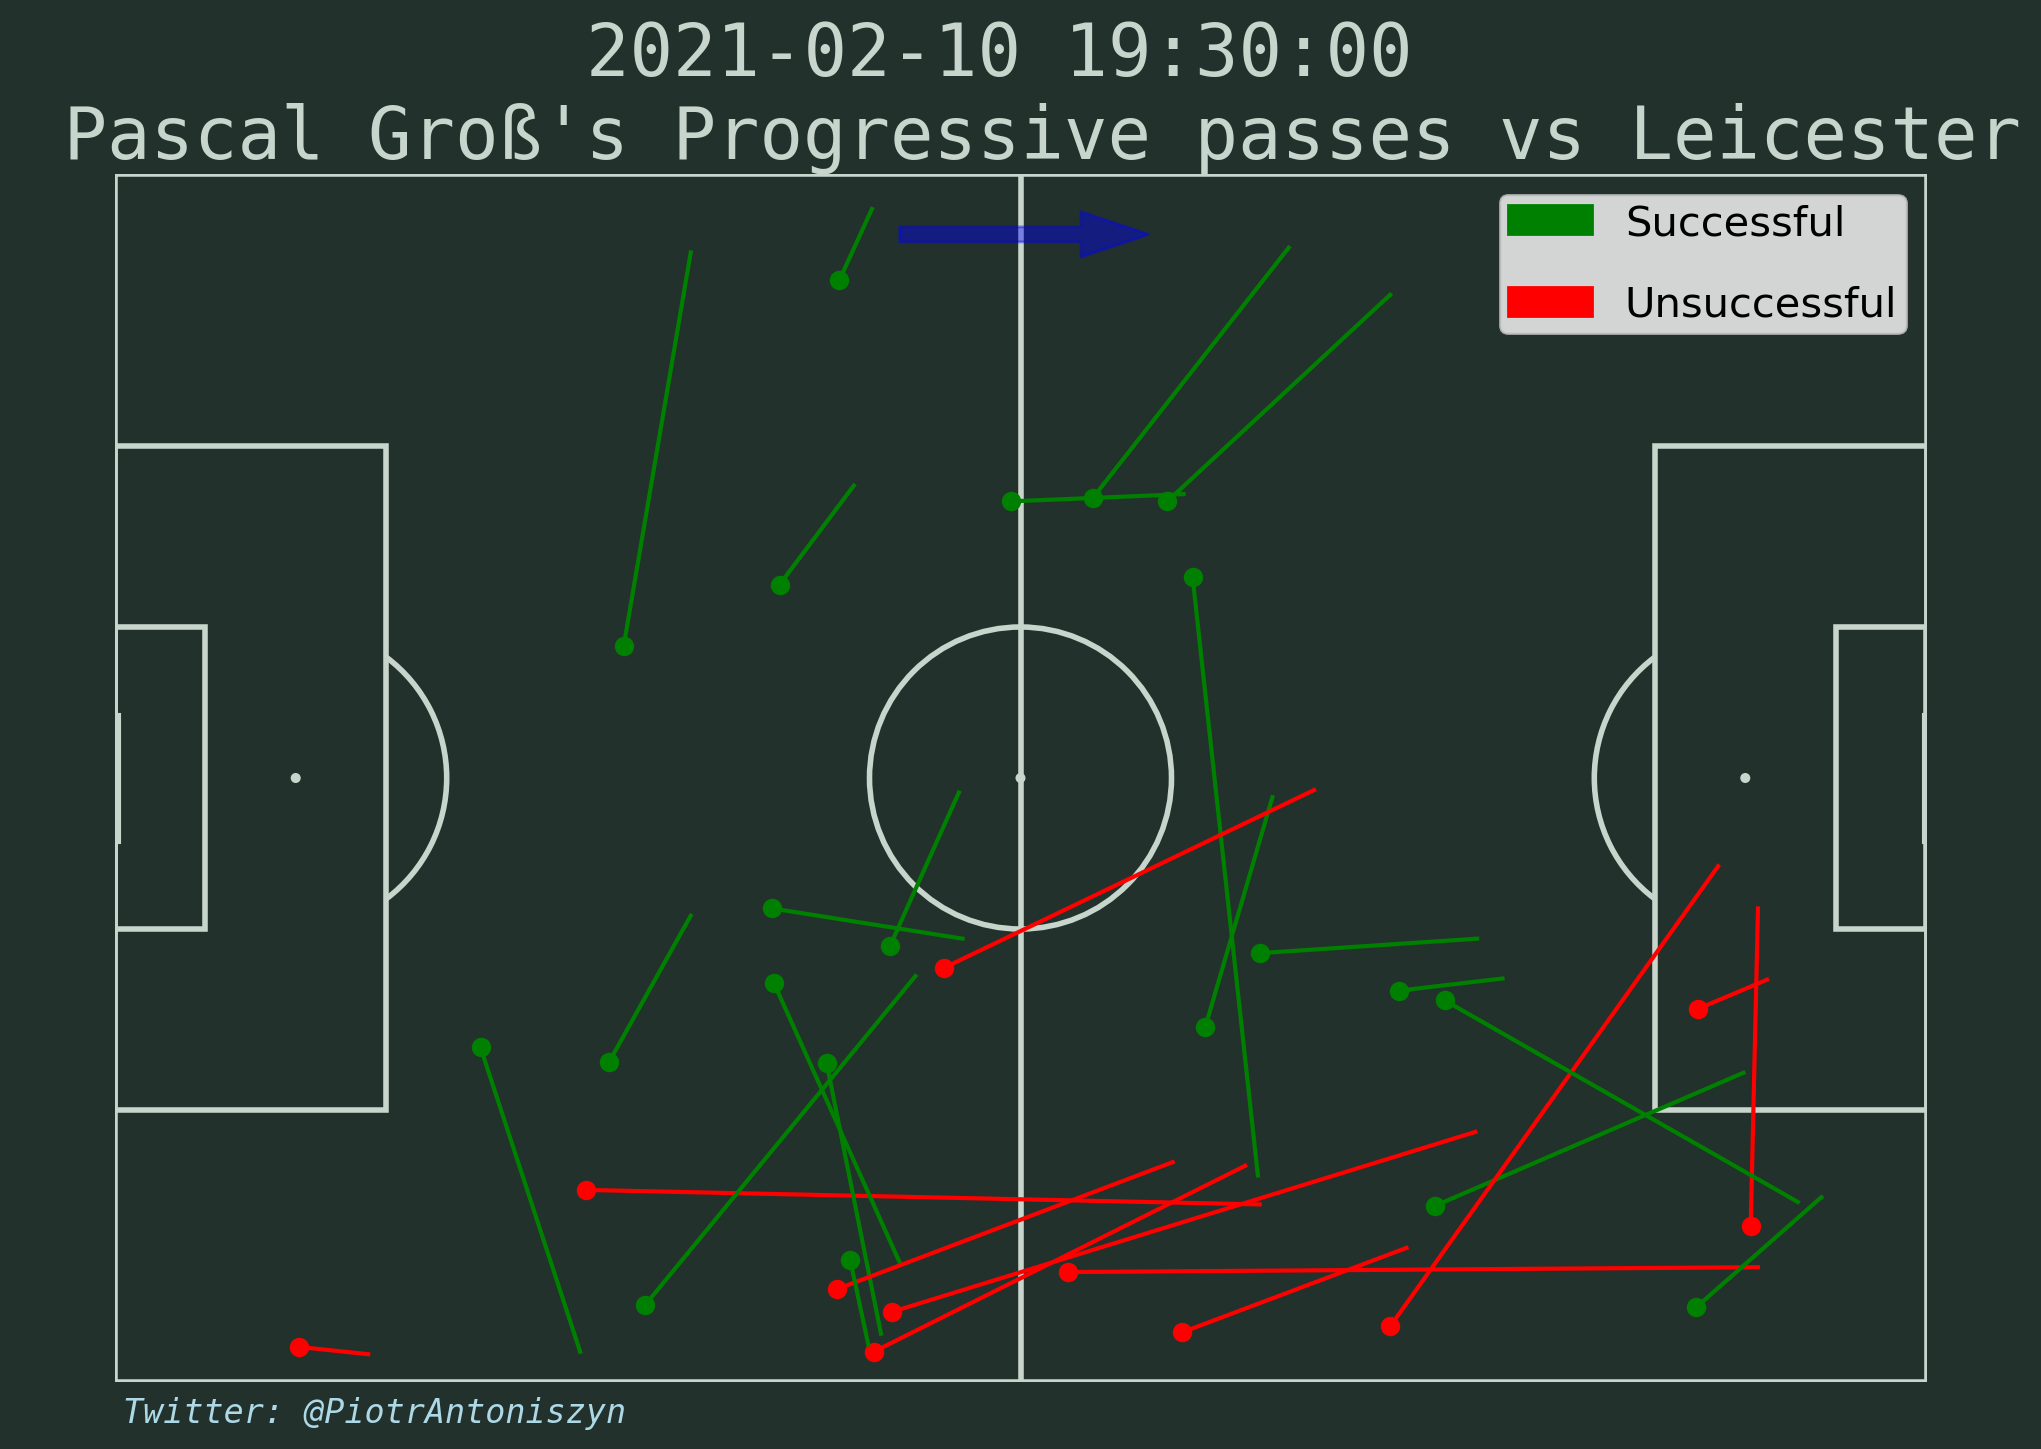

In [16]:
#Generate Pitch
fig,ax = plt.subplots(figsize=(13.5,8),dpi=200)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#22312b', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()


#Create heatmap
#kde = sns.kdeplot(
#    player_pass_df['x'],
#    player_pass_df['y'],
#    shade = True,
#    shade_lowest=False,
#    alpha=.3,
#    n_levels=15,
#    cmap='inferno'
#)


for x in range(len(player_pass_df['x'])):
    if player_pass_df['outcome'][x] == 'Successful':
        x1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='green',label='Successful')
        x2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='green',label='pass starting points')
    if player_pass_df['outcome'][x] == 'Unsuccessful':
        y1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='red',label='Unsuccessful')
        y2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='red', label='pass starting points')

plt.arrow(52.0,76.0,12.0,0.0,color='blue',width=1,alpha=0.4)        
        
plt.xlim(0,120)
plt.ylim(0,80)


fig.text(.18,.1,'Twitter: @PiotrAntoniszyn ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='lightblue')
#pass map title
if int(h_a) == 1:
    plt.title("{} {} \n {}\'s Progressive passes vs {}".format(match_data['startTime'][:10],match_data['startTime'][11:20], player_pass_df['name'][1], match_data['away']['name']), size=26, y=1,fontfamily='monospace', color='#c7d5cc')
if int(h_a) == 2:
    plt.title("{} {} \n {}\'s Progressive passes vs {}".format(match_data['startTime'][:10],match_data['startTime'][11:20], player_pass_df['name'][1], match_data['home']['name']), size=26, y=1,fontfamily='monospace', color='#c7d5cc') 

red = mpatches.Patch(color='red', label='Unsuccessful')  
green = mpatches.Patch(color='green', label='Successful')  
leg = ax.legend(handles=[green,red],borderpad=0.2, markerscale=1.5, labelspacing=1, loc="best", fontsize=15)    
    
#fig.text(.185,.845,'Successful',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='green',weight='bold')
#fig.text(.185,.825,'Unsuccessful ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='red',weight='bold')